In [ ]:
import torch as T
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm
from PIL import Image
import numpy as np

base_dir = "/home/shashank/Code/percolation/"
data_dir = base_dir + "data/"
plt.rcParams.update({
    "text.usetex": True,
    "figure.dpi":300
})
sns.set_theme()

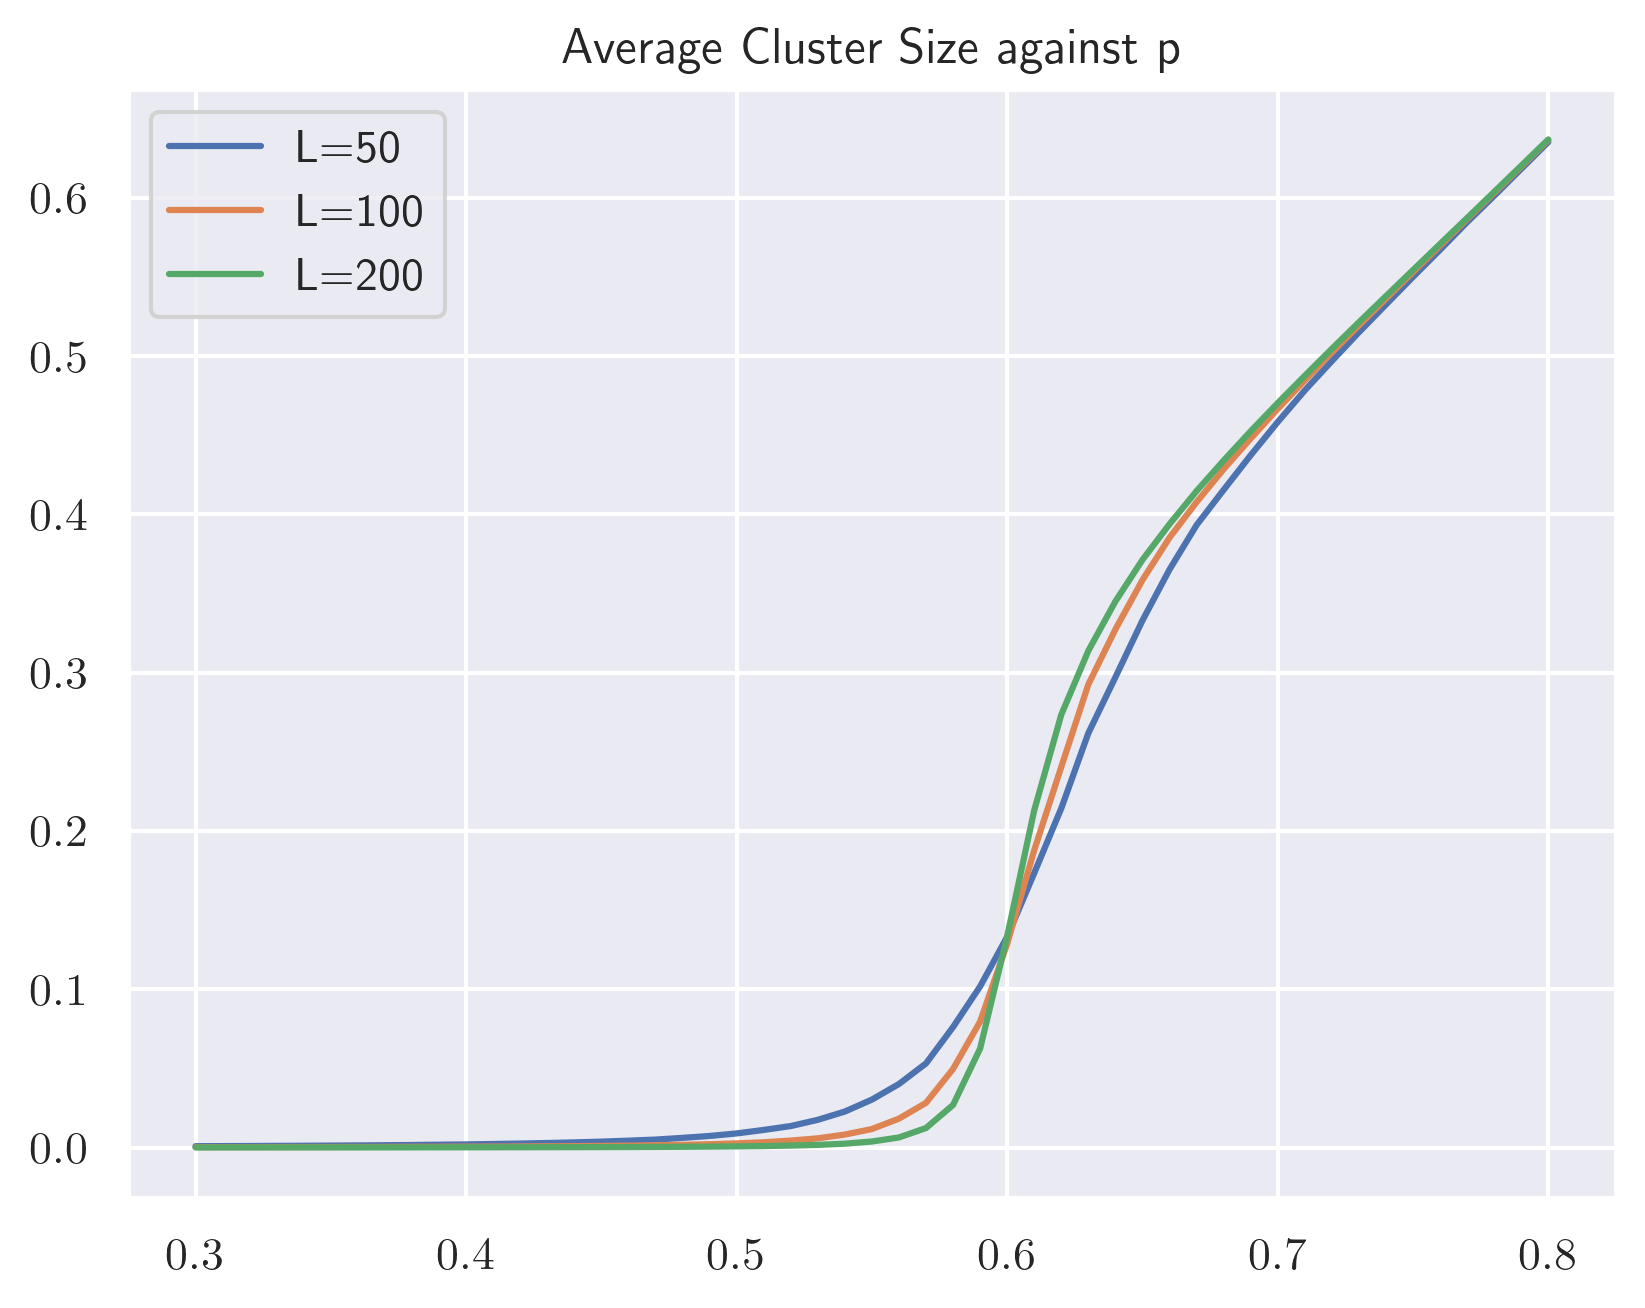

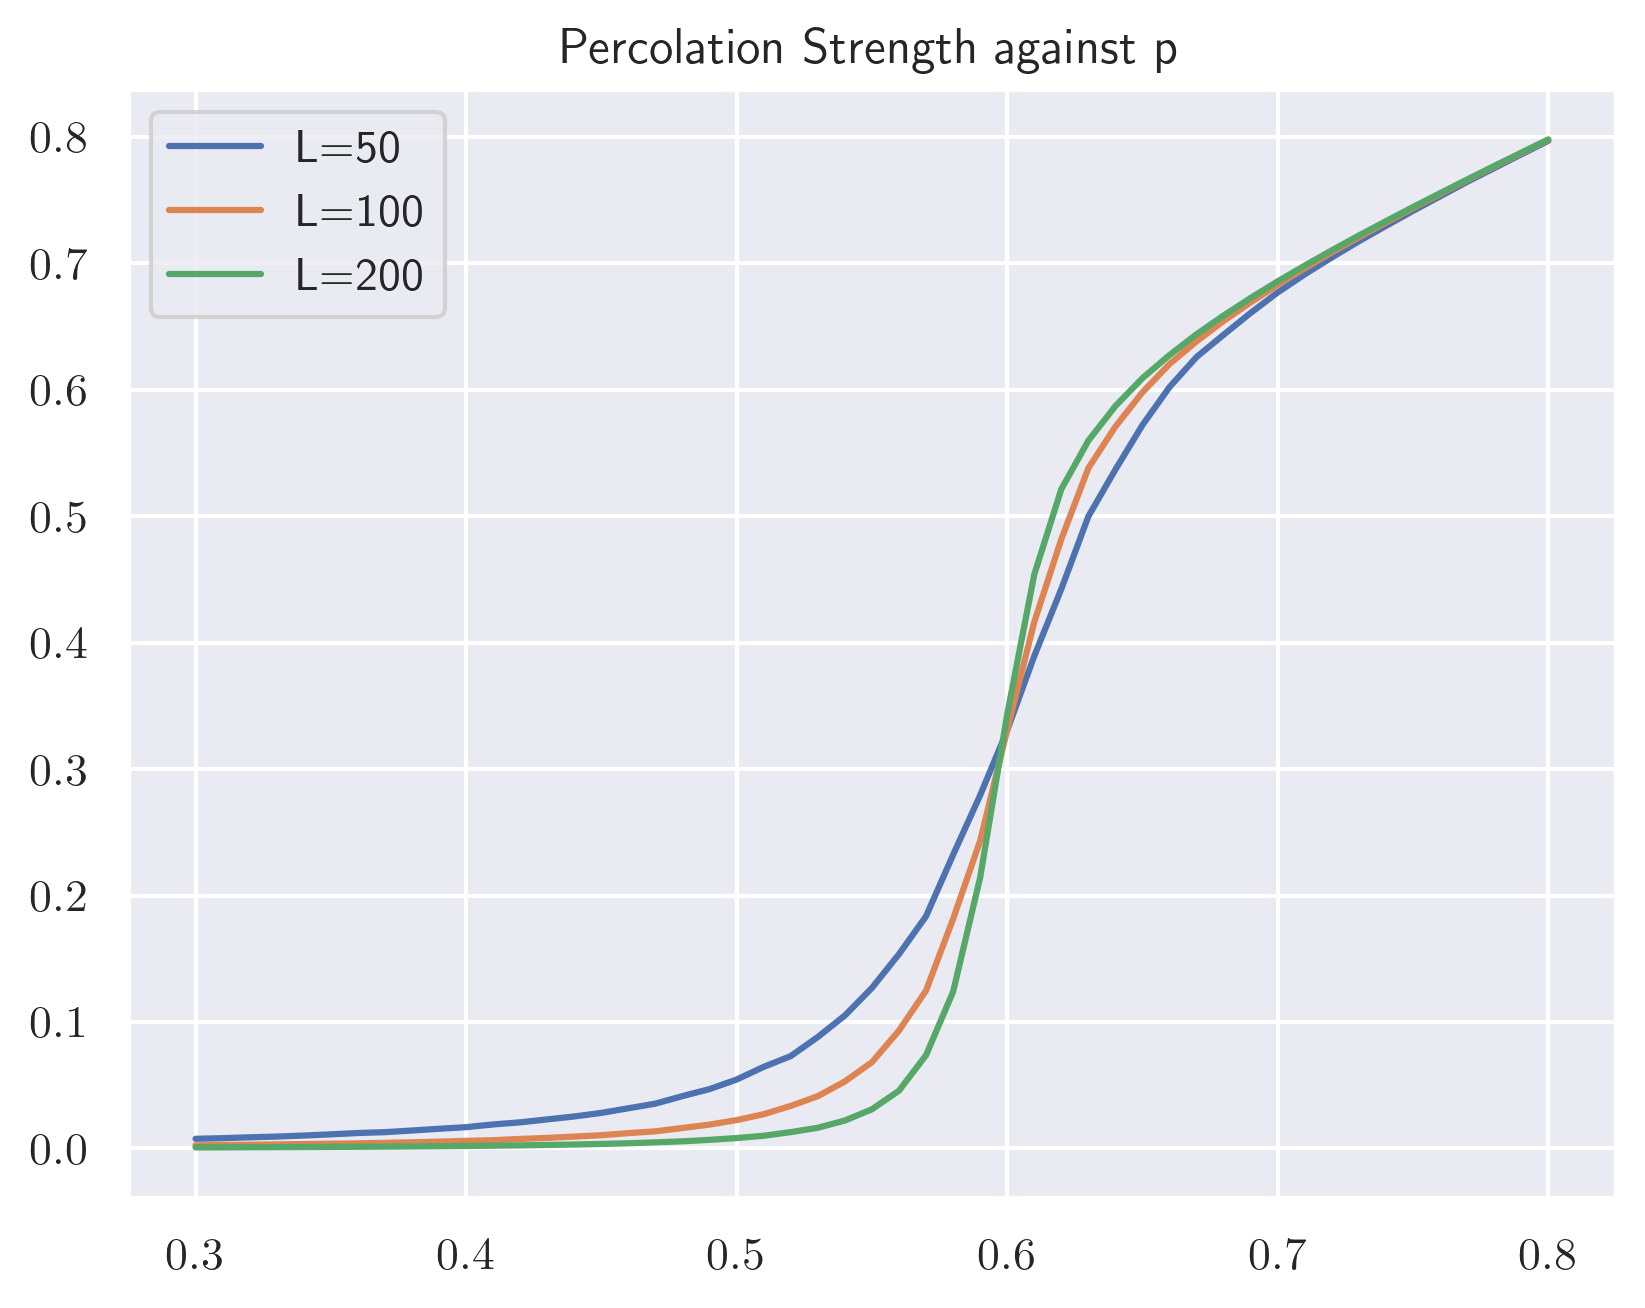

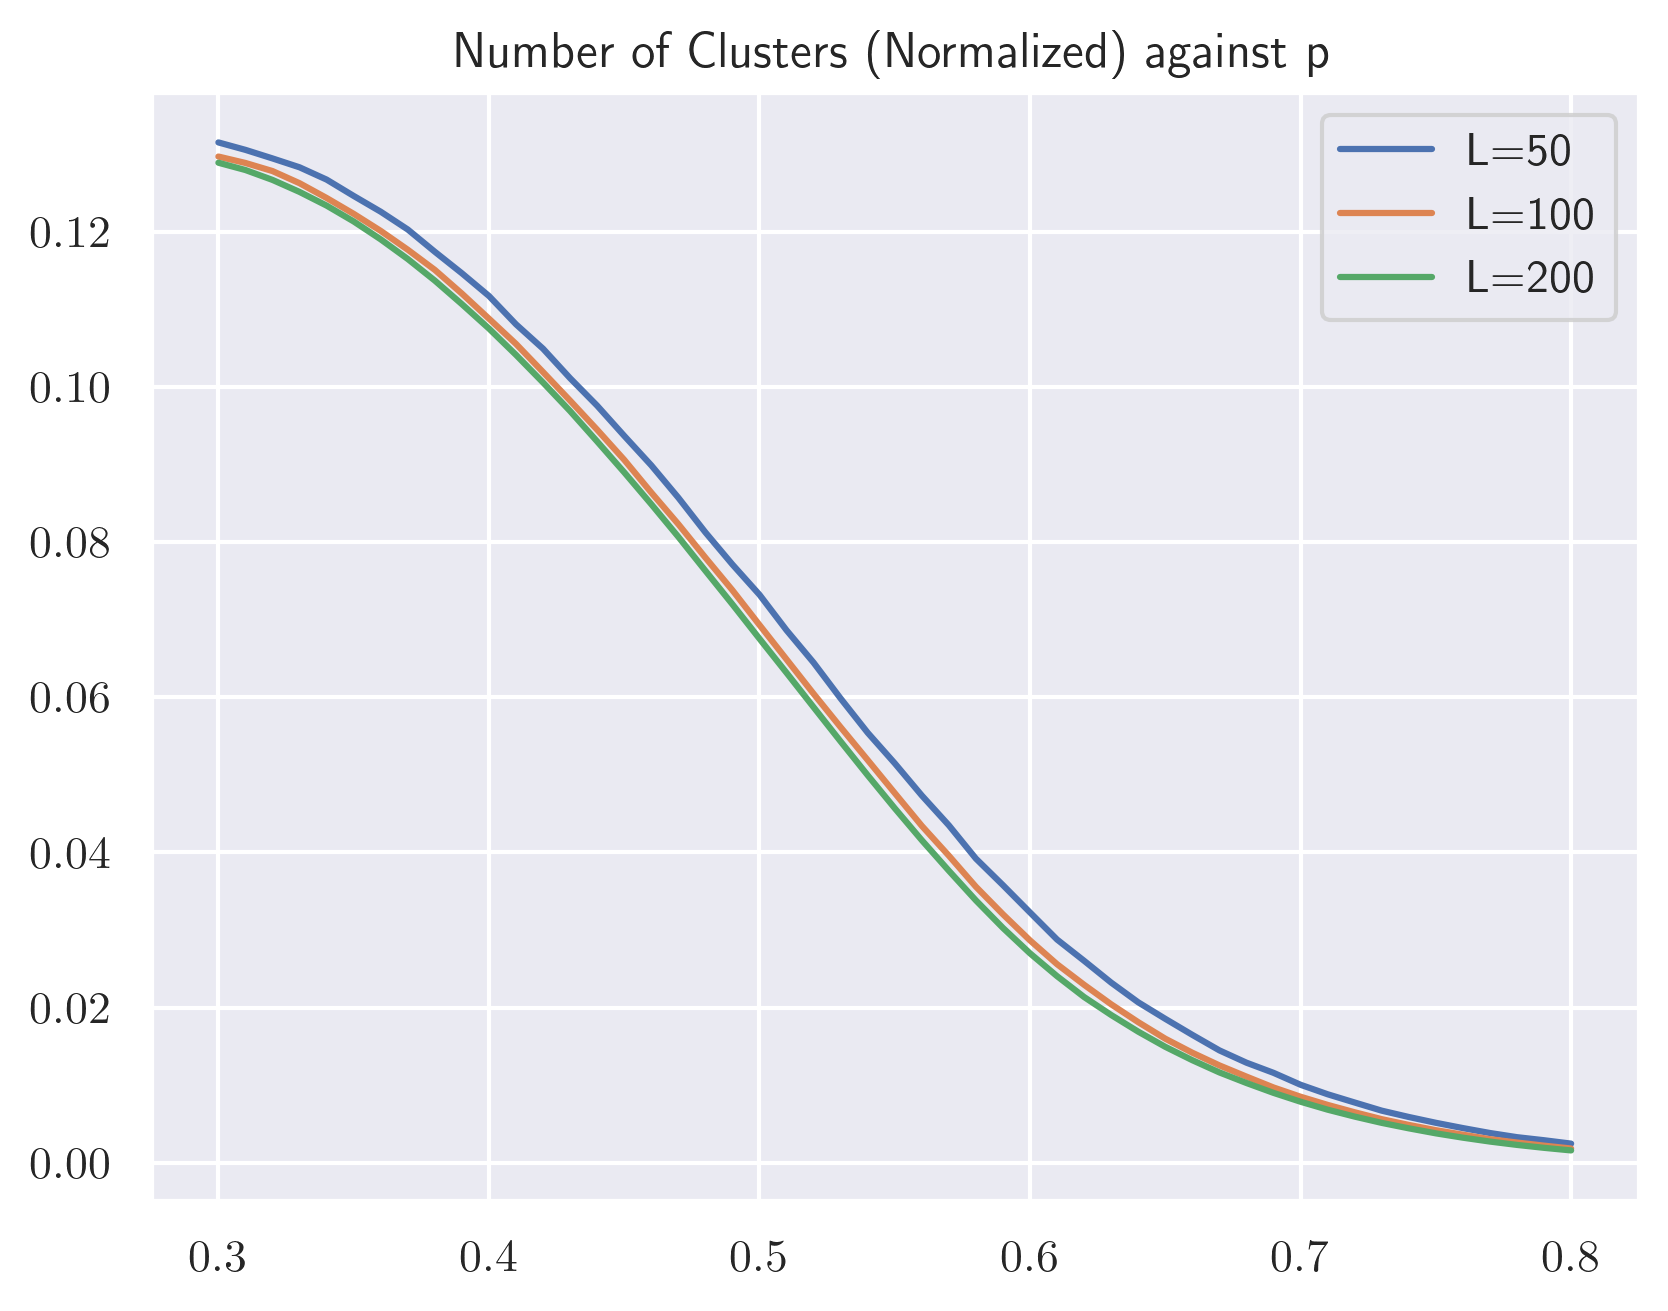

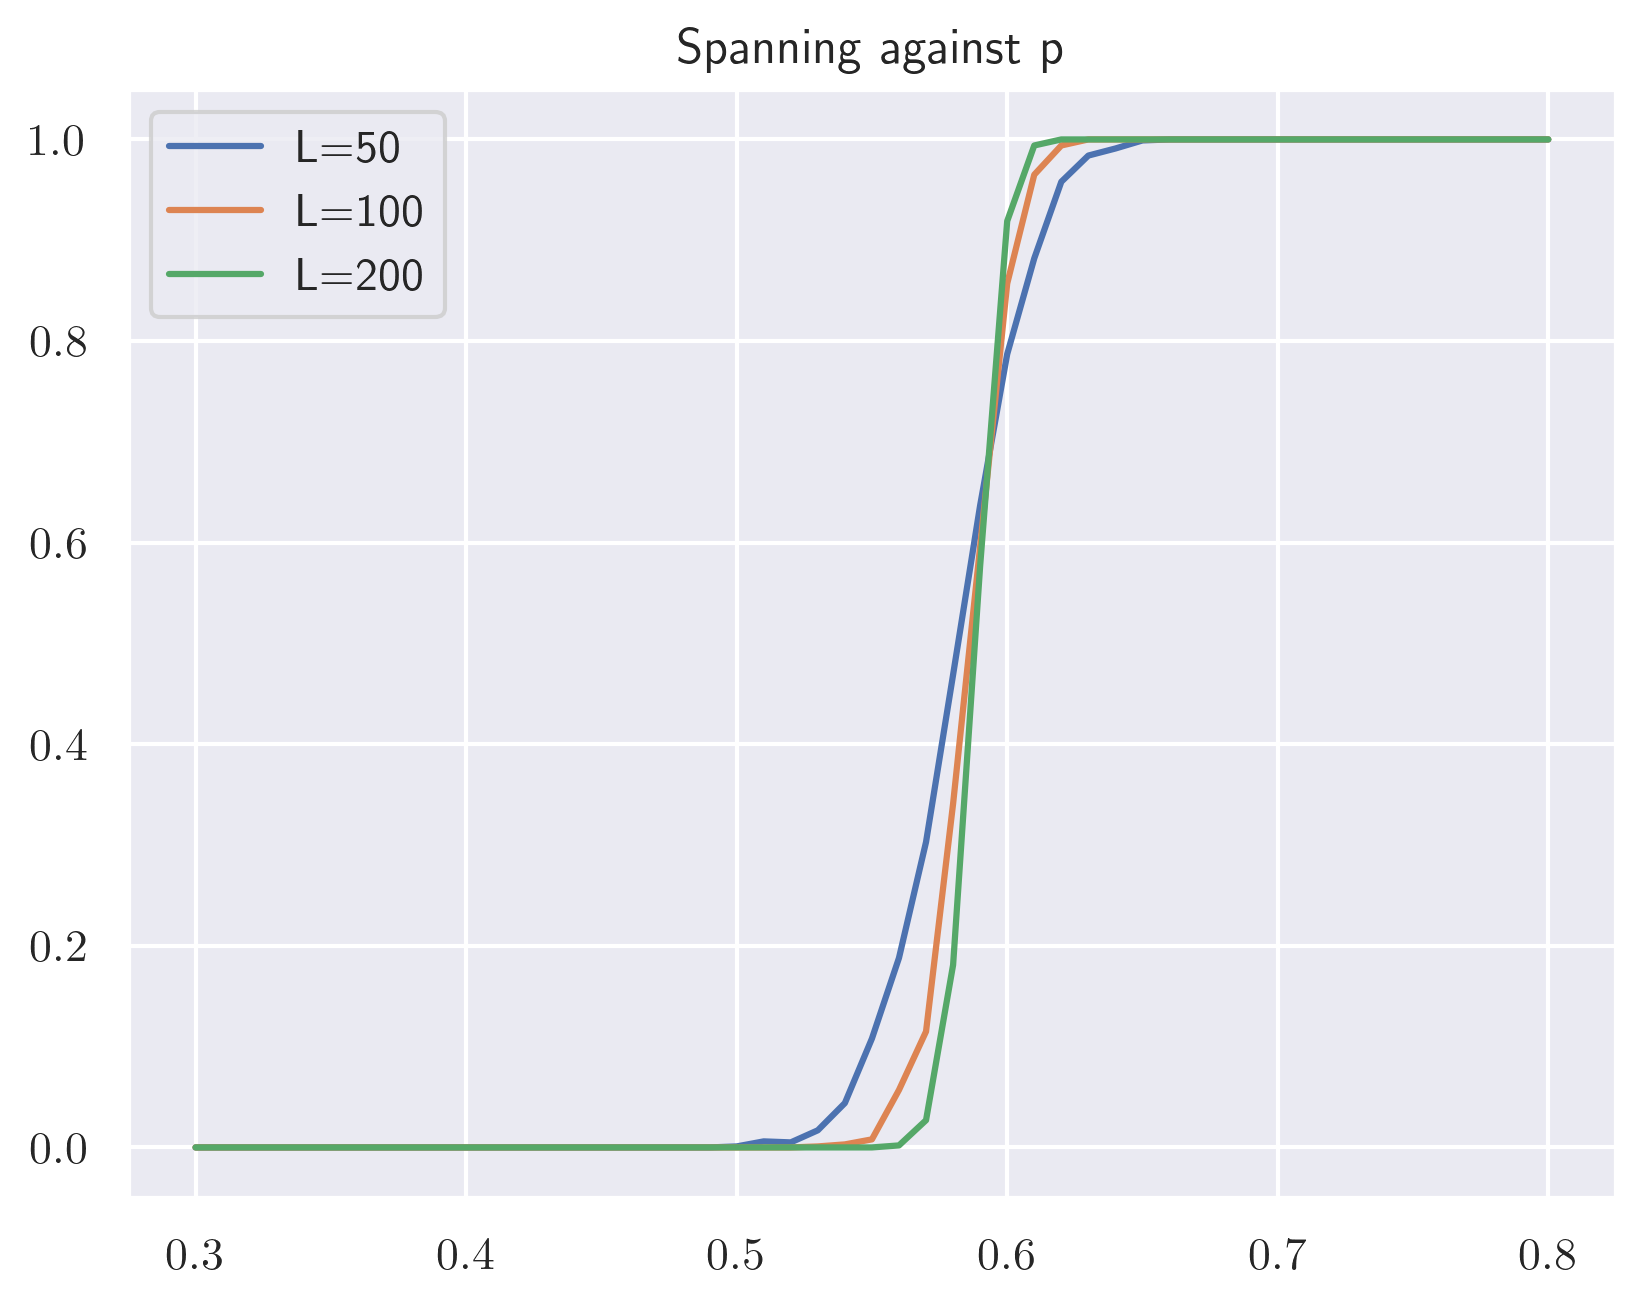

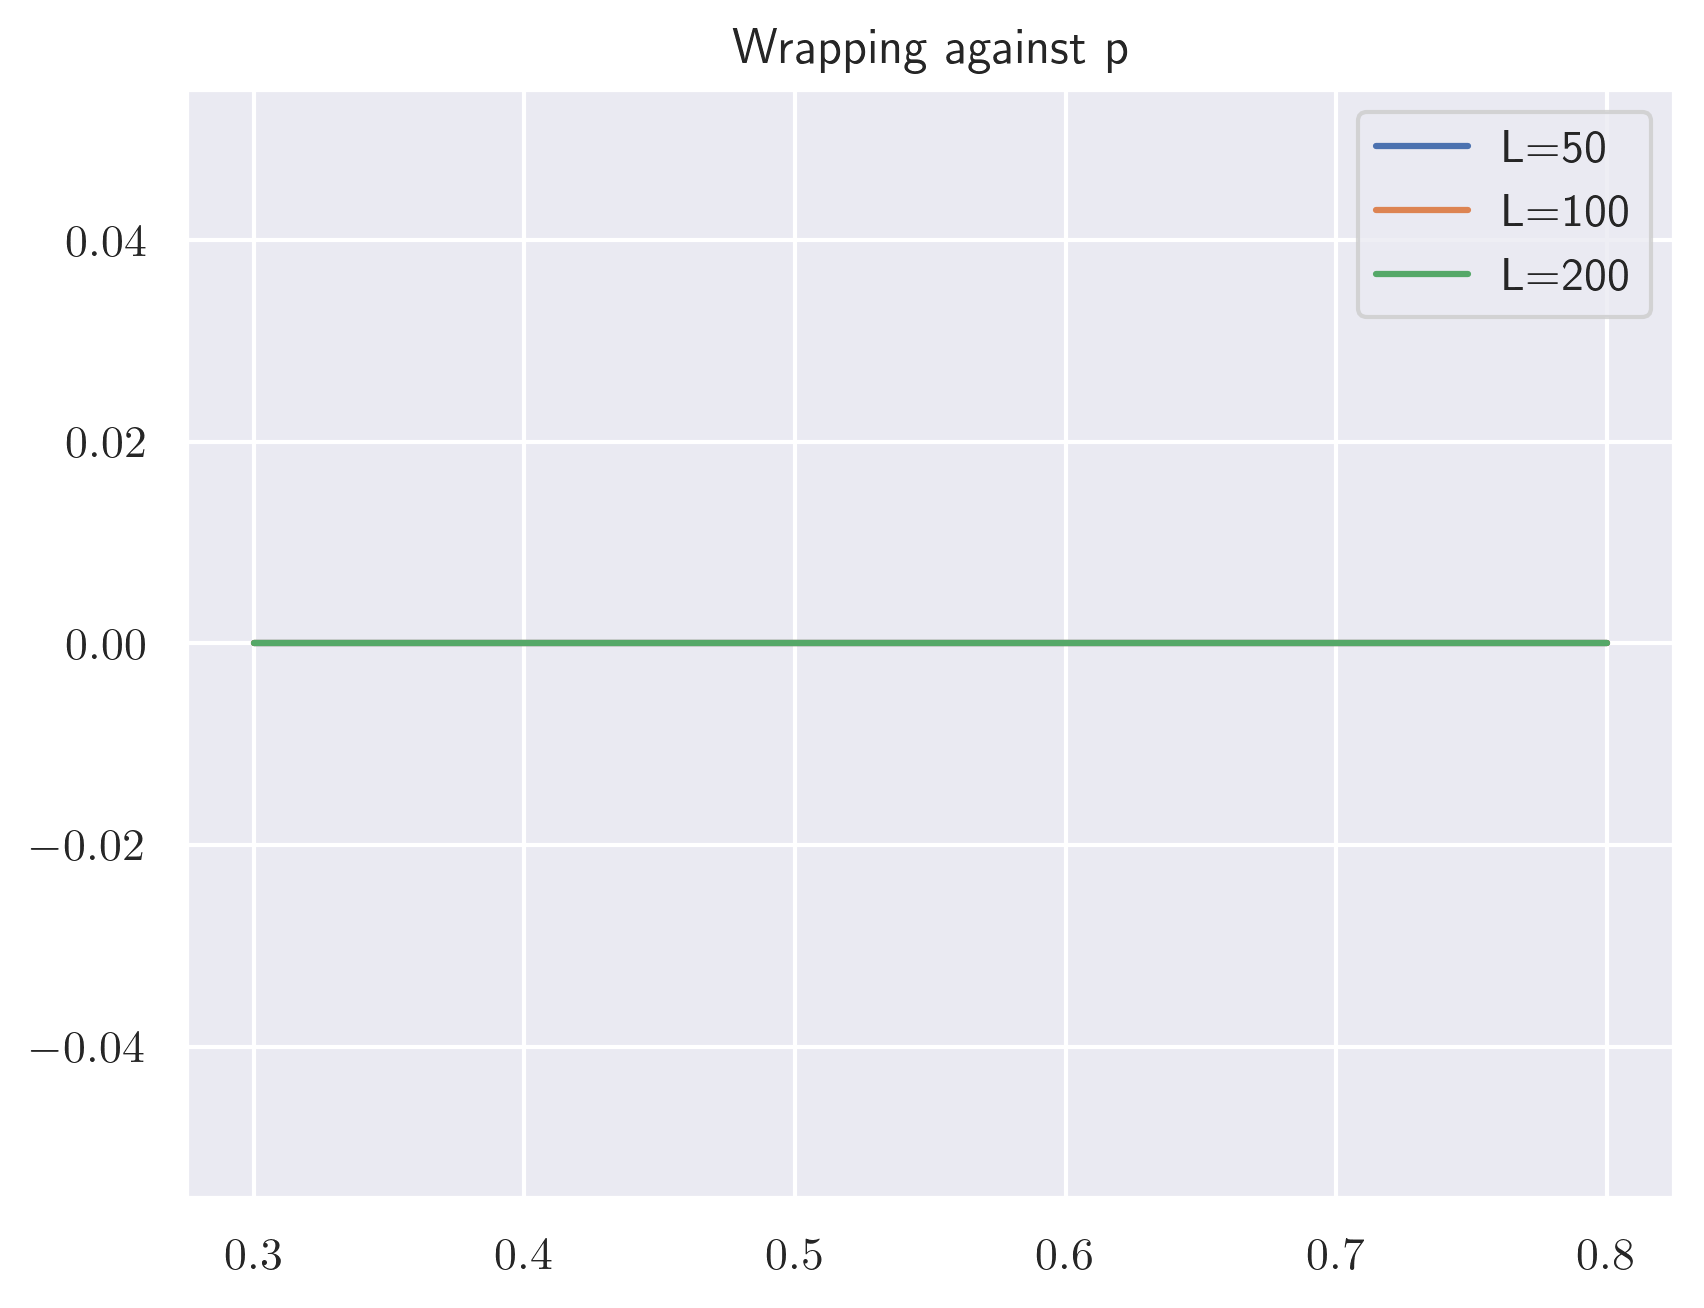

In [3]:
#temps train: 0.1:0.1:0.9=9 and 0.550:0.005:0.660=23; total=32
#temps test: 0.3:0.01:0.8=51; total=51
def percProcessing(file_path, temps=400, configs=10000):
    maxClSz = np.zeros([temps, configs]) # we avg over each config
    op = np.zeros([temps, configs])
    numCl = np.zeros([temps, configs])
    avgClSz = np.zeros([temps, configs])
    span = np.zeros([temps, configs])
    wrap = np.zeros([temps, configs])
    i = -1; pStart = 0; j = 0;
    with open(file_path+"avgClSz", "r") as file1, open(file_path+"maxClSz", "r") as file2, open(file_path+"op", "r") as file3:
        for a,b,c in zip(file1, file2, file3):
            k = a.strip()
            l = b.strip()
            p = c.strip()
            if pStart != float(p):
                pStart = float(p)
                i+=1; j = 0
            avgClSz[i, j] = float(k)
            maxClSz[i, j] = int(l)
            # op[i, j] = float(p)
            j+=1
    i = -1; pStart = 0; j = 0;
    with open(file_path+"numCl", "r") as file1, open(file_path+"op", "r") as file3:
        for a, c in zip(file1, file3):
            k = a.strip()
            p = c.strip()
            if pStart != float(p):
                pStart = float(p)
                i+=1; j = 0
            numCl[i, j] = int(k)
            j+=1
    i = -1; pStart = 0; j = 0;
    with open(file_path+"span", "r") as file1, open(file_path+"wrap", "r") as file2, open(file_path+"op", "r") as file3:
        for a, b, c in zip(file1, file2, file3):
            k = a.strip()
            l = b.strip()
            p = c.strip()
            if pStart != float(p):
                pStart = float(p)
                i+=1; j = 0
            span[i, j] = int(k)
            wrap[i, j] = int(l)
            op[i, j] = float(p)
            j+=1
    avgClSz = avgClSz.mean(axis=1)
    maxClSz = maxClSz.mean(axis=1)
    op = op.mean(axis=1)
    numCl = numCl.mean(axis=1)
    span = span.mean(axis=1)
    wrap = wrap.mean(axis=1)
    return avgClSz, maxClSz, op, numCl, span, wrap

temps = 51; configs = 1000
avgClSz50, maxClSz50, op50, numCl50, span50, wrap50 = percProcessing(data_dir+f"test/plotNew50", temps=temps, configs=configs)
avgClSz100, maxClSz100, op100, numCl100, span100, wrap100 = percProcessing(data_dir+f"test/plotNew100", temps=temps, configs=configs)
avgClSz200, maxClSz200, op200, numCl200, span200, wrap200 = percProcessing(data_dir+f"test/plotNew200", temps=temps, configs=configs)

plt.plot(op50, avgClSz50/(50*50), label=f"L=50")
plt.plot(op100, avgClSz100/(100*100), label=f"L=100")
plt.plot(op200, avgClSz200/(200*200), label=f"L=200")
plt.title("Average Cluster Size against p")
plt.legend()
plt.show()
plt.cla()

plt.plot(op50, maxClSz50/(50*50), label=f"L=50")
plt.plot(op100, maxClSz100/(100*100), label=f"L=100")
plt.plot(op200, maxClSz200/(200*200), label=f"L=200")
plt.title("Percolation Strength against p")
plt.legend()
plt.show()
plt.cla()

plt.plot(op50, numCl50/(50*50), label=f"L=50")
plt.plot(op100, numCl100/(100*100), label=f"L=100")
plt.plot(op200, numCl200/(200*200), label=f"L=200")
plt.title("Number of Clusters (Normalized) against p")
plt.legend()
plt.show()
plt.cla()

plt.plot(op50, span50, label=f"L=50")
plt.plot(op100, span100, label=f"L=100")
plt.plot(op200, span200, label=f"L=200")
plt.title("Spanning against p")
plt.legend()
plt.show()
plt.cla()

plt.plot(op50, wrap50, label=f"L=50")
plt.plot(op100, wrap100, label=f"L=100")
plt.plot(op200, wrap200, label=f"L=200")
plt.title("Wrapping against p")
plt.legend()
plt.show()

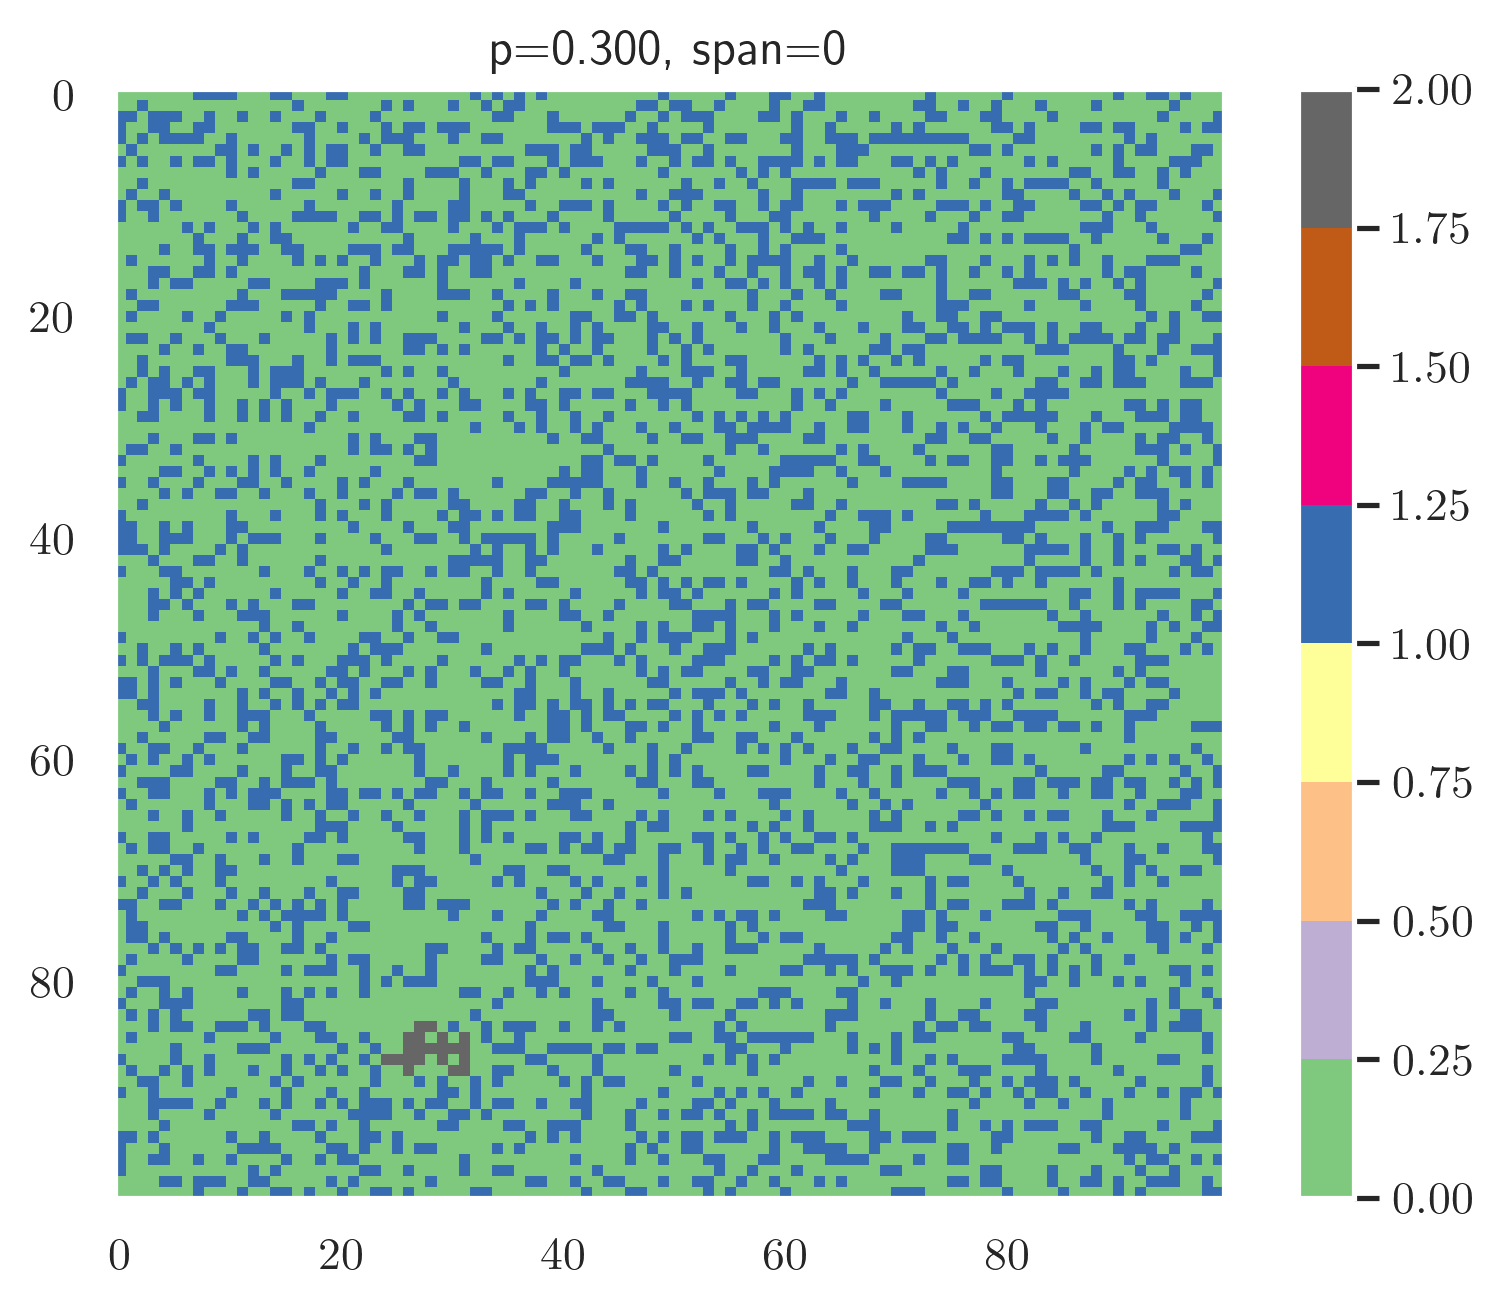

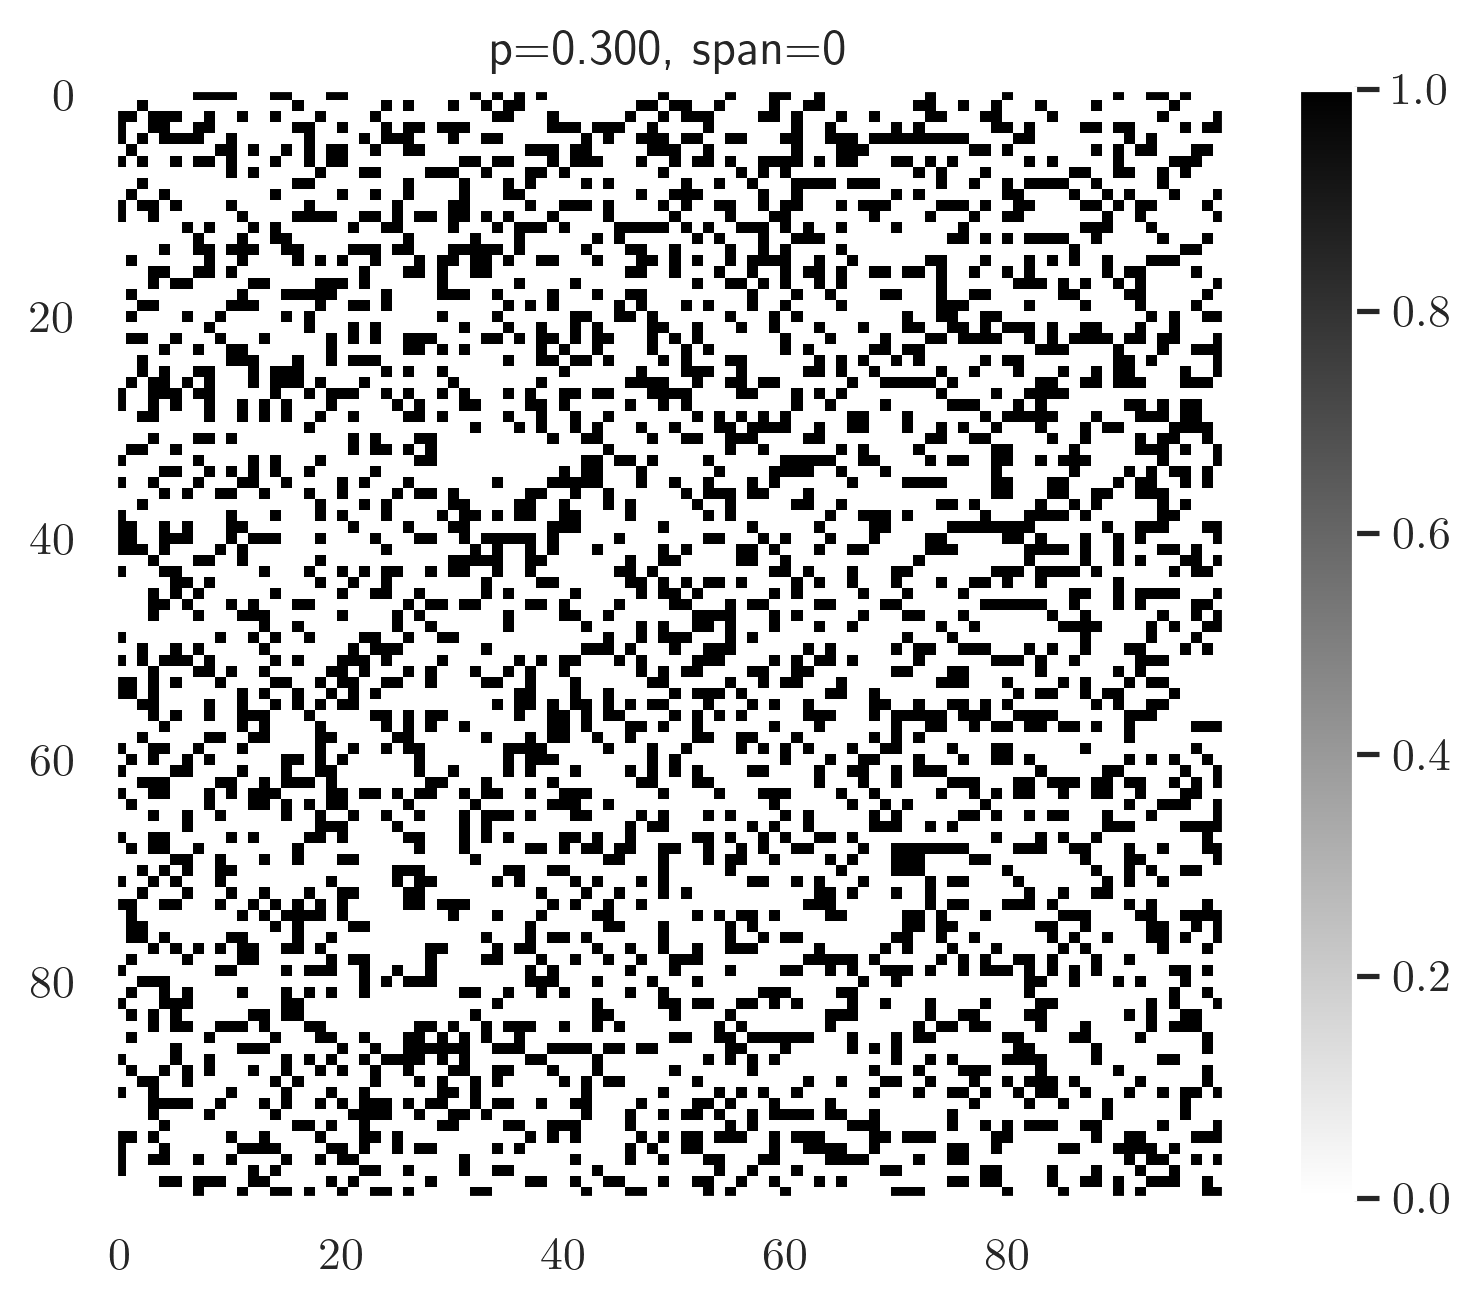

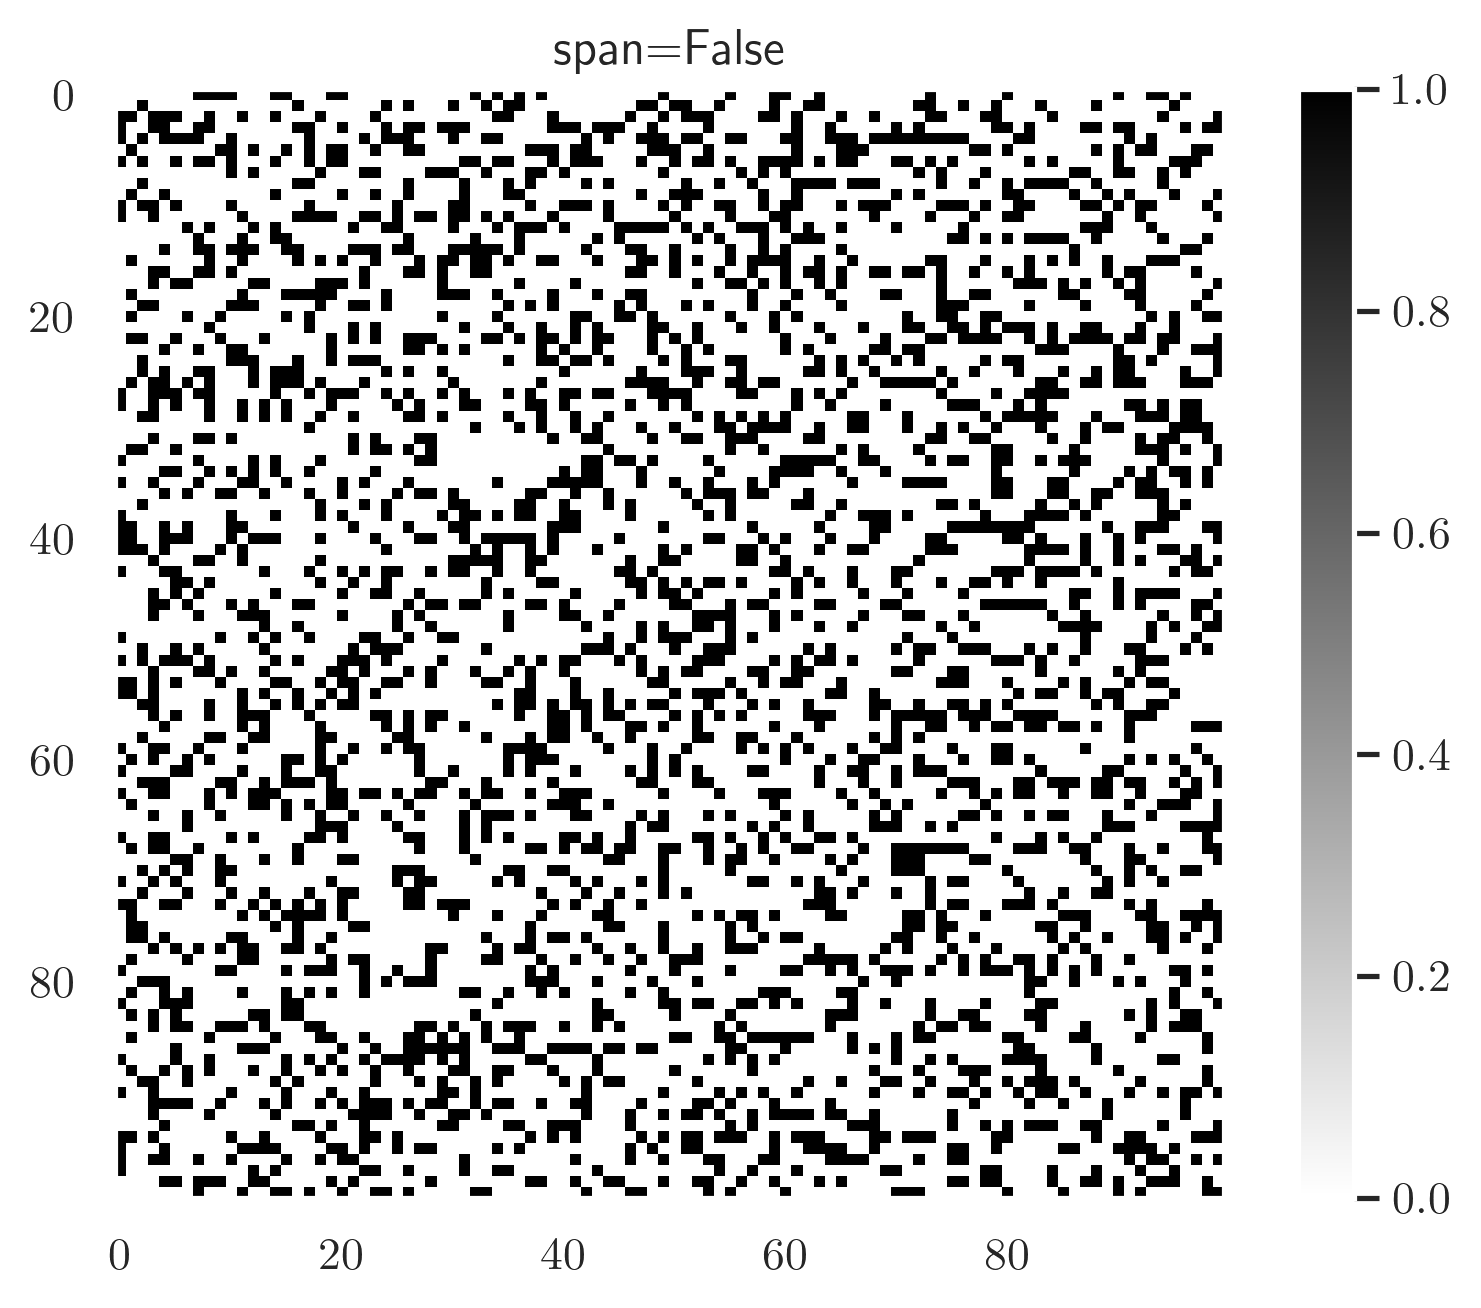

Next


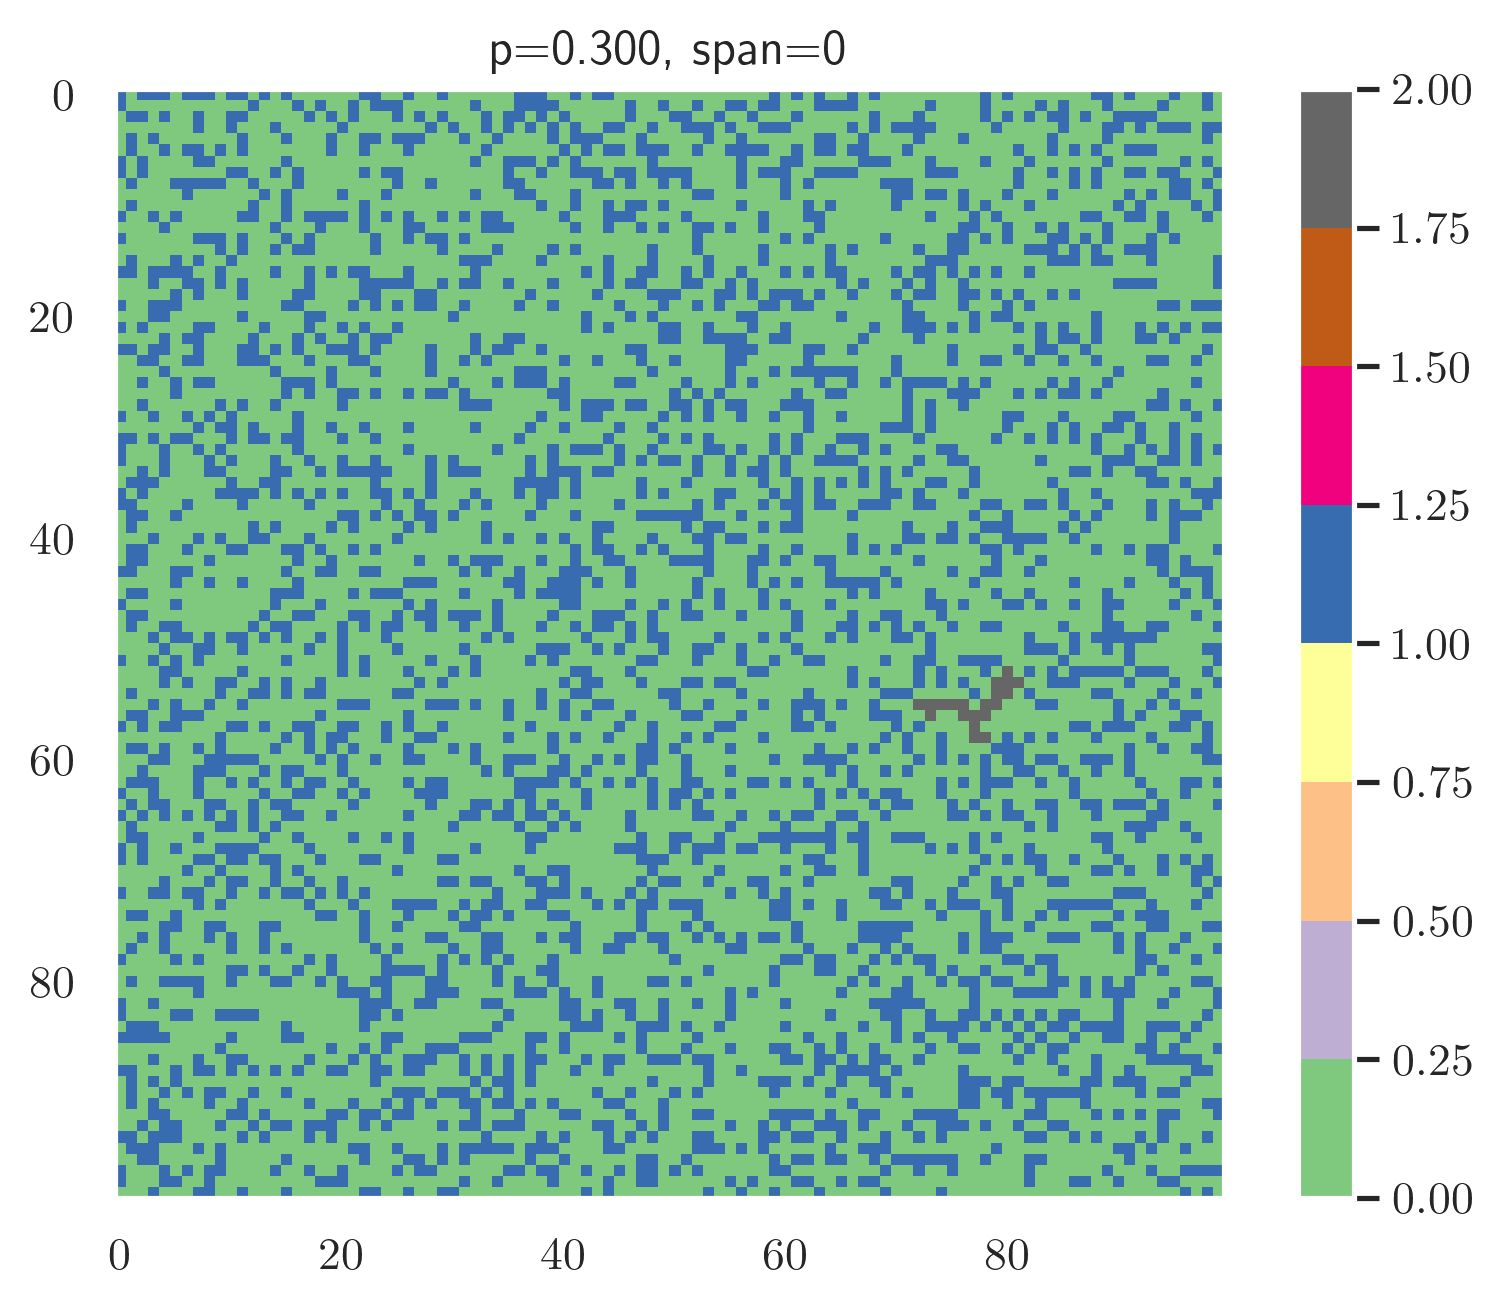

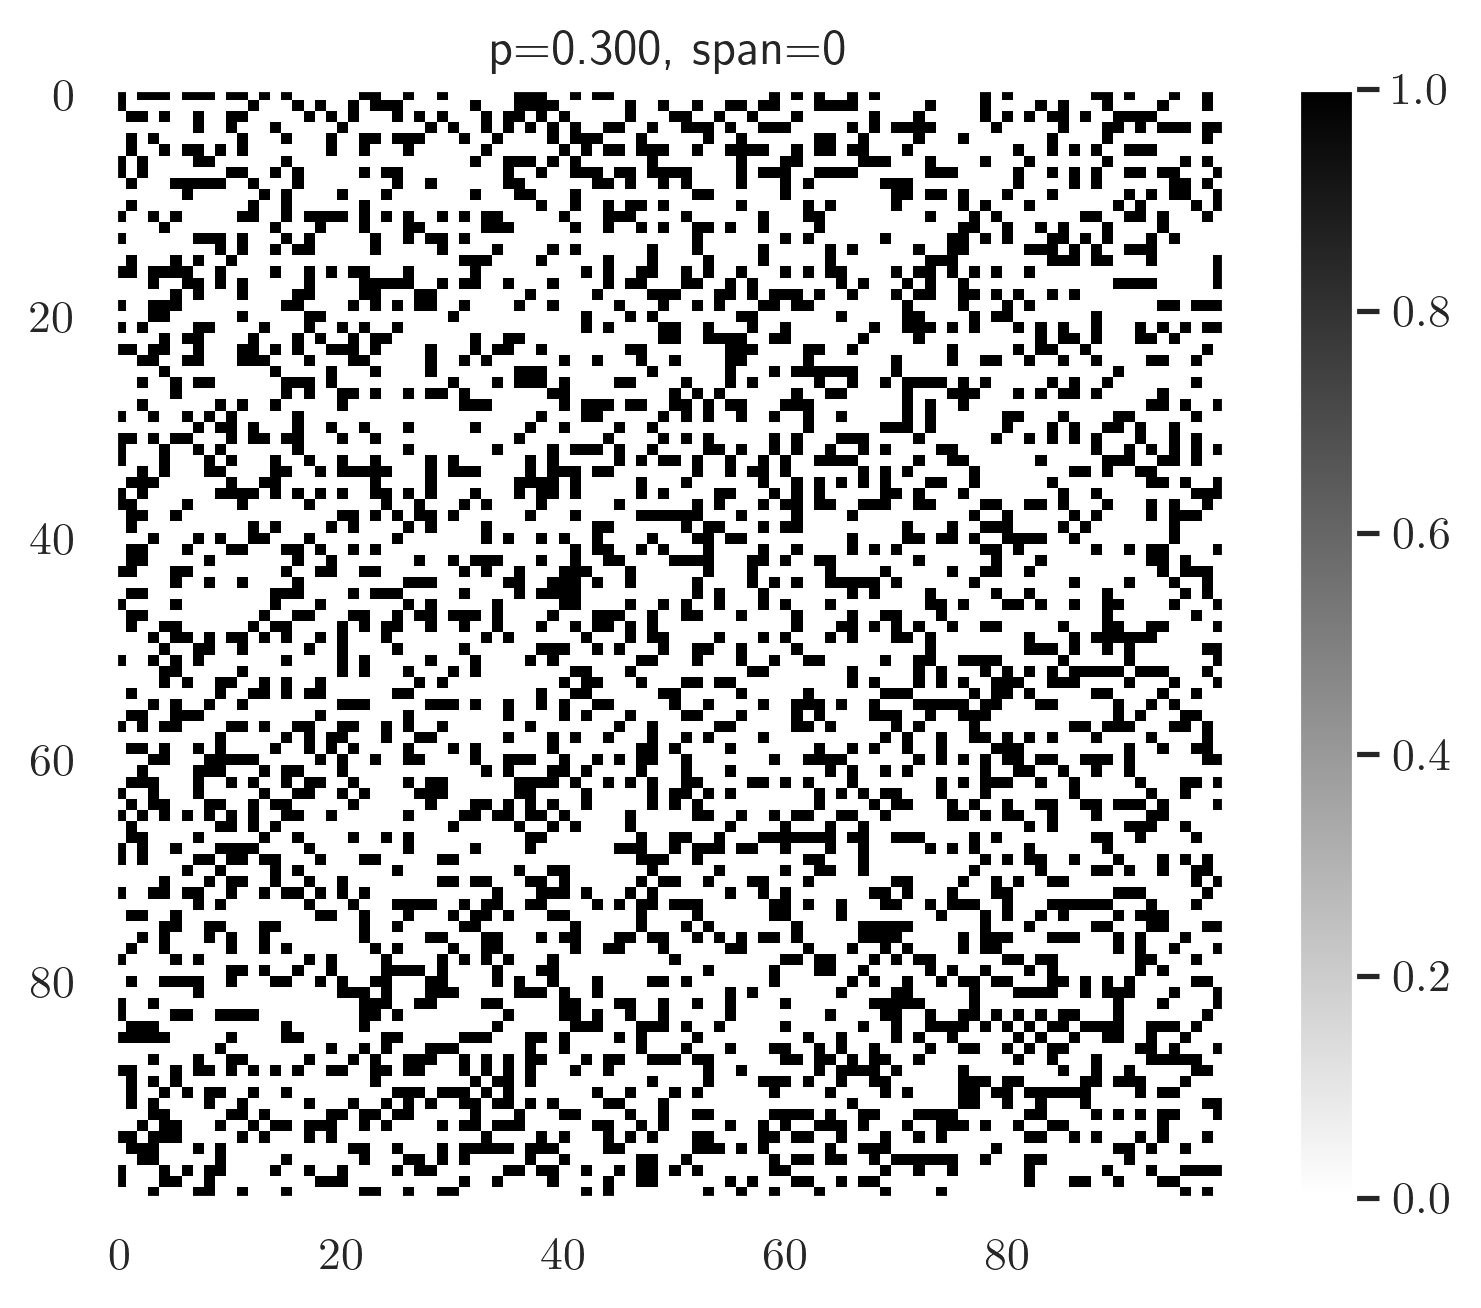

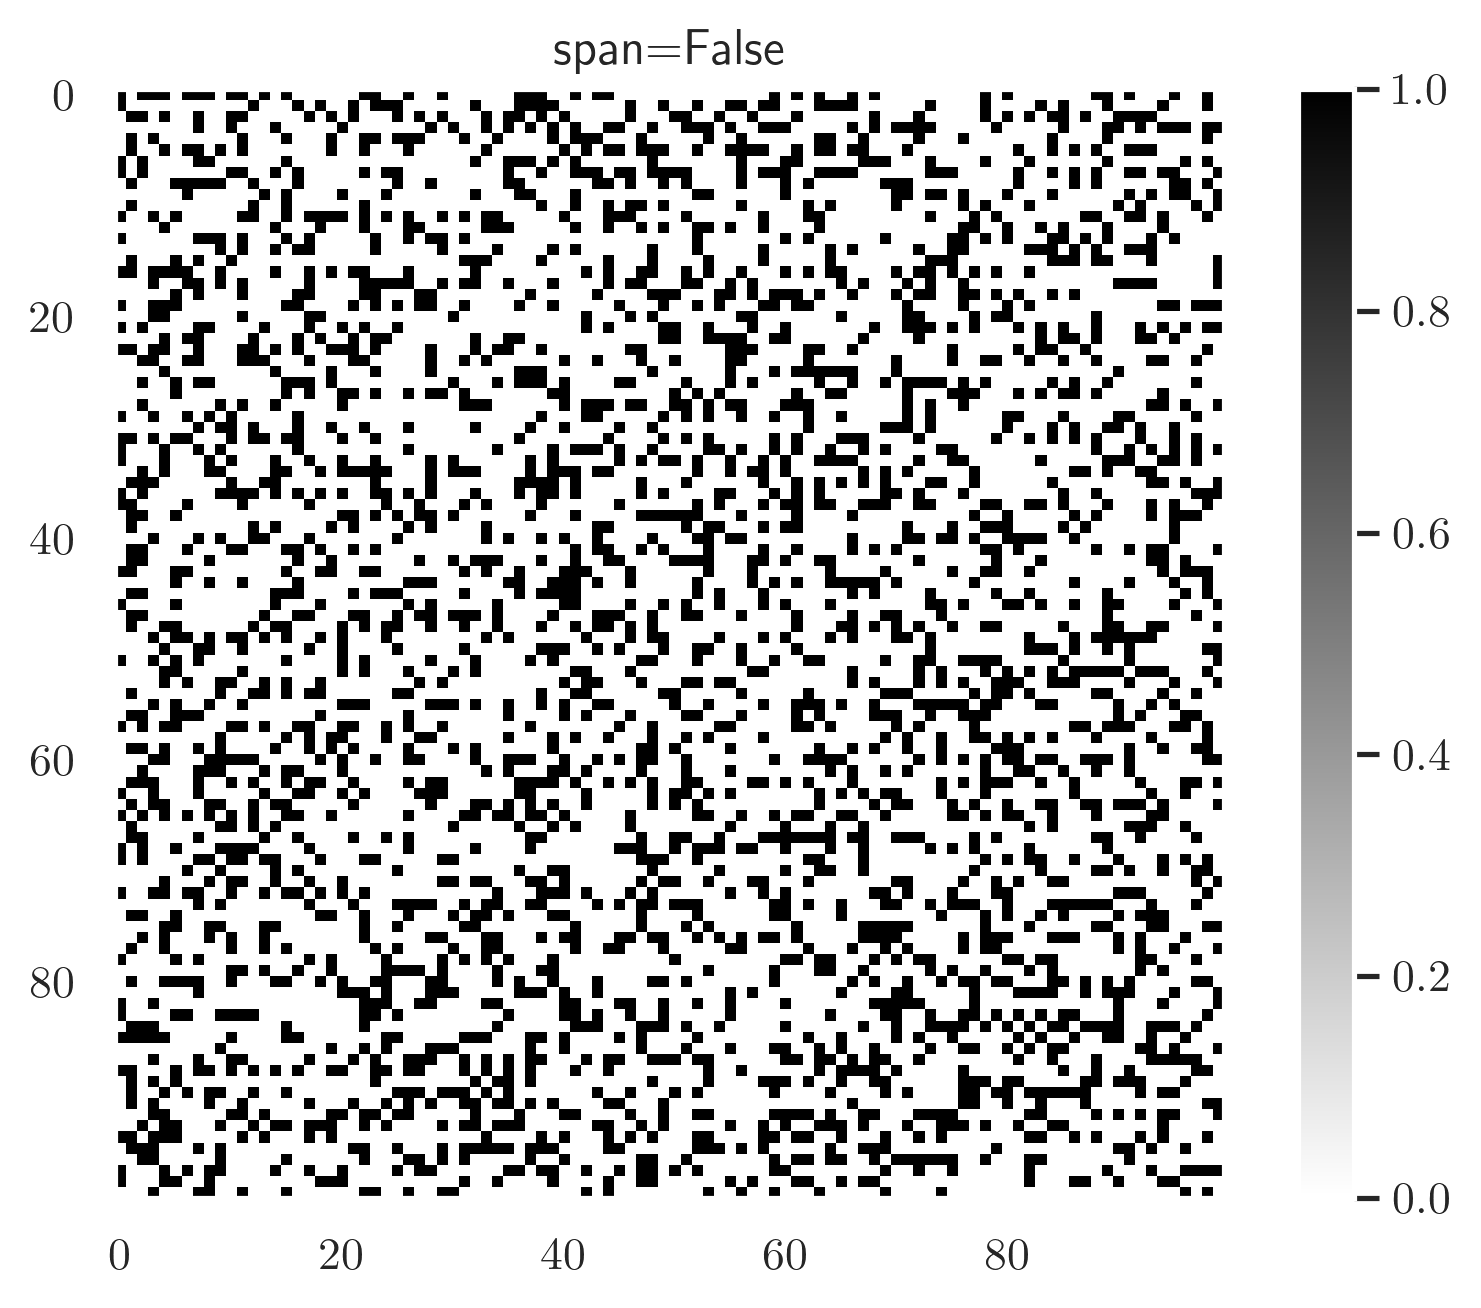

Next


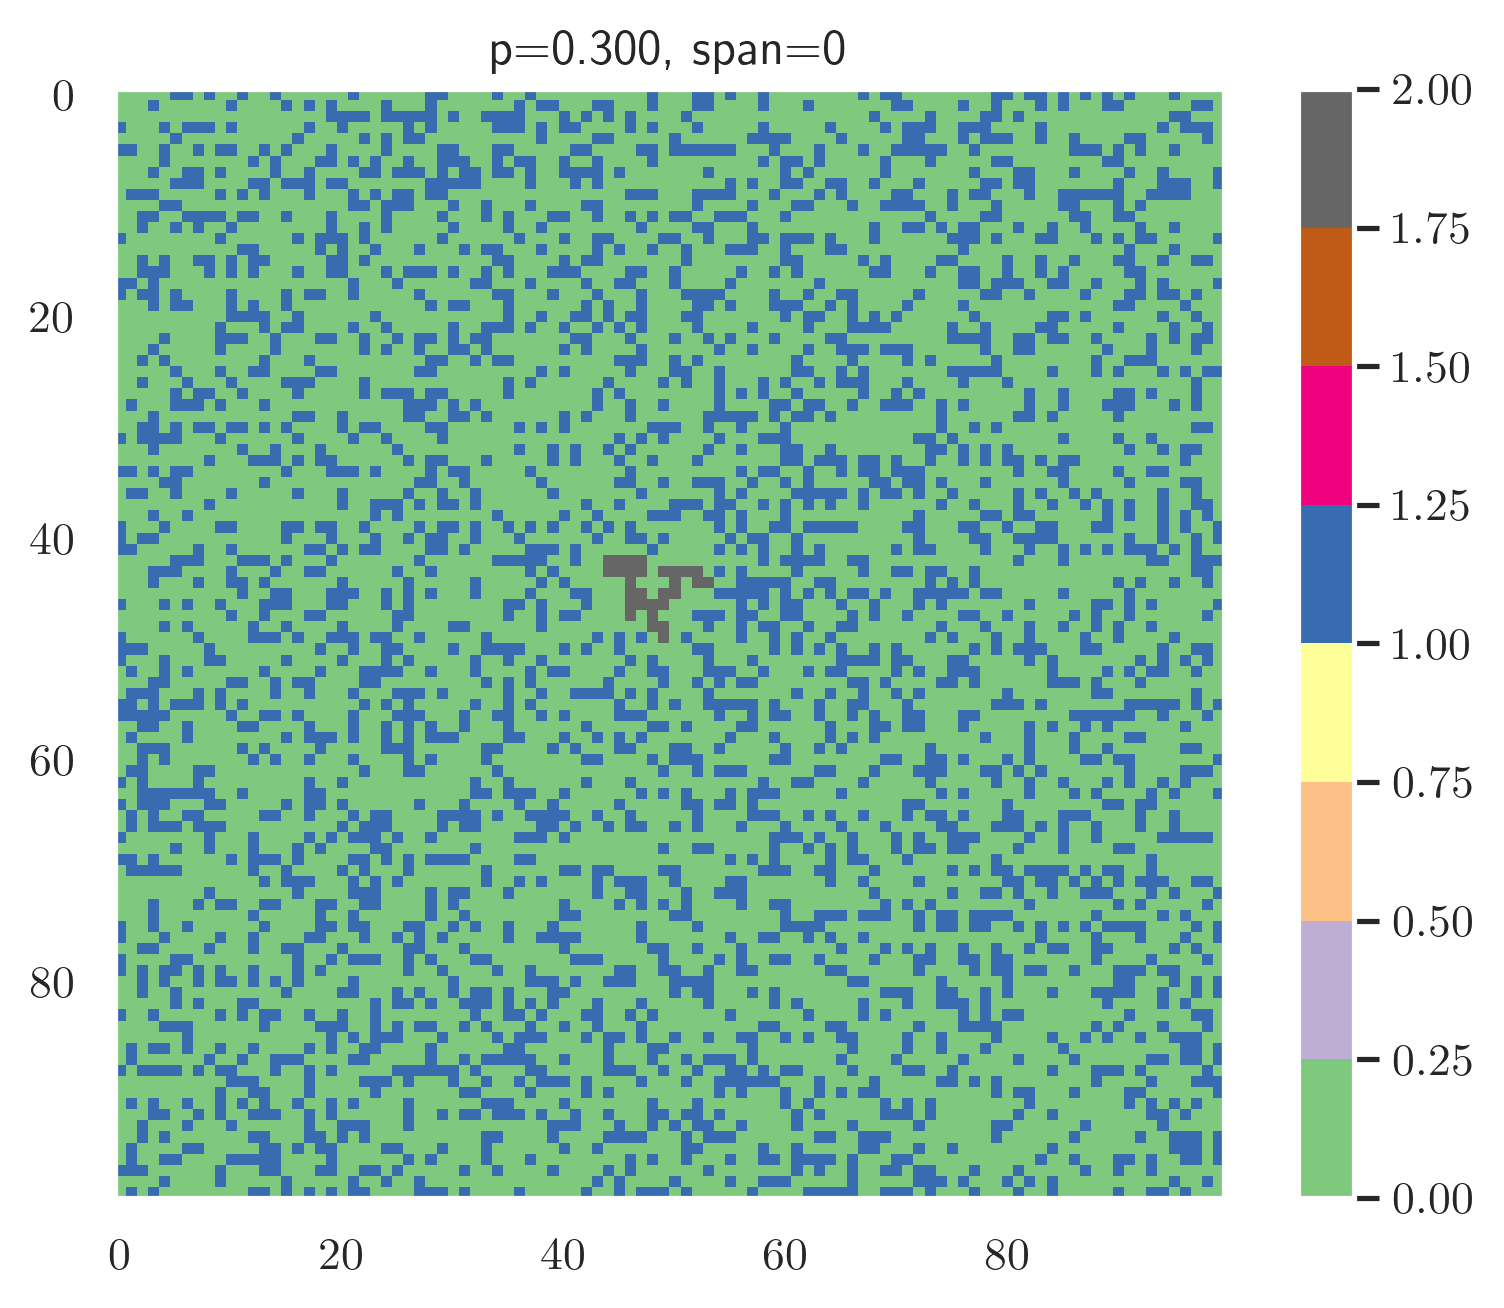

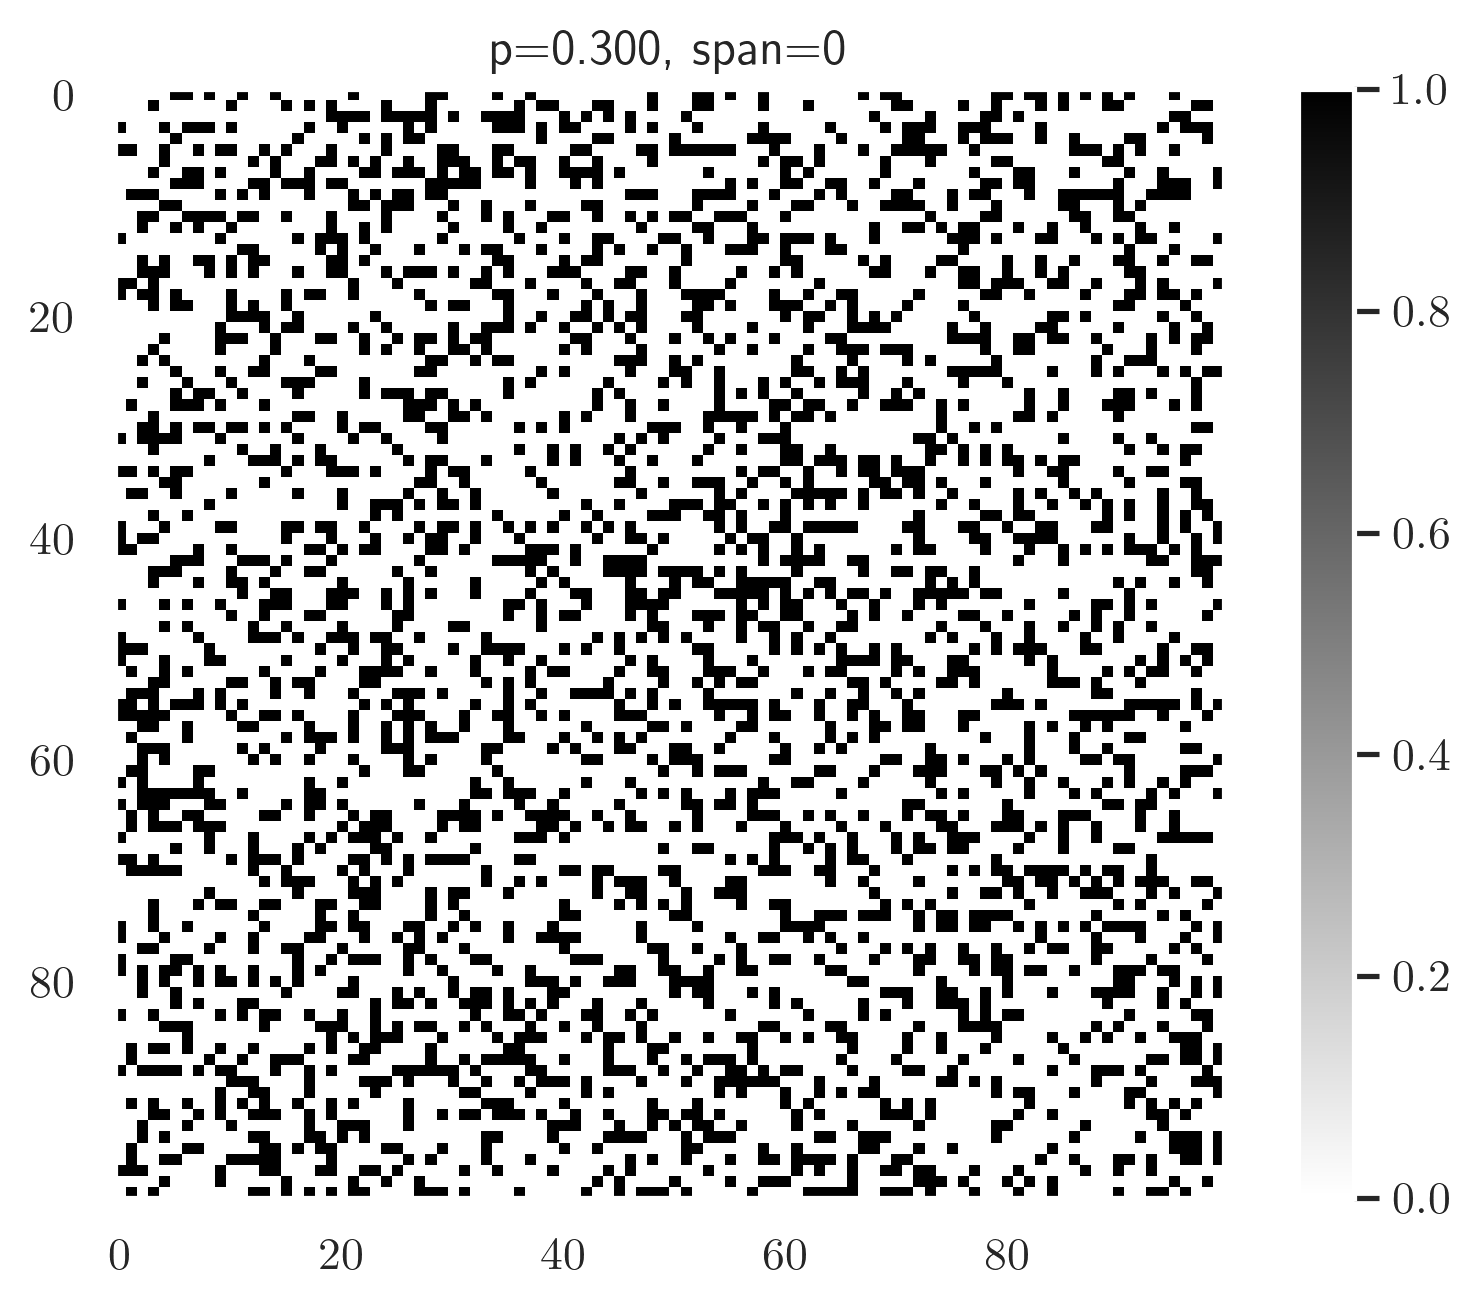

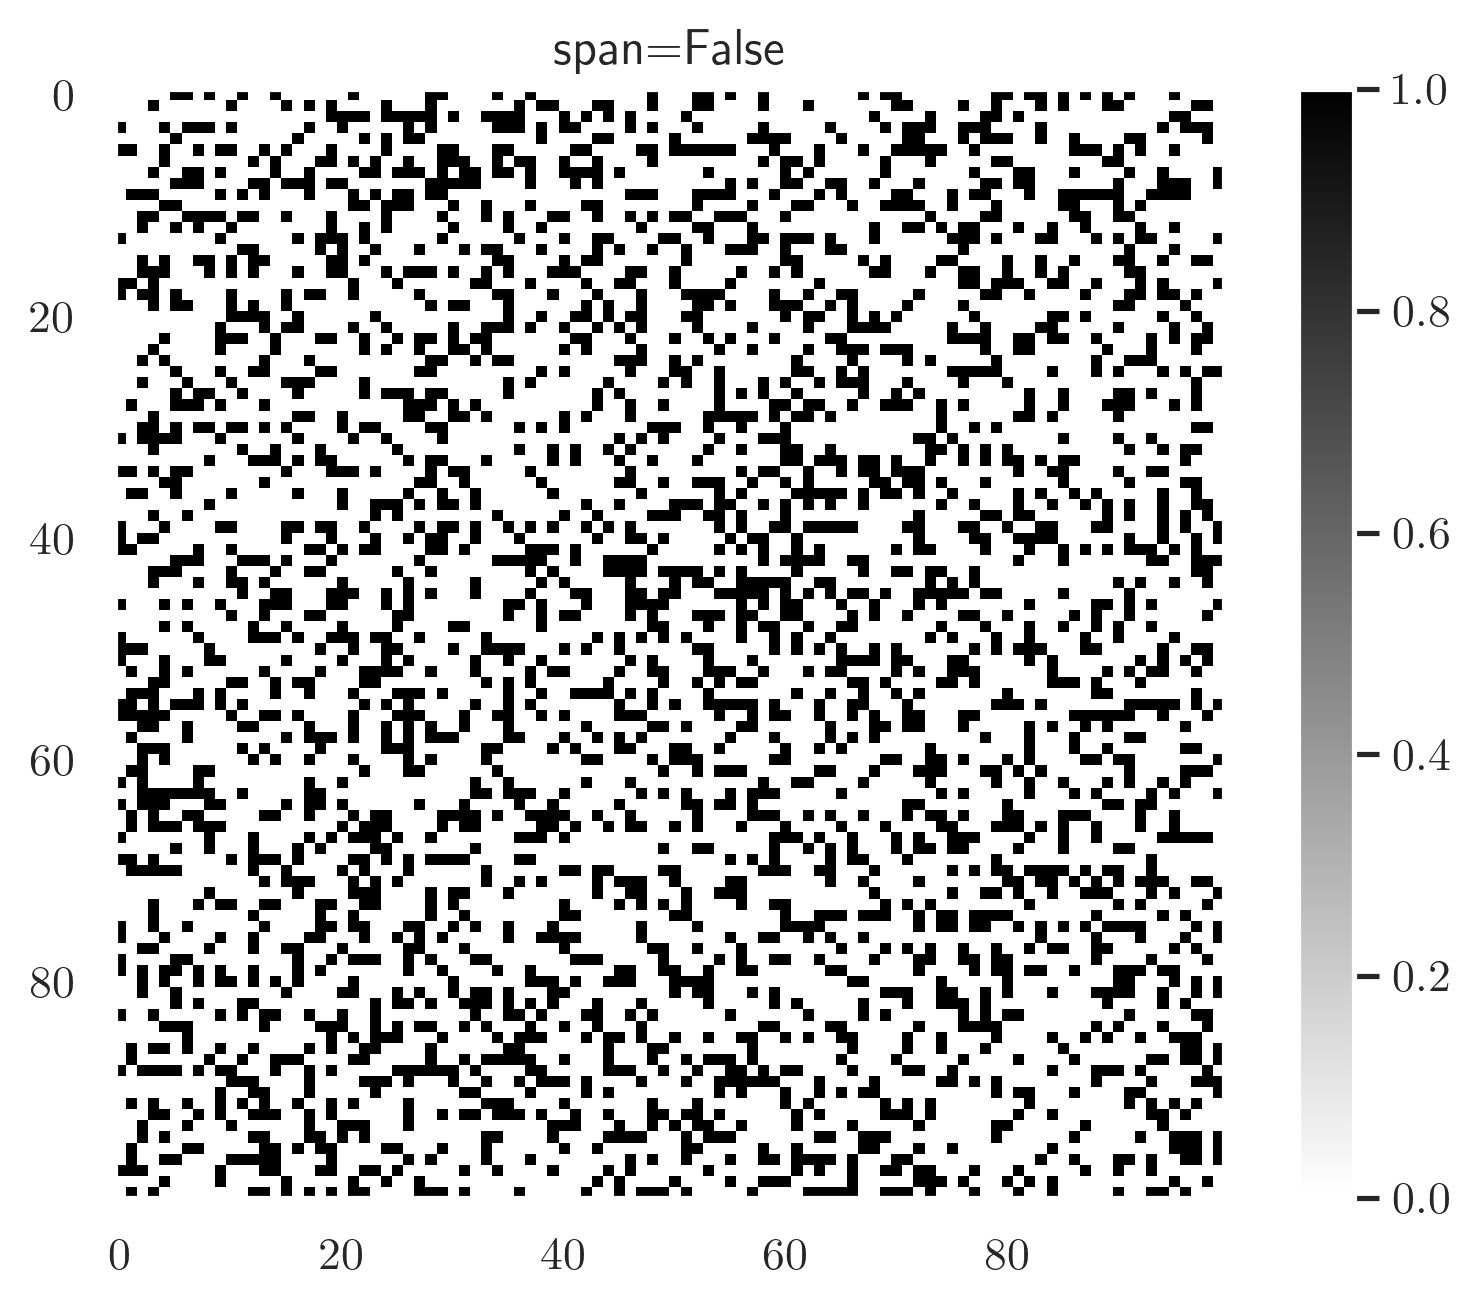

Next


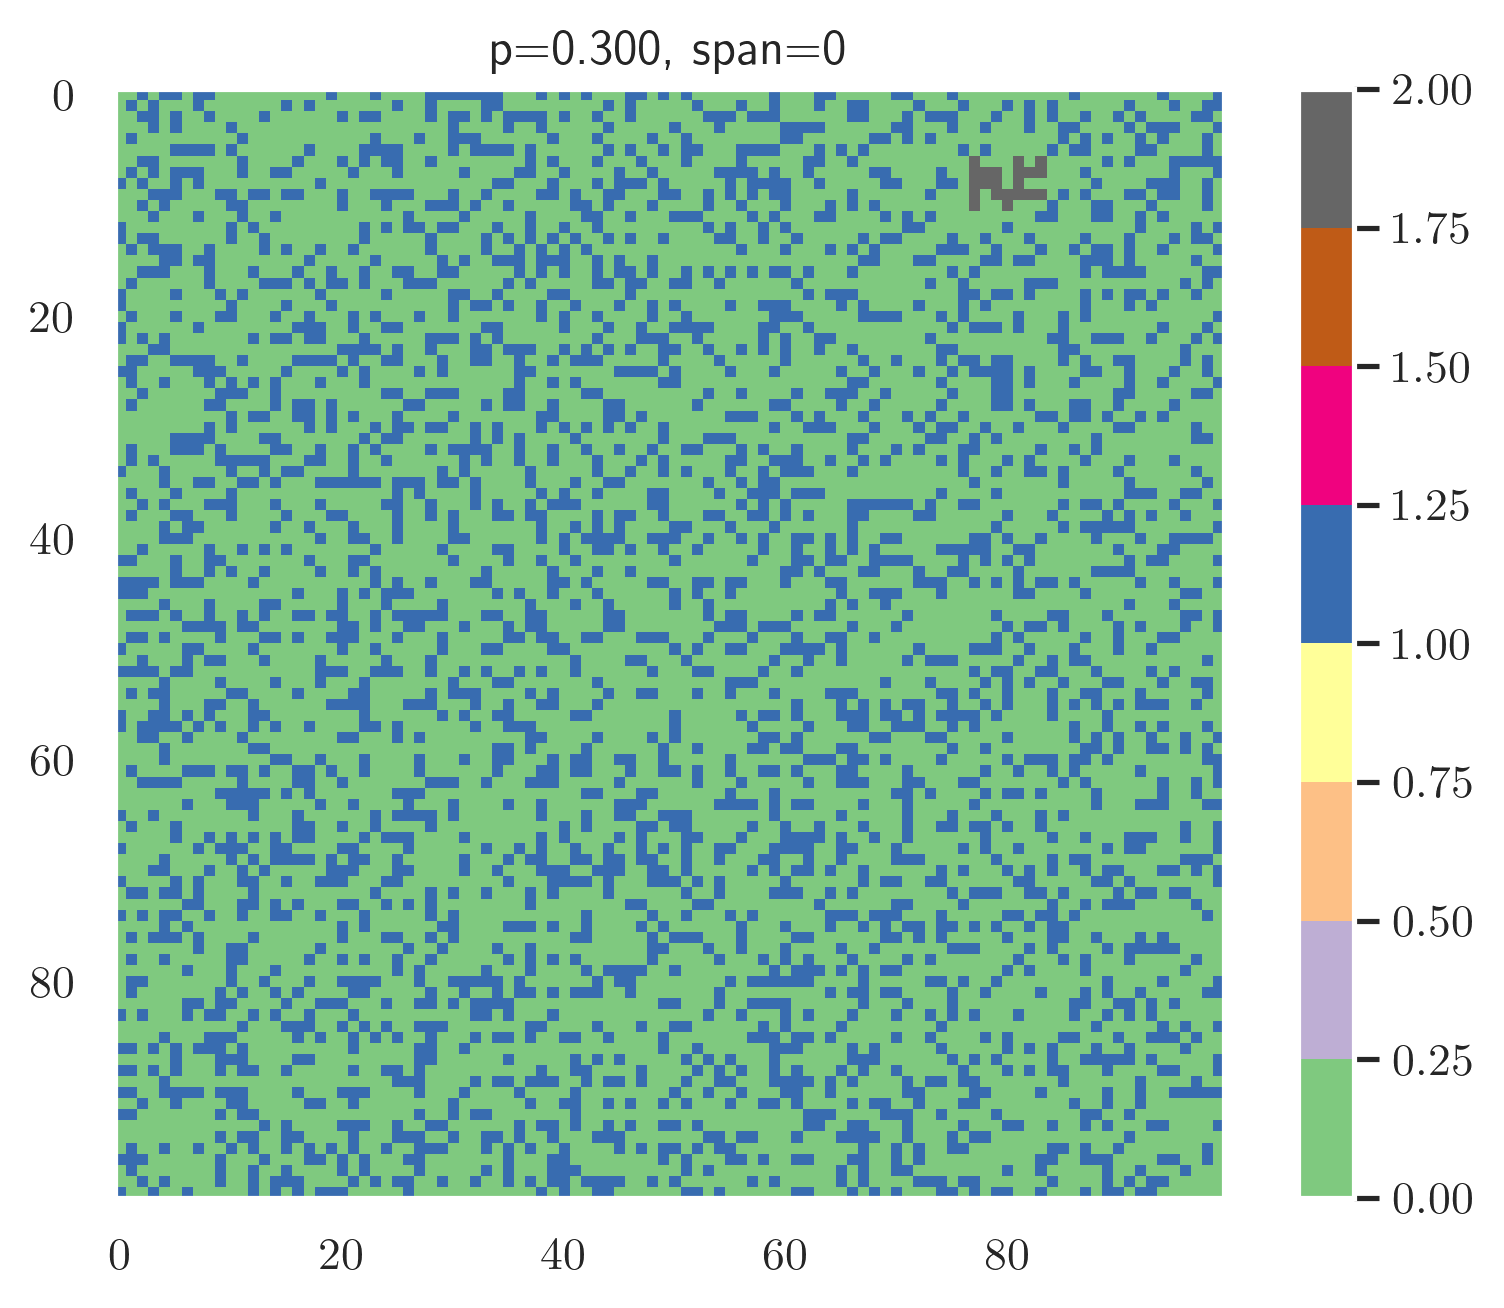

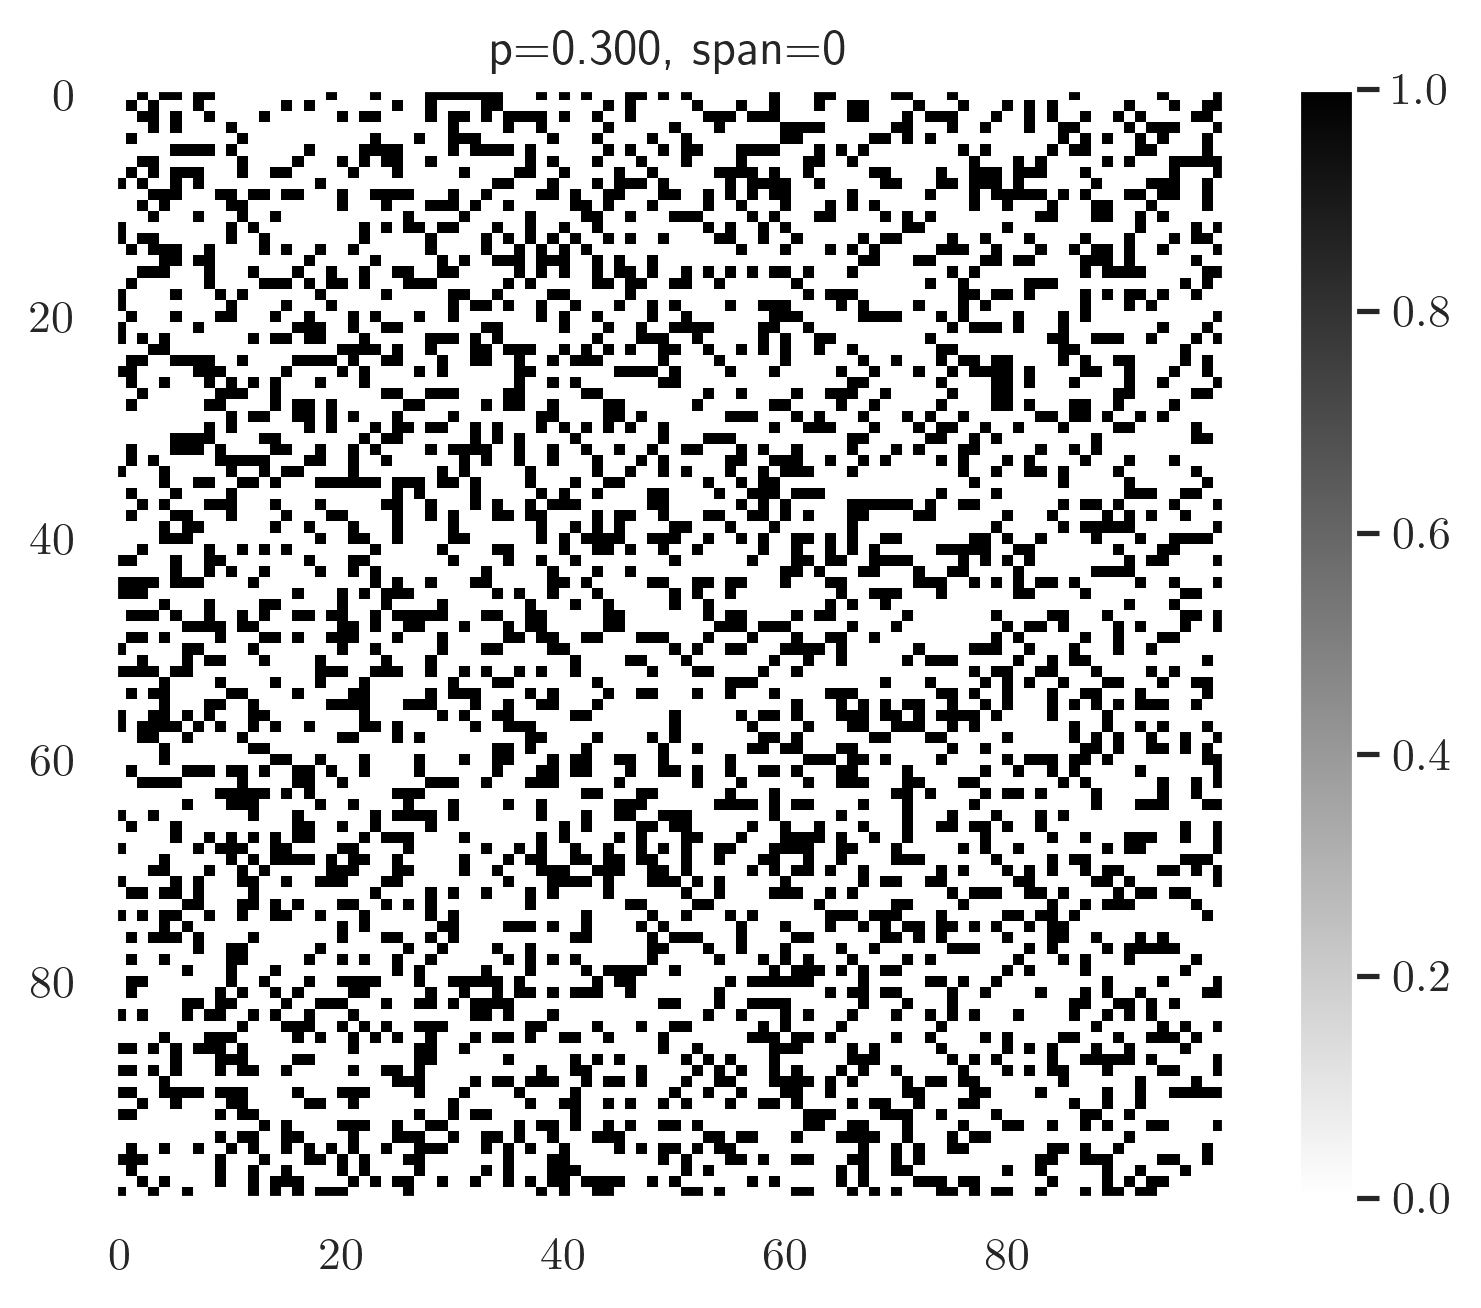

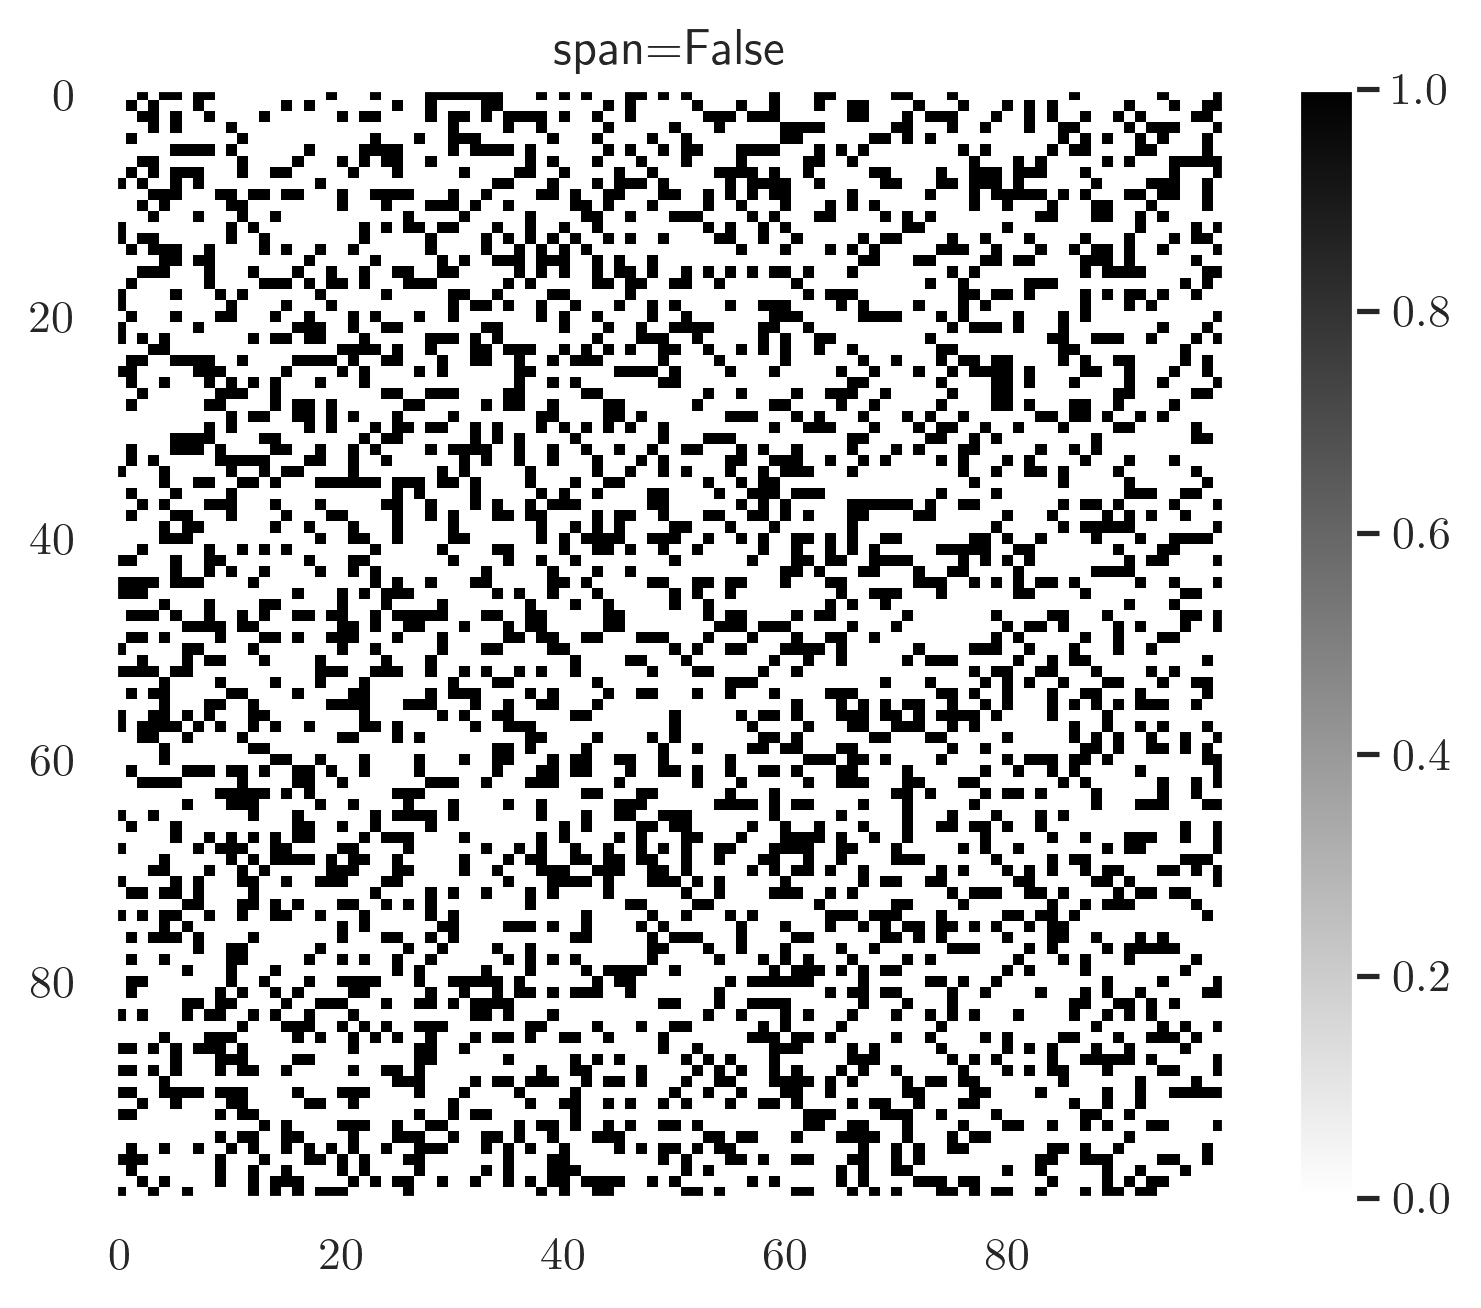

Next


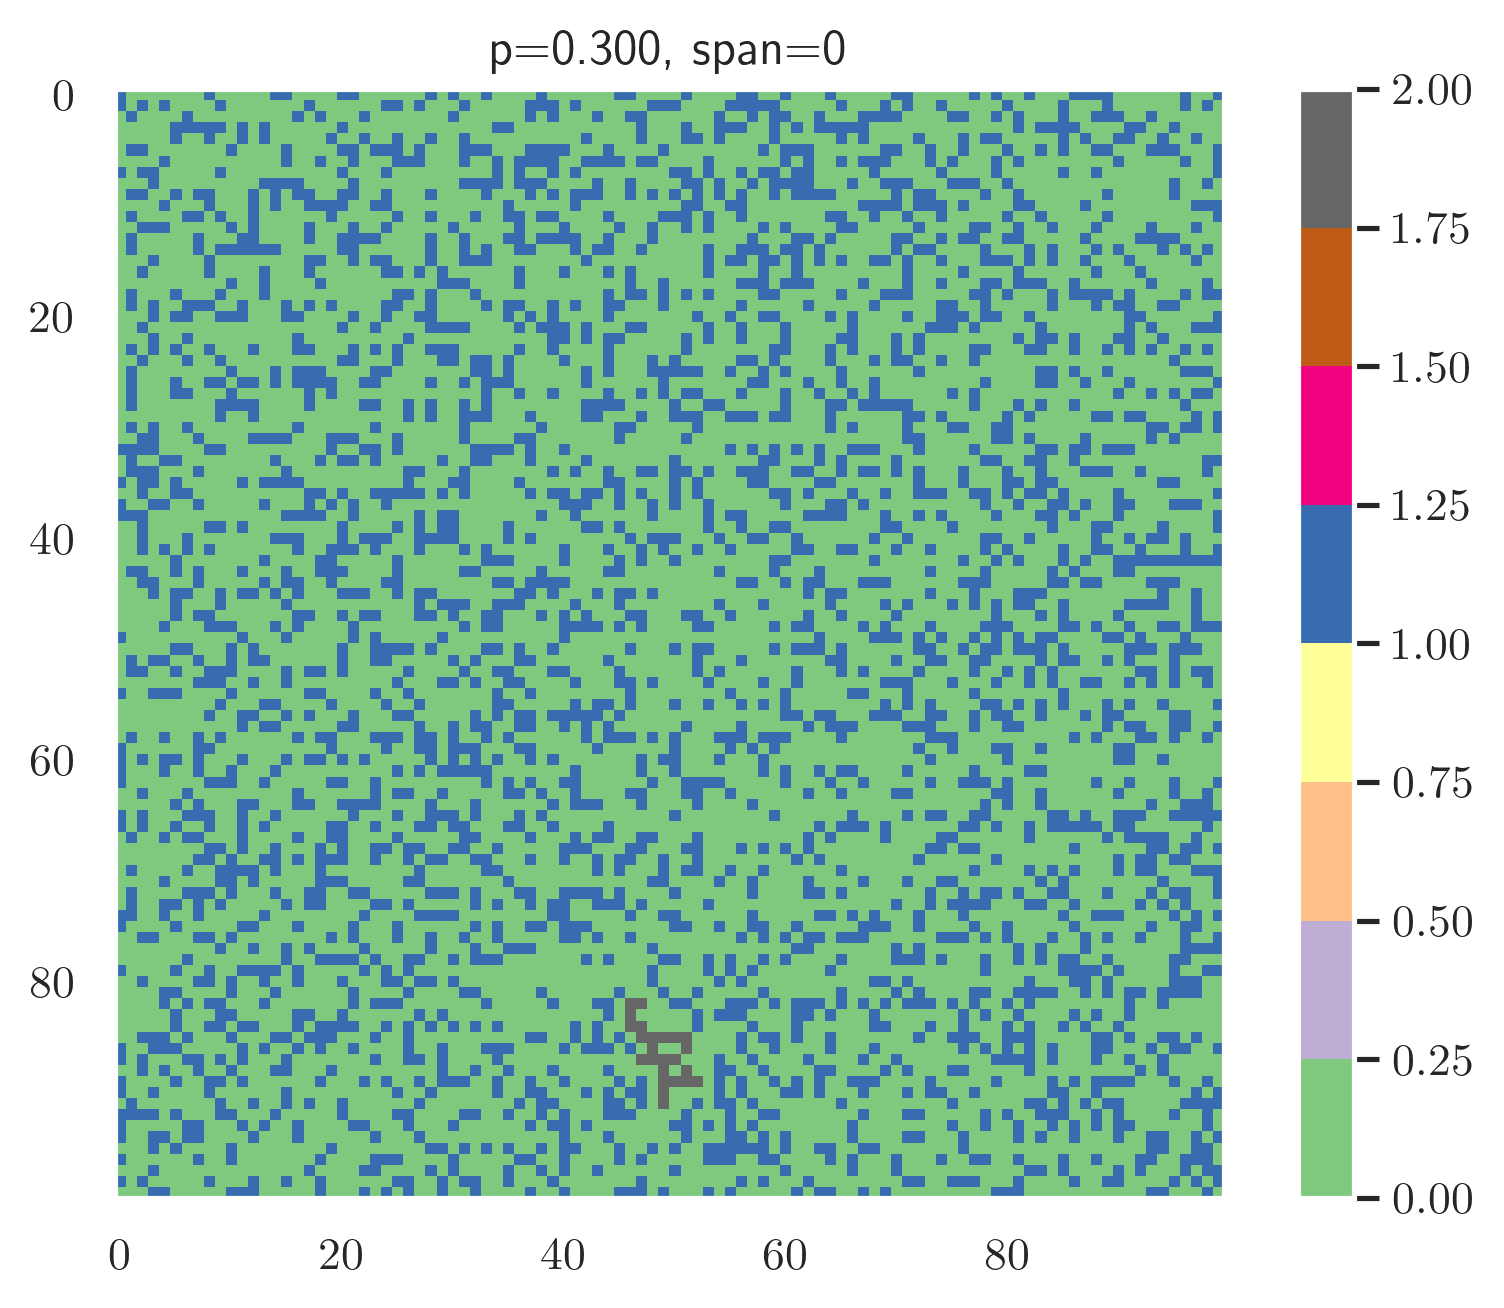

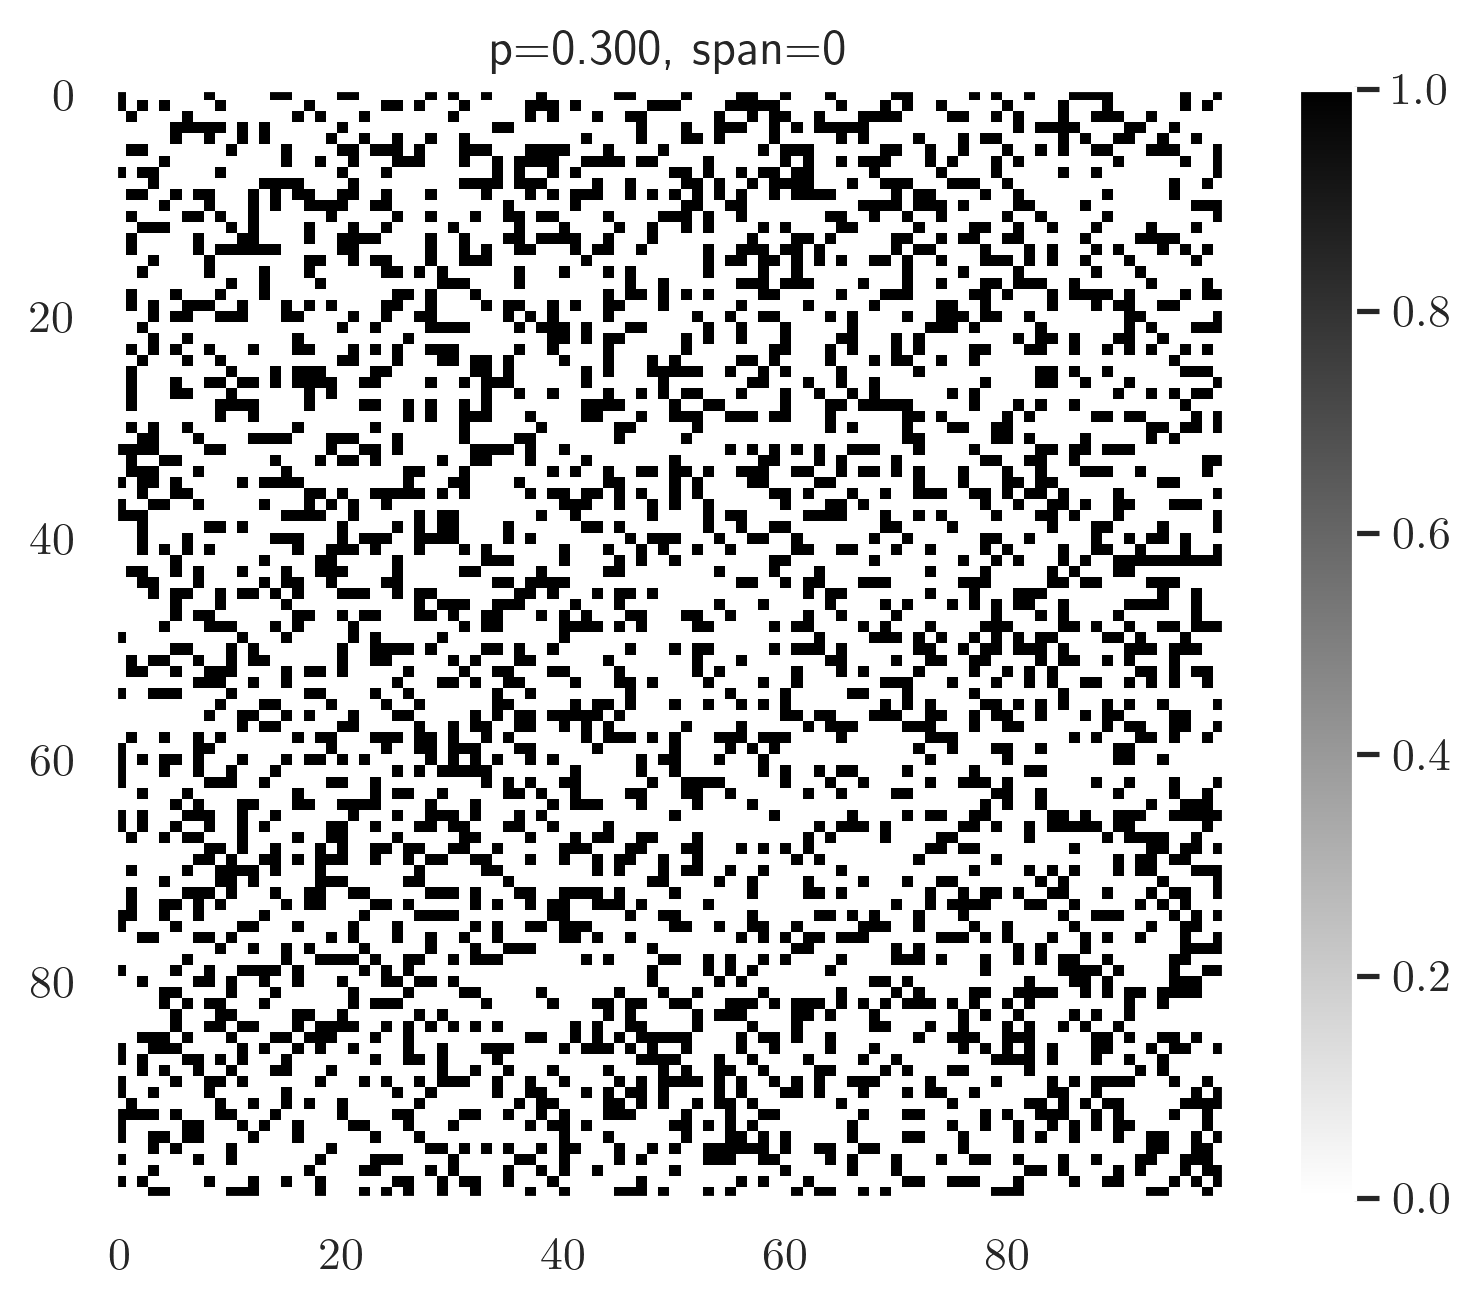

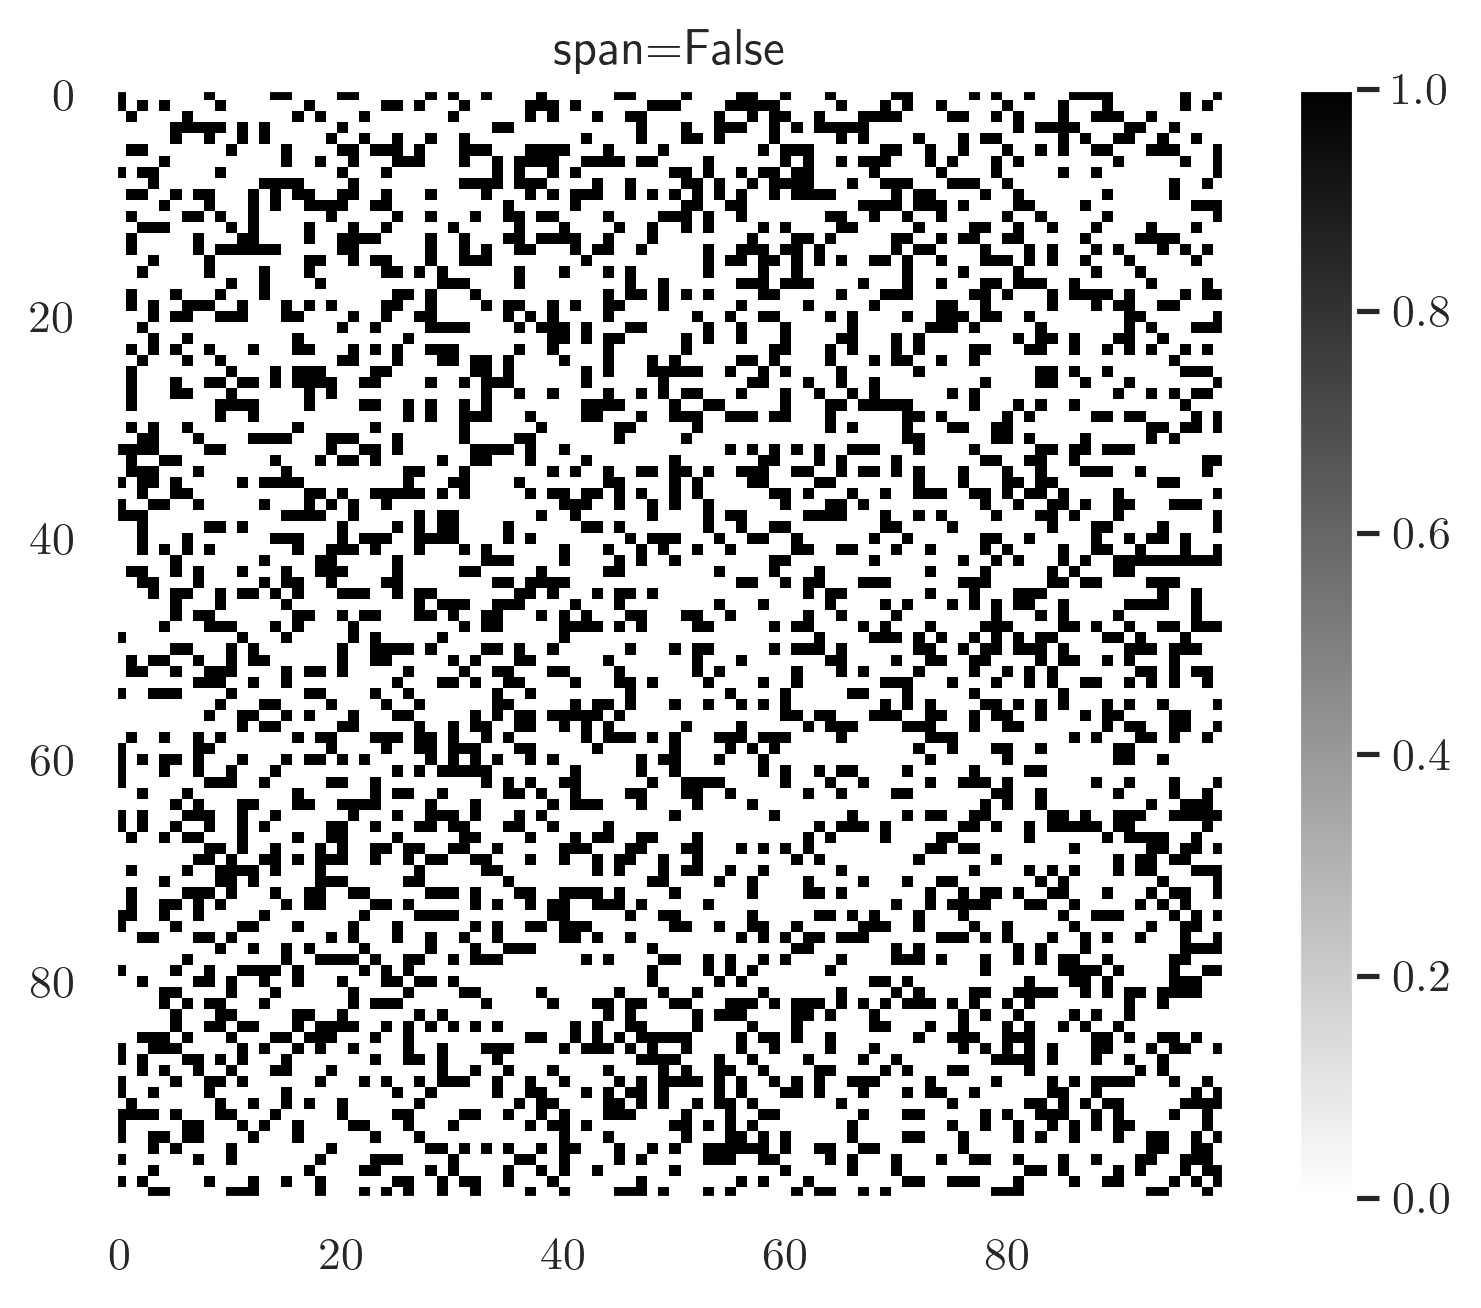

Next


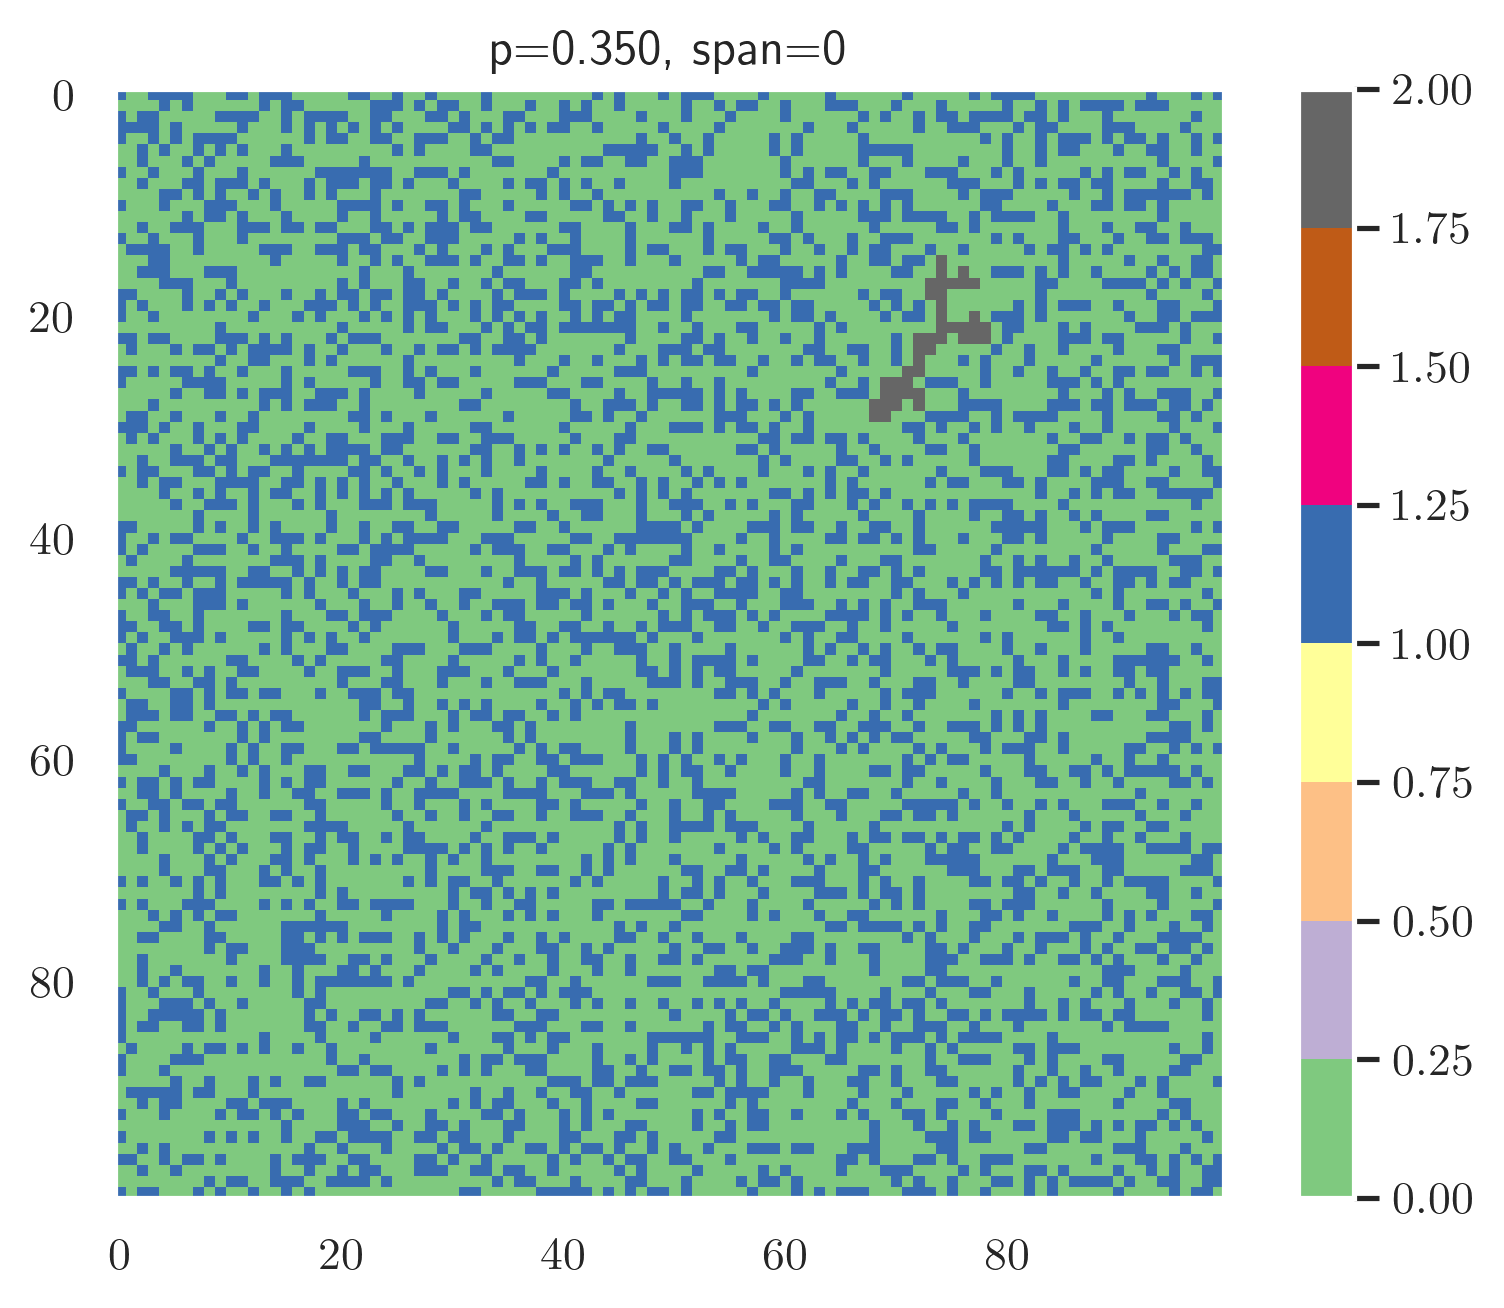

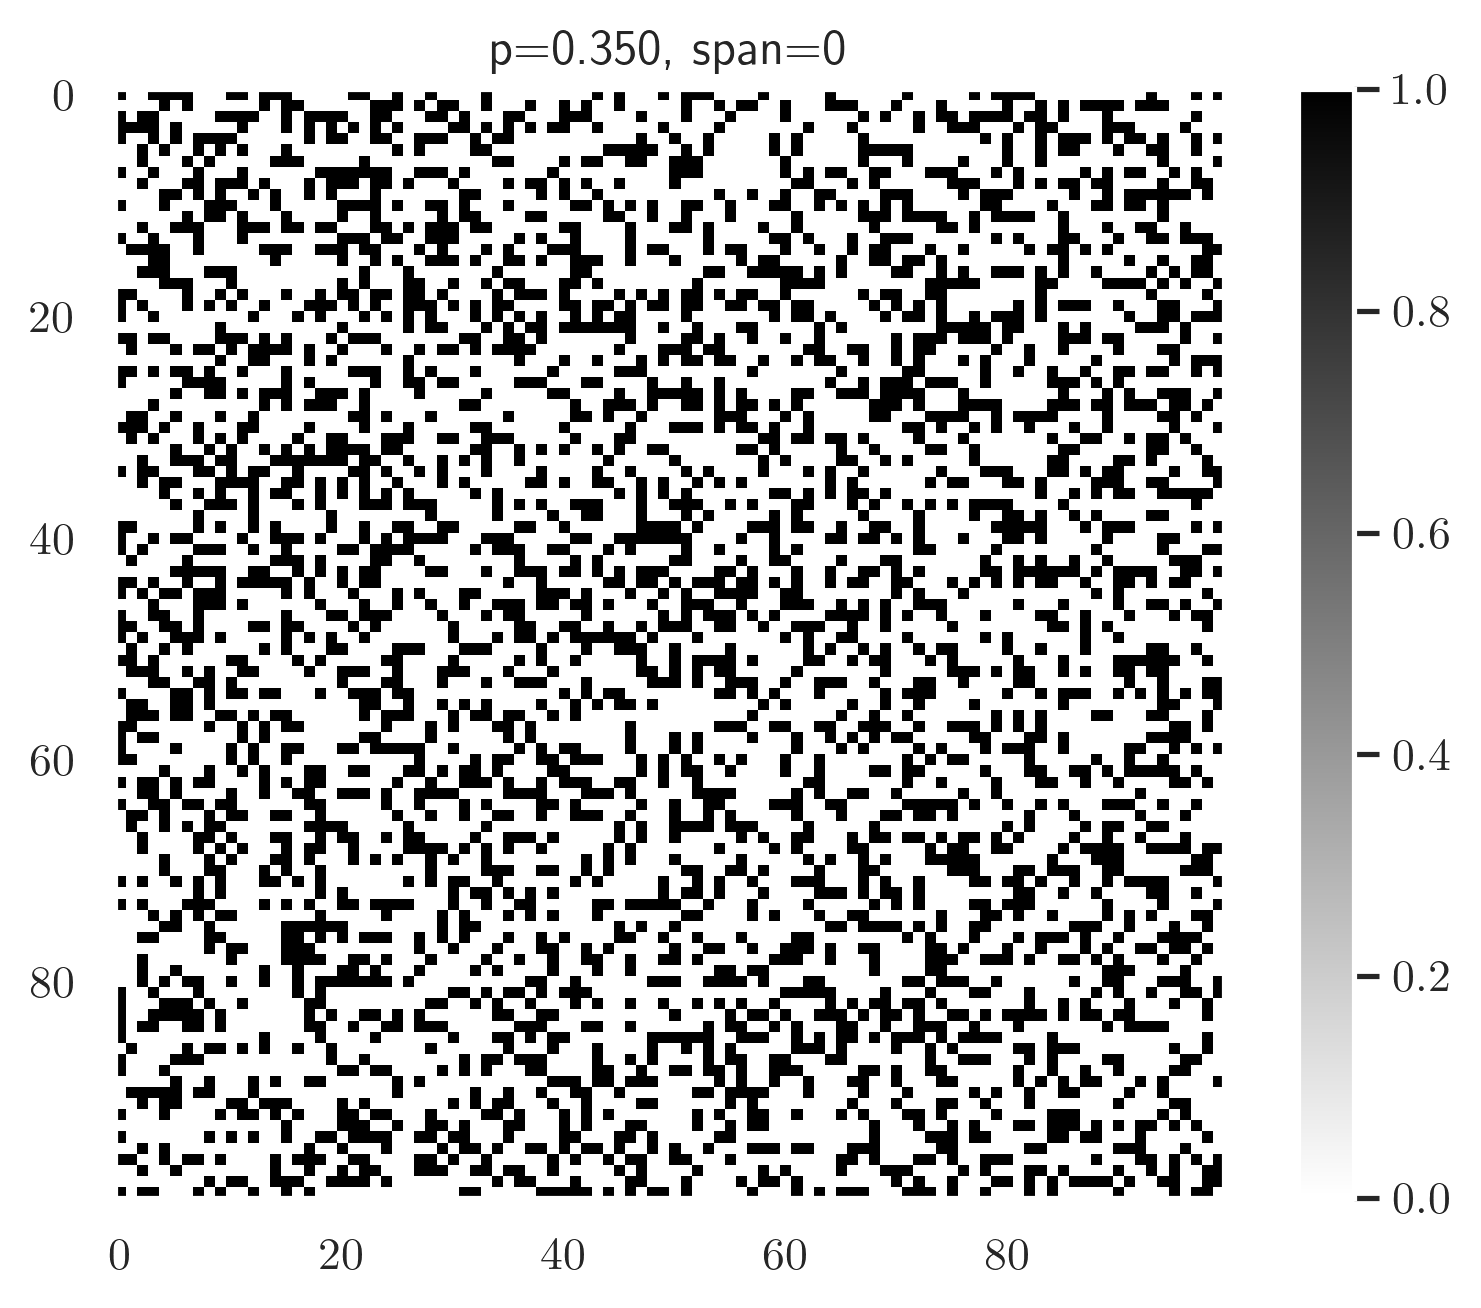

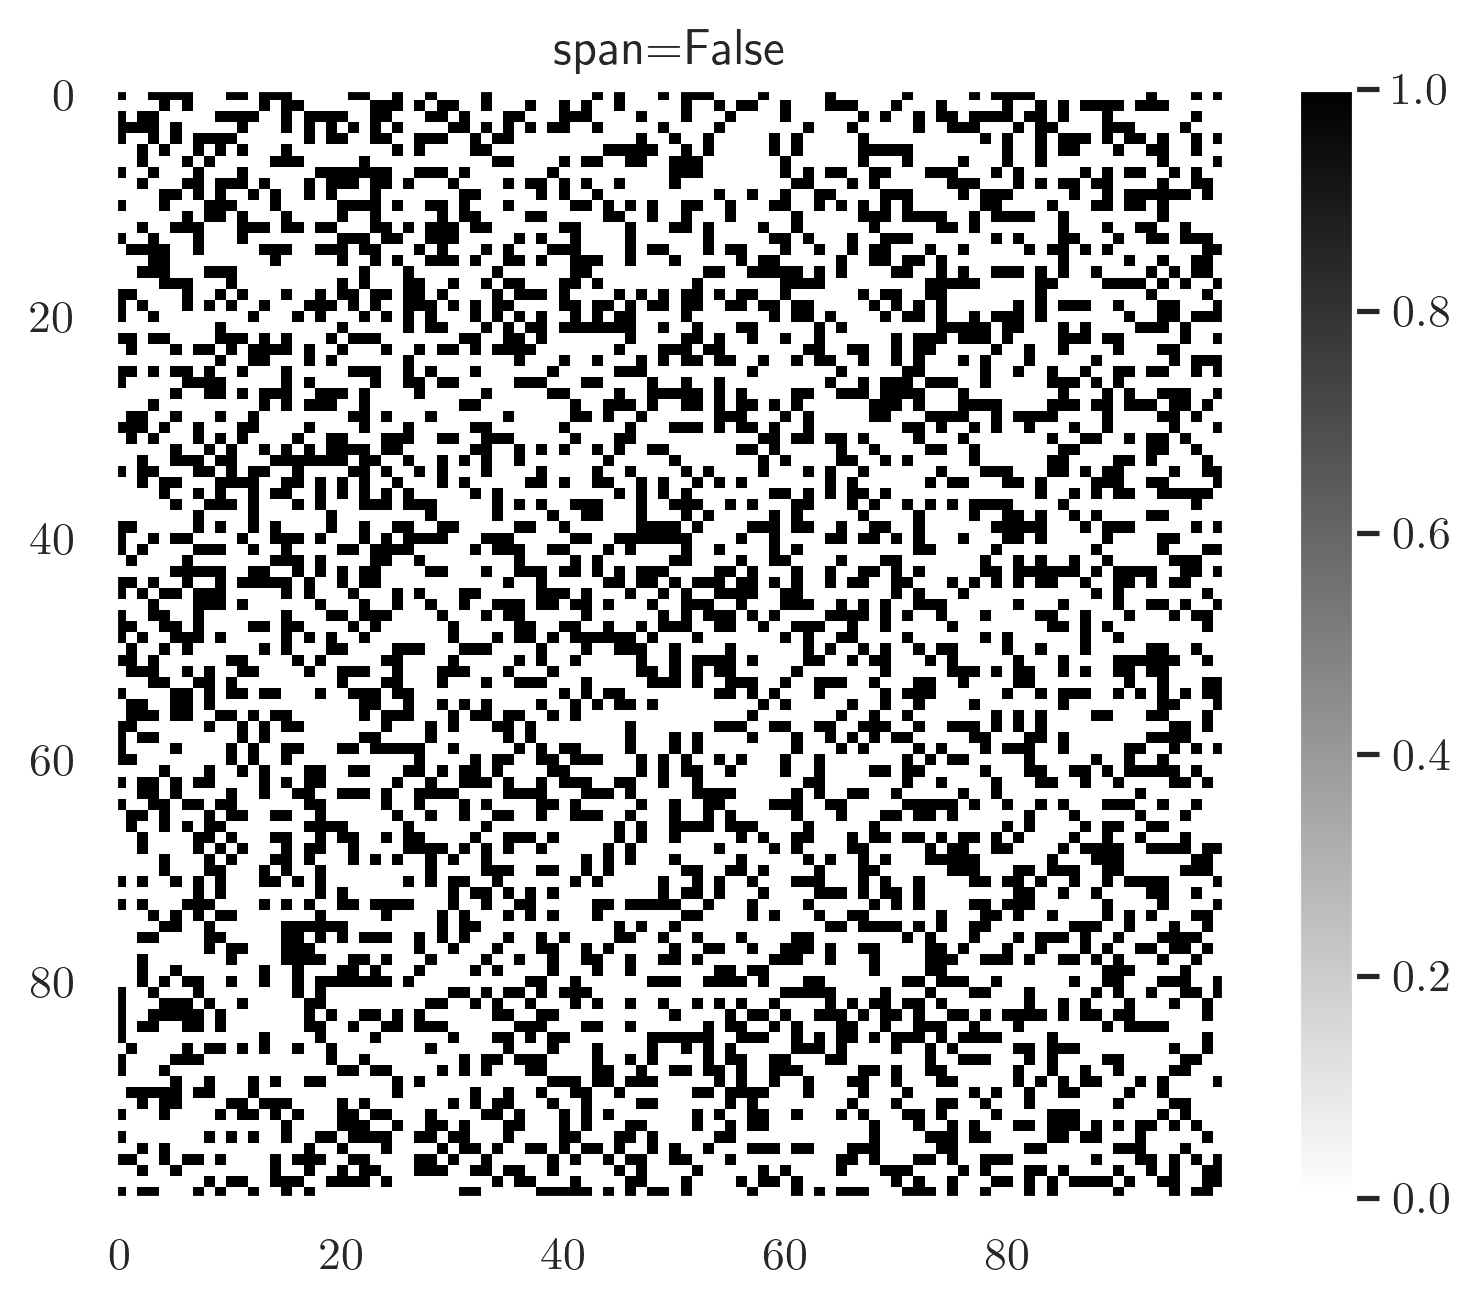

Next


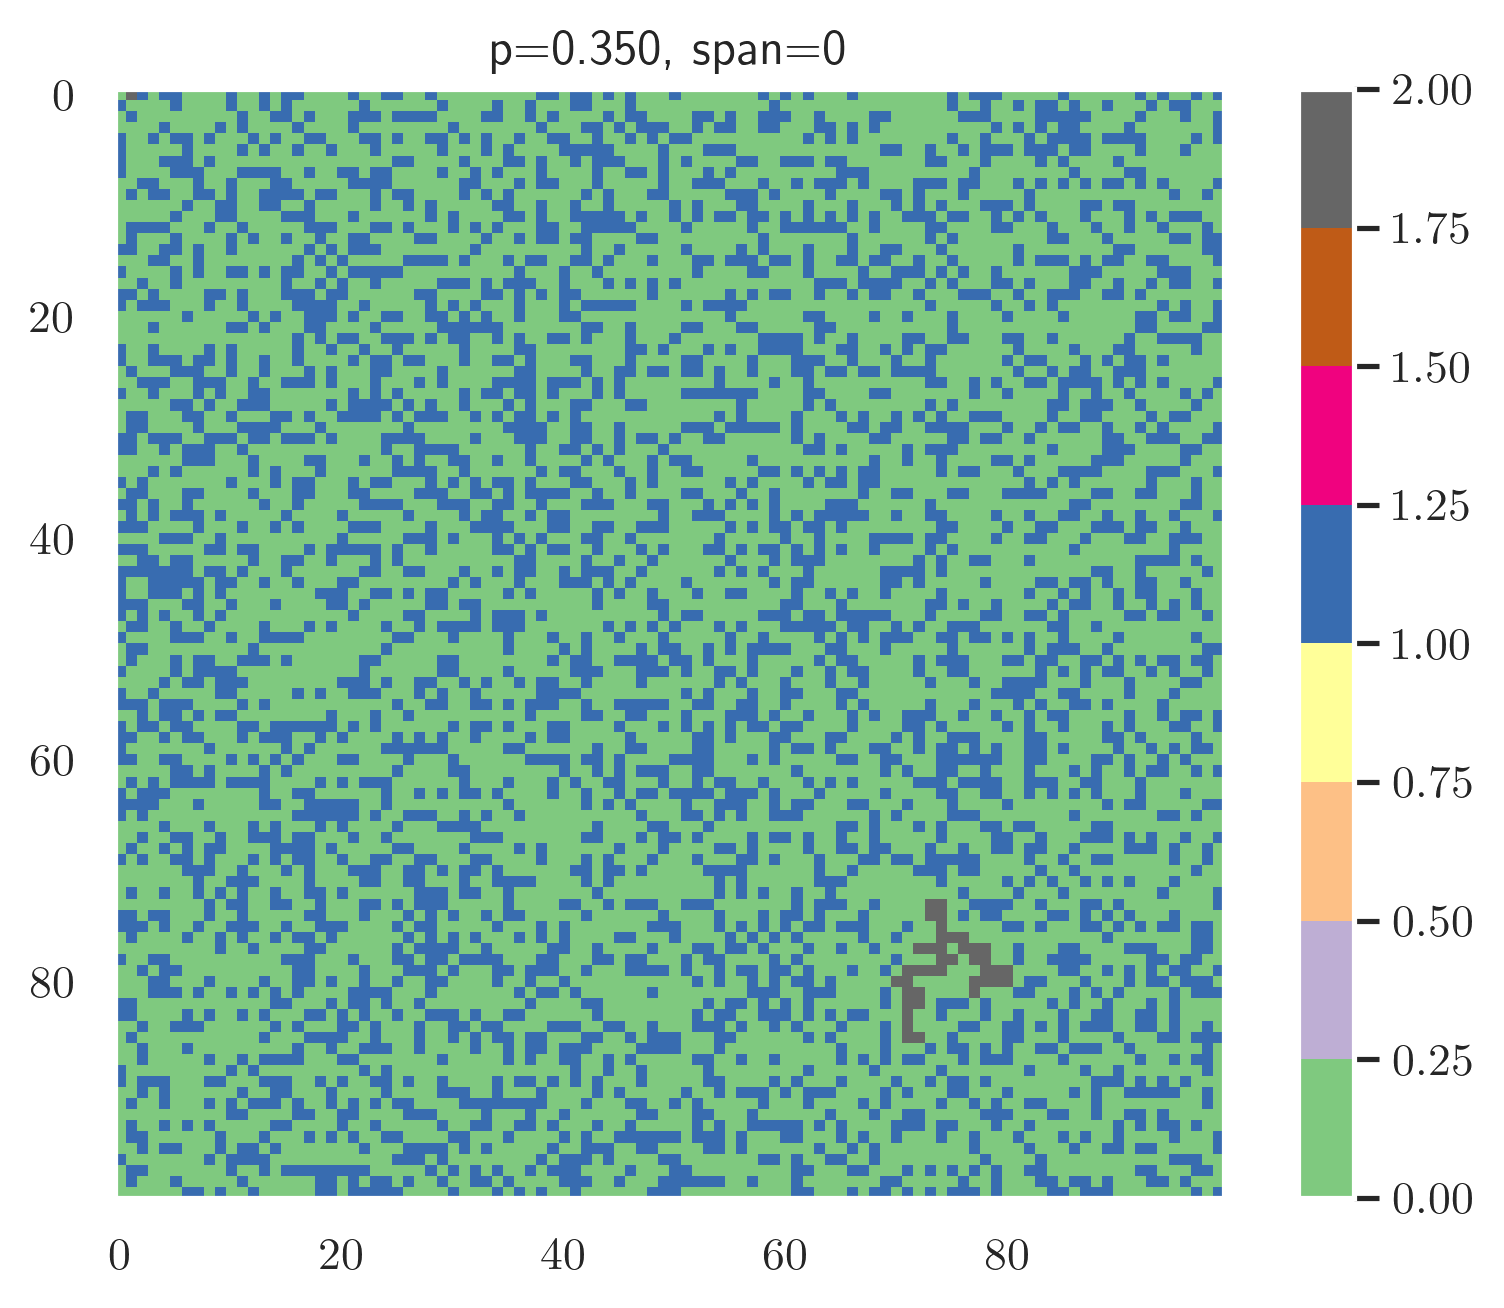

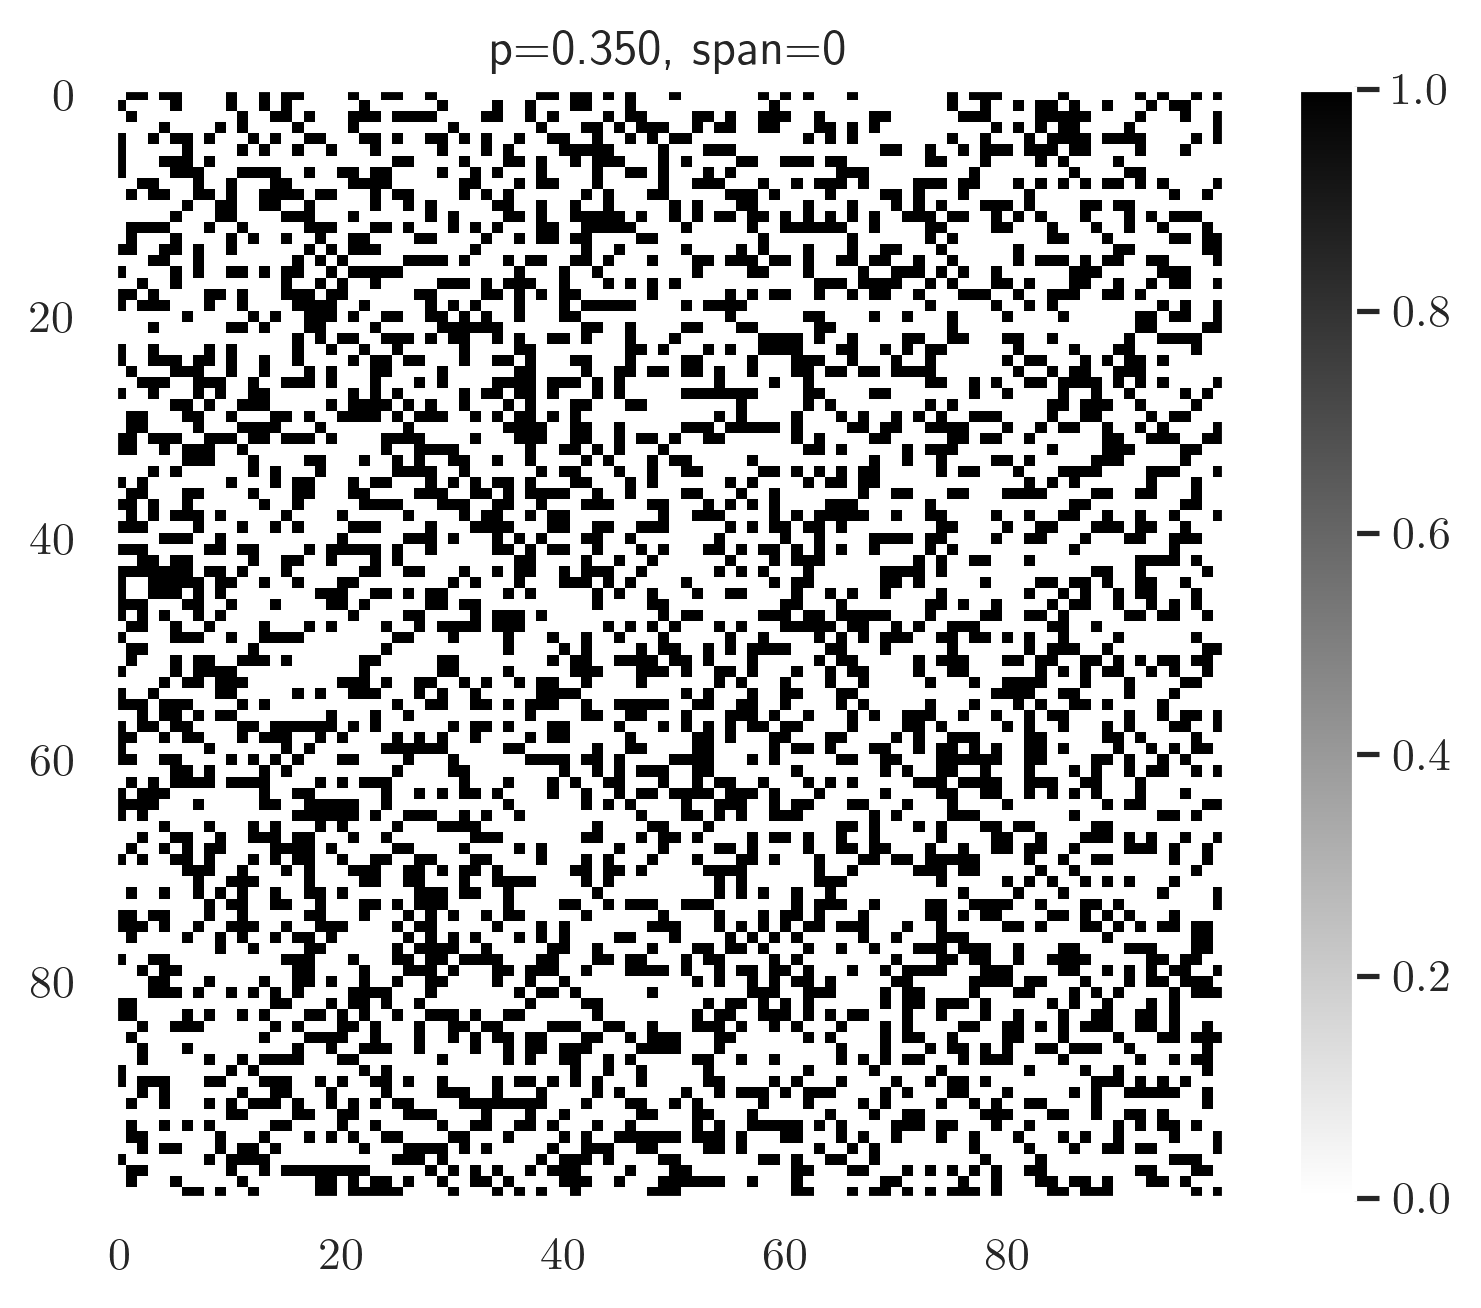

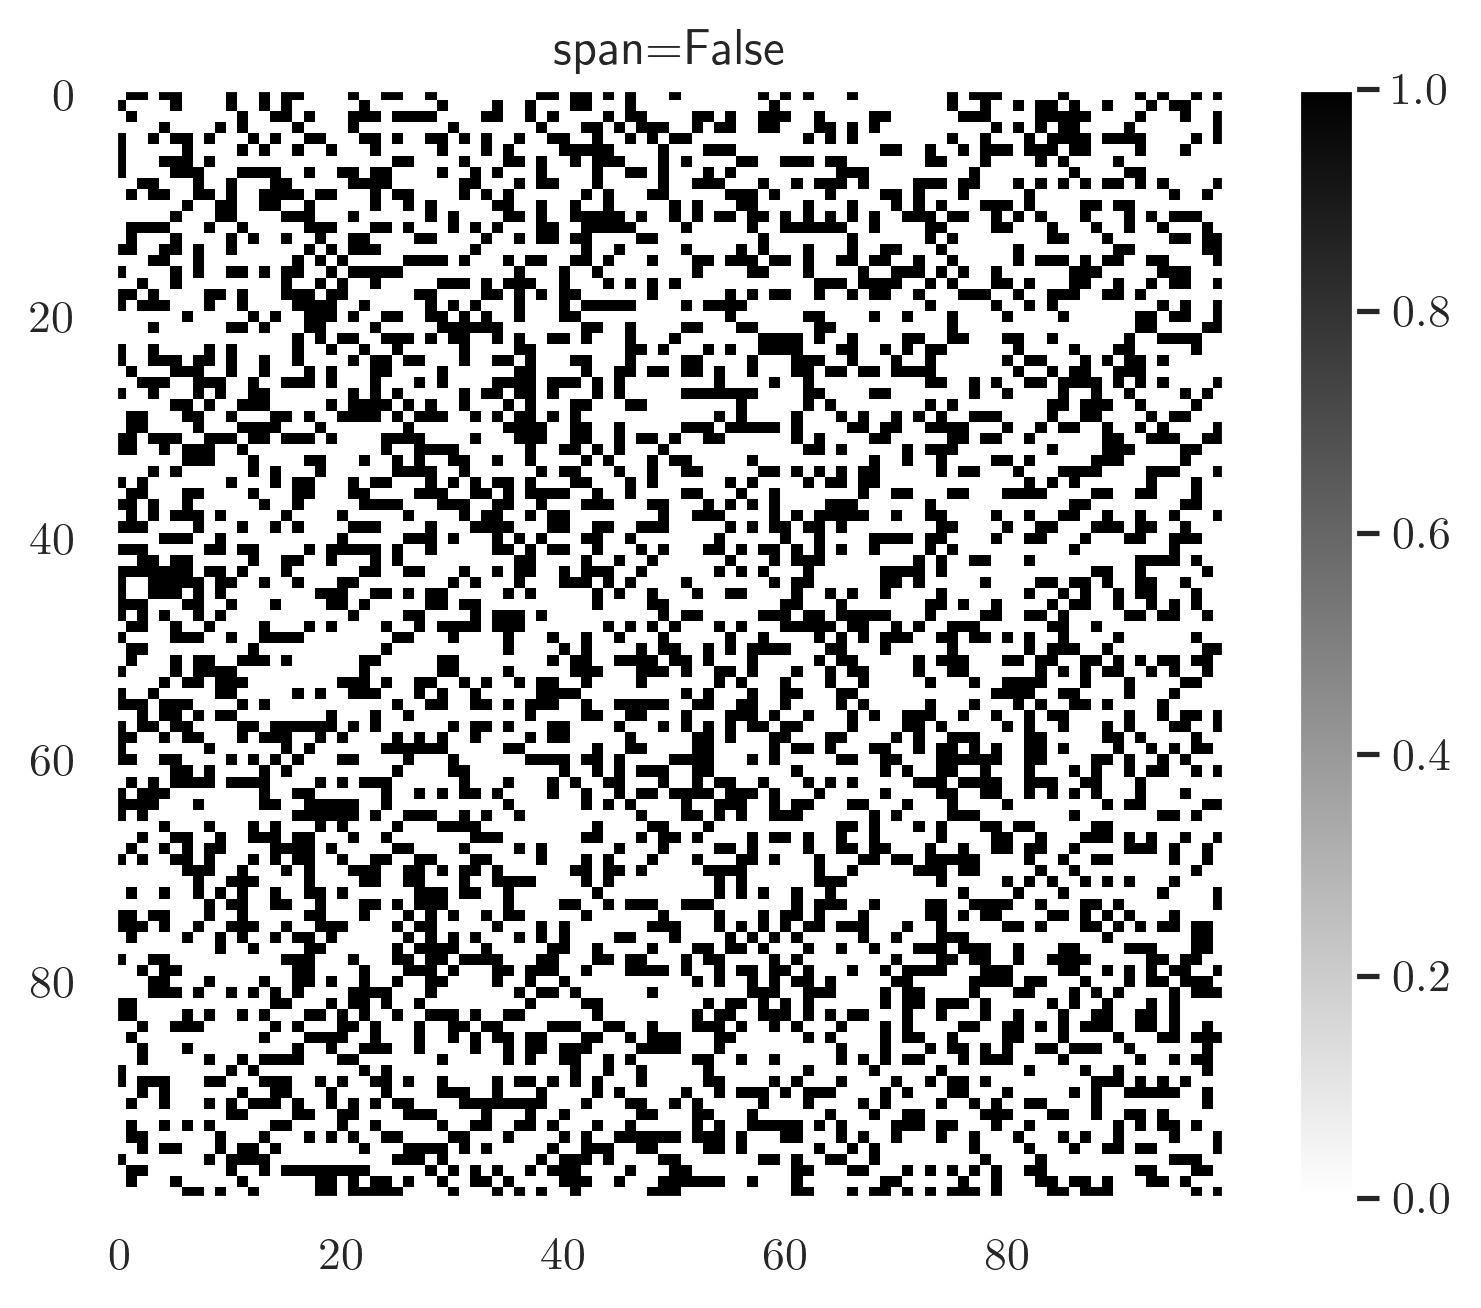

Next


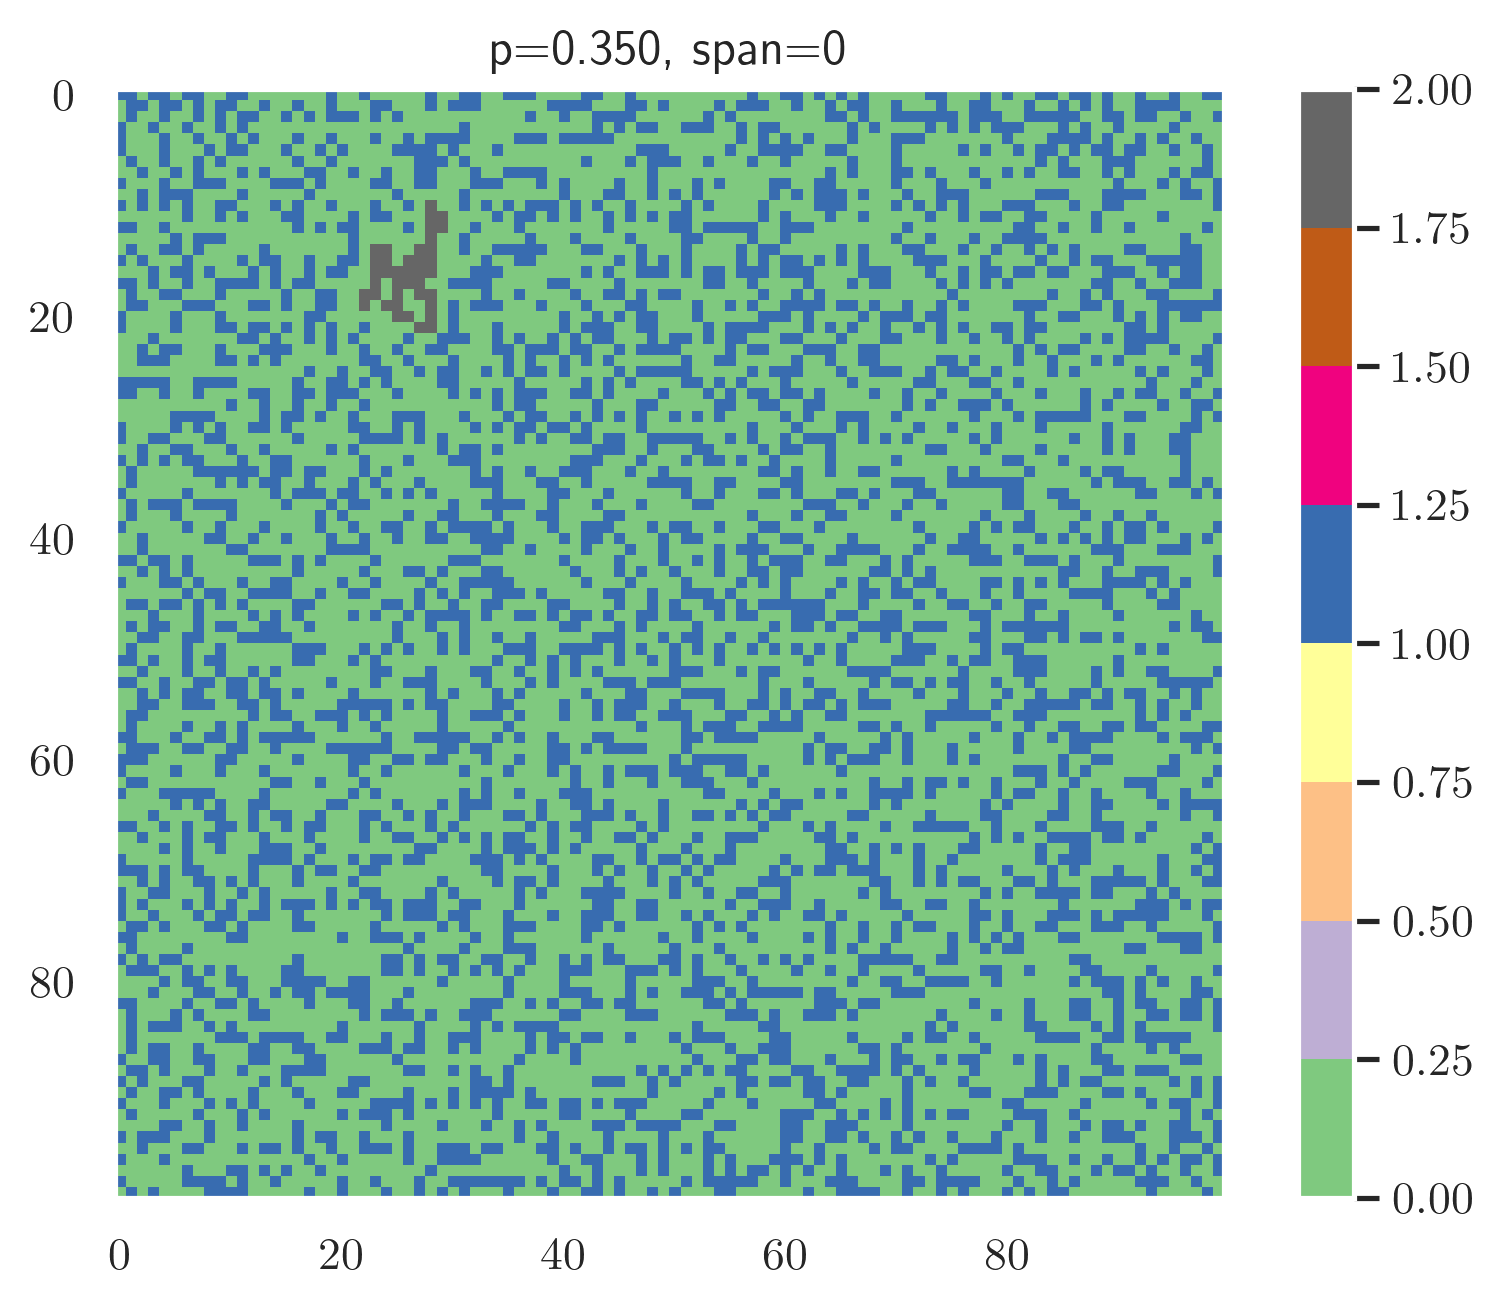

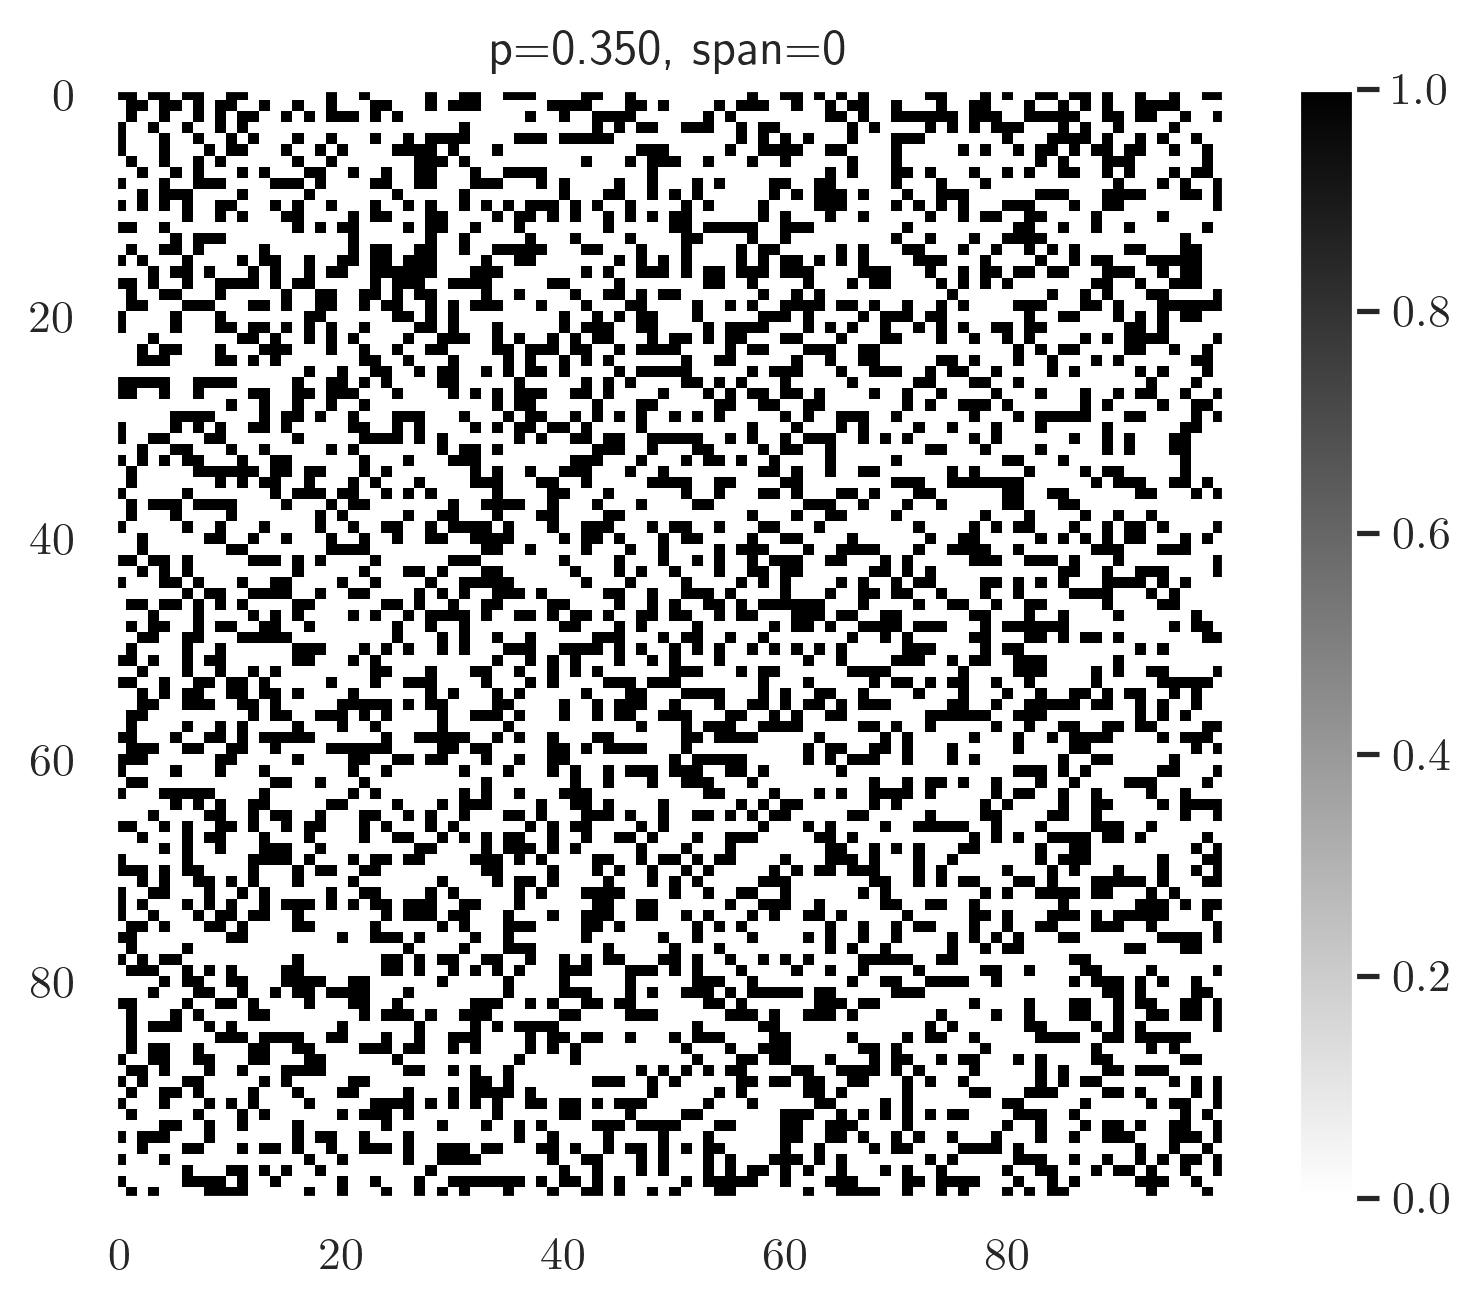

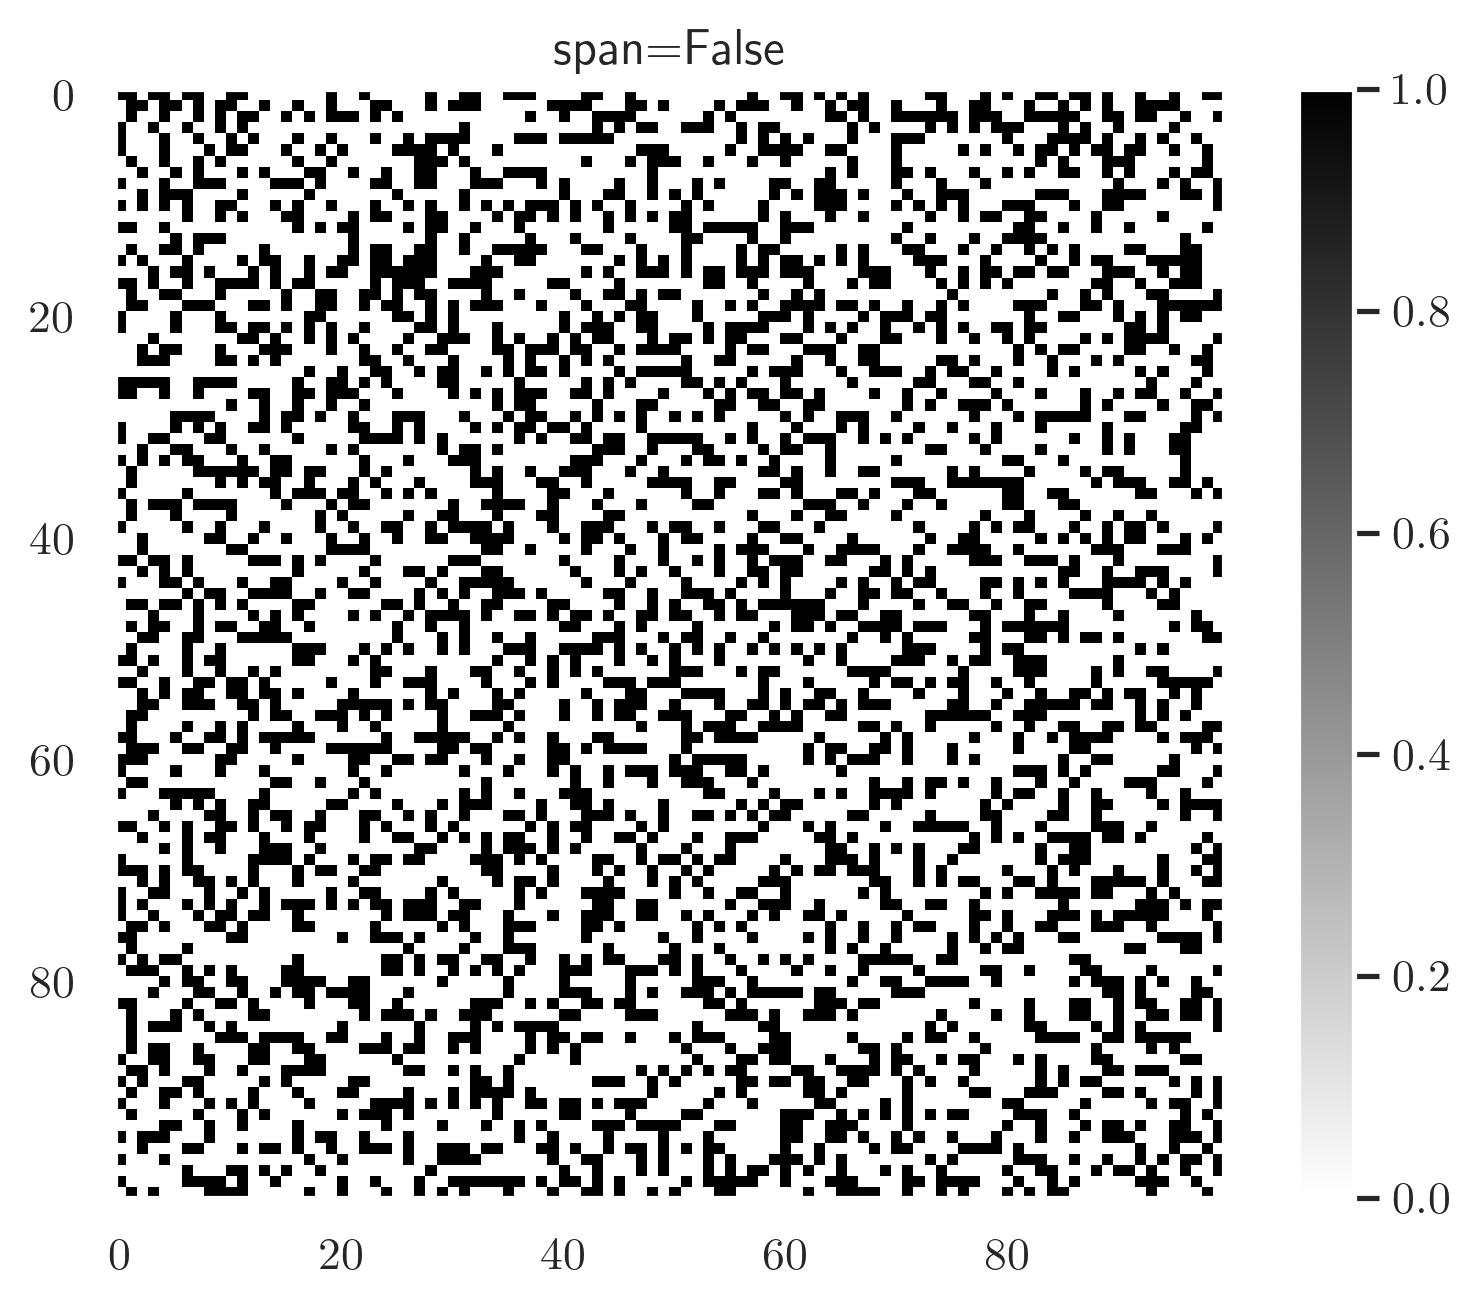

Next


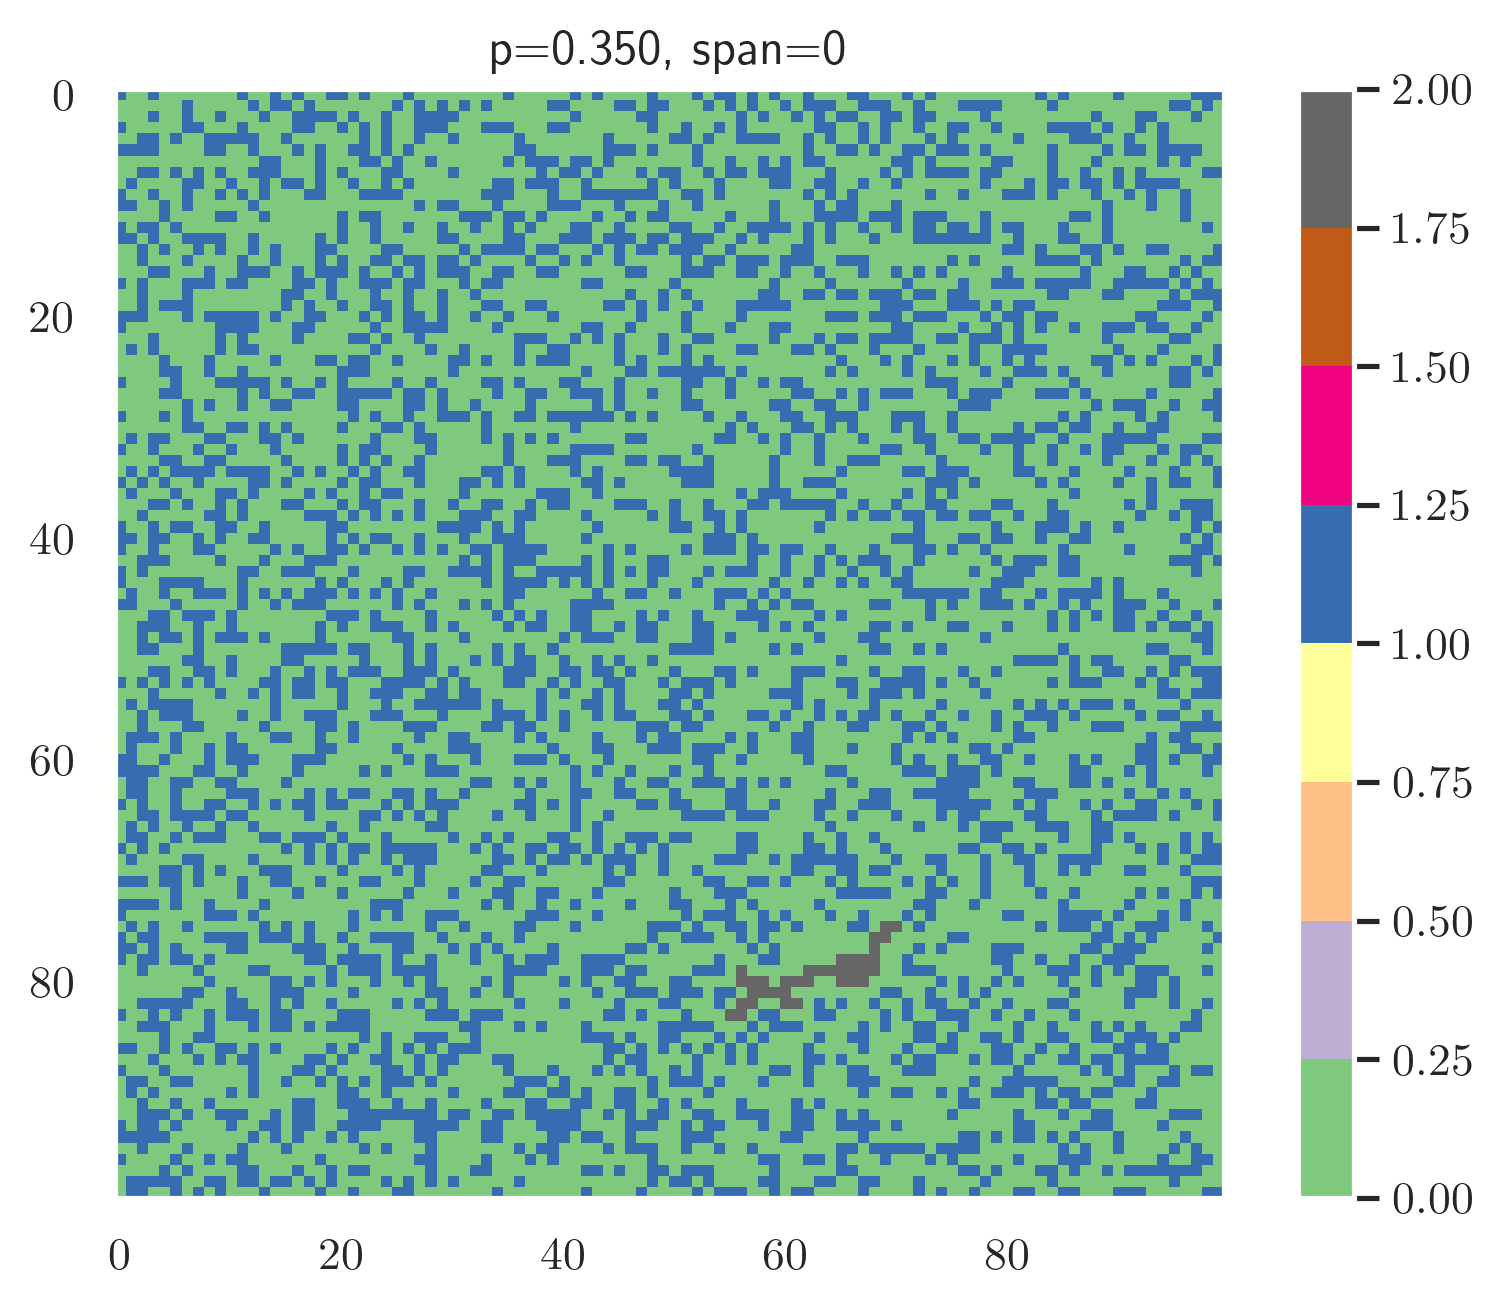

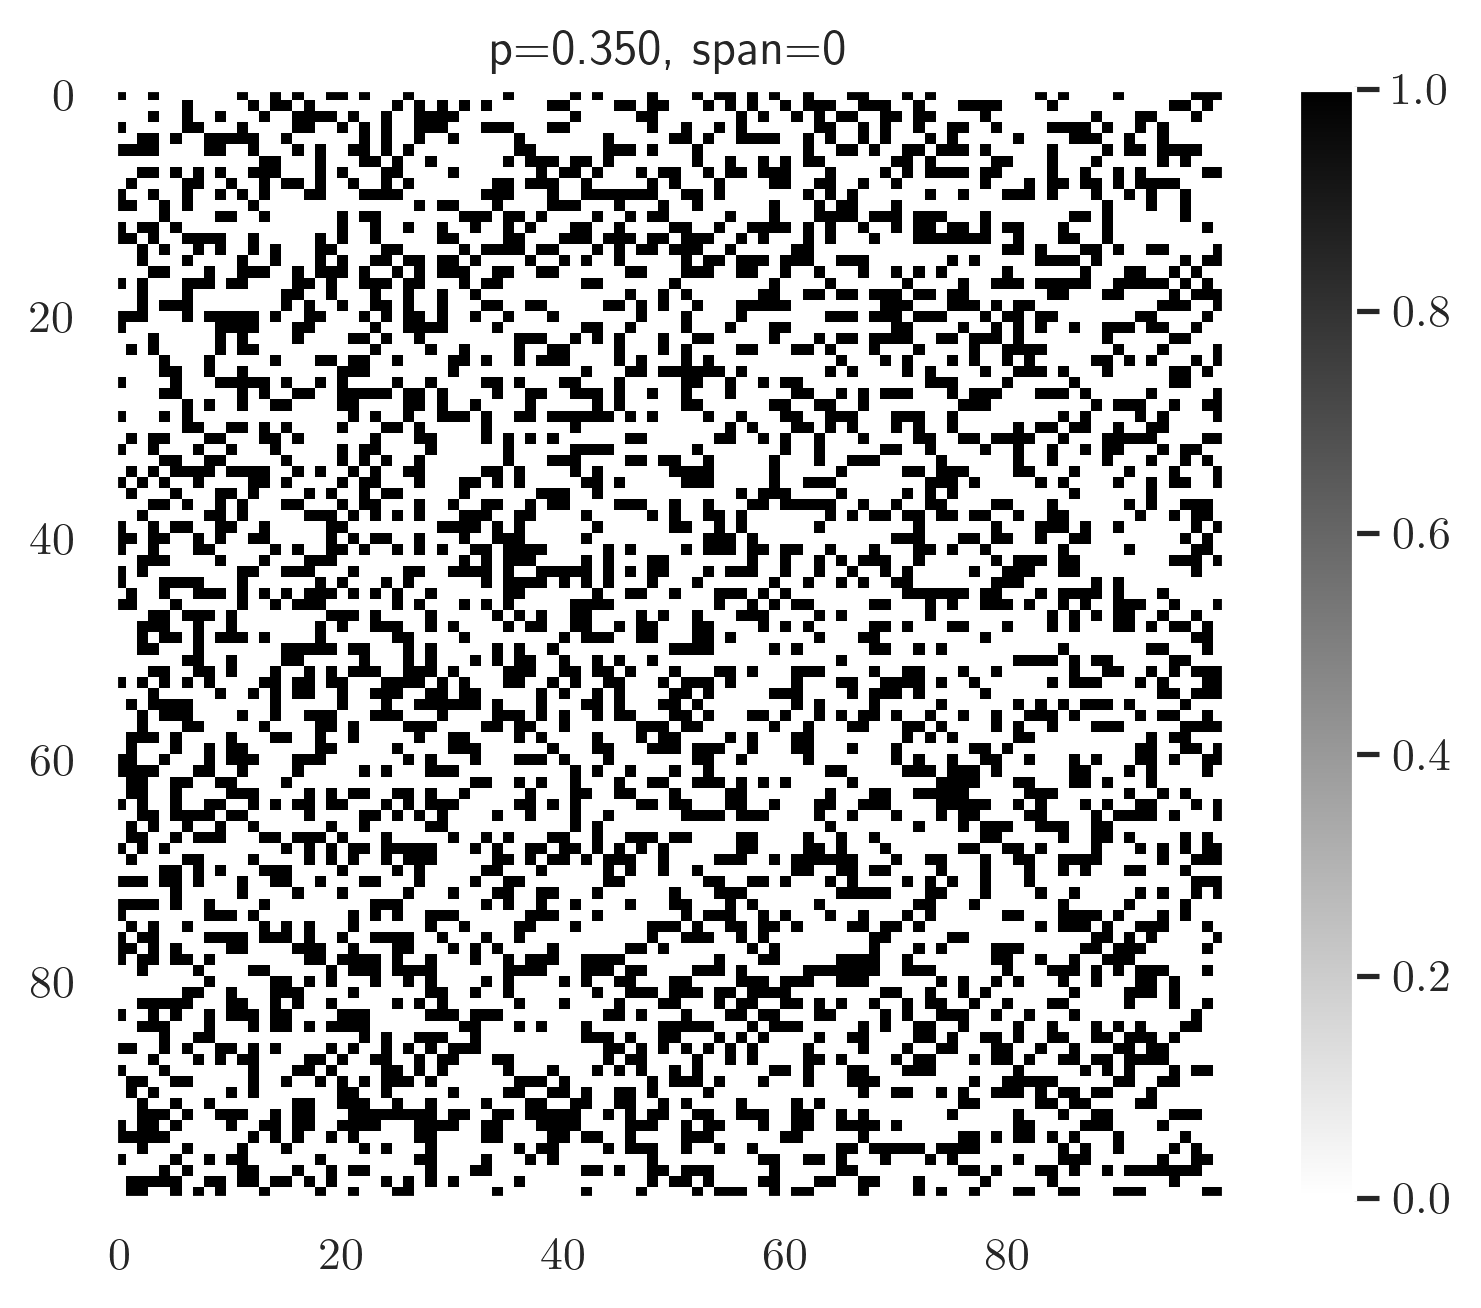

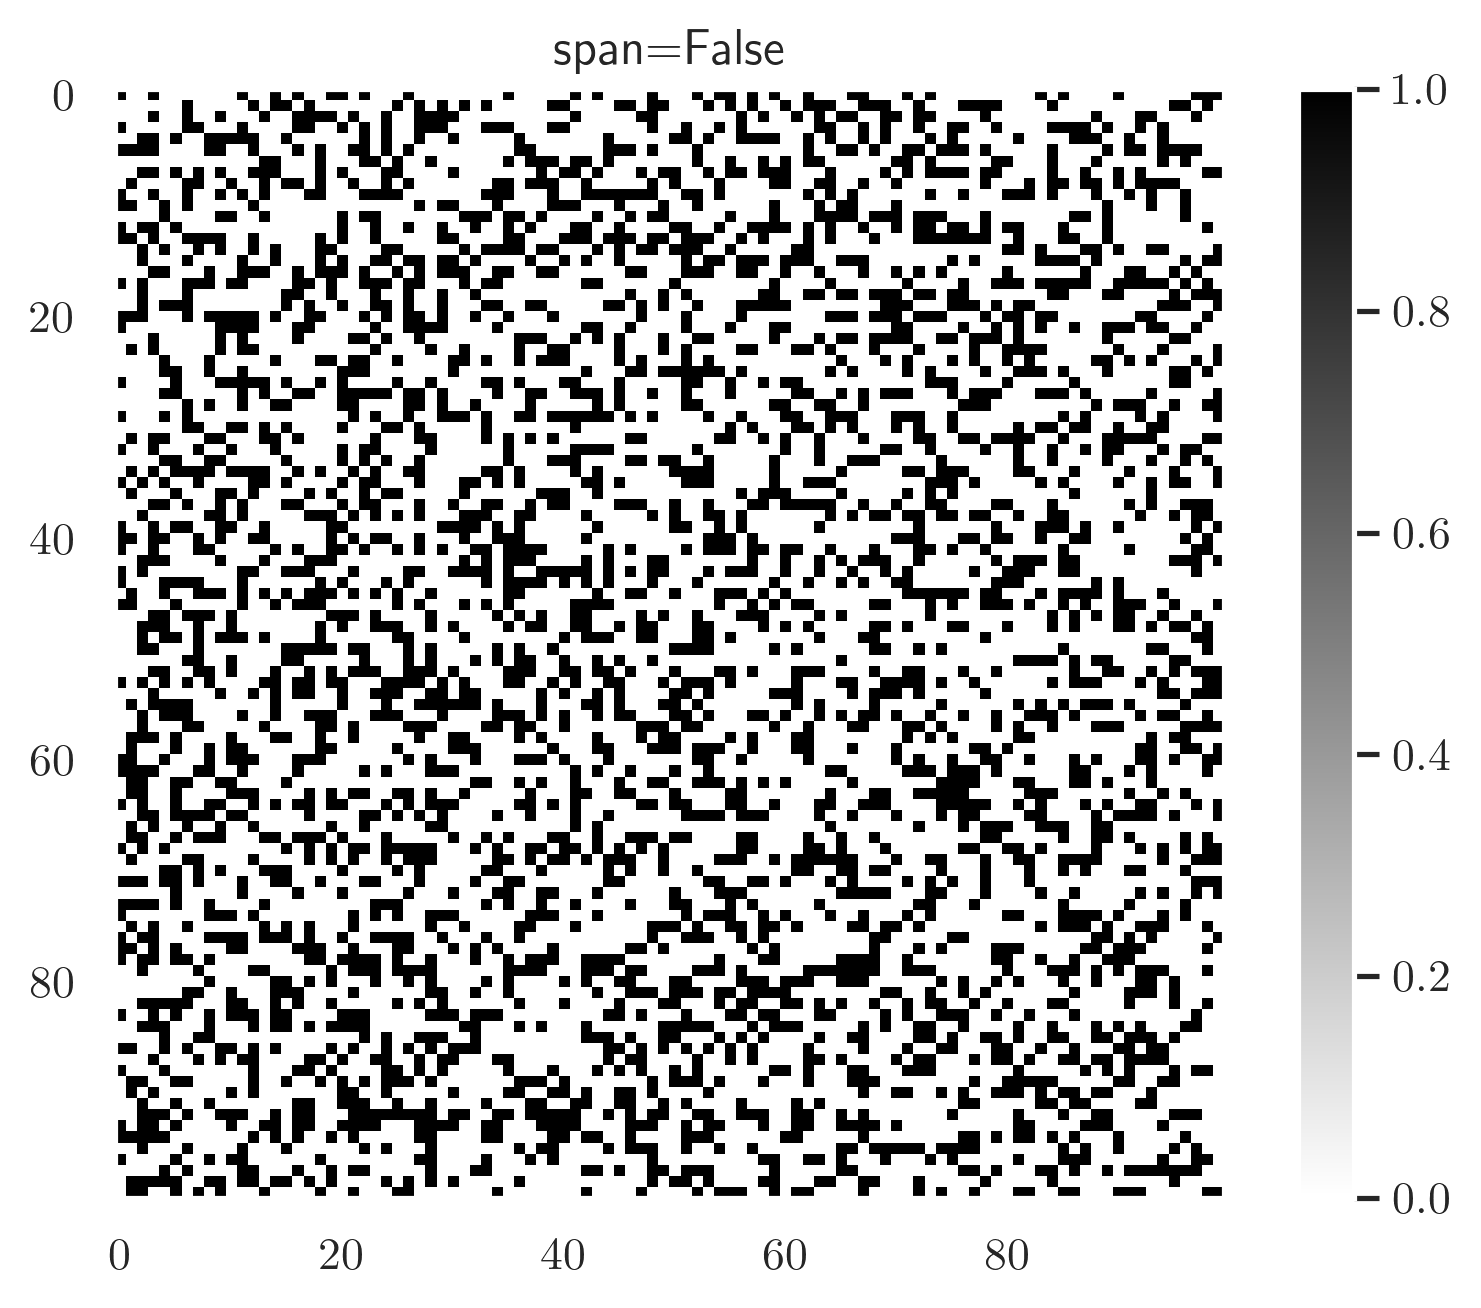

Next


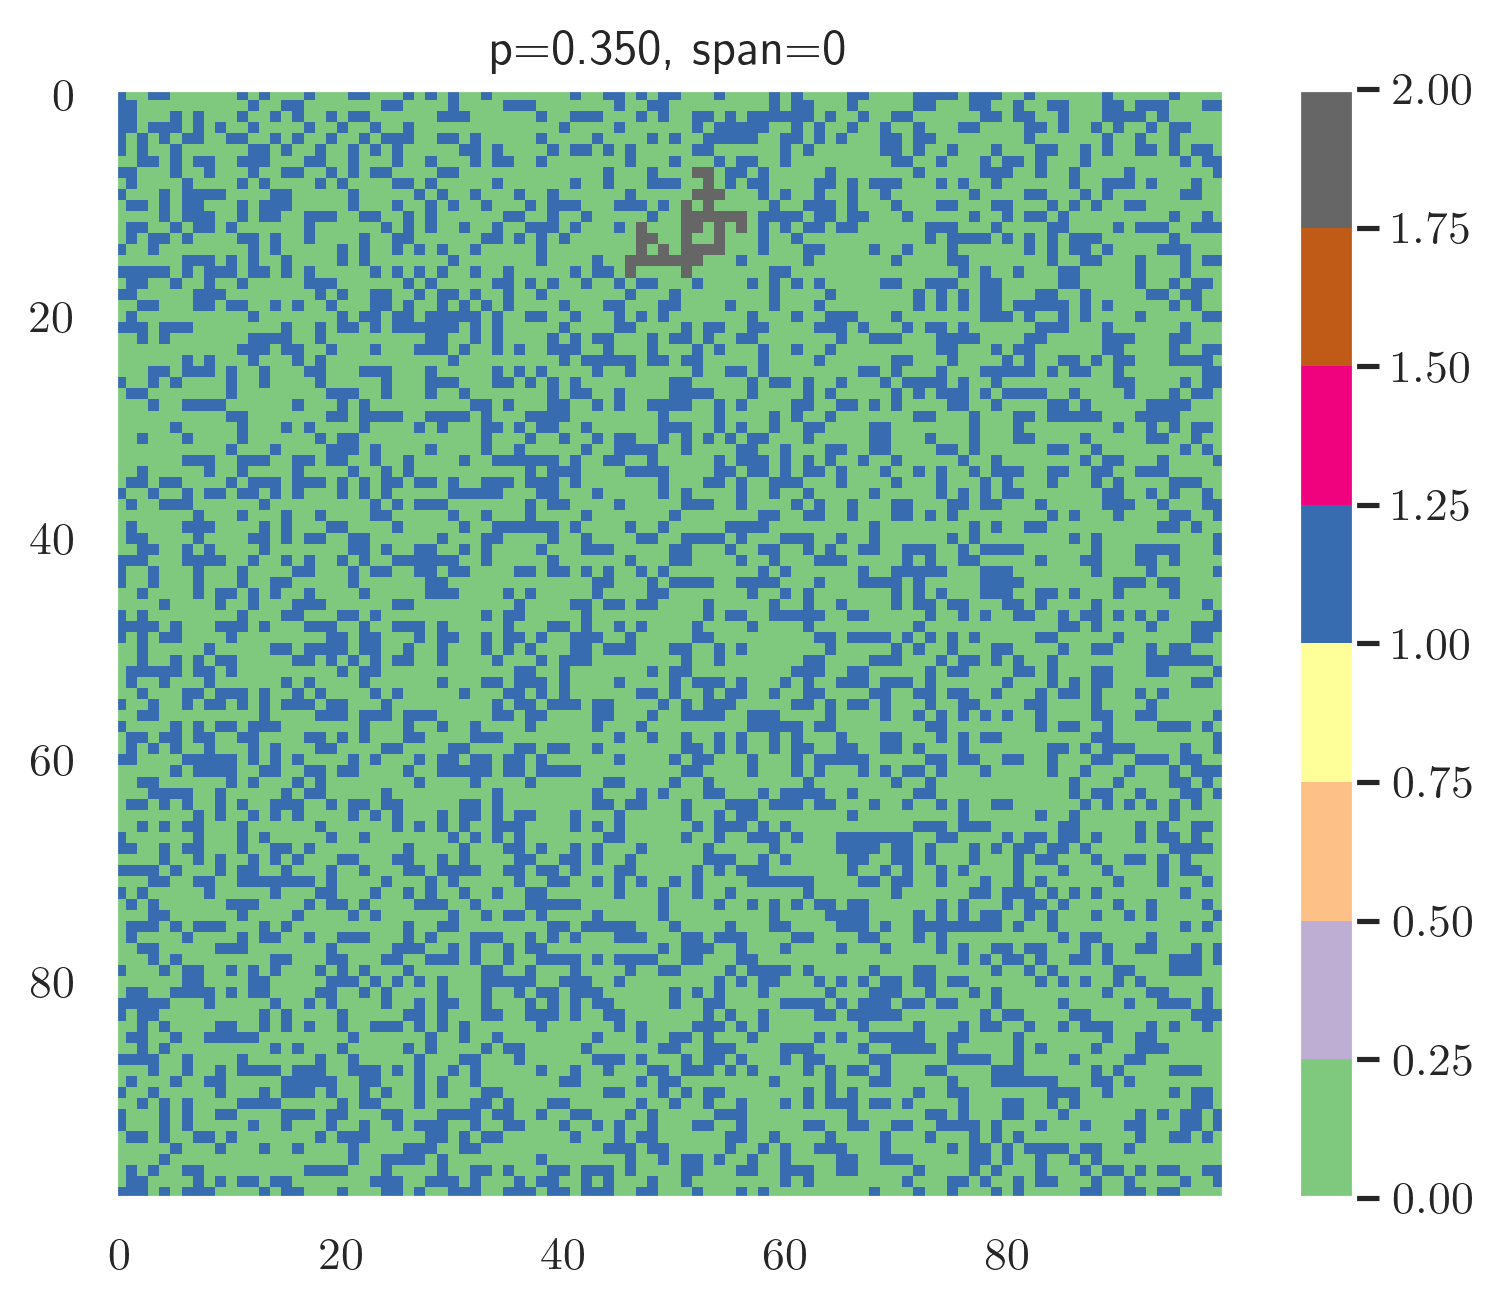

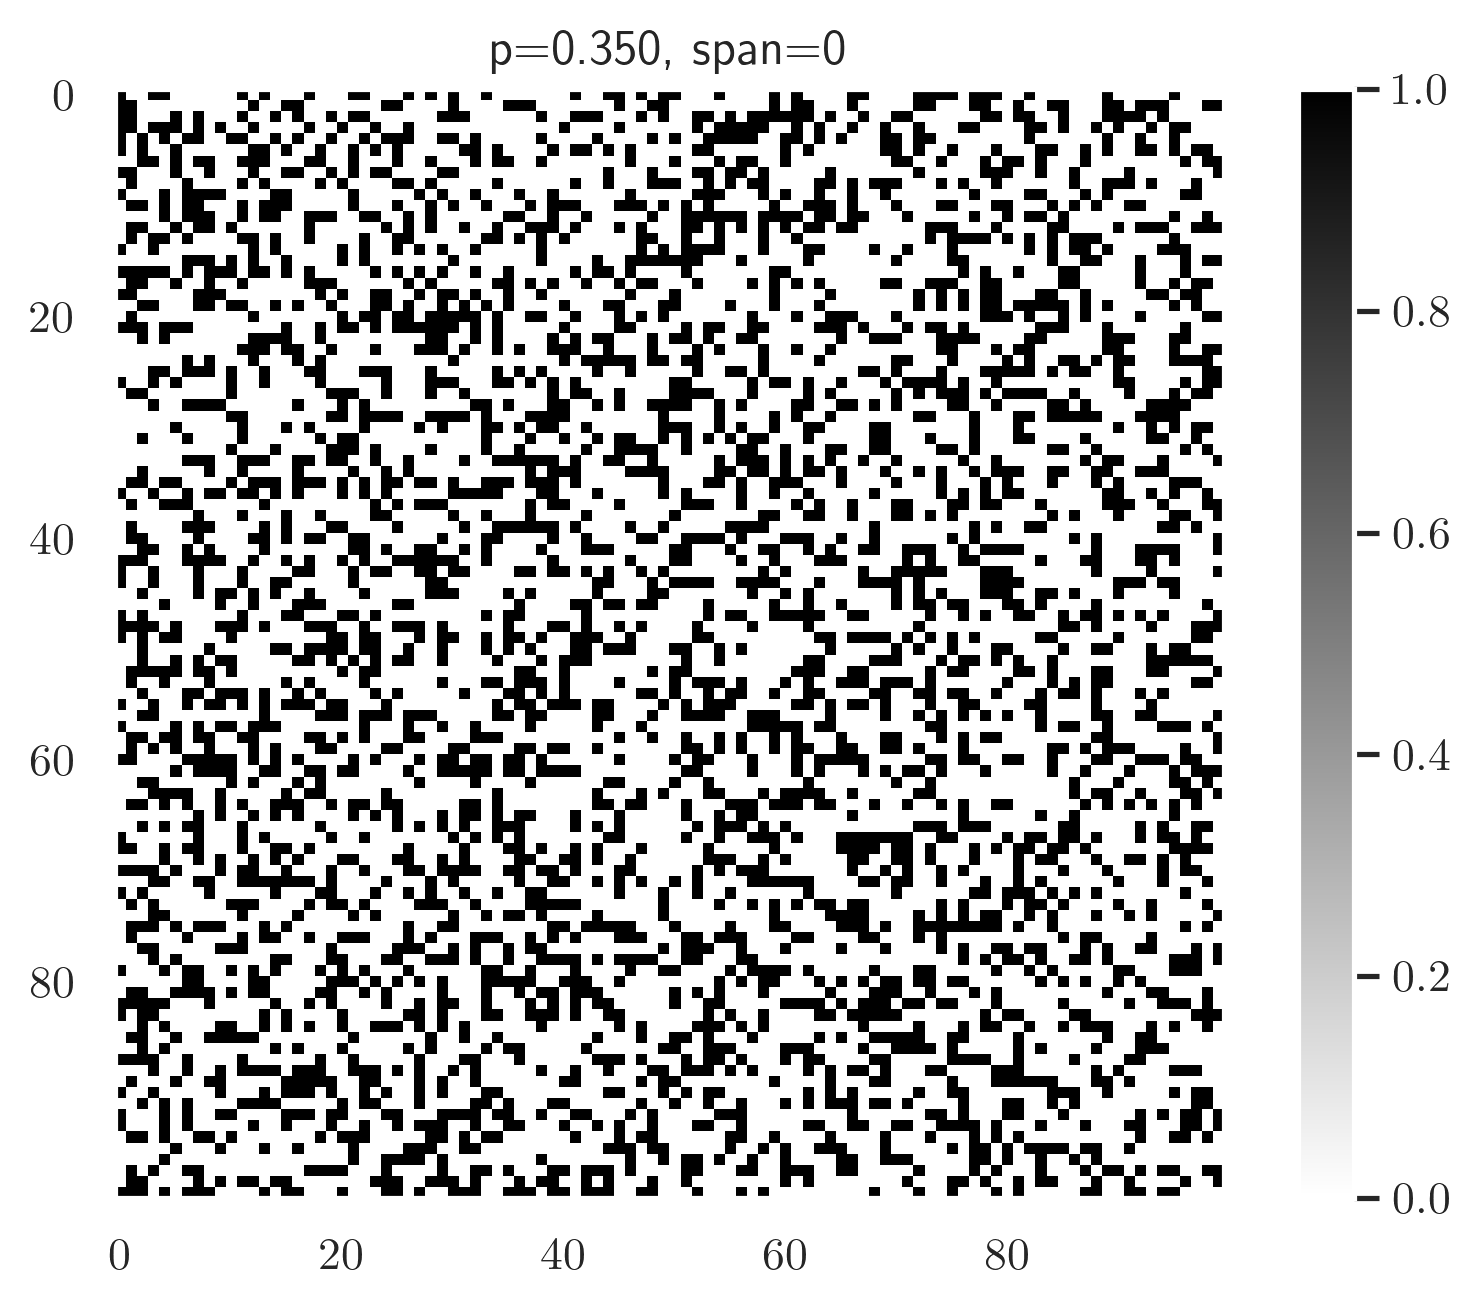

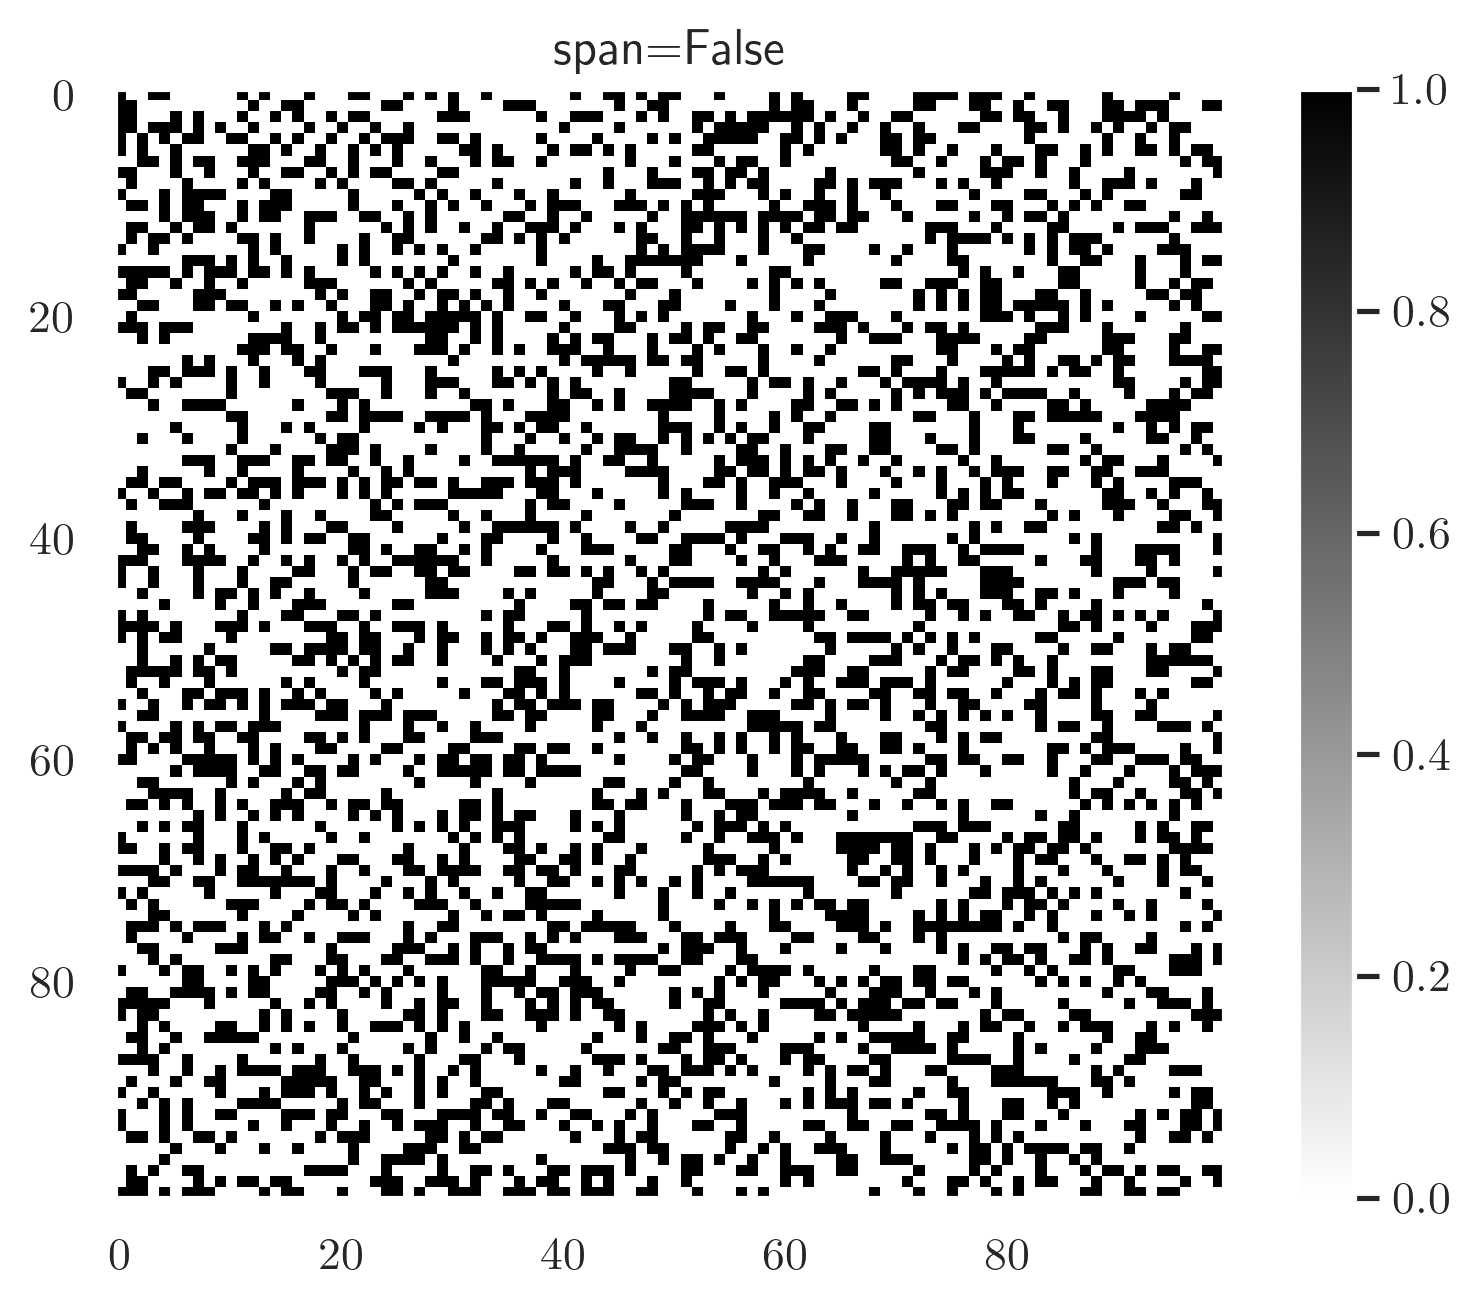

Next


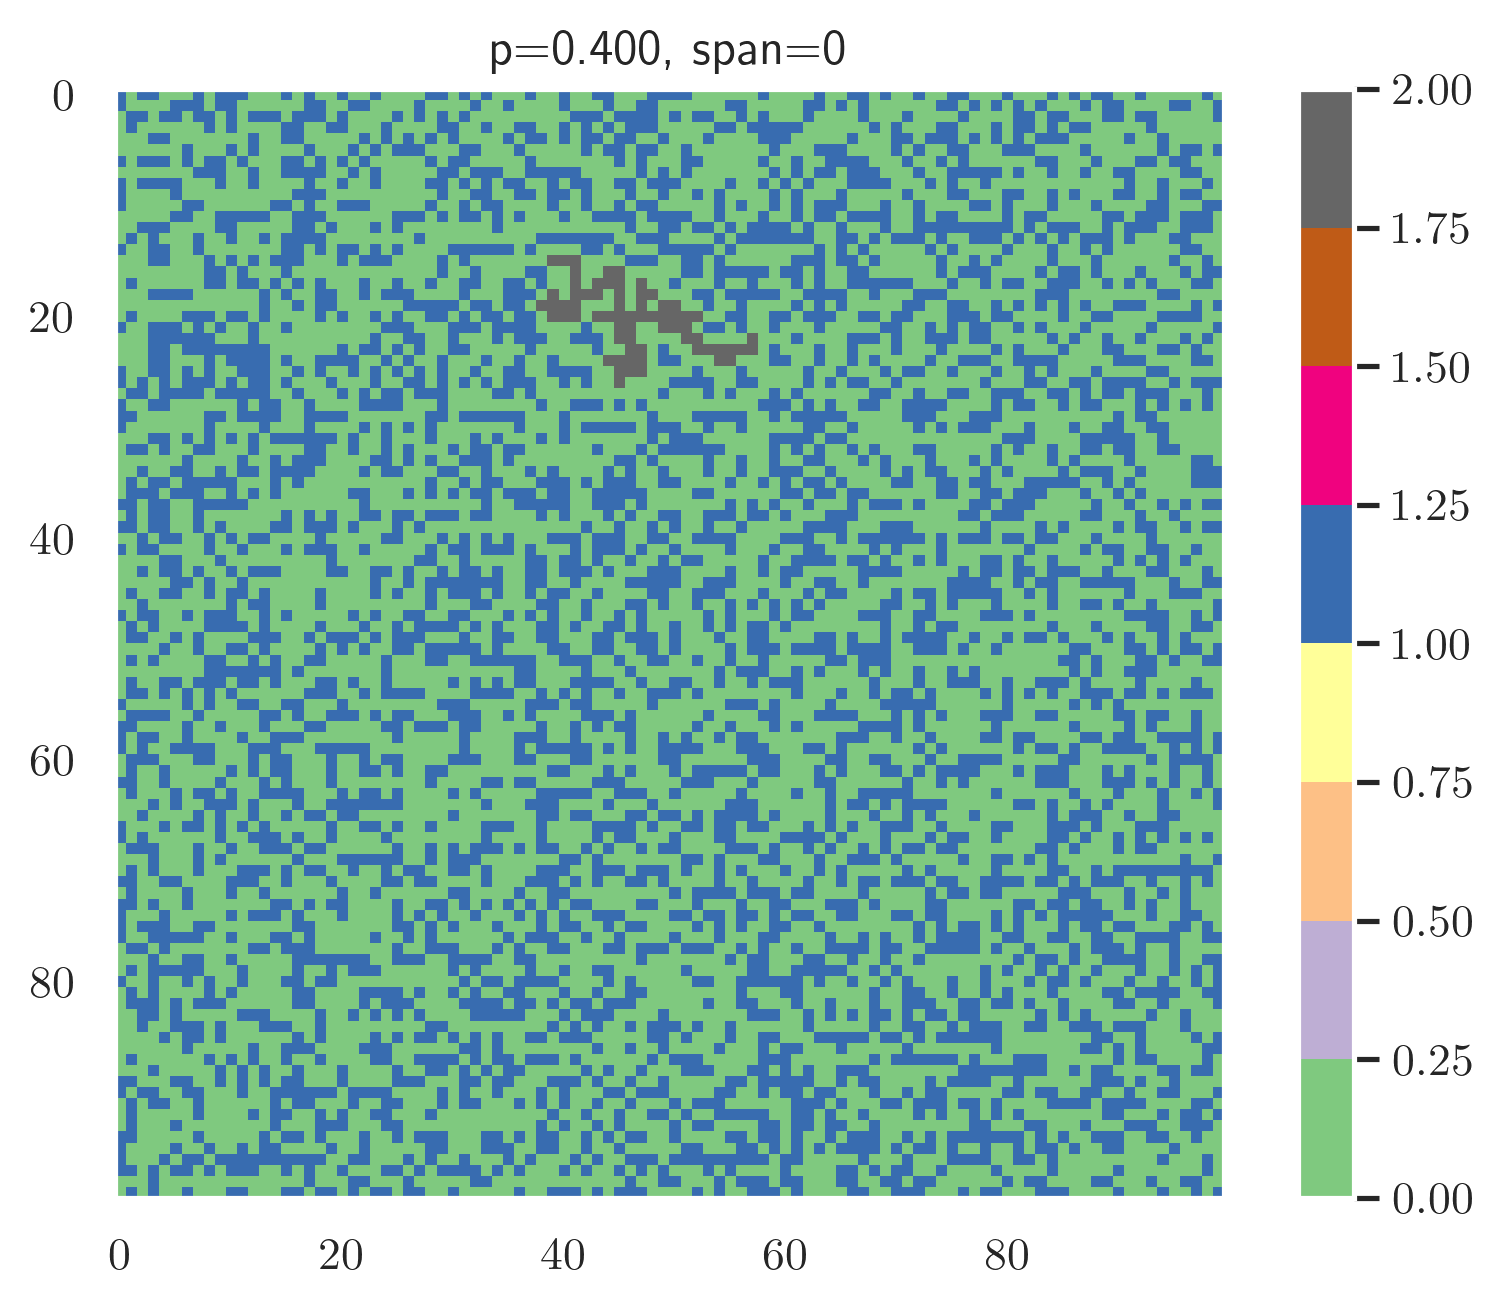

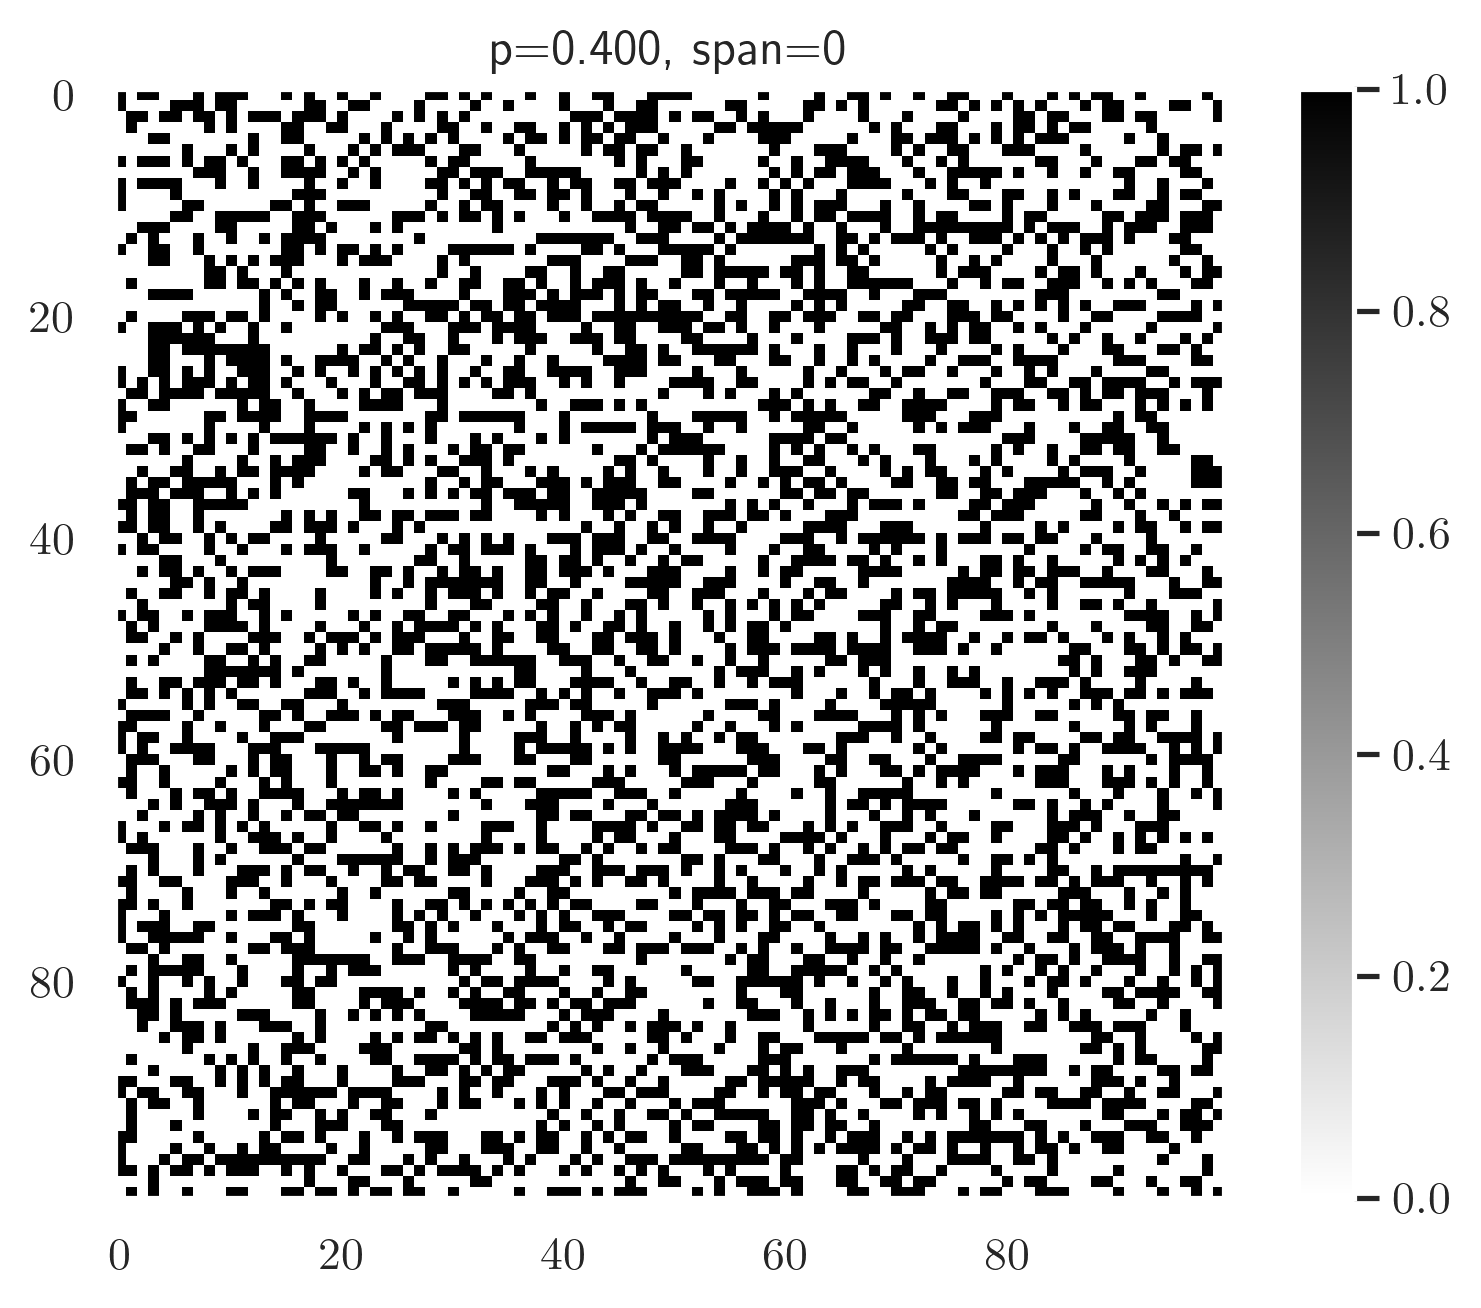

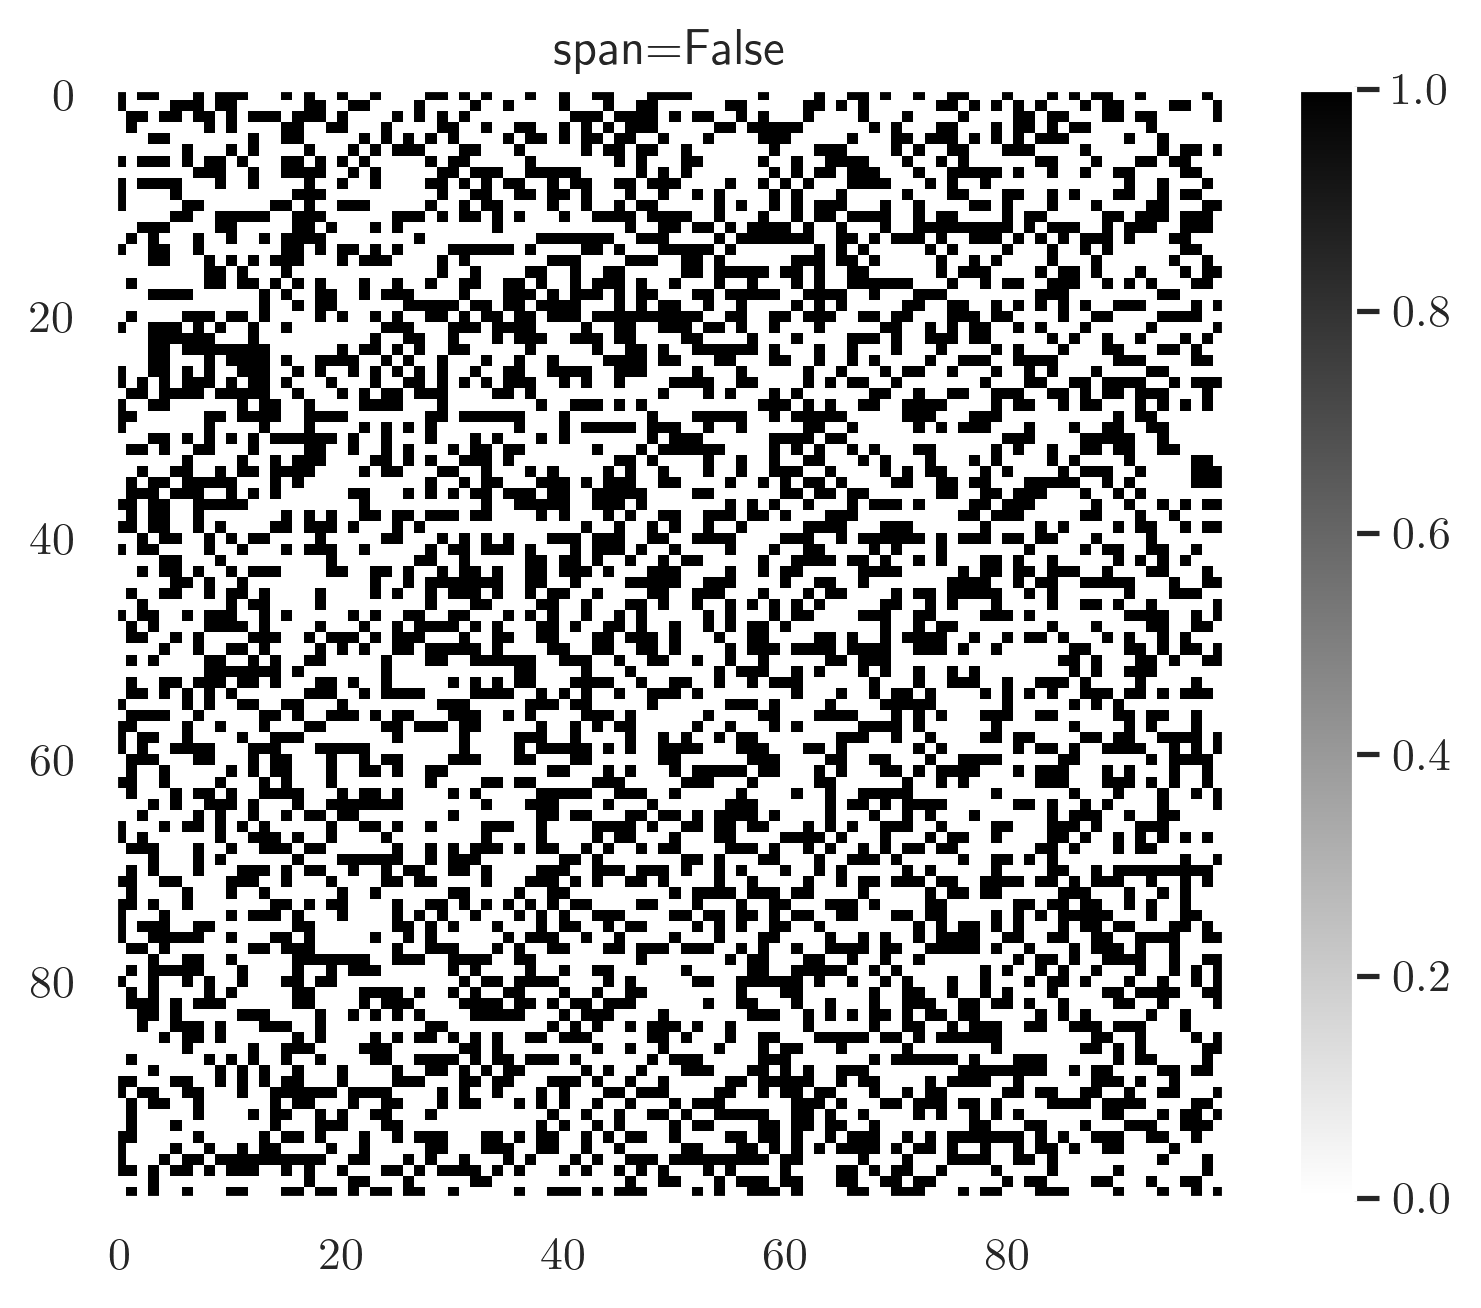

Next


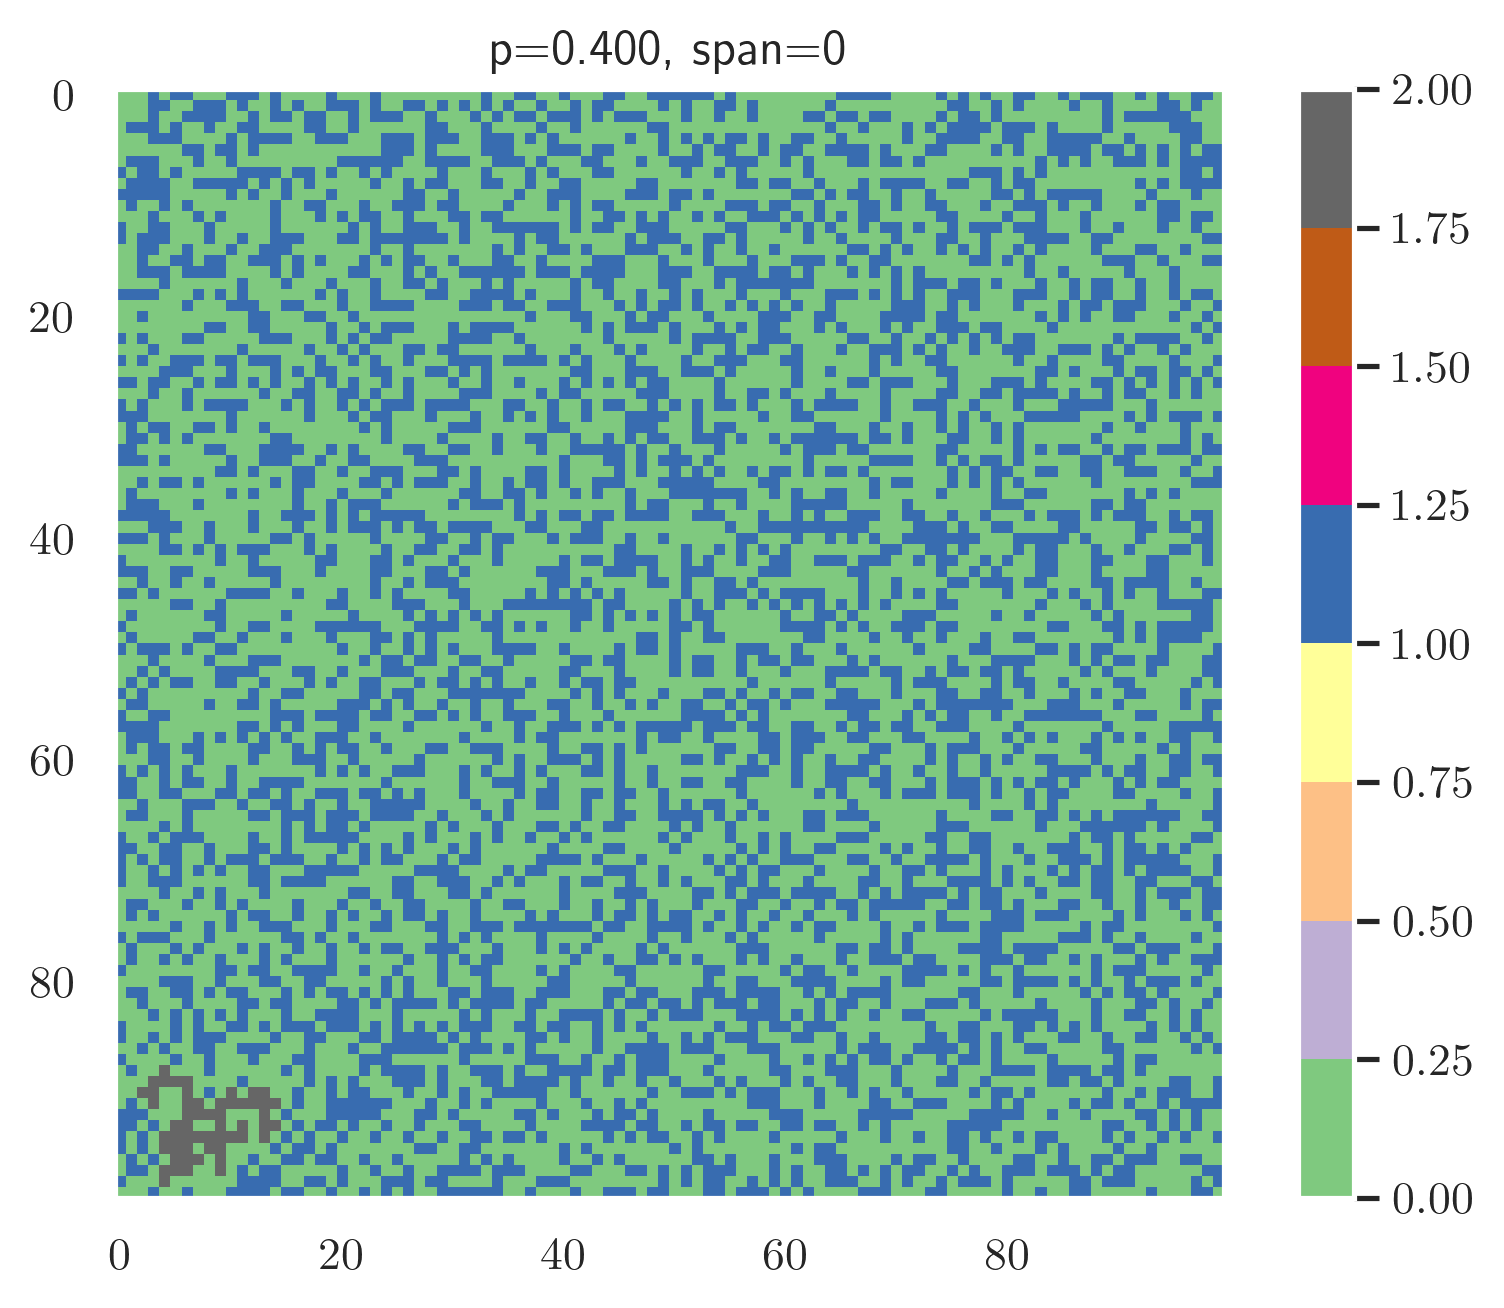

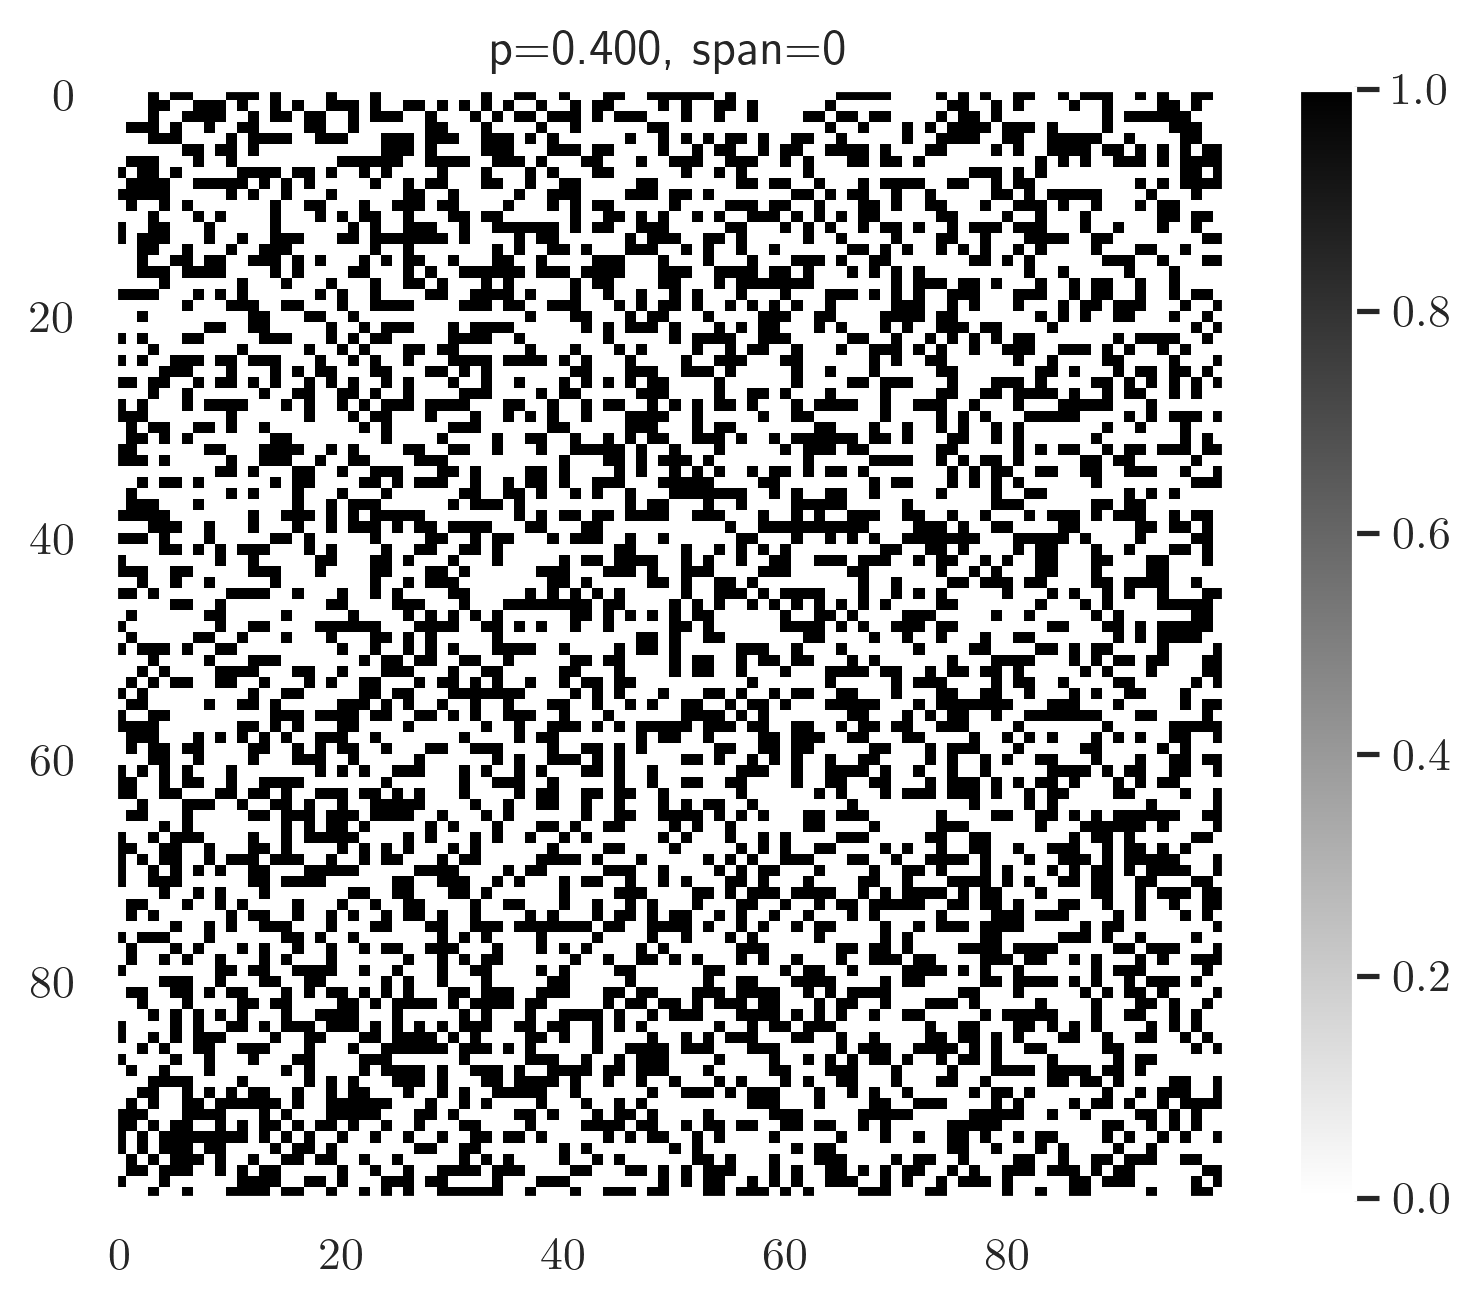

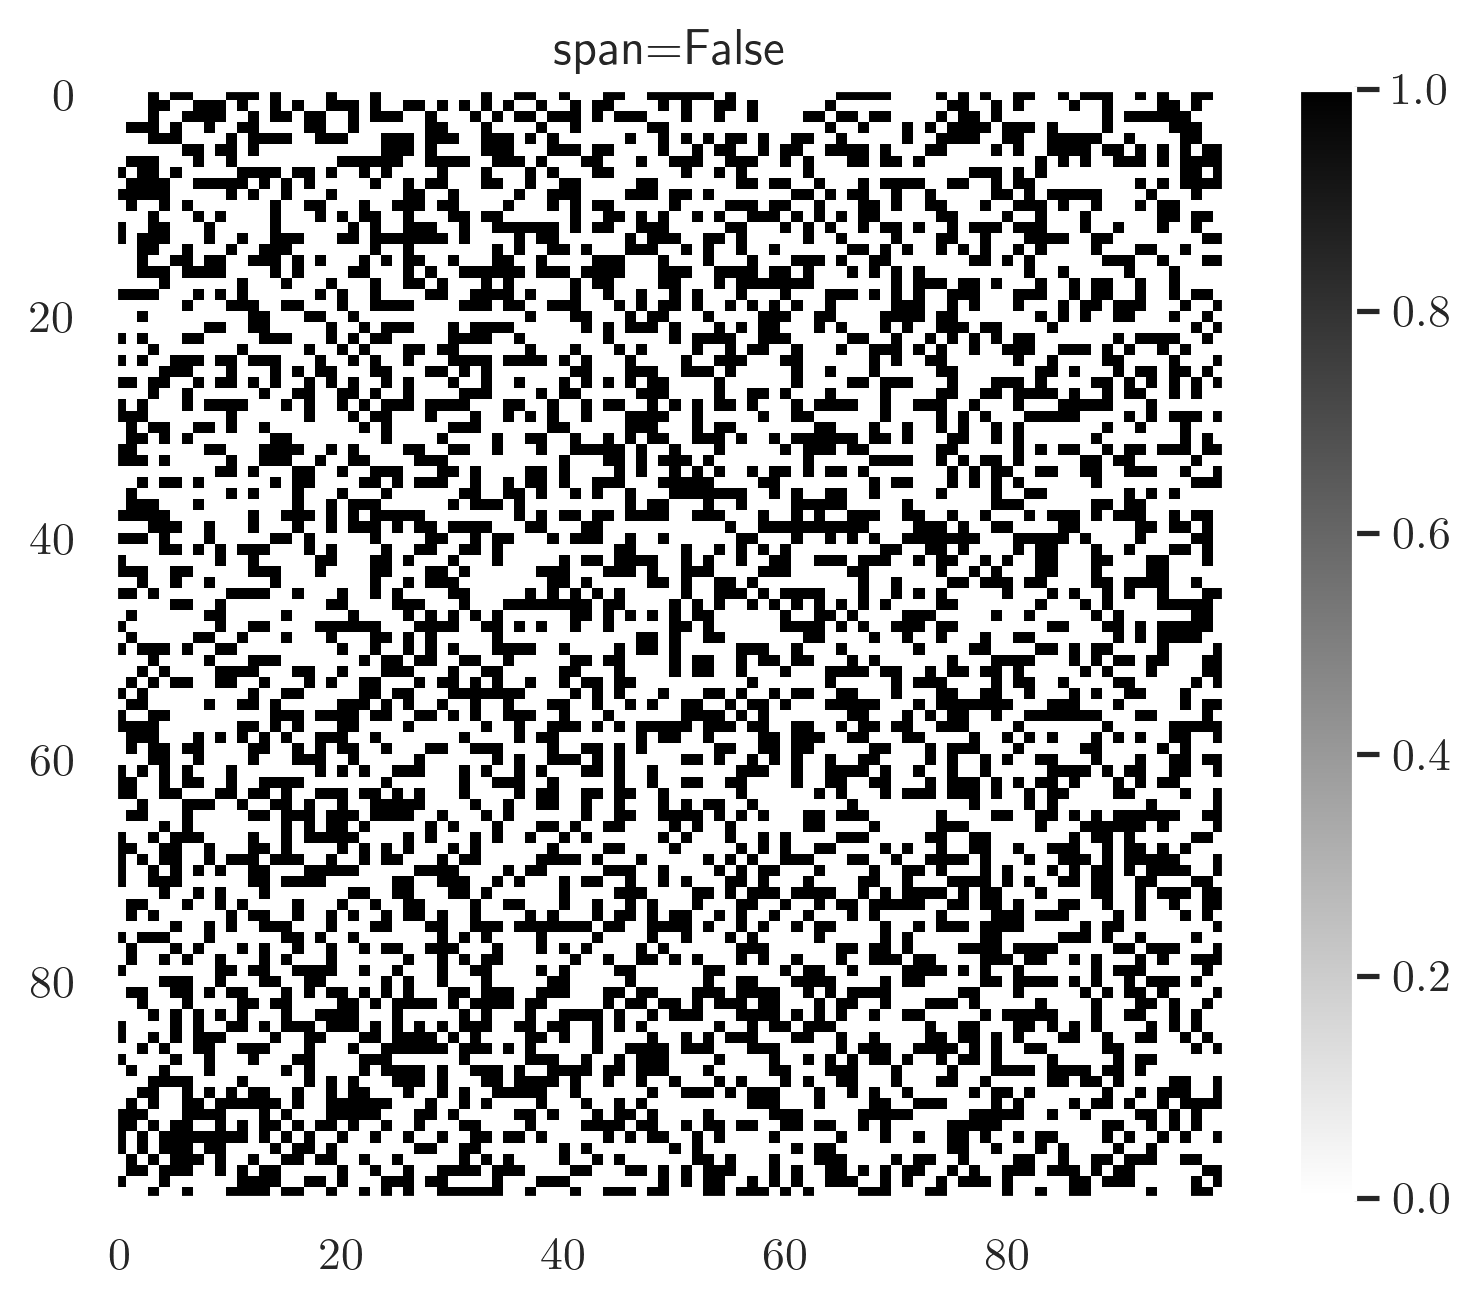

Next


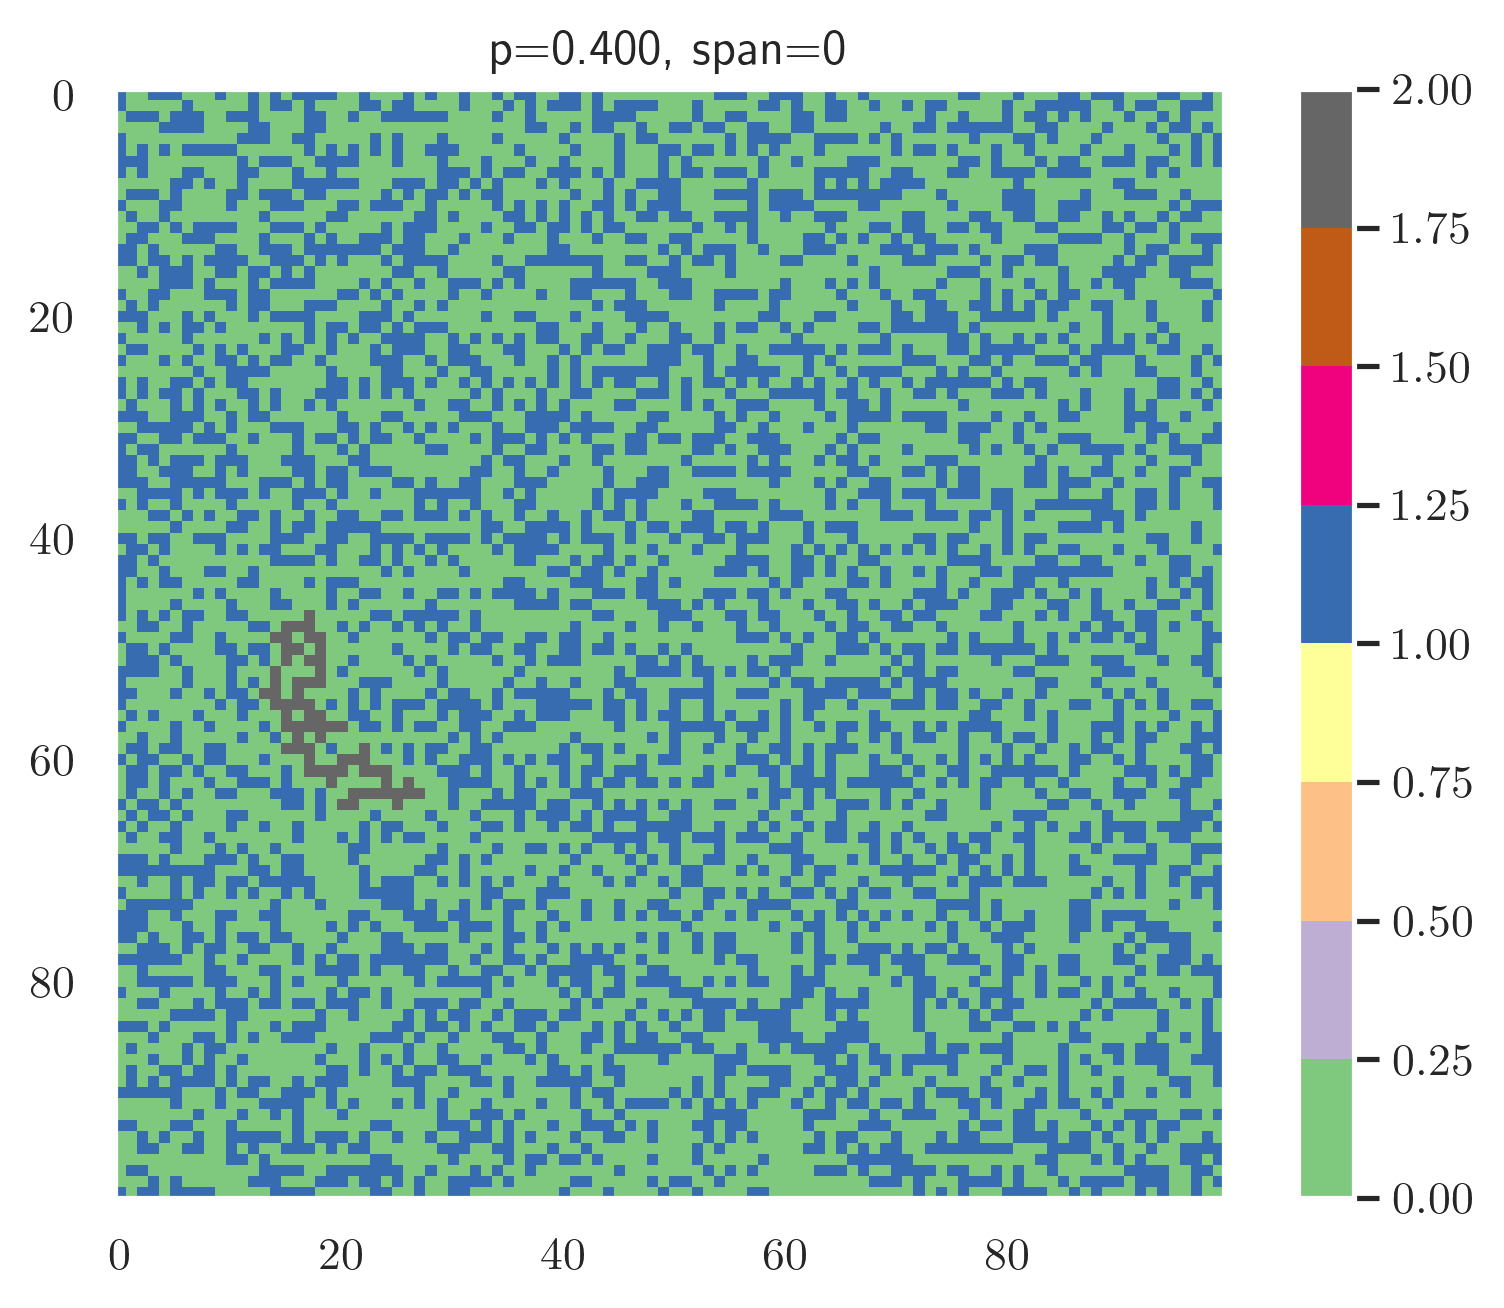

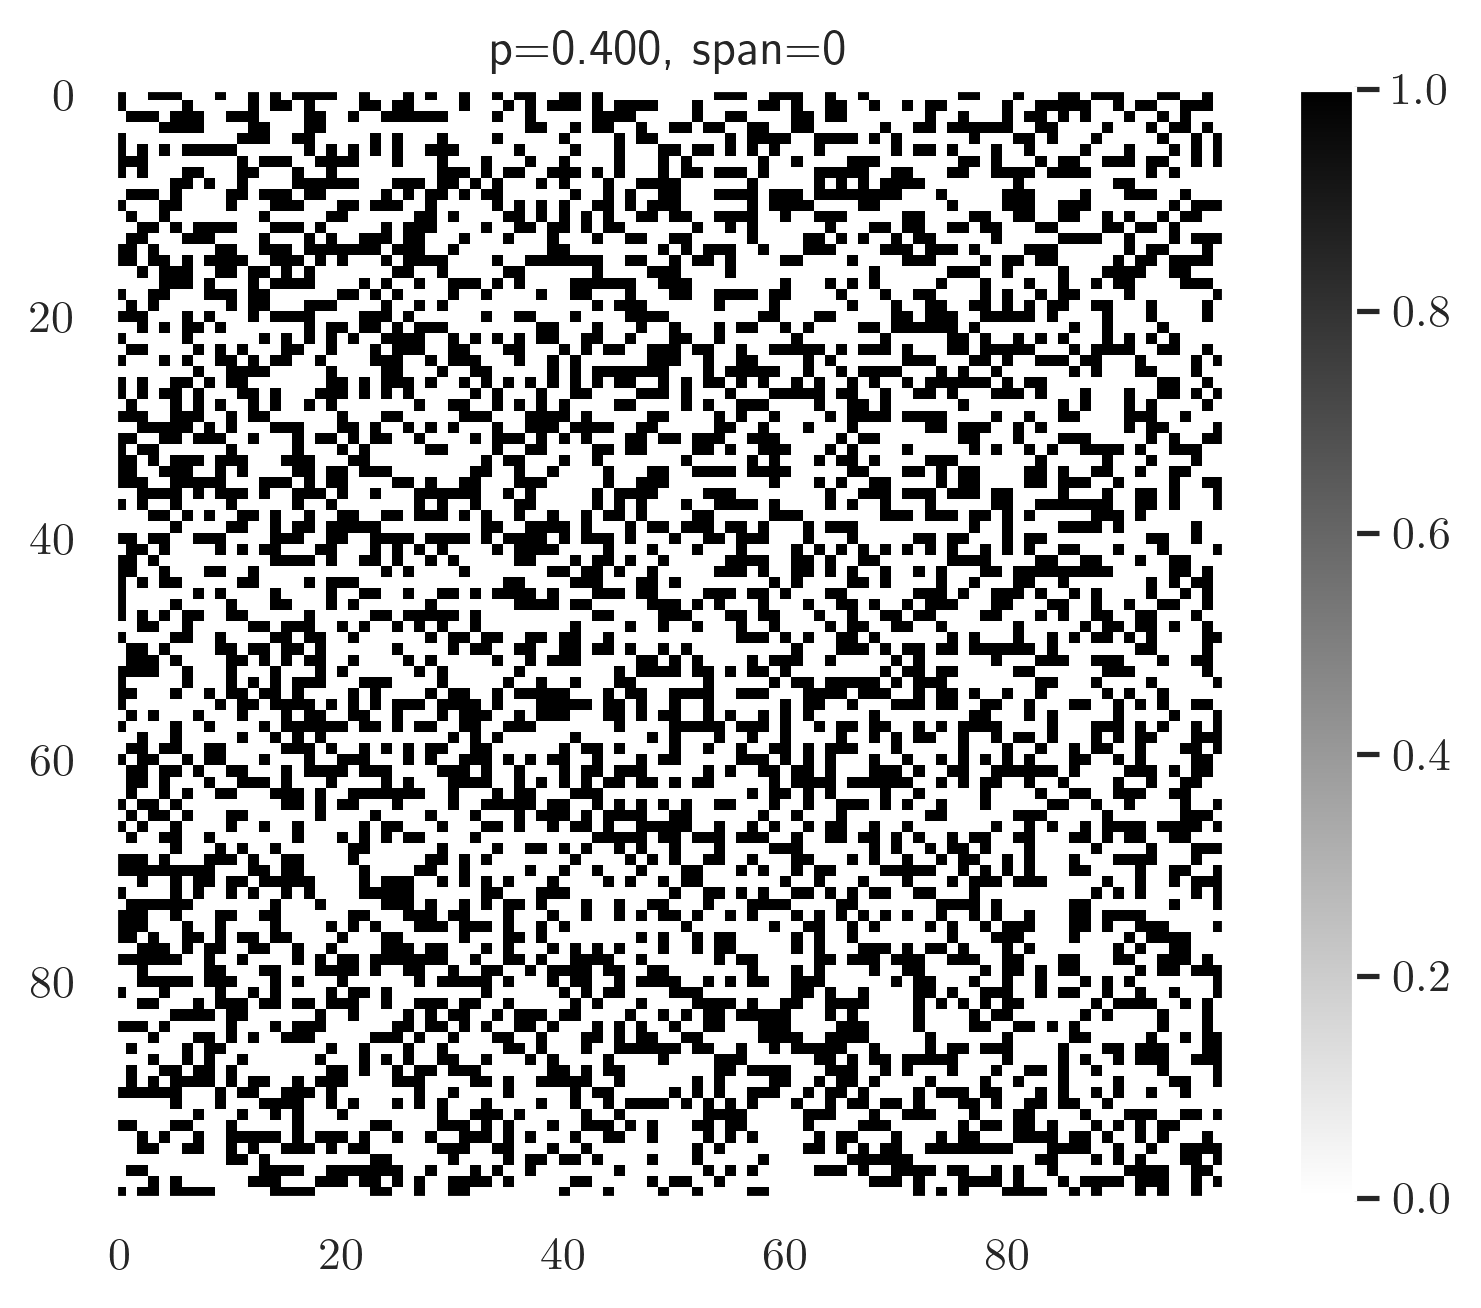

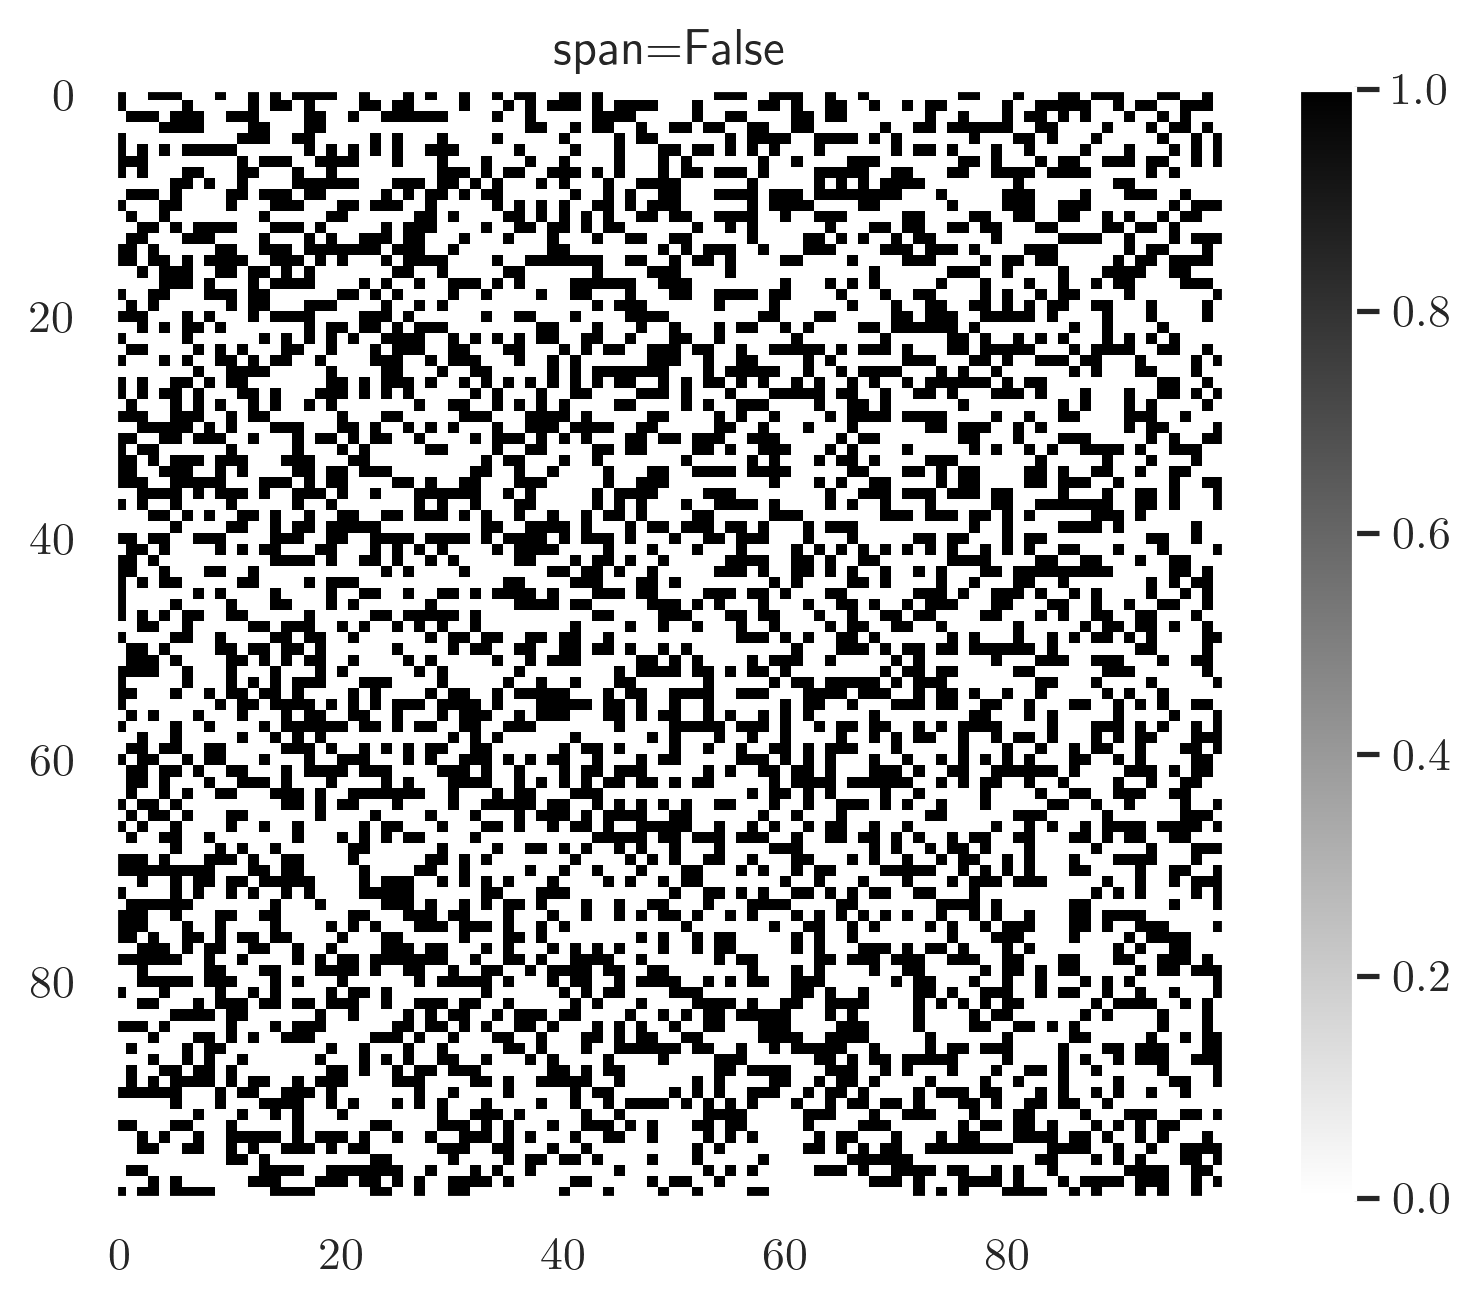

Next


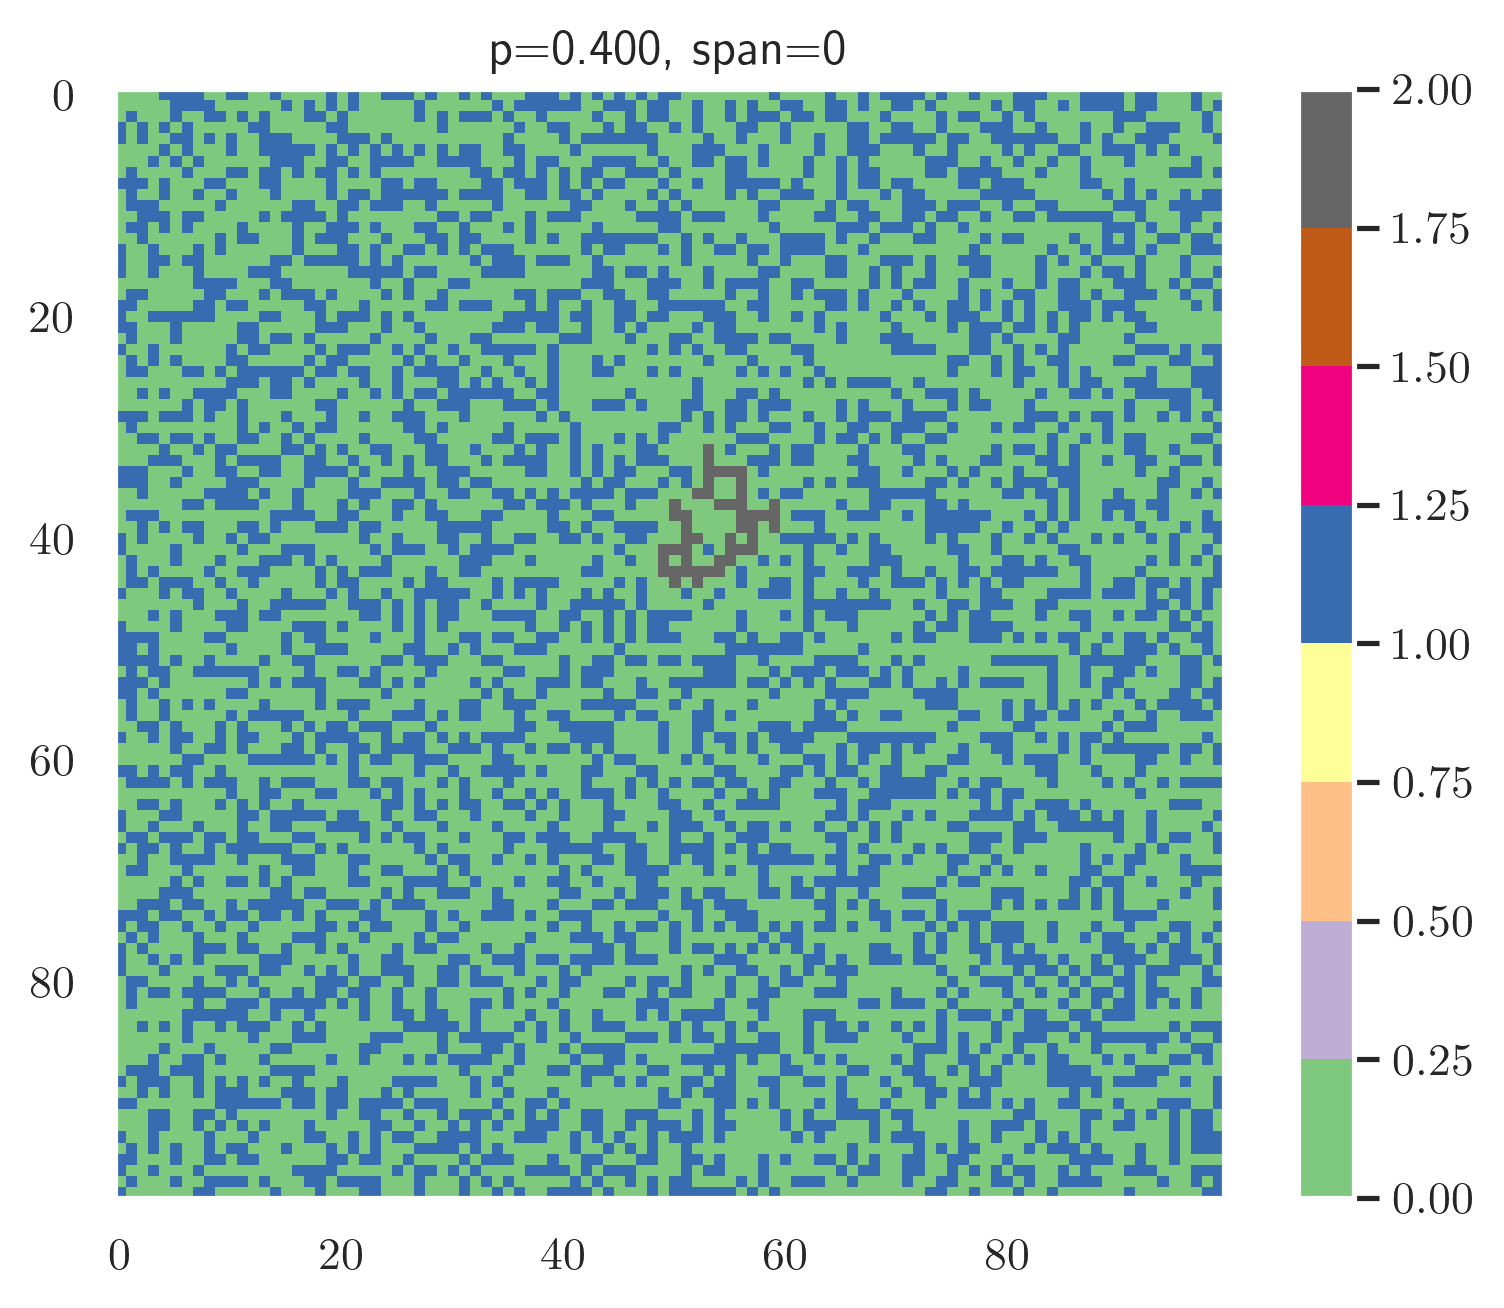

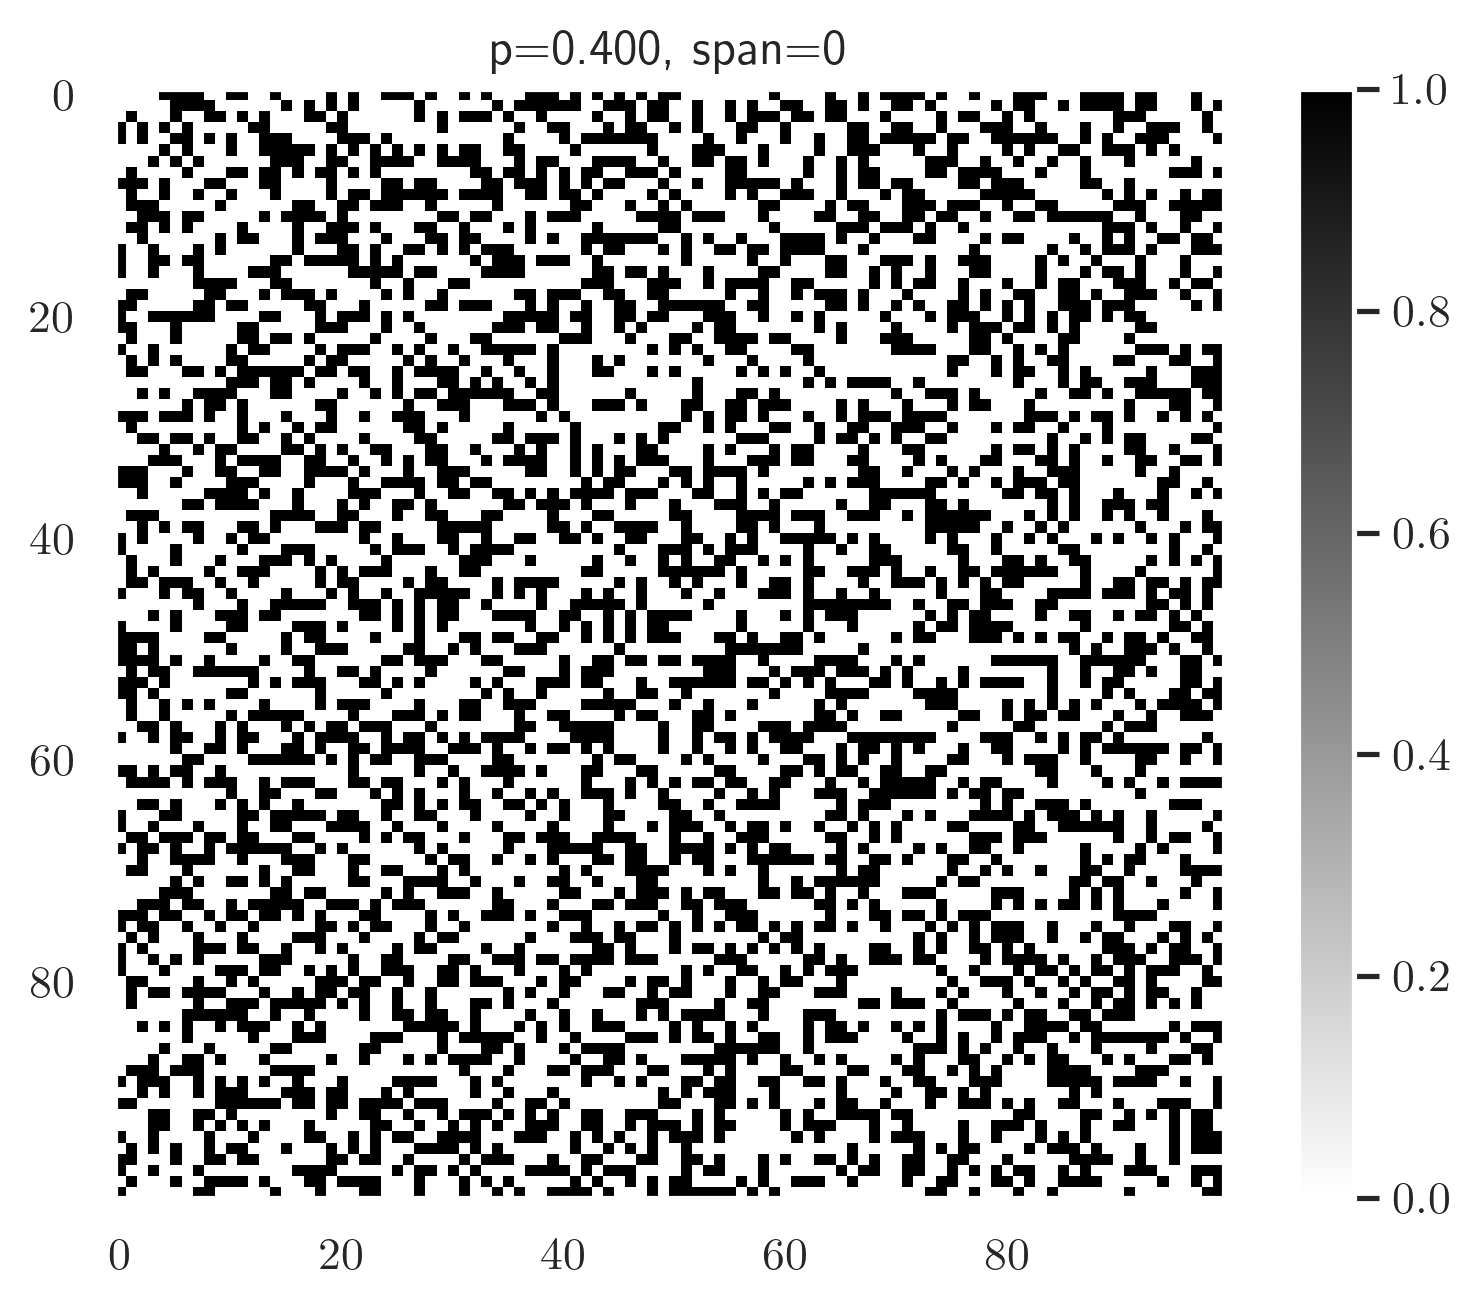

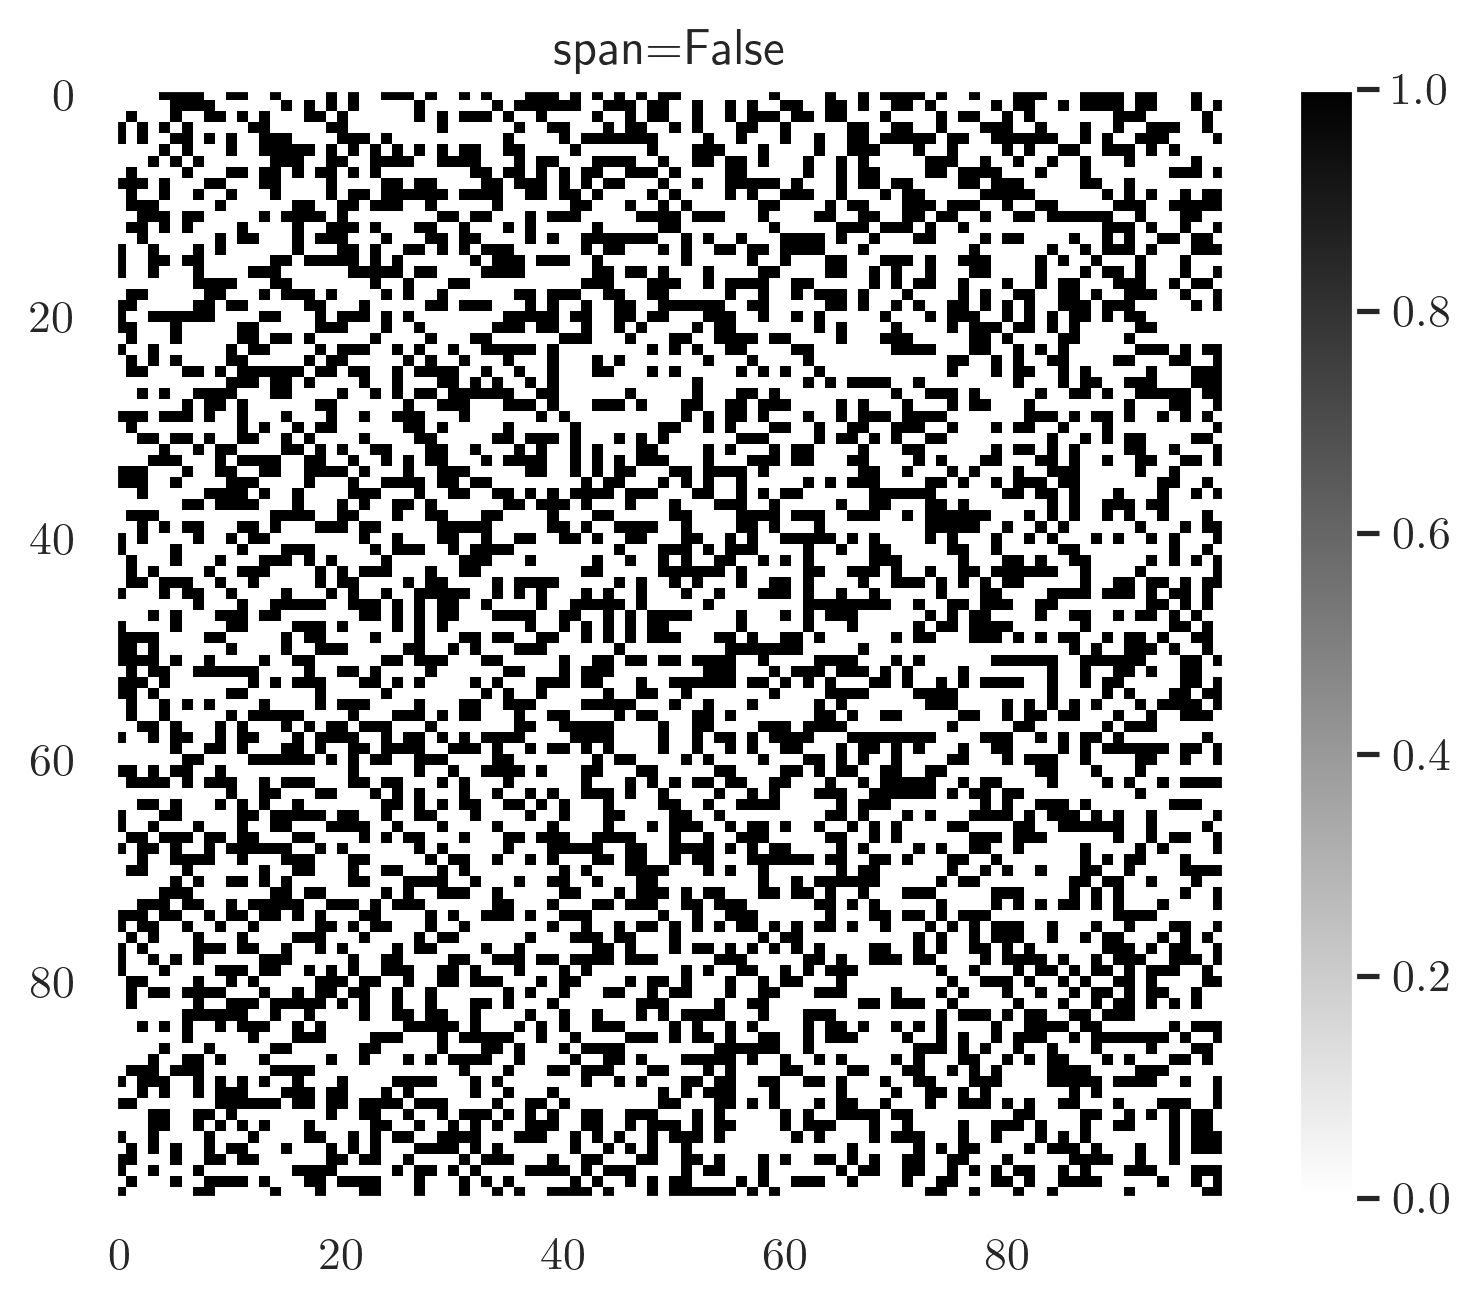

Next


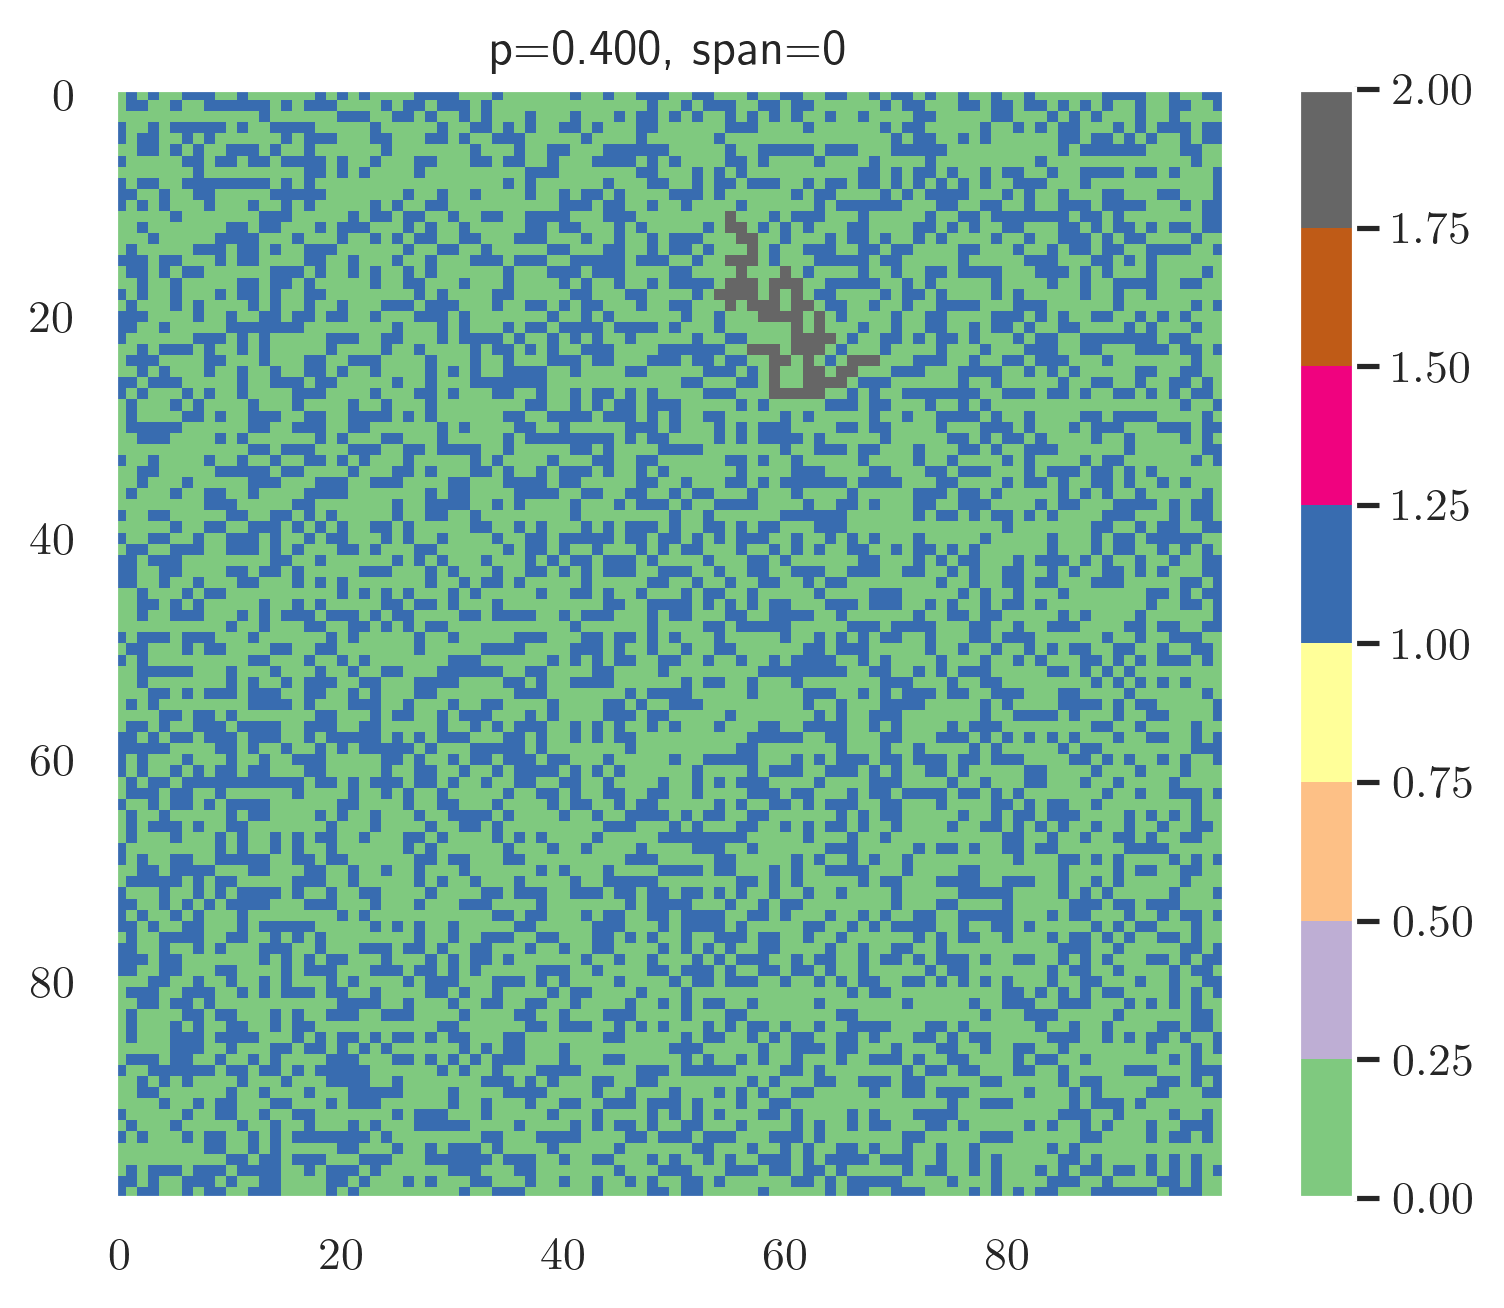

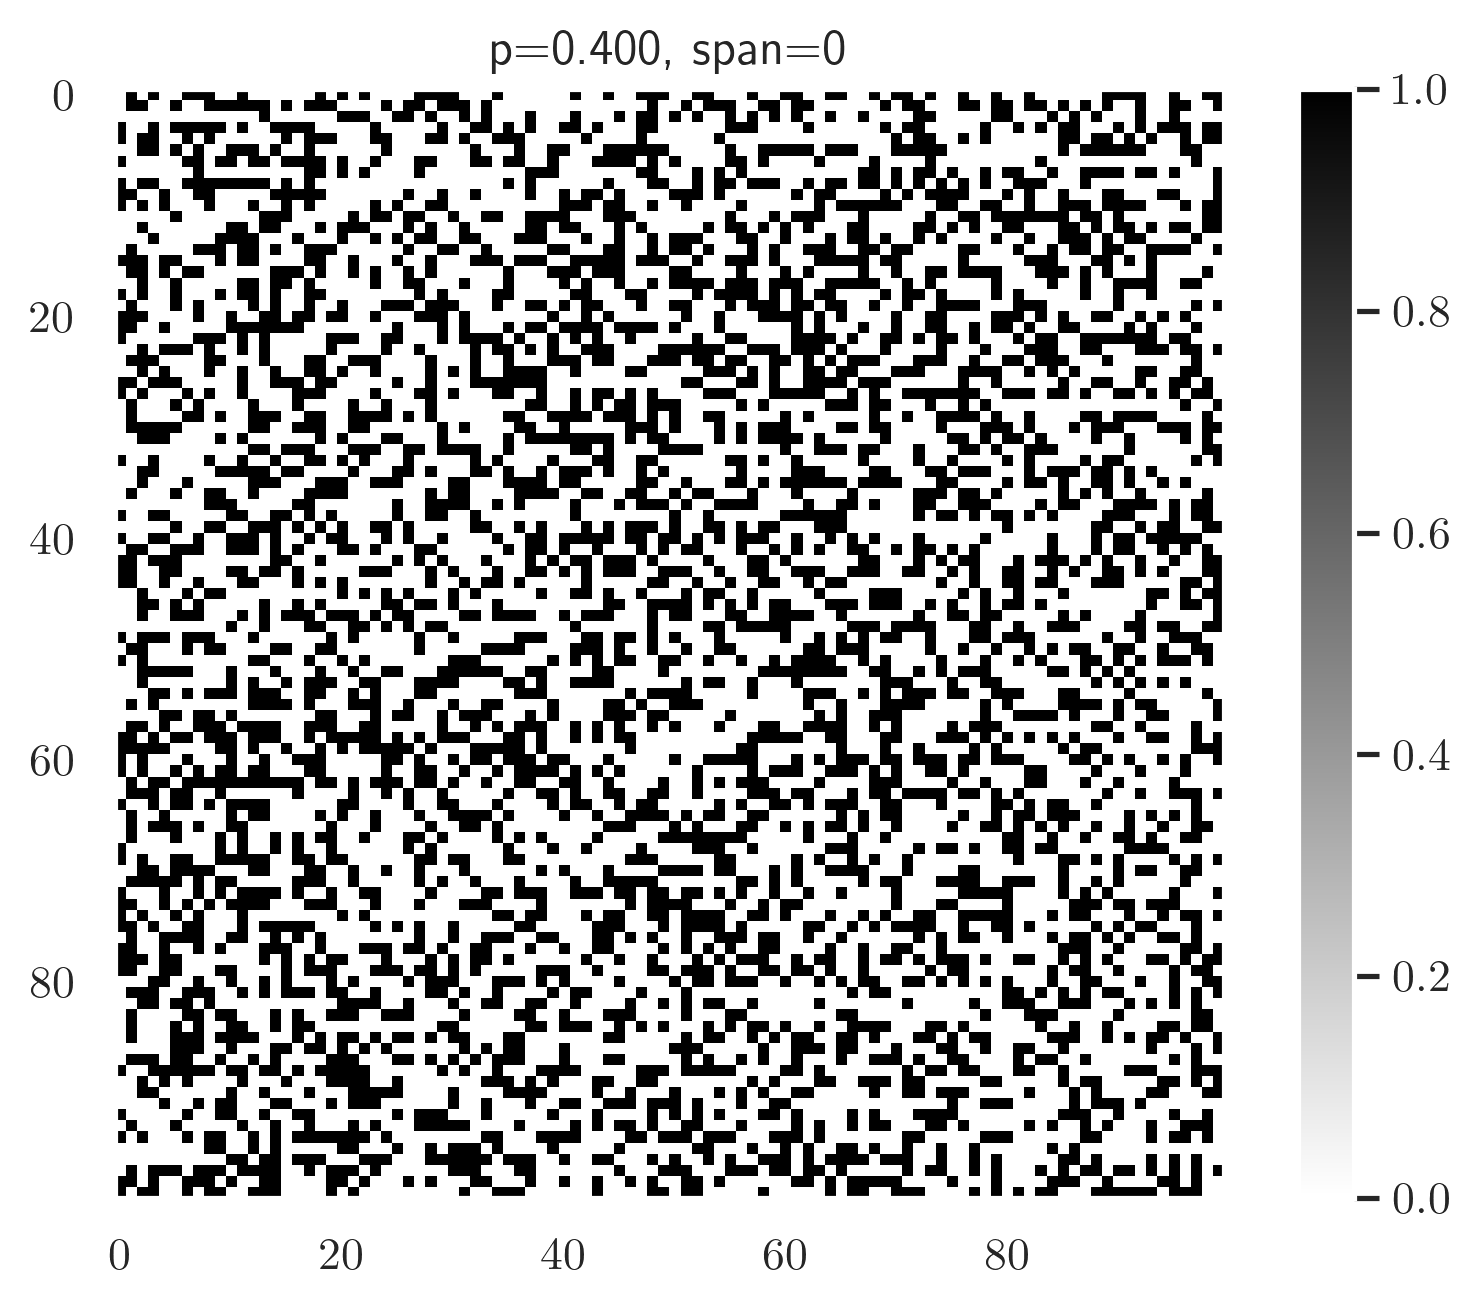

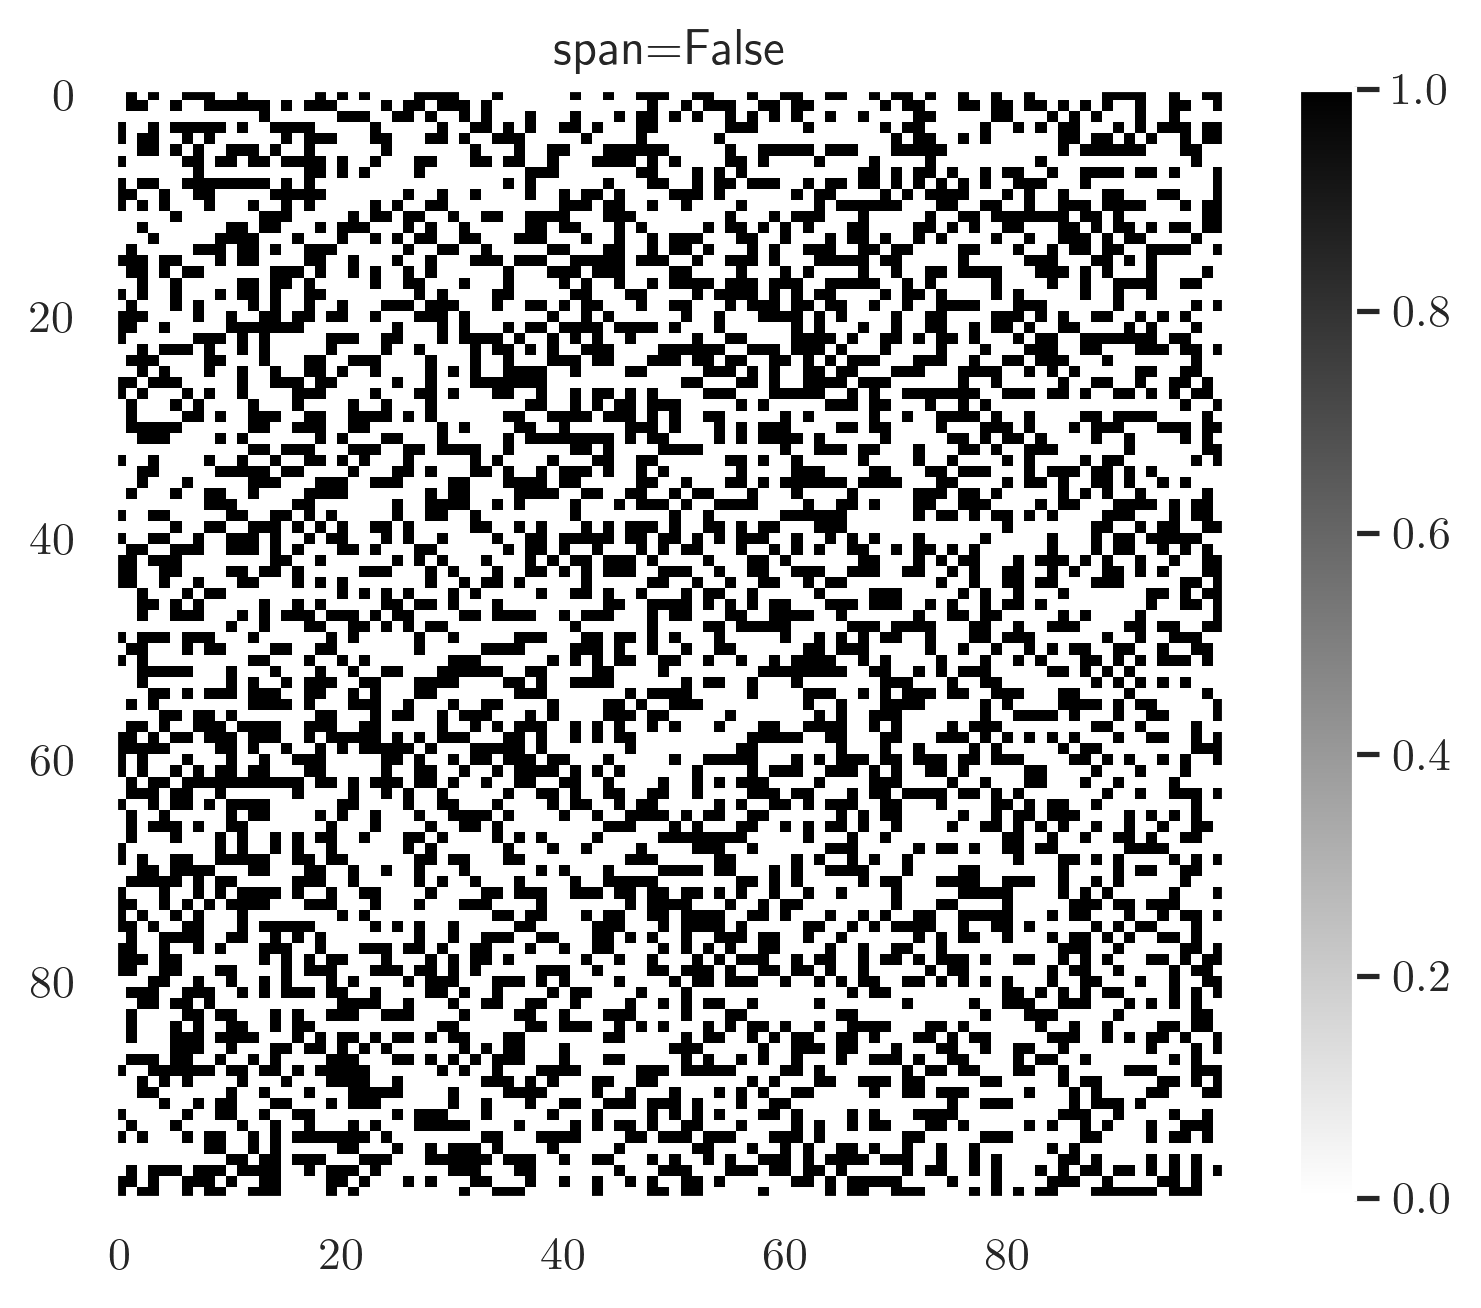

Next


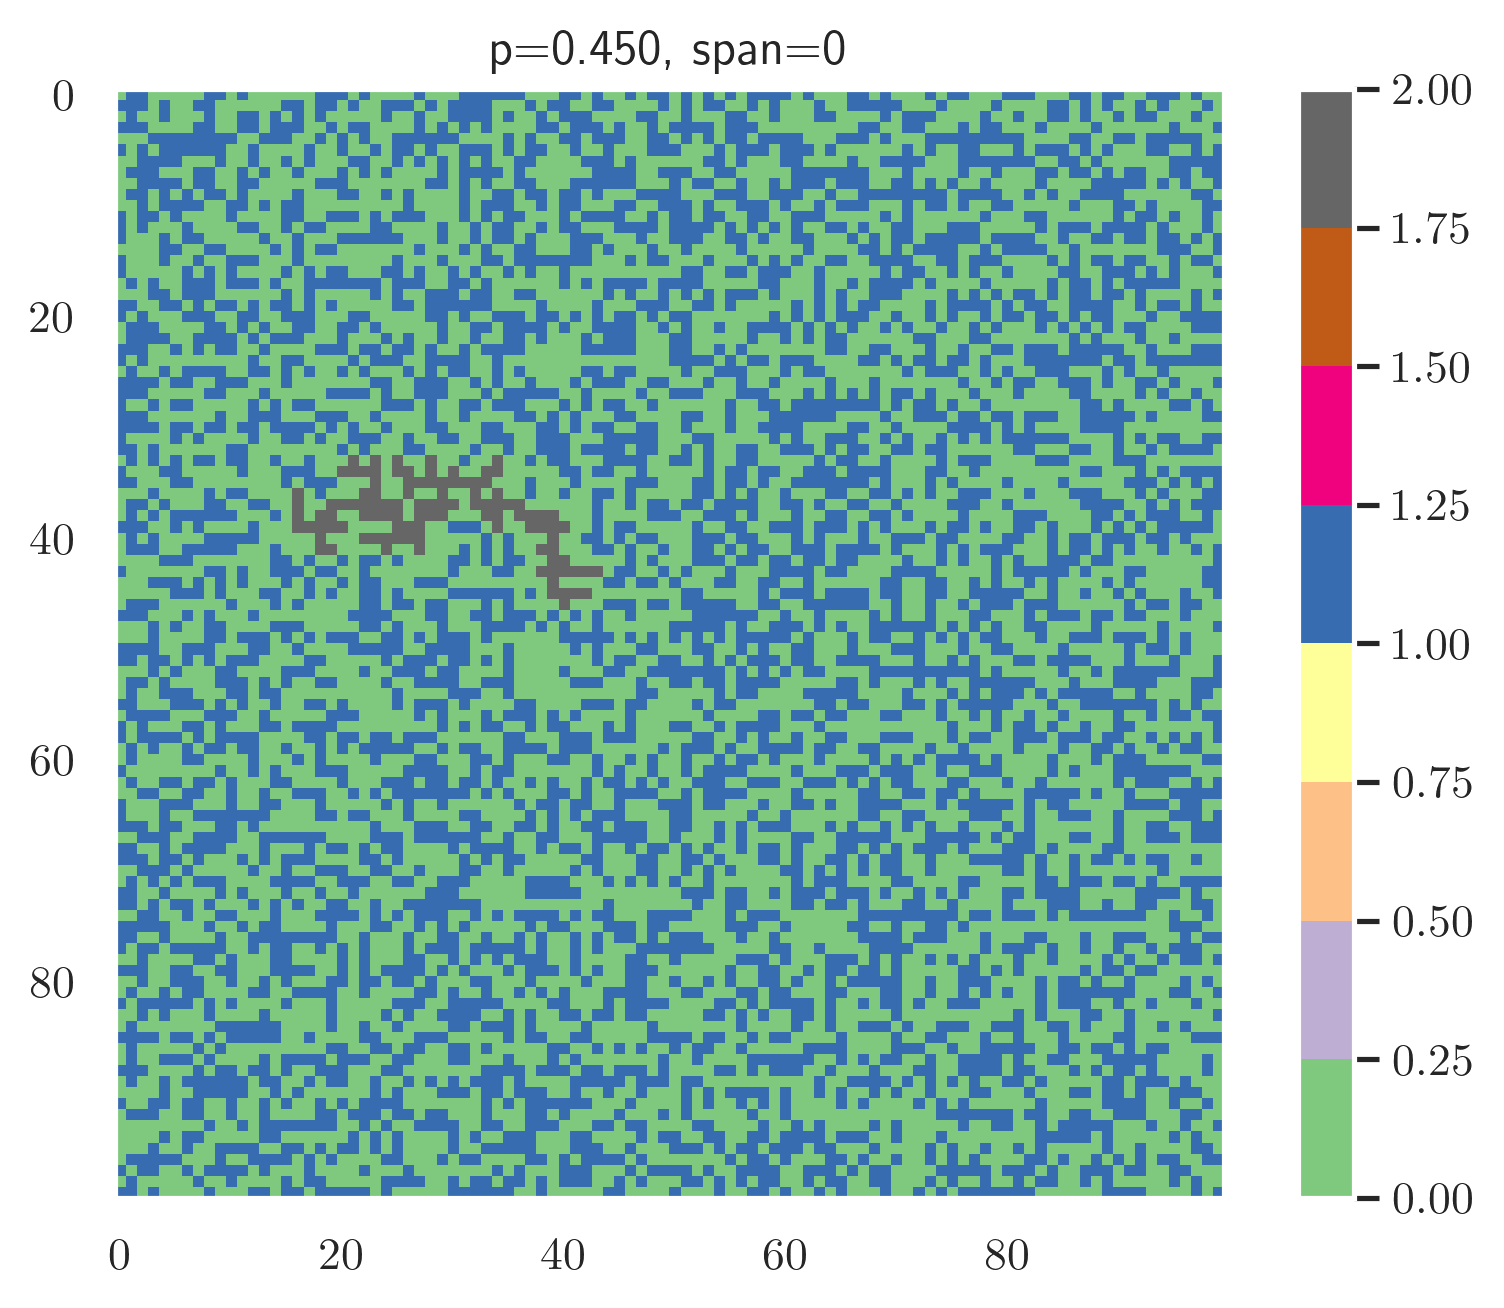

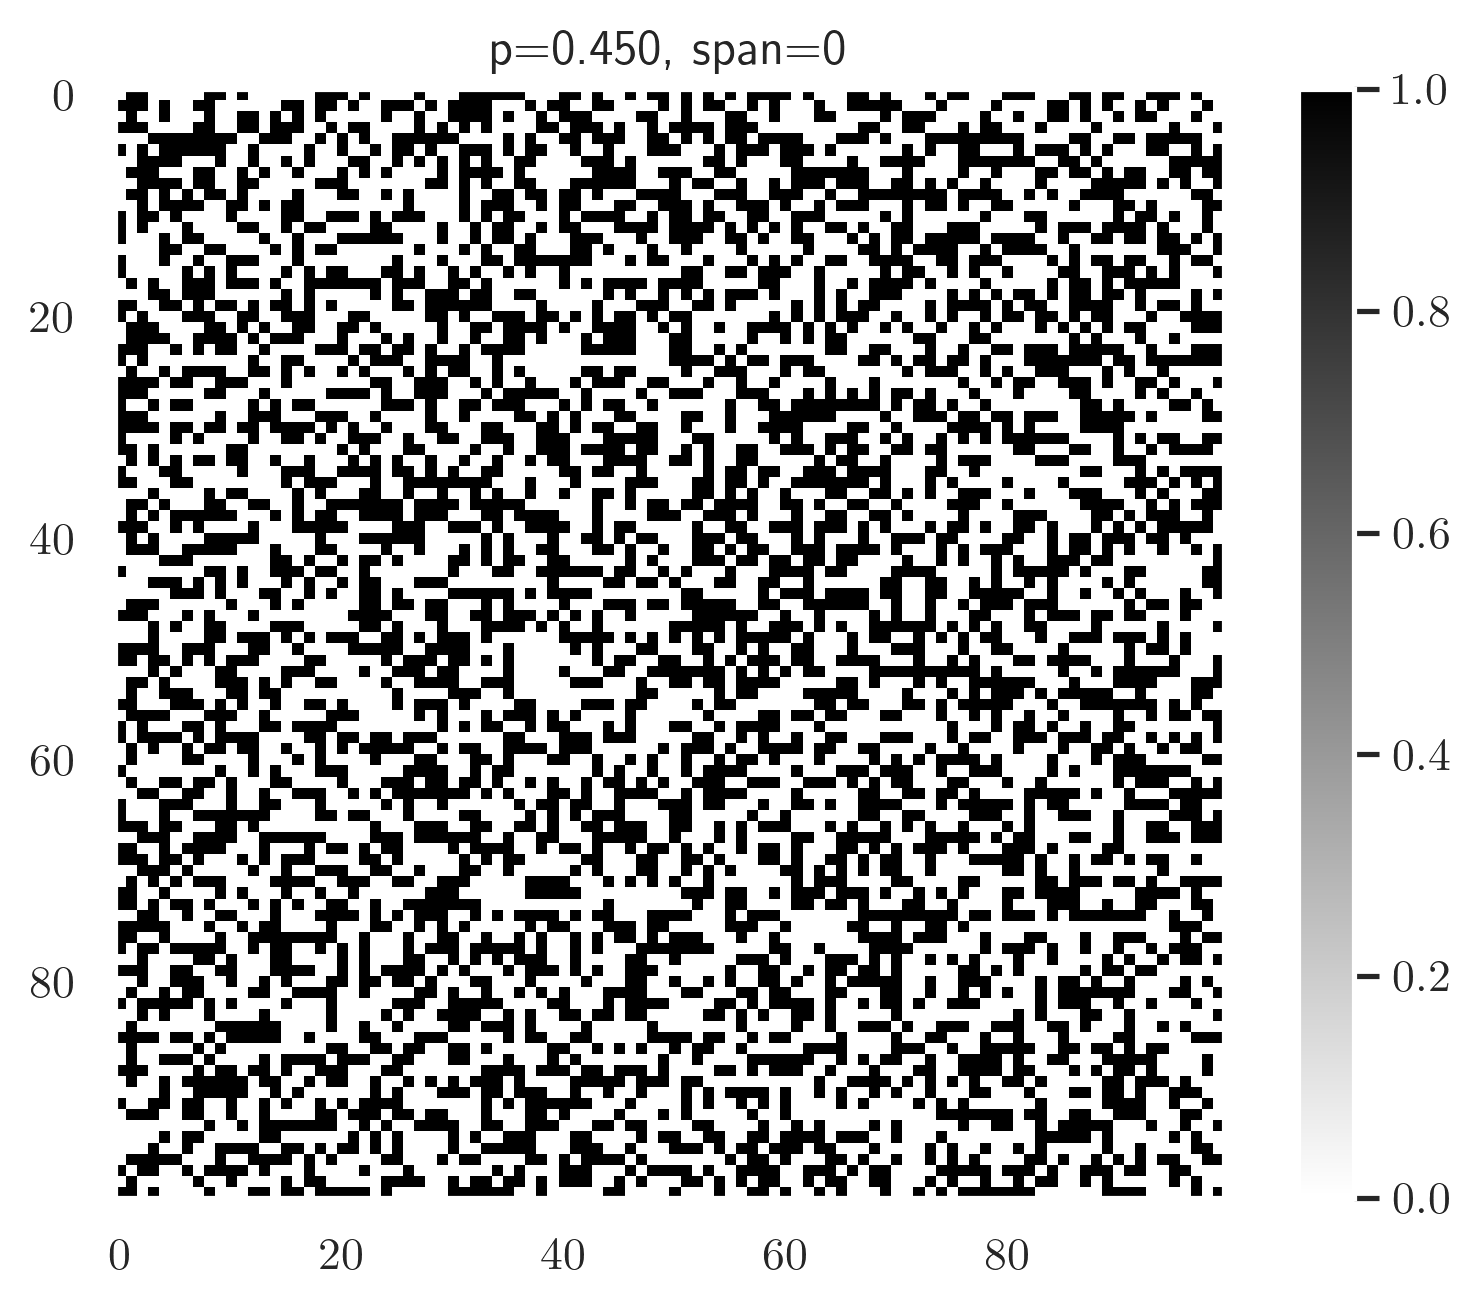

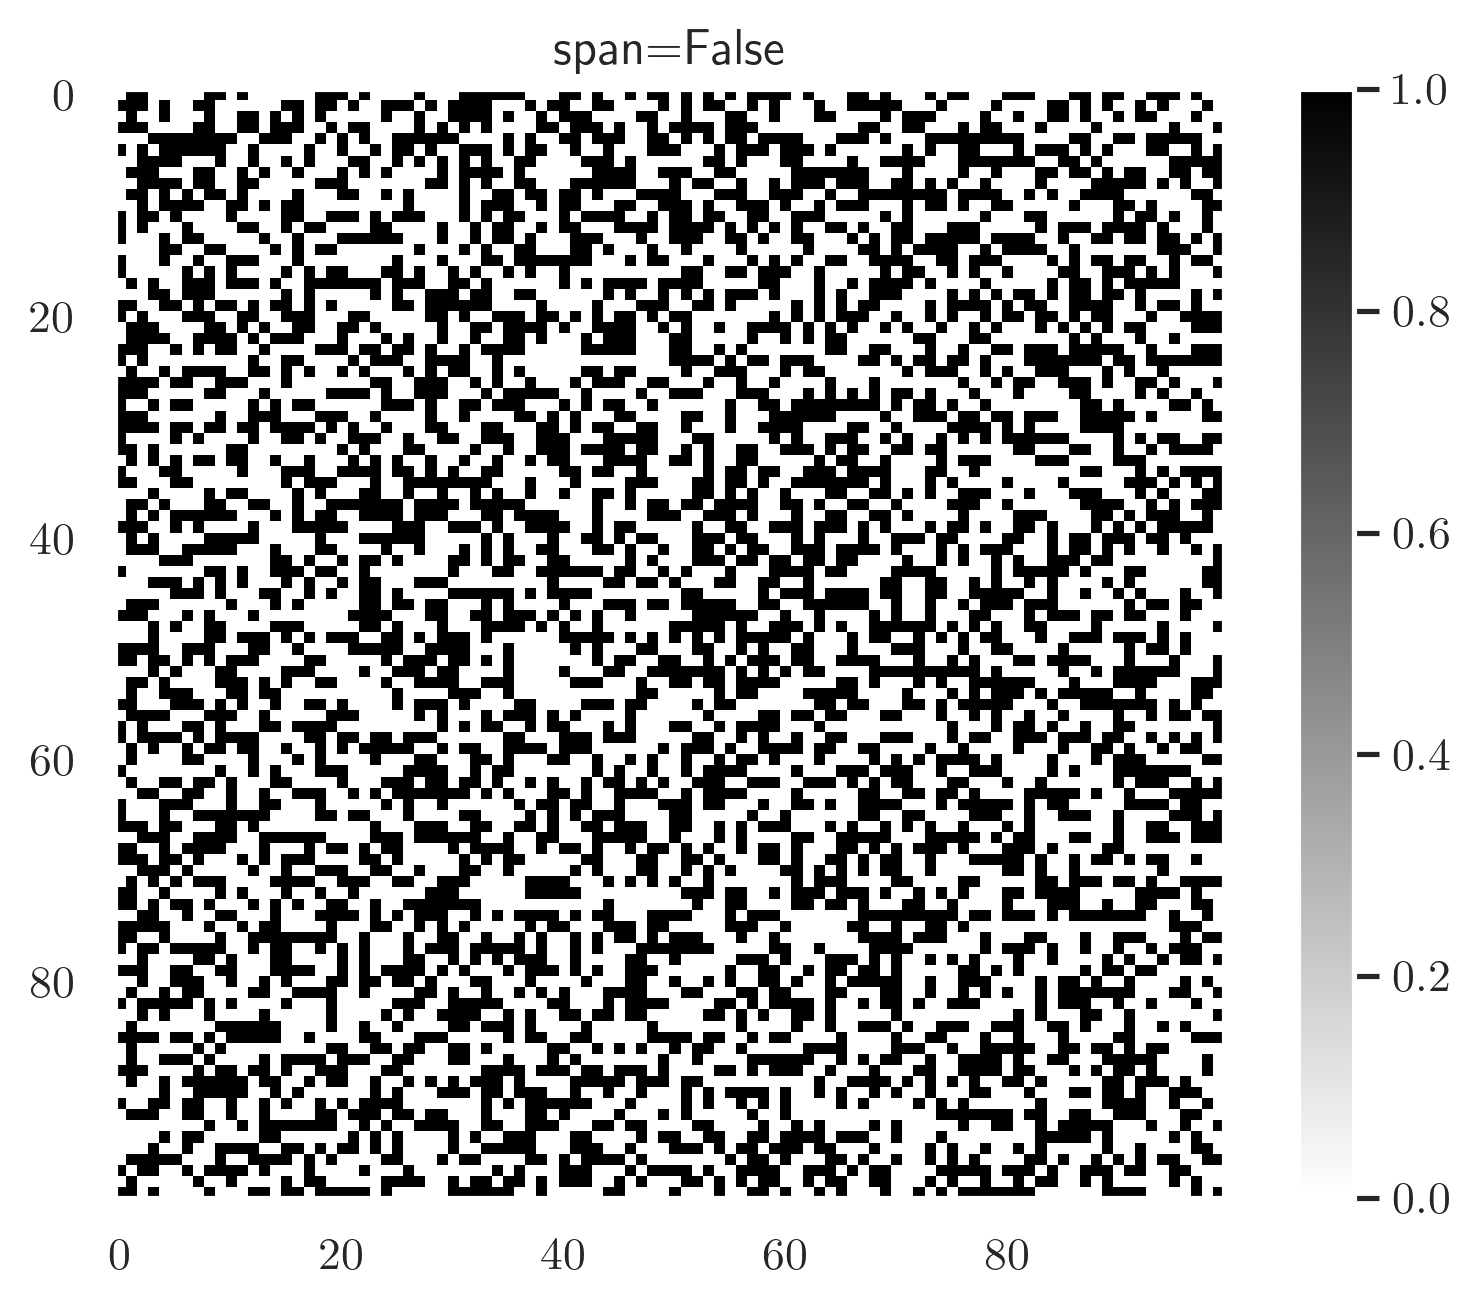

Next


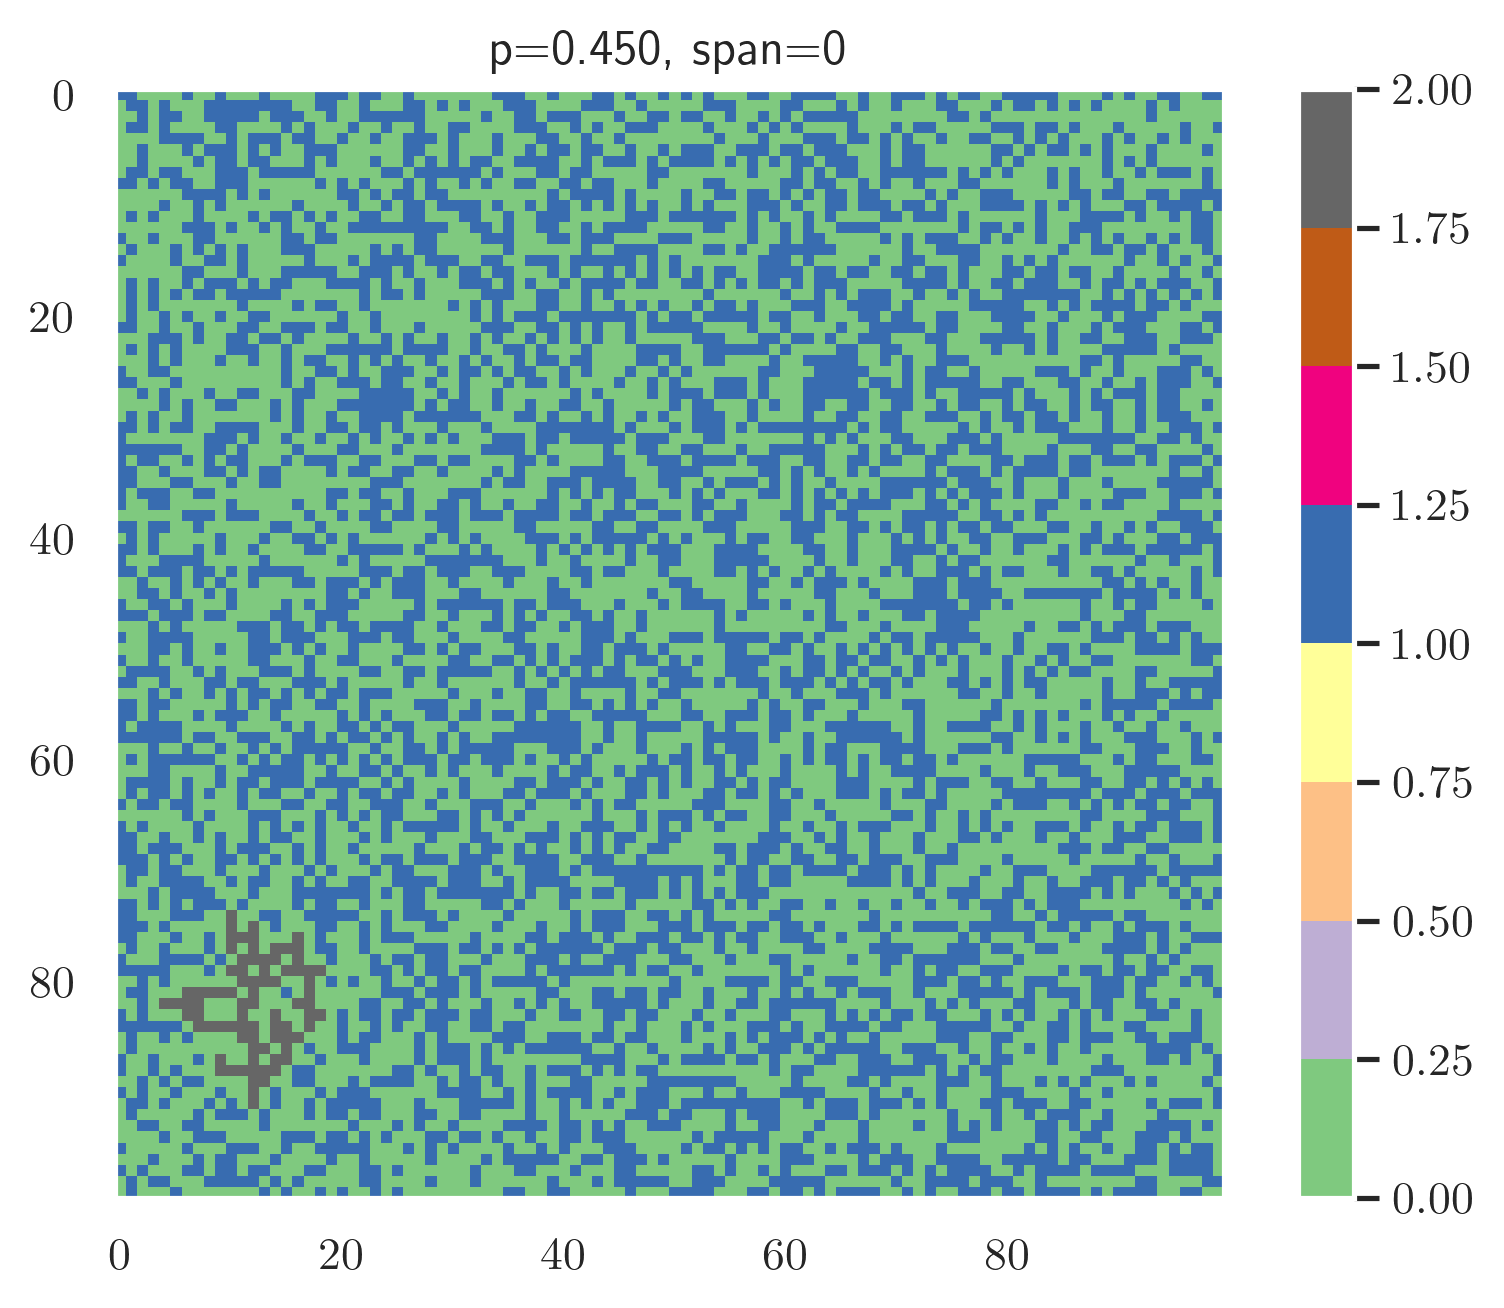

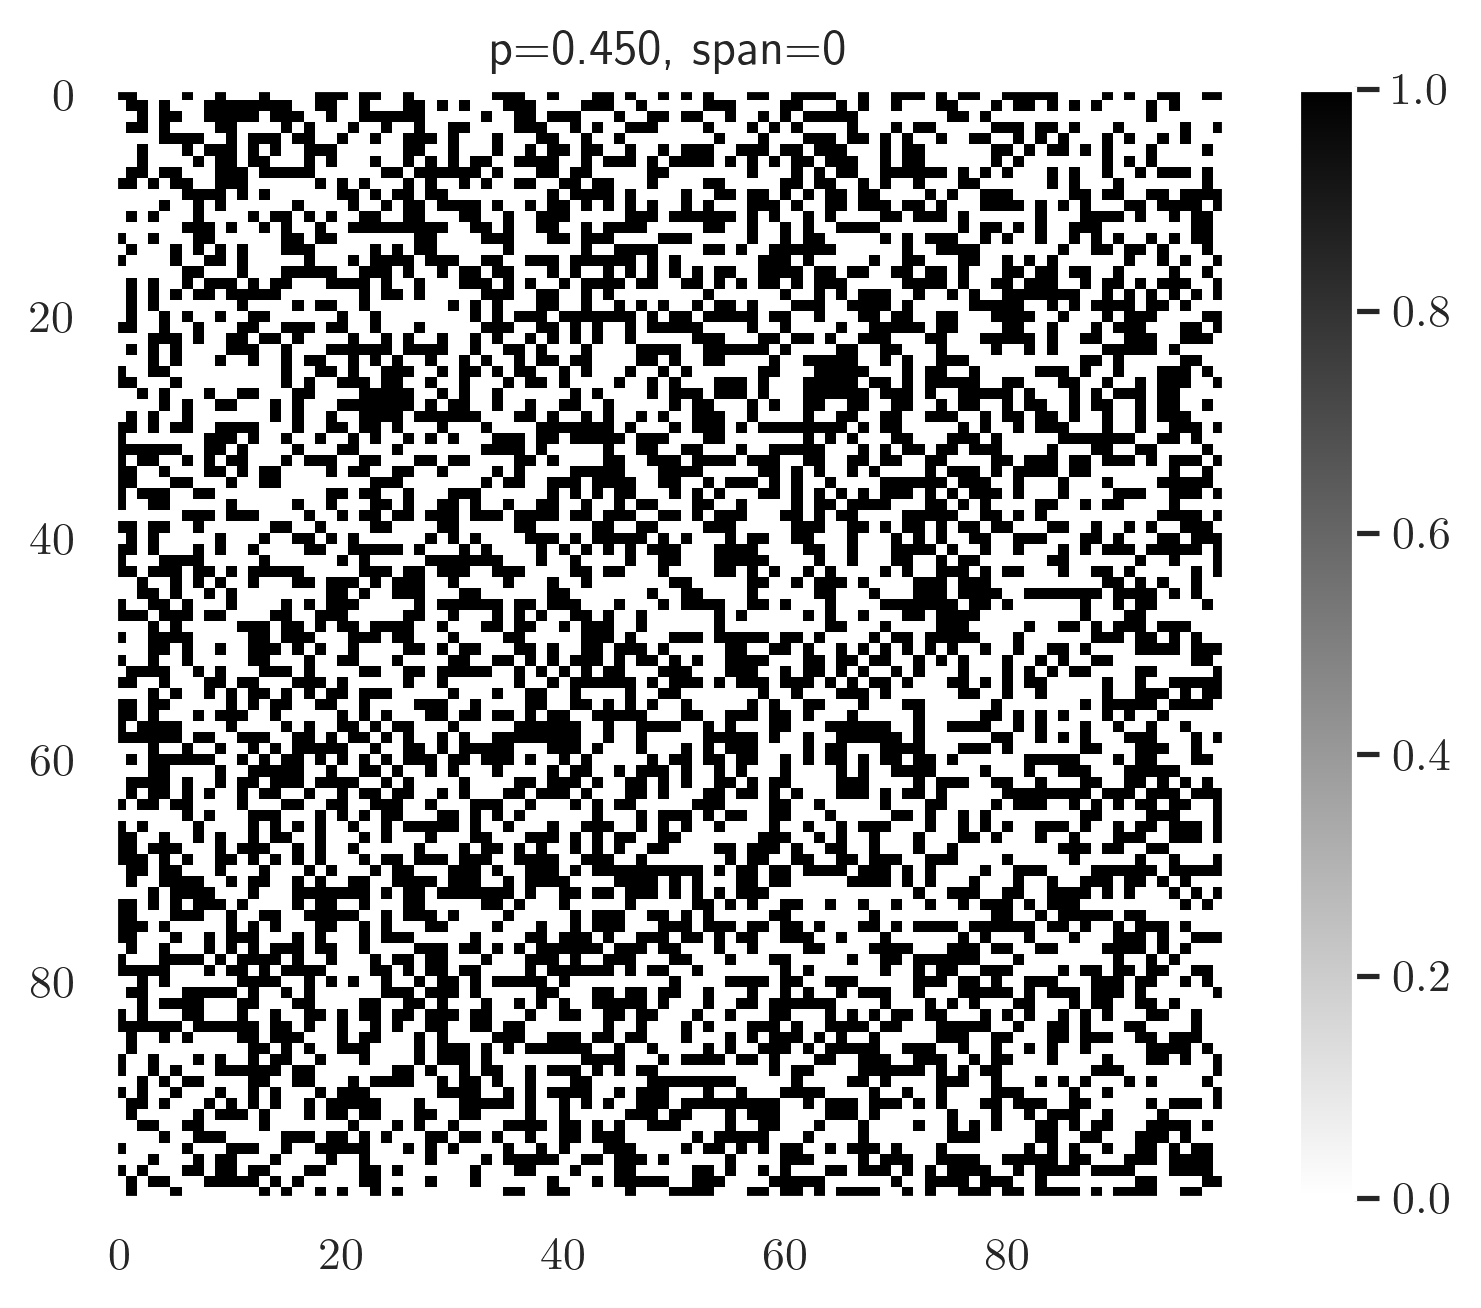

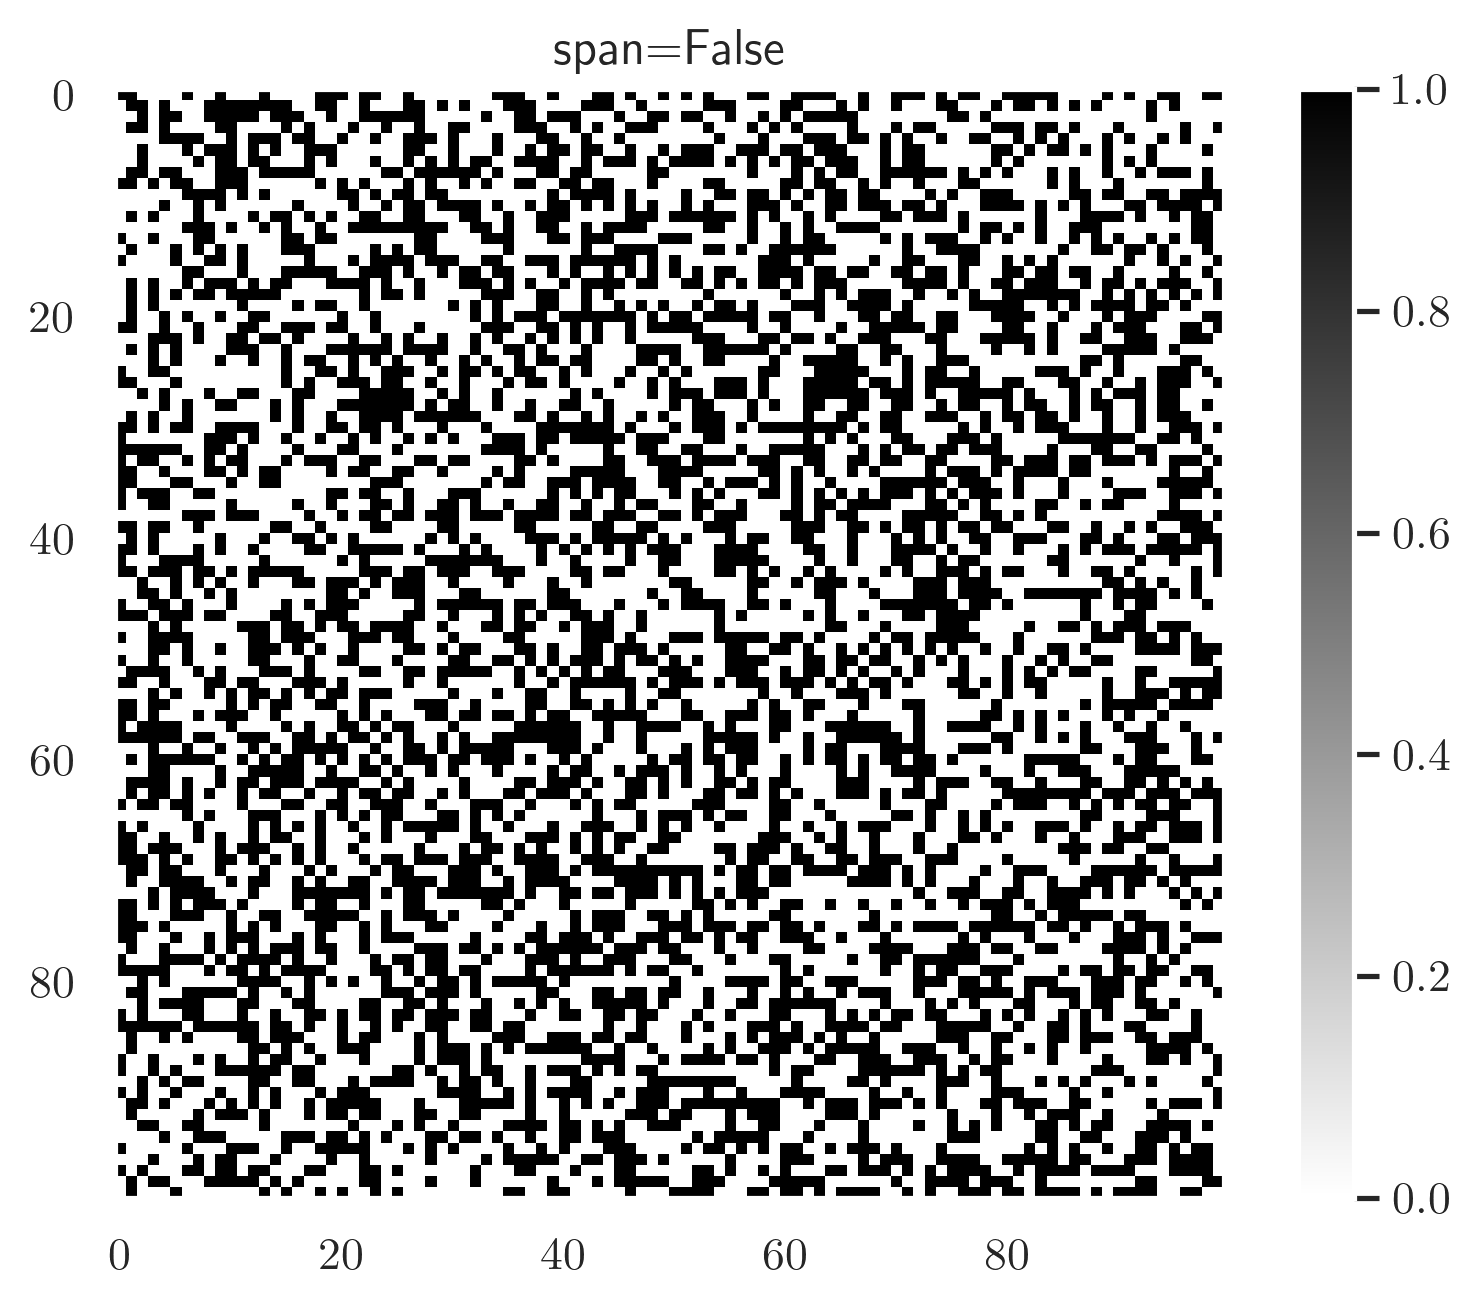

Next


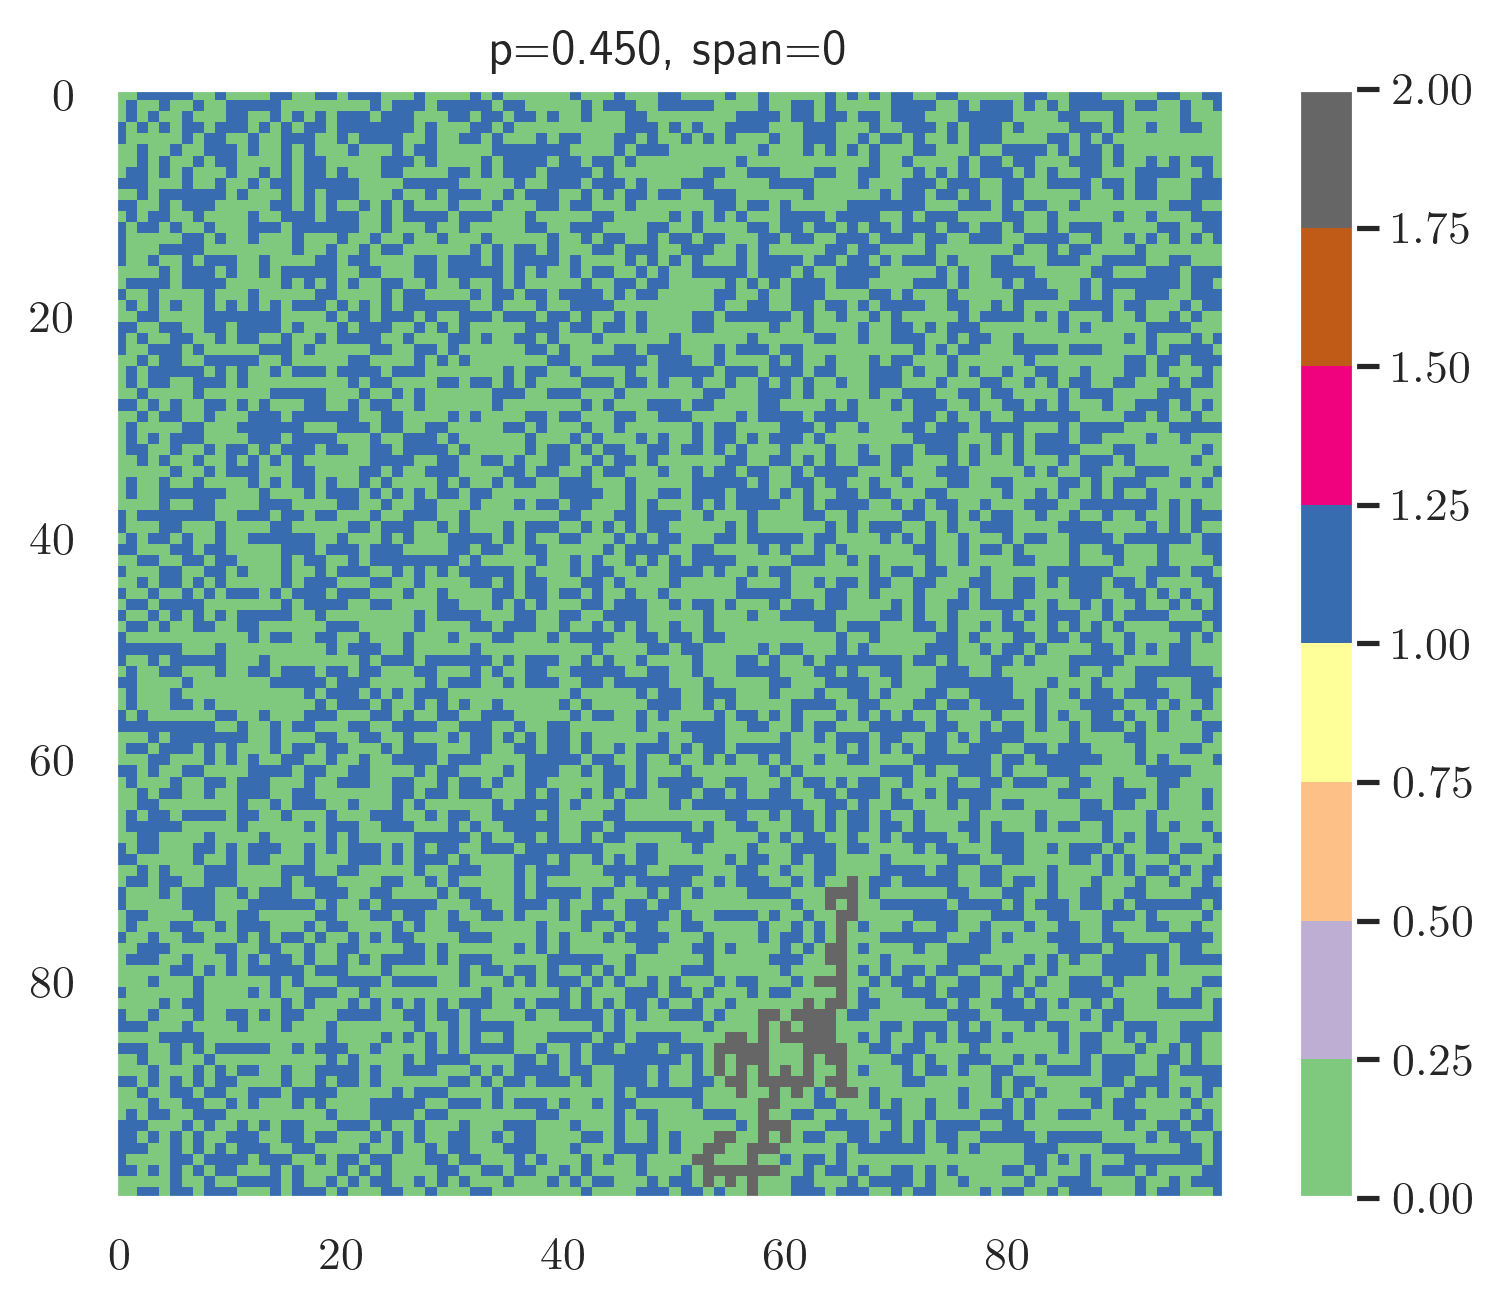

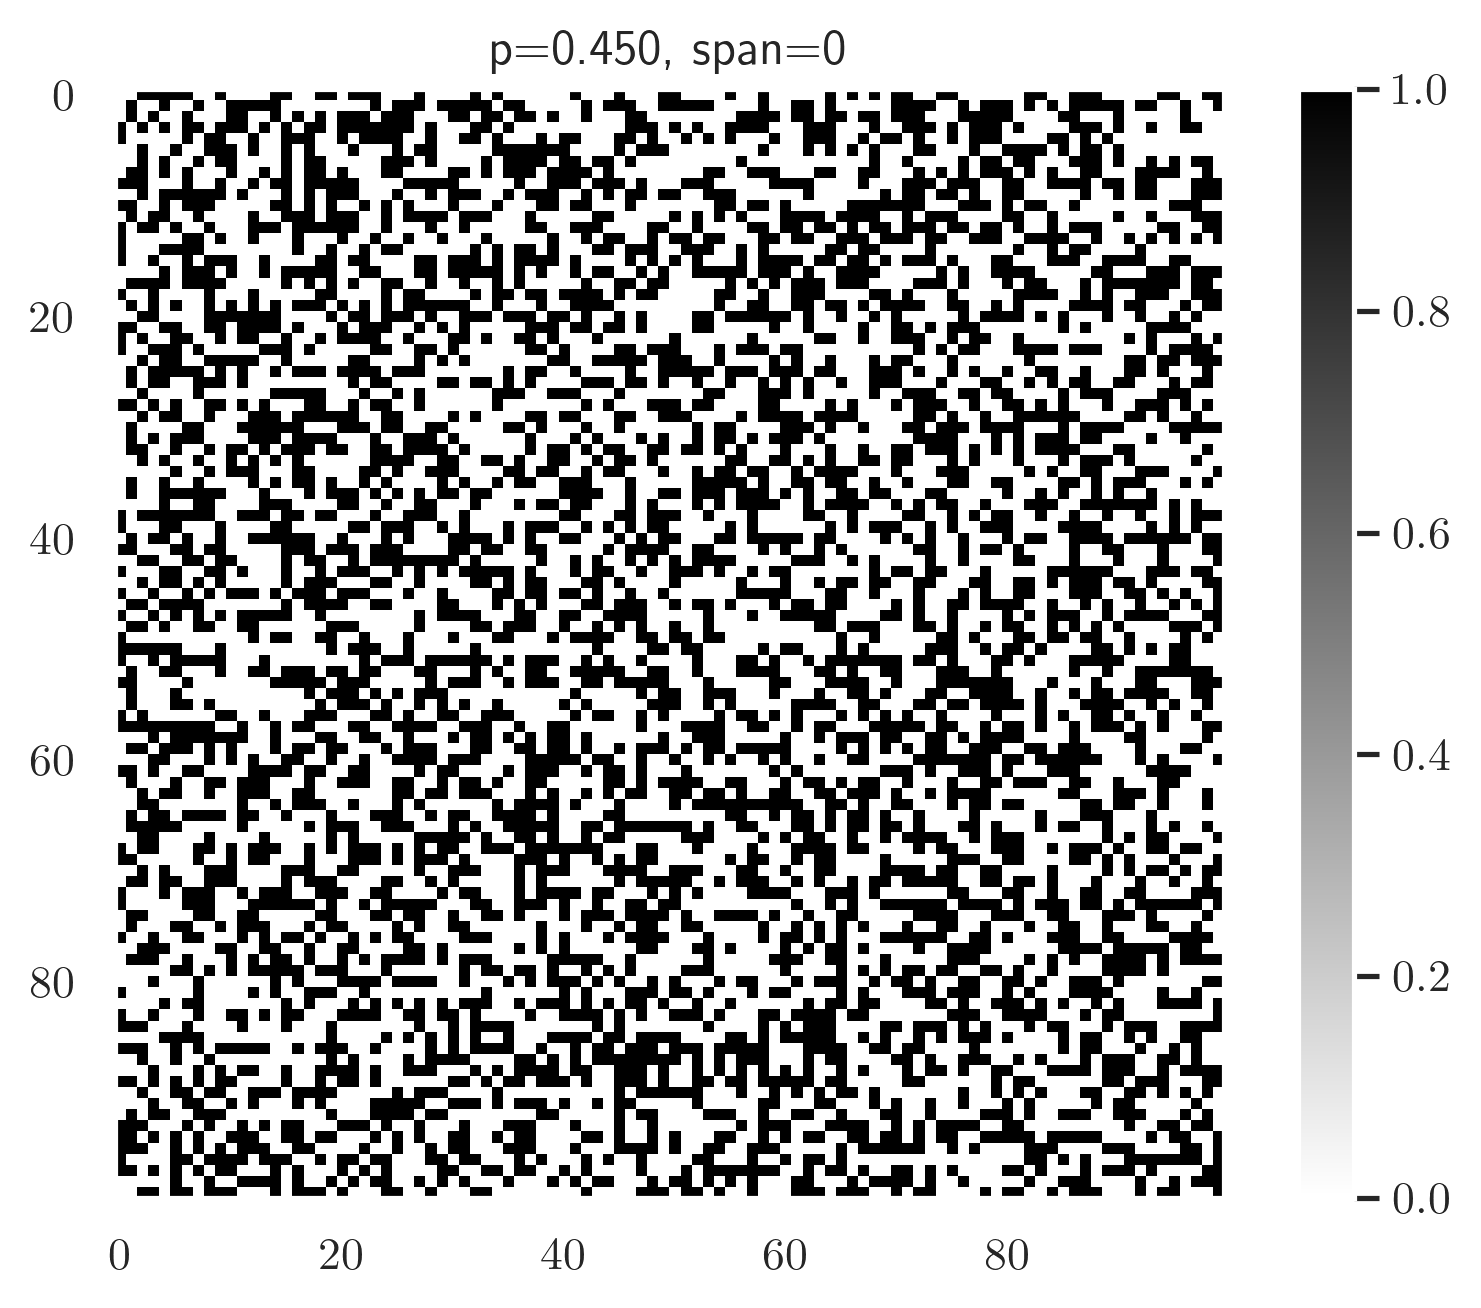

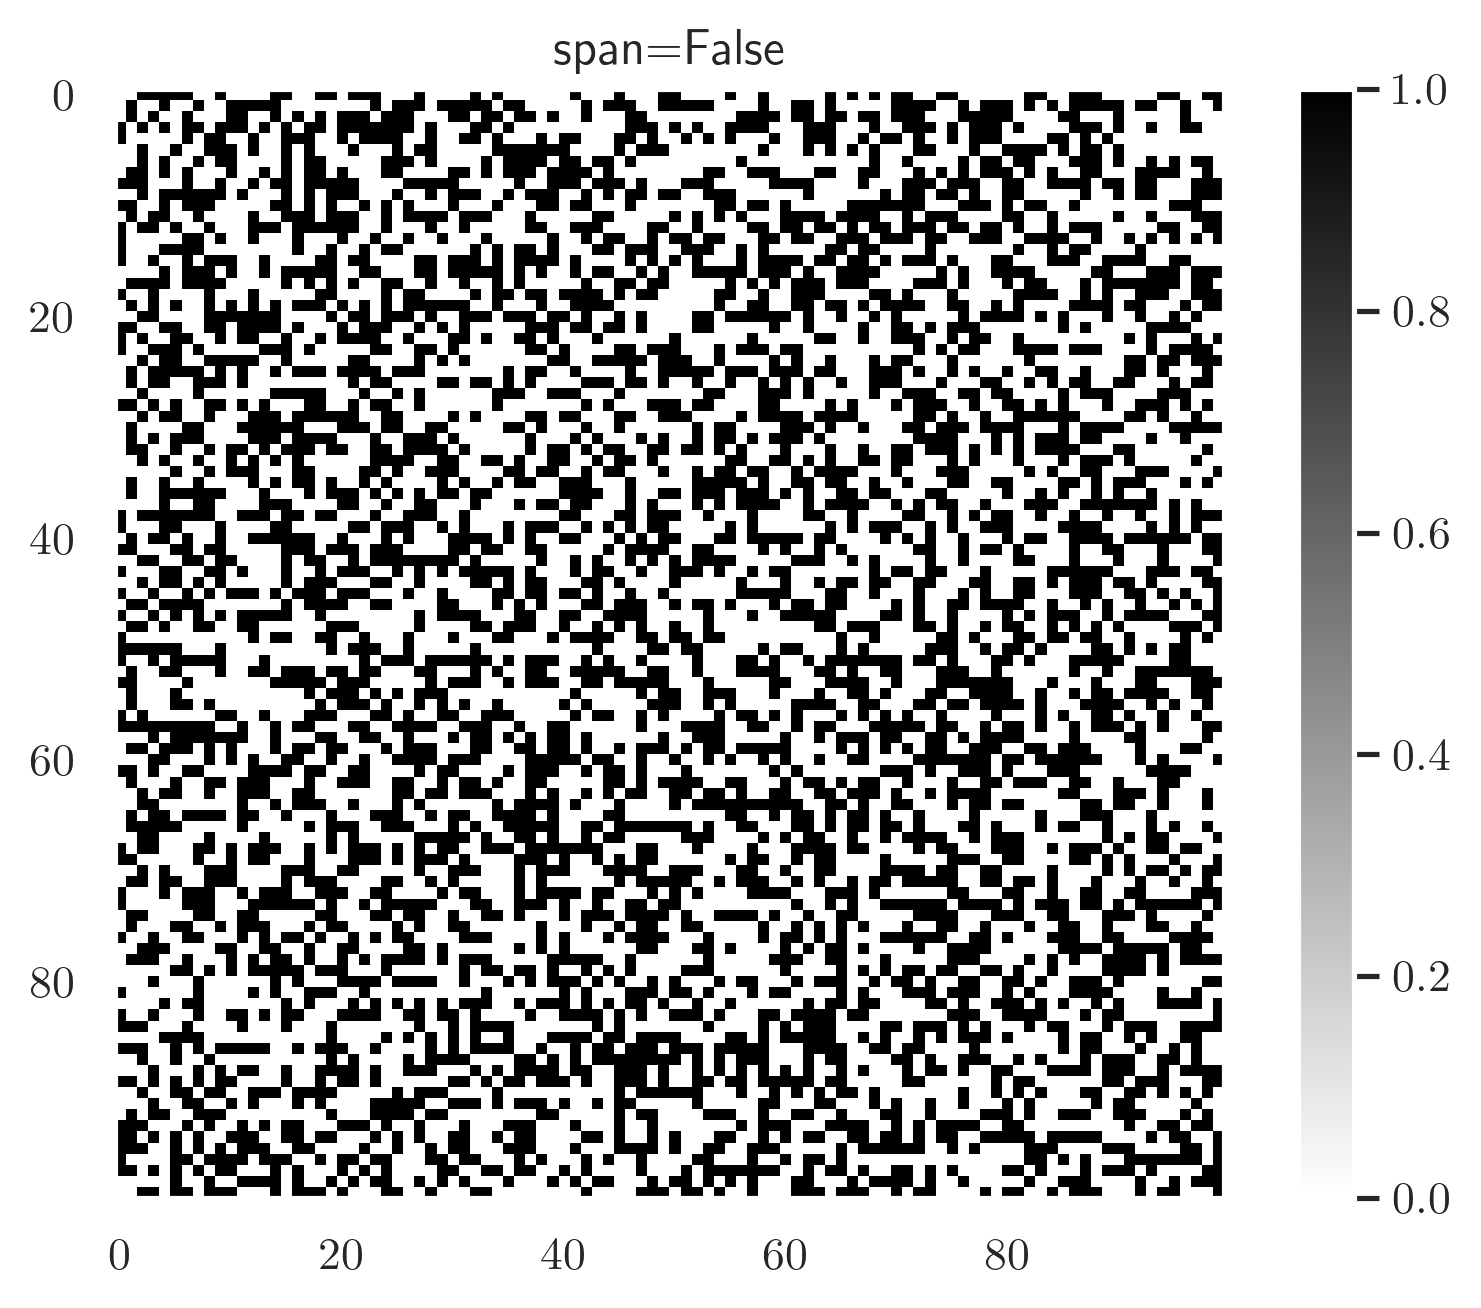

Next


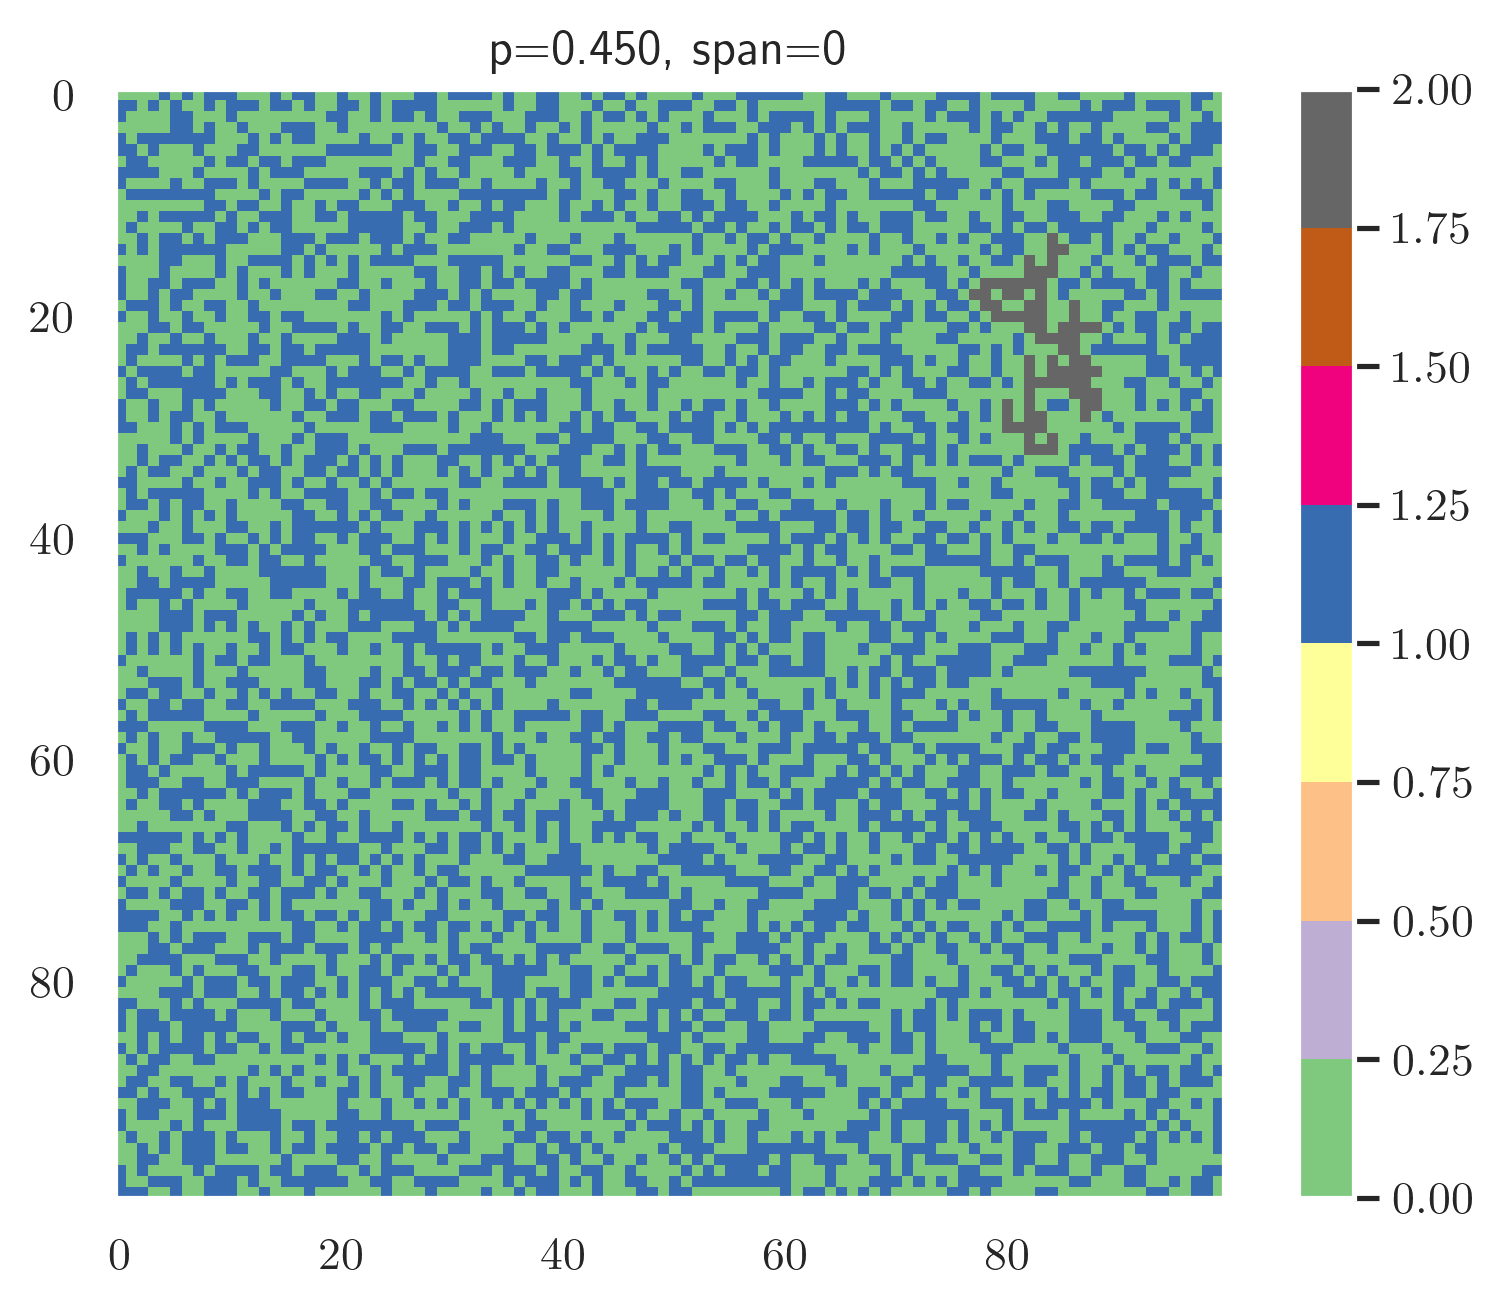

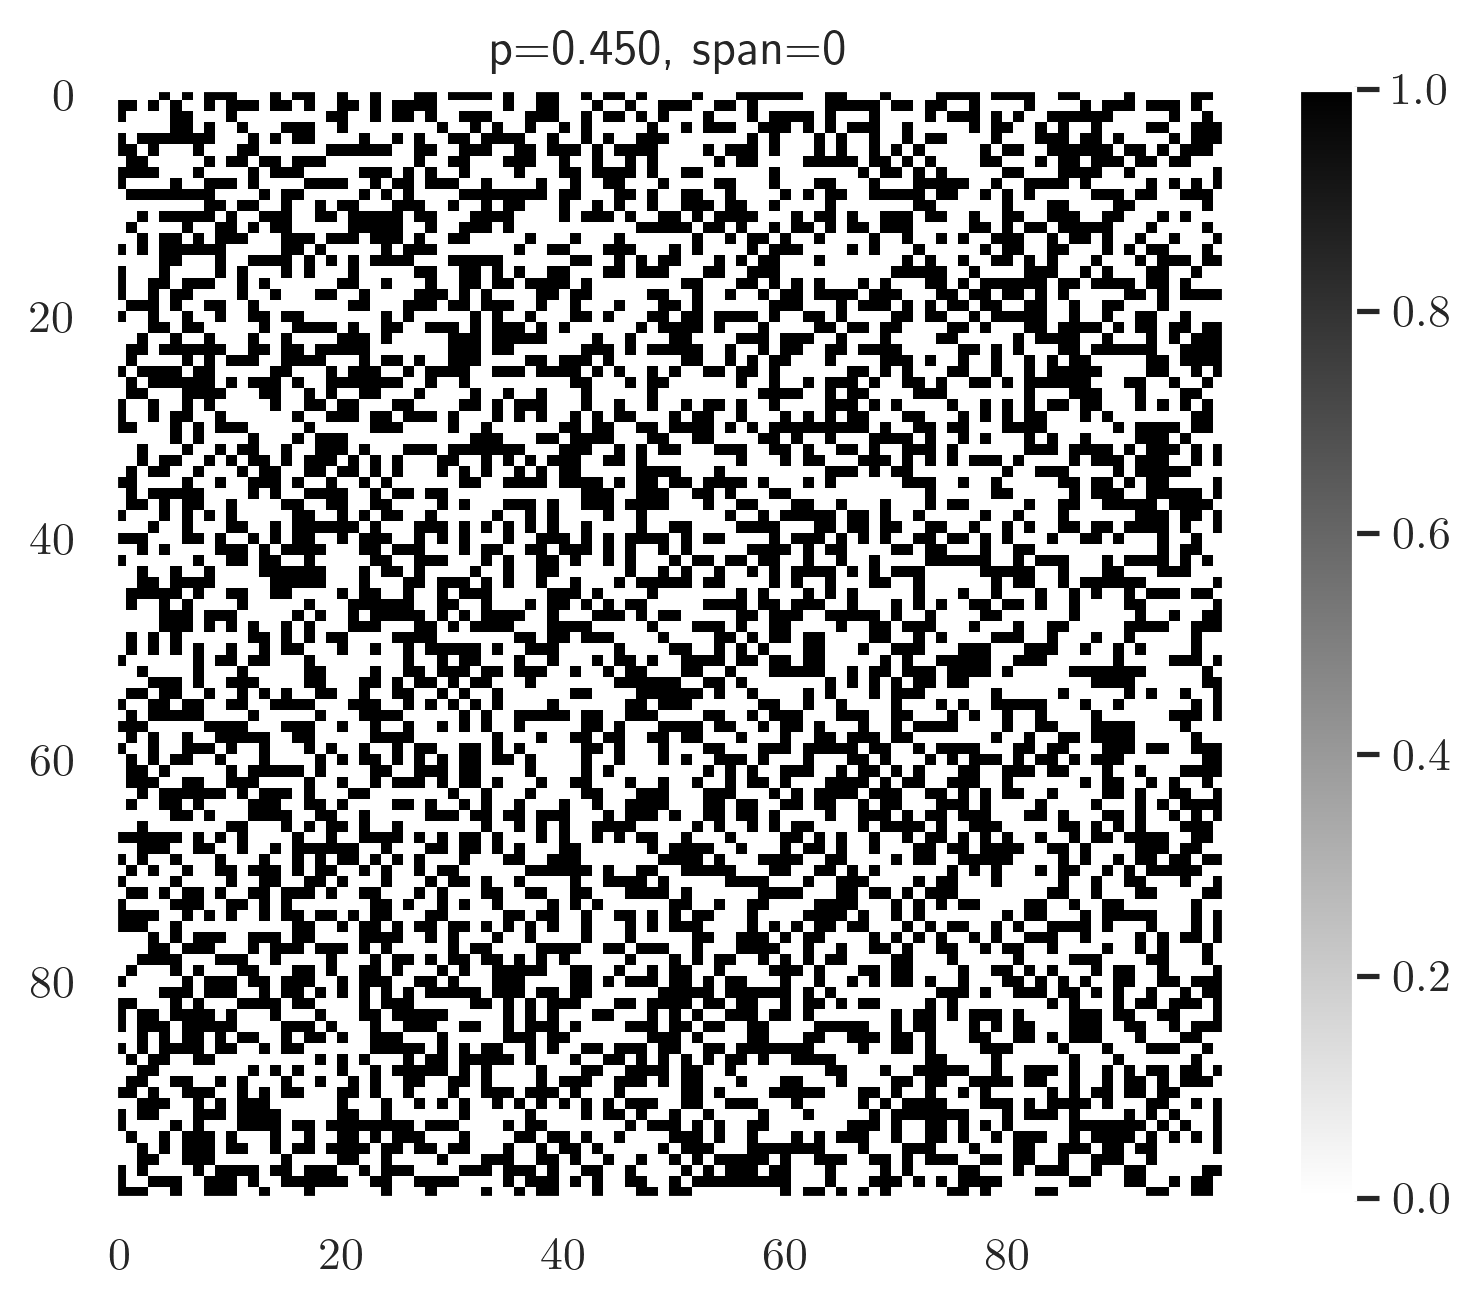

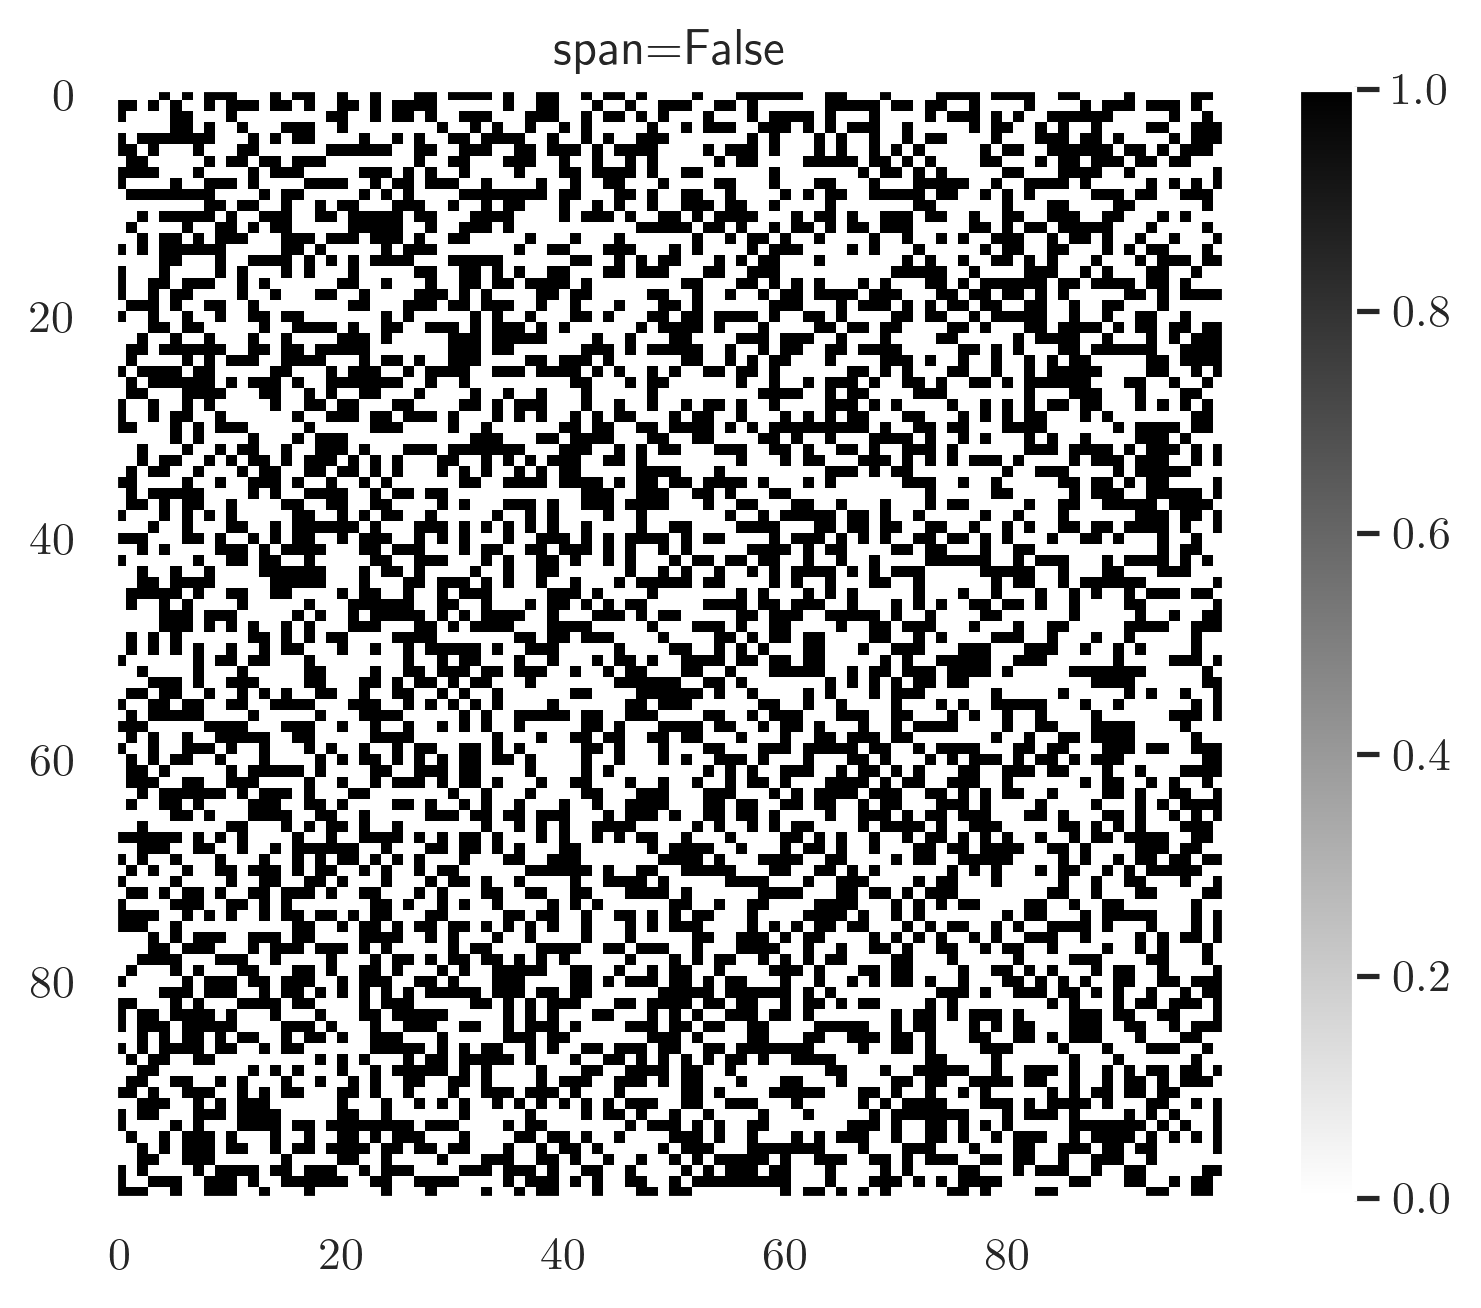

Next


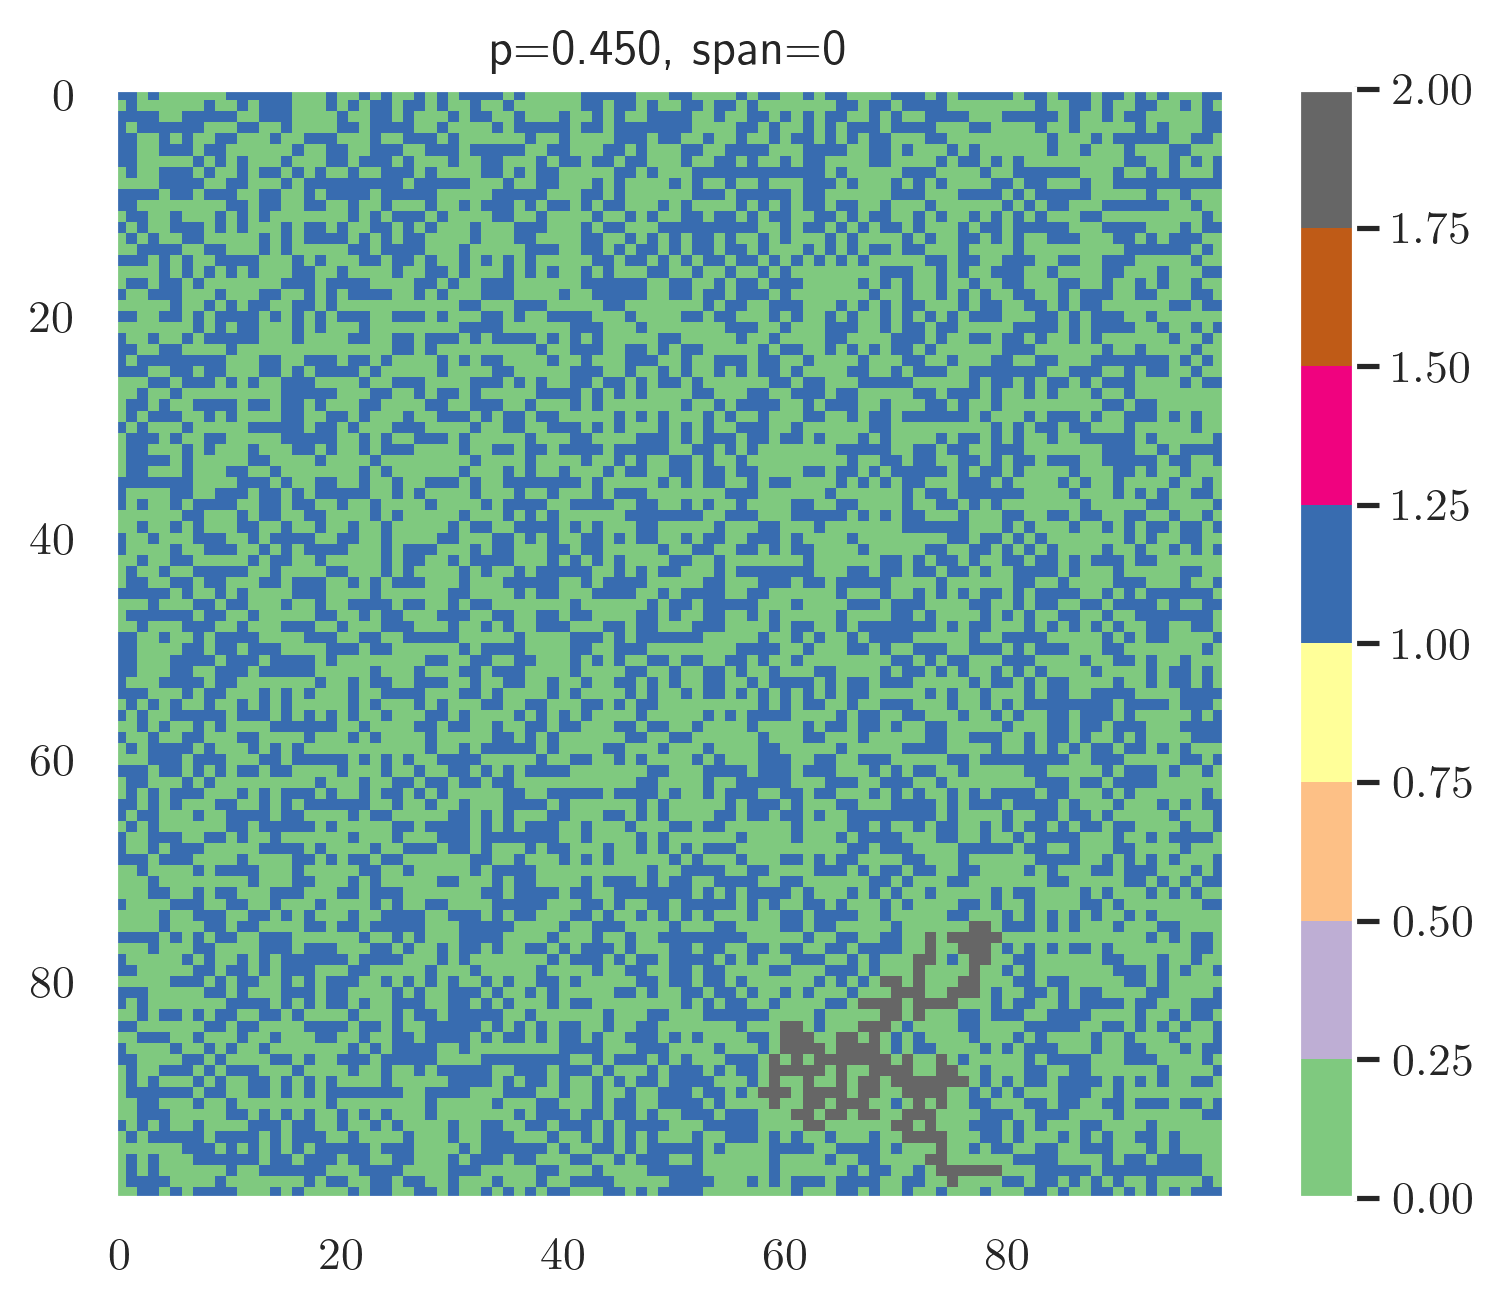

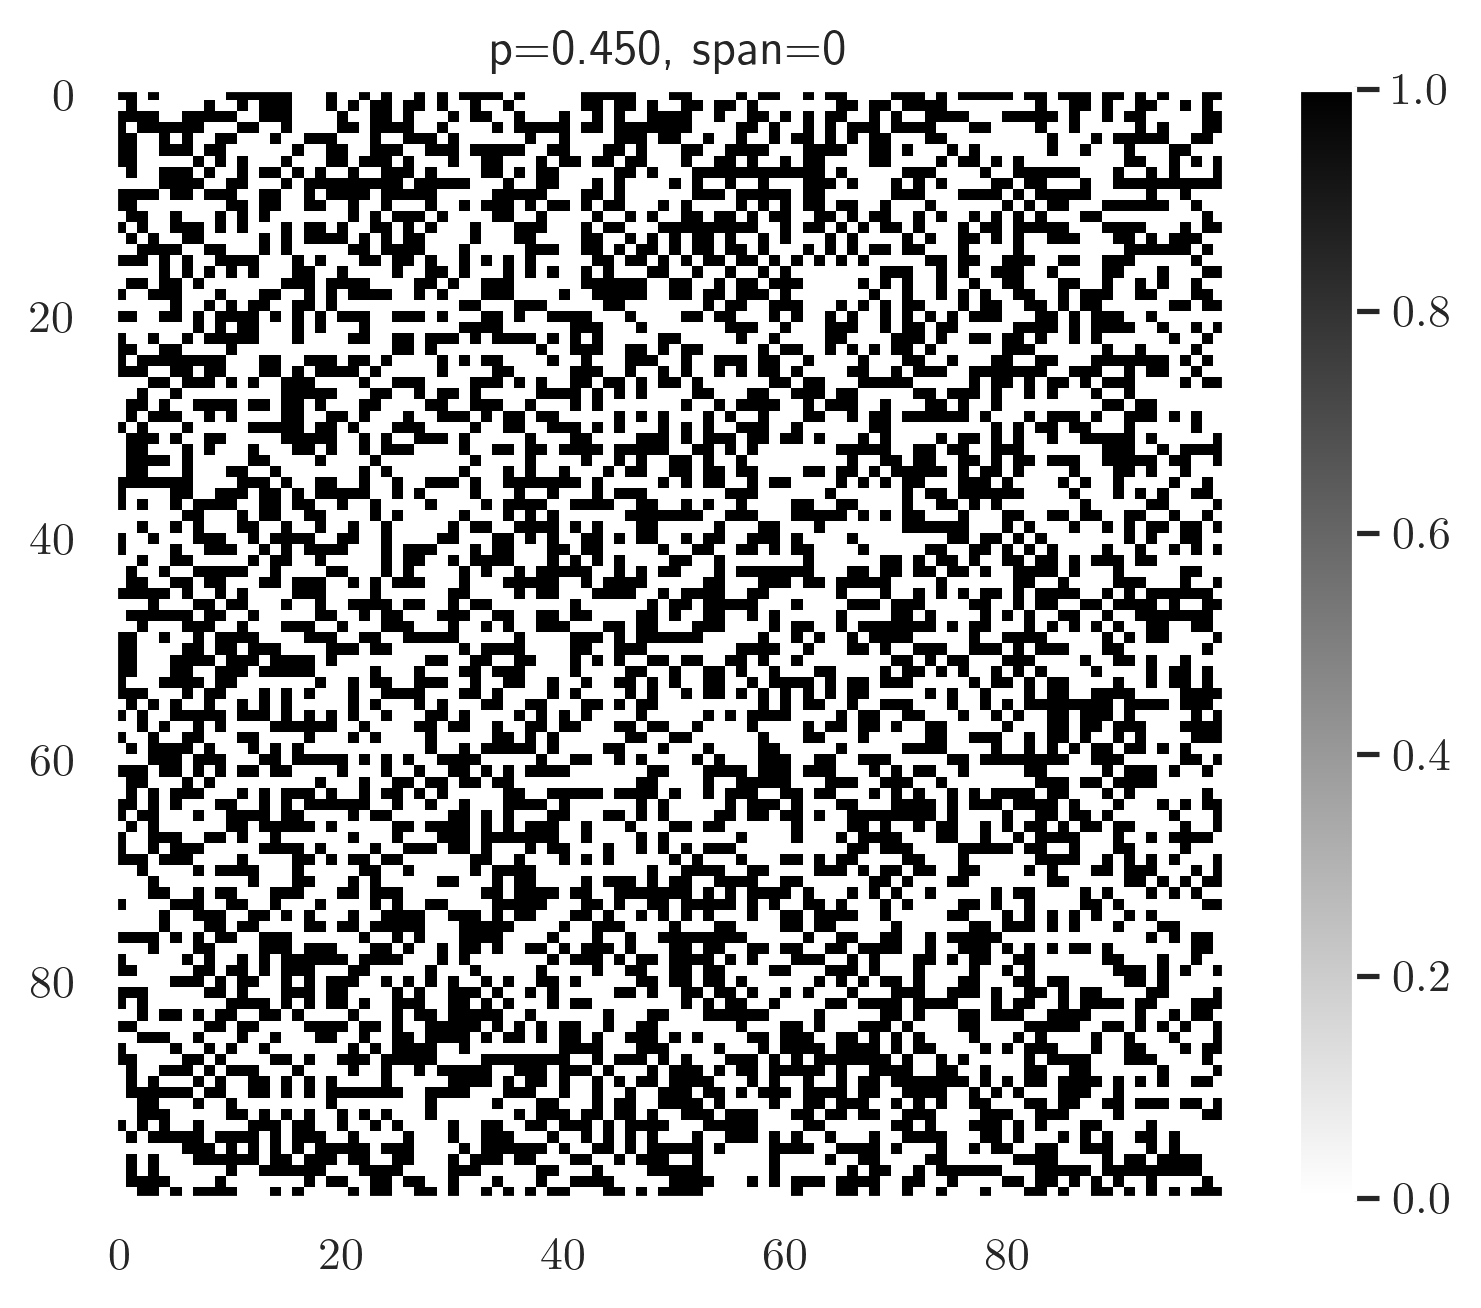

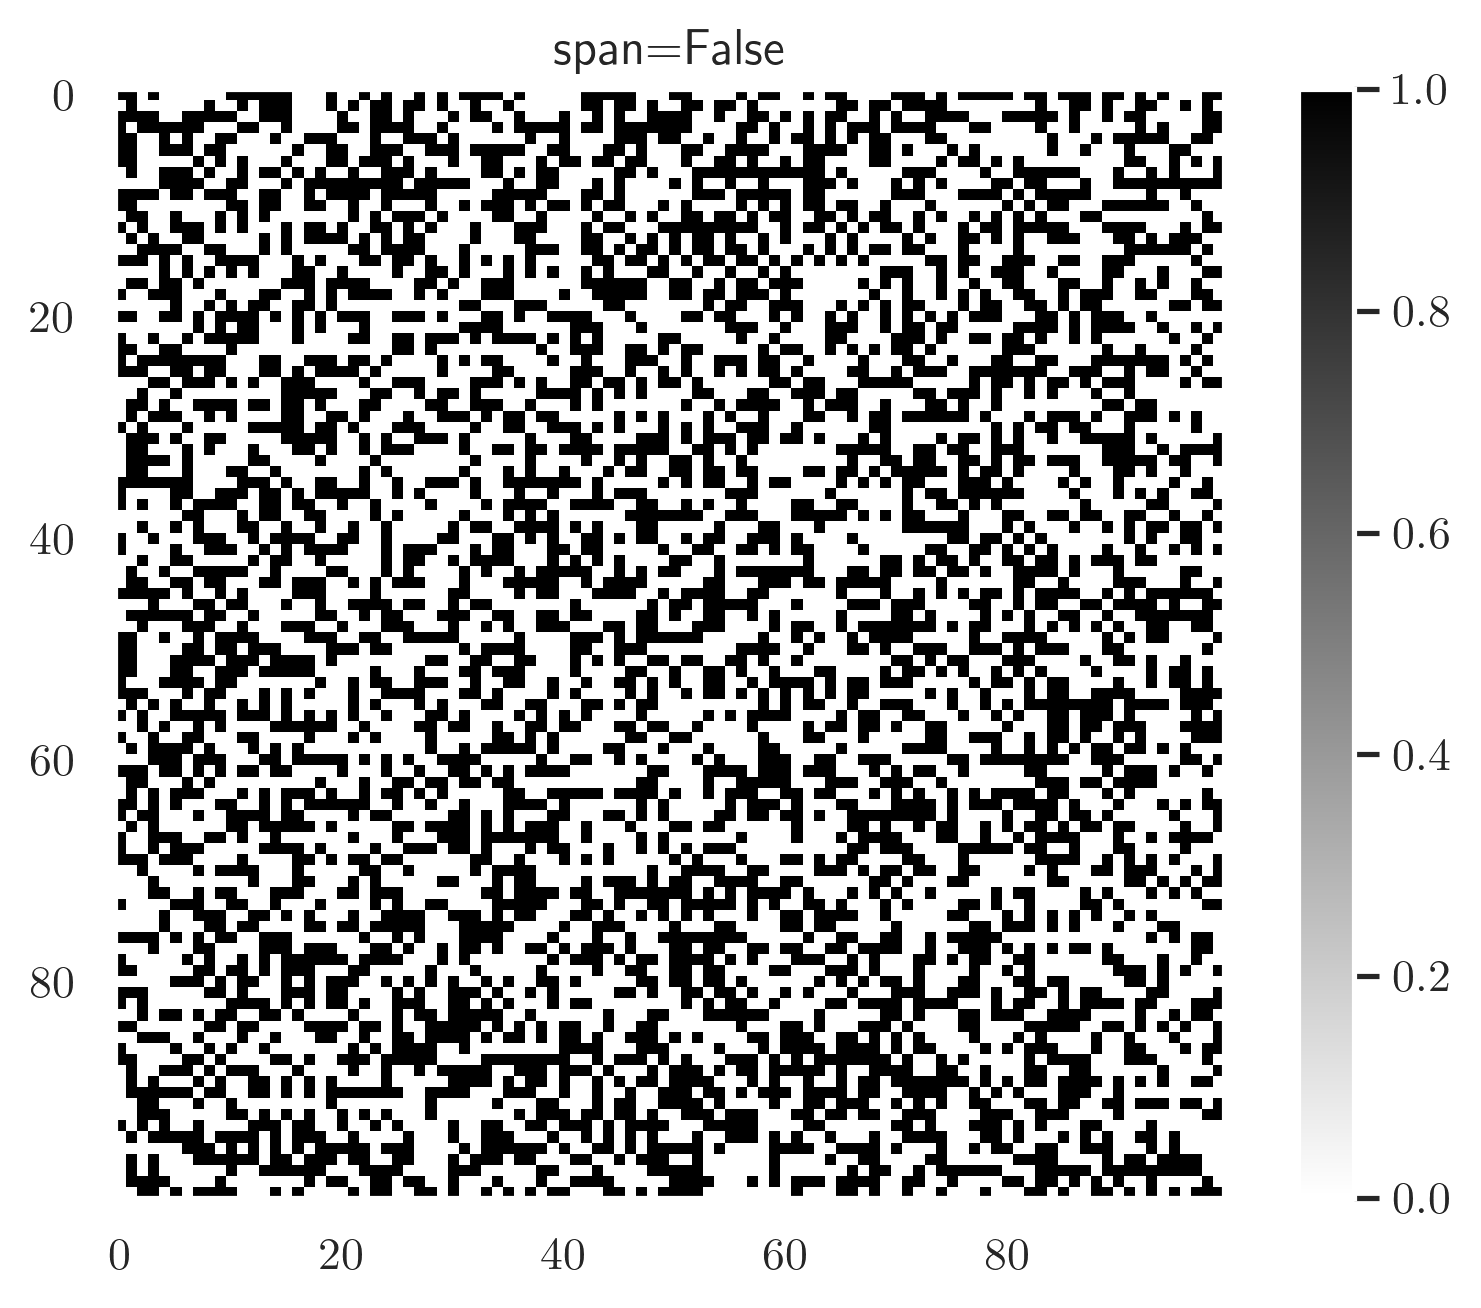

Next


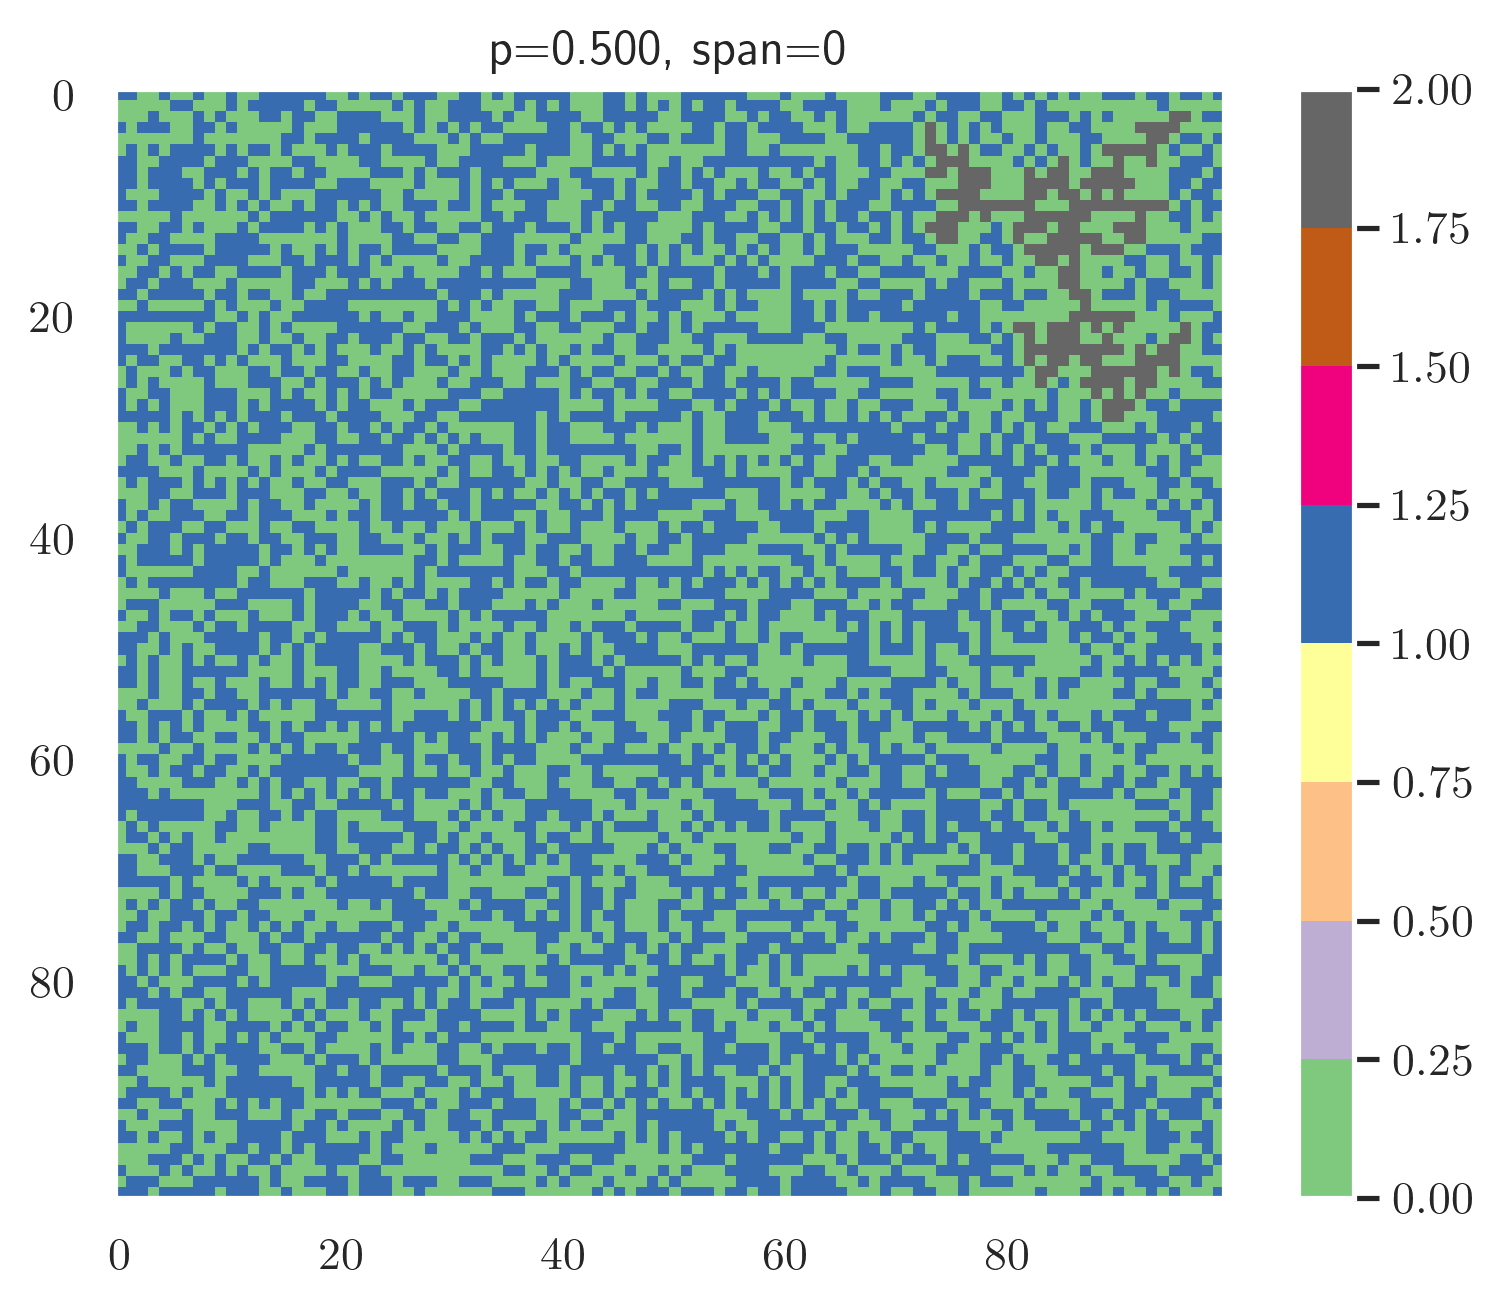

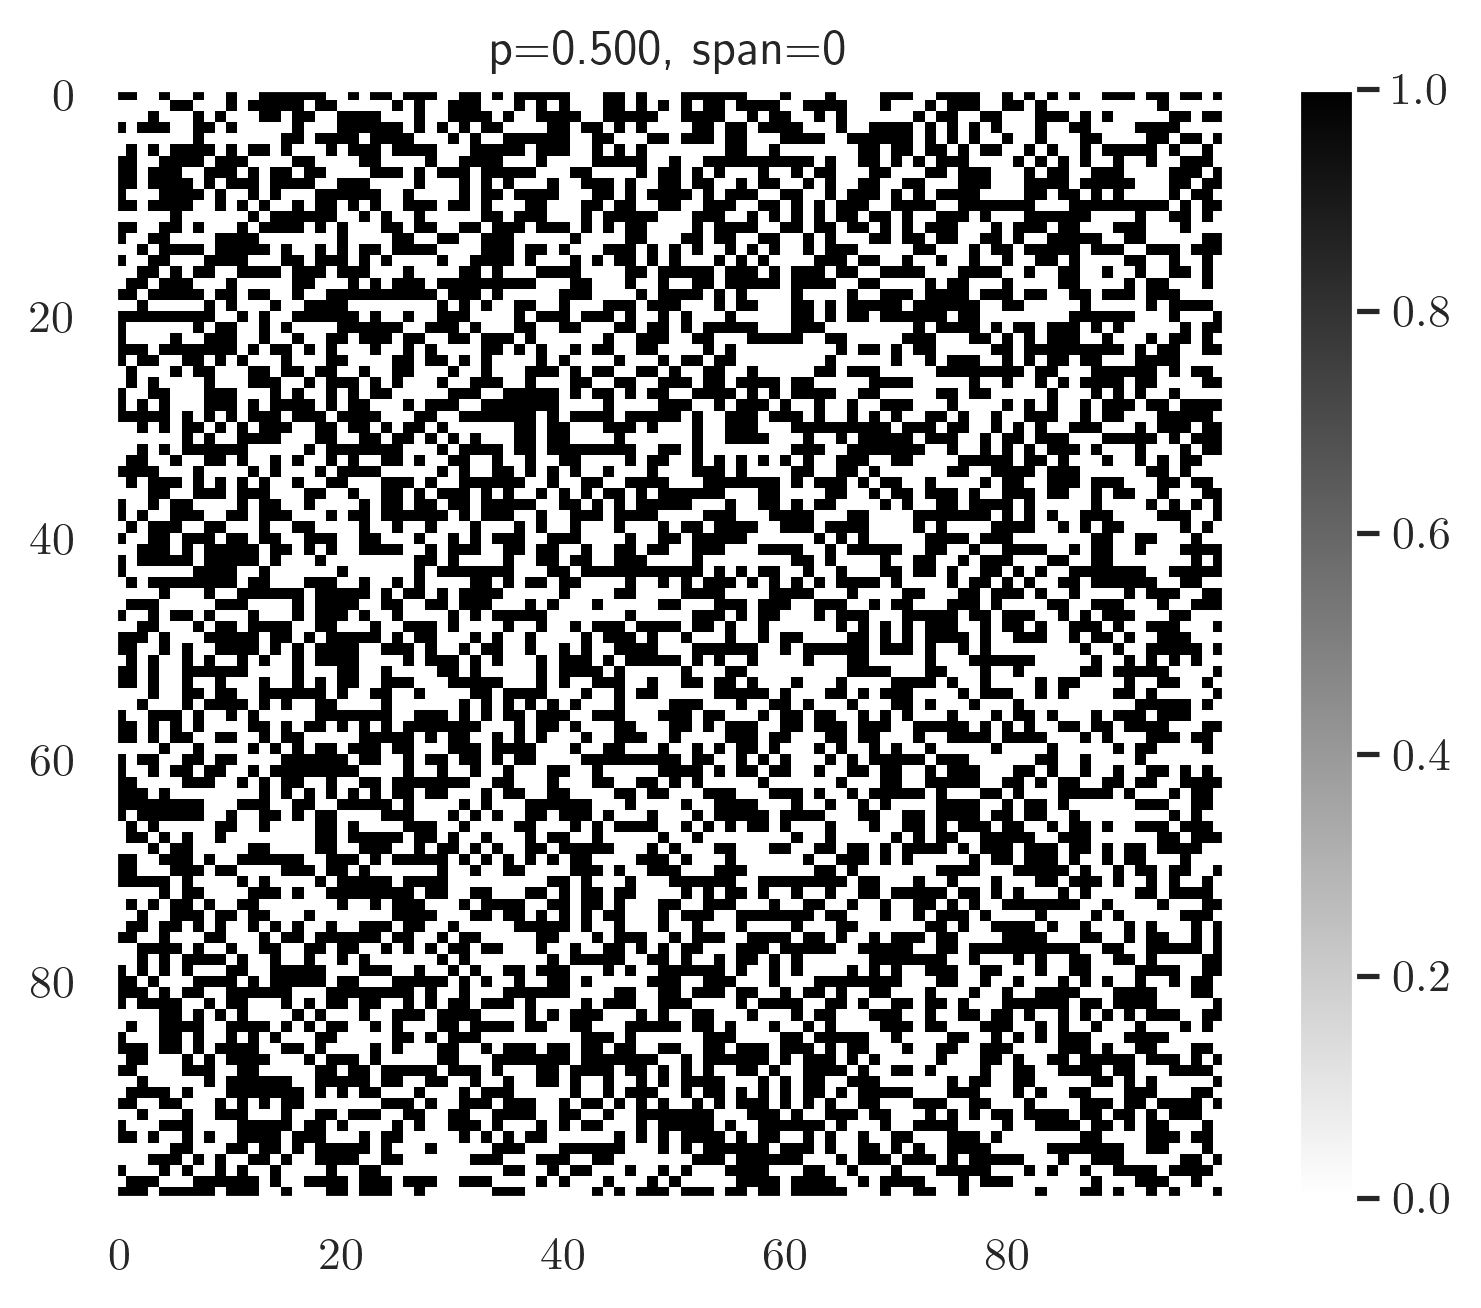

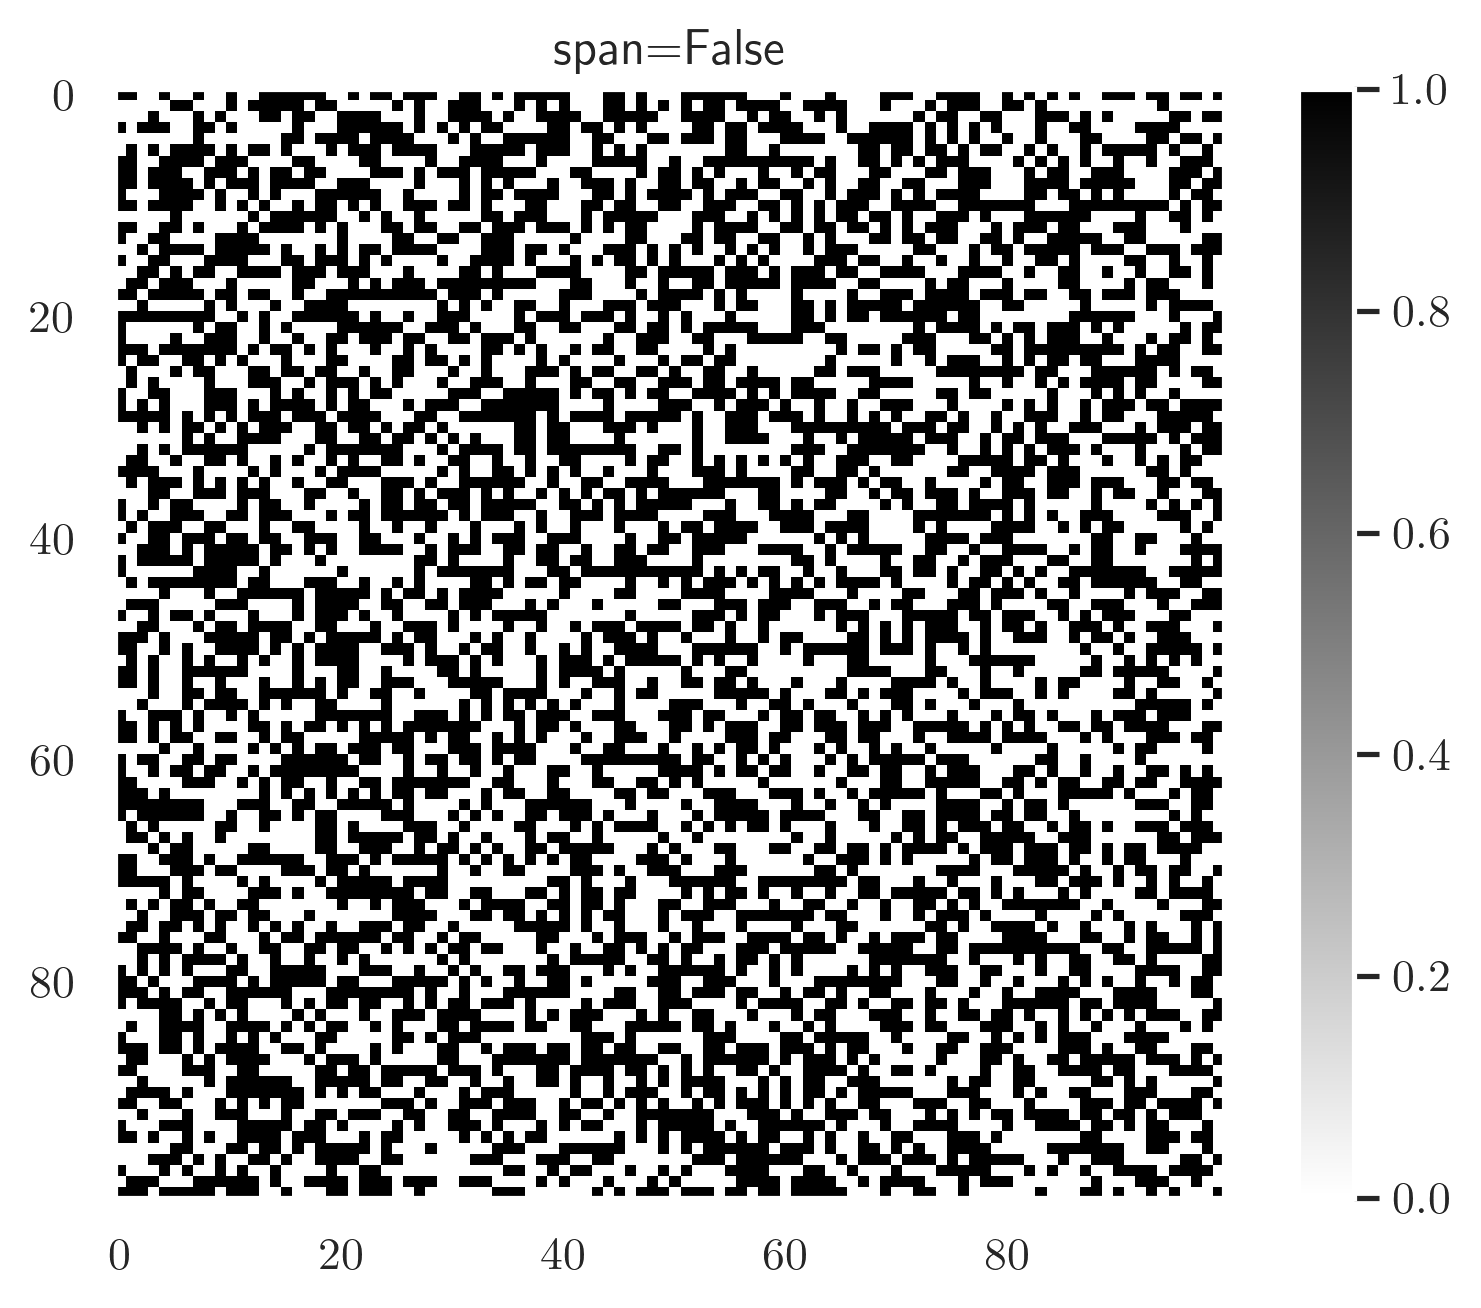

Next


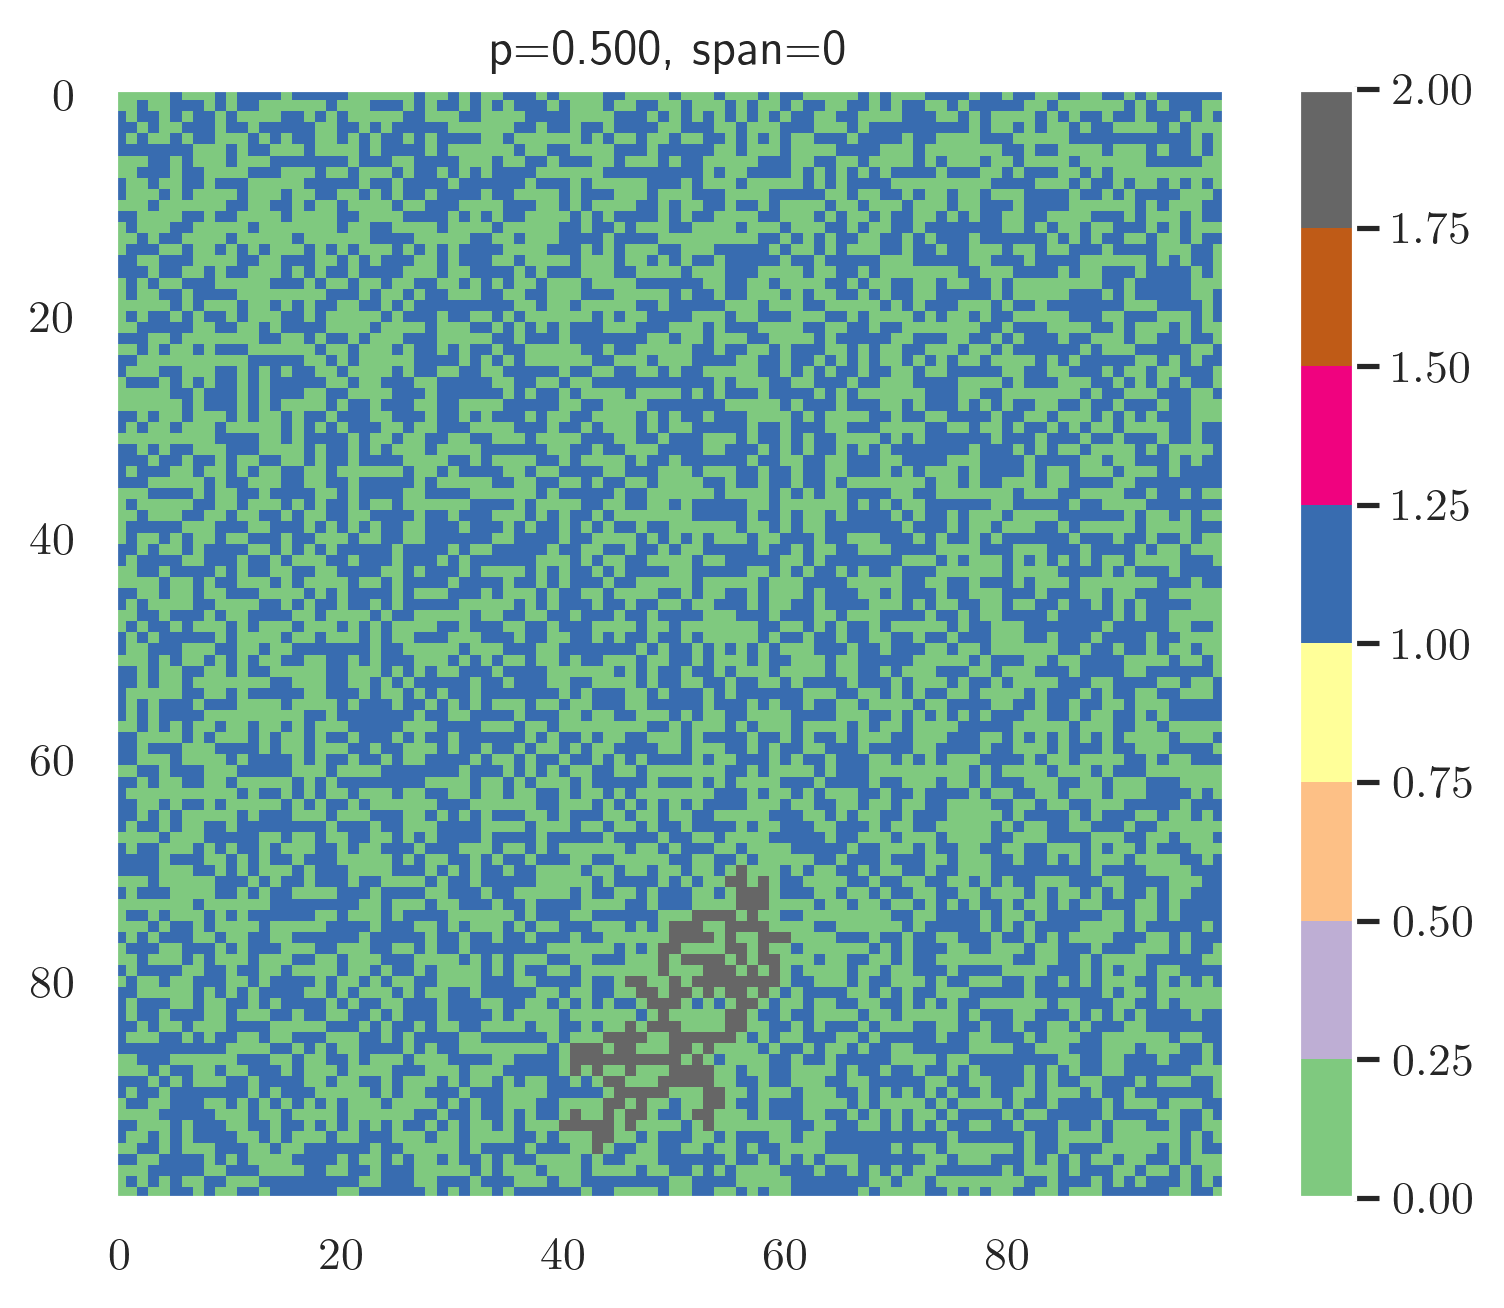

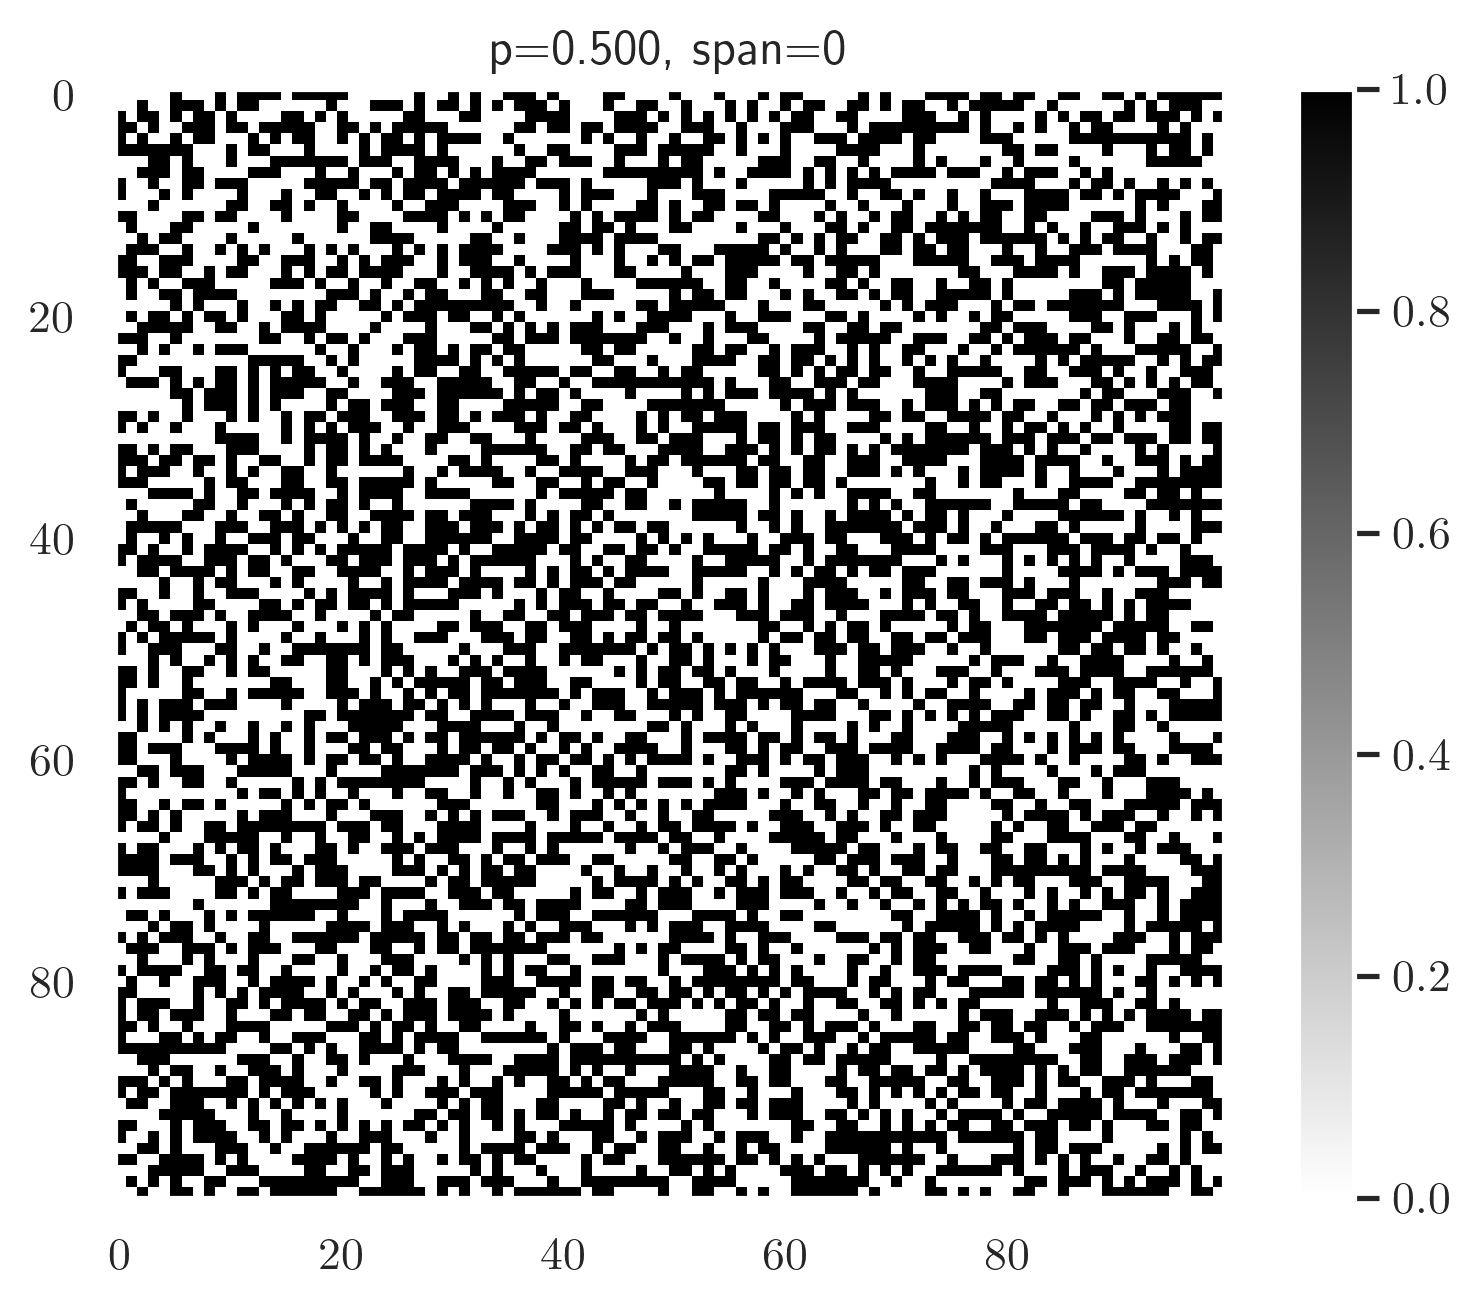

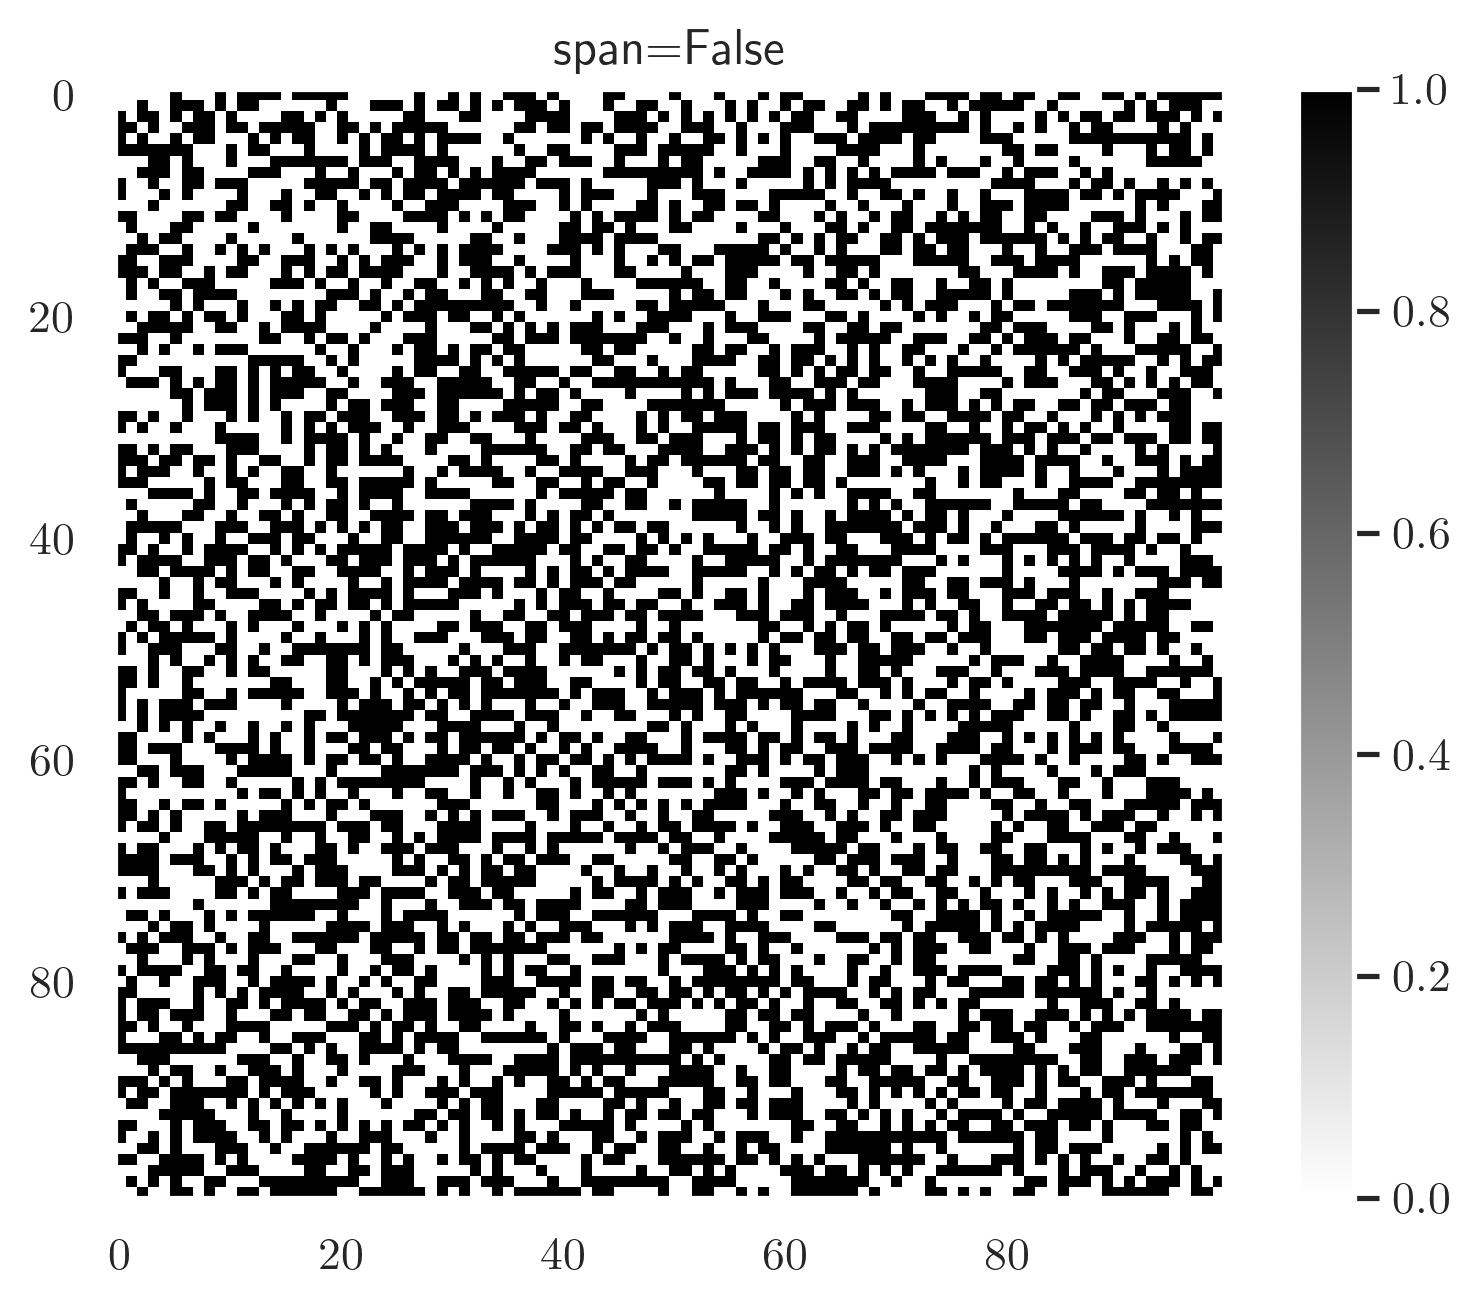

Next


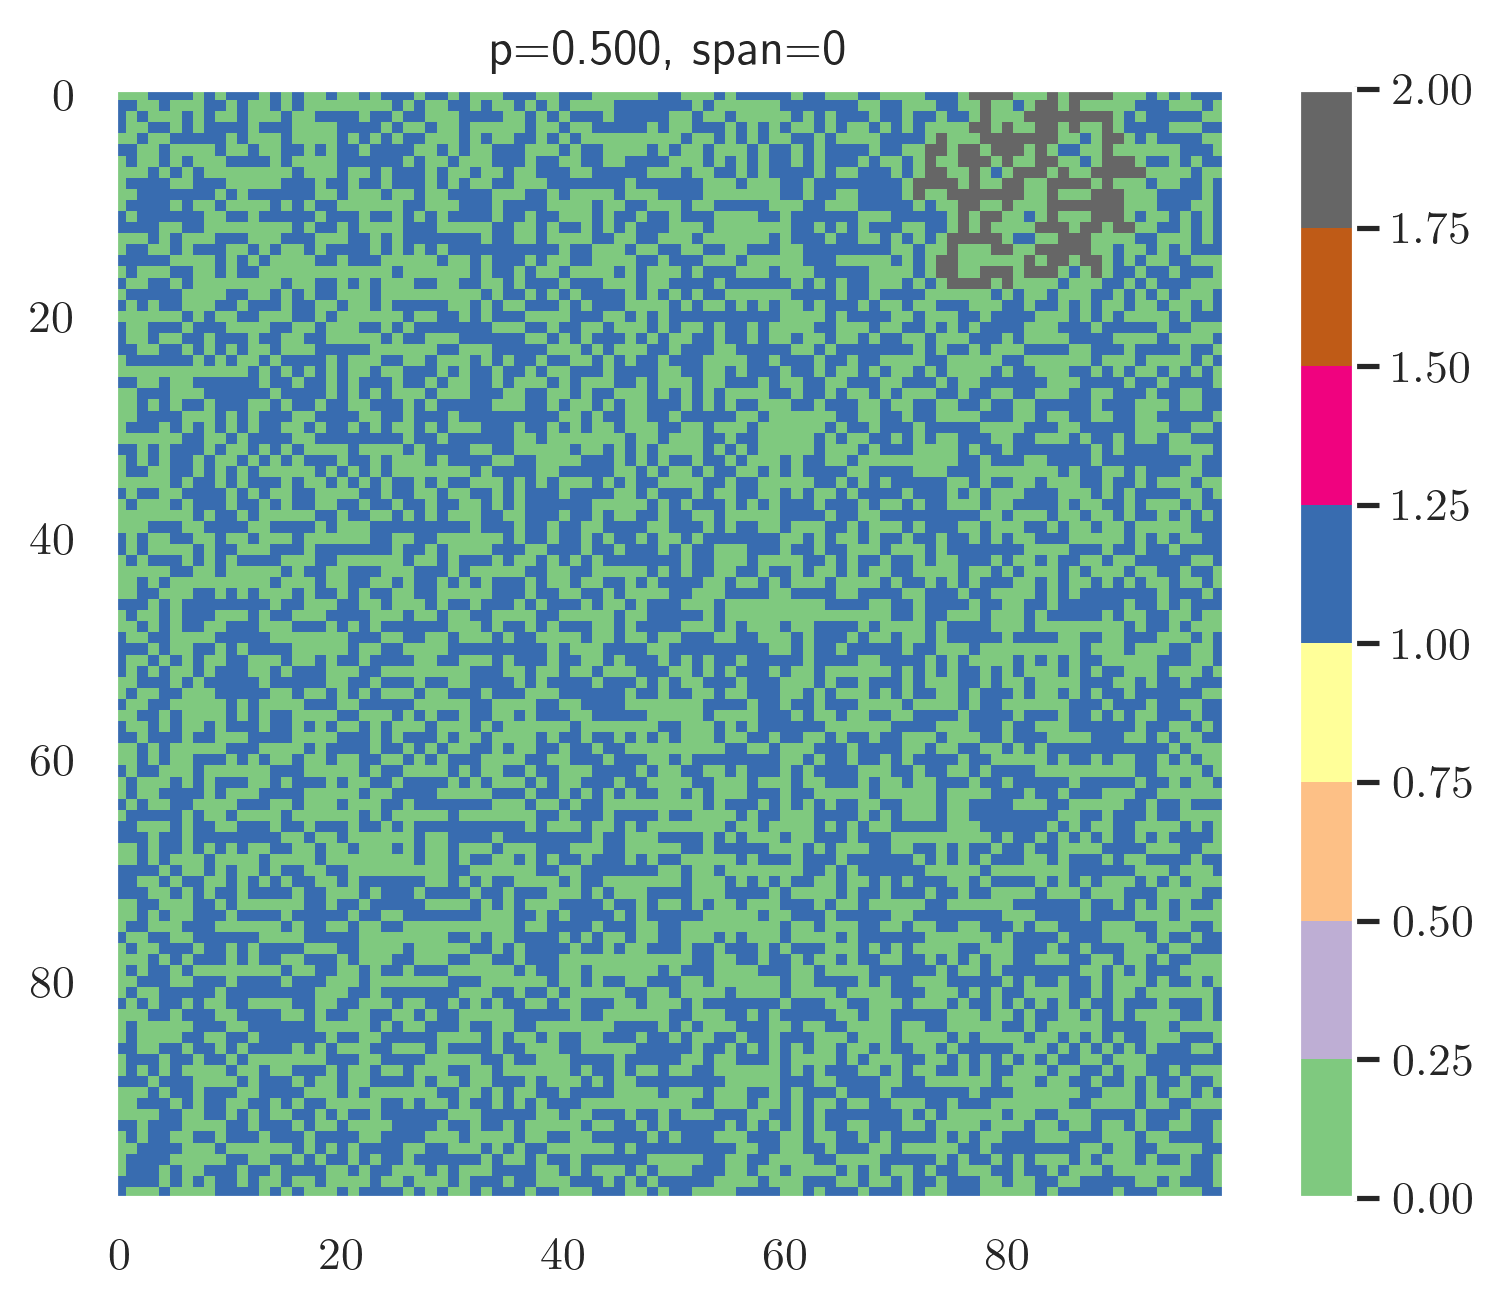

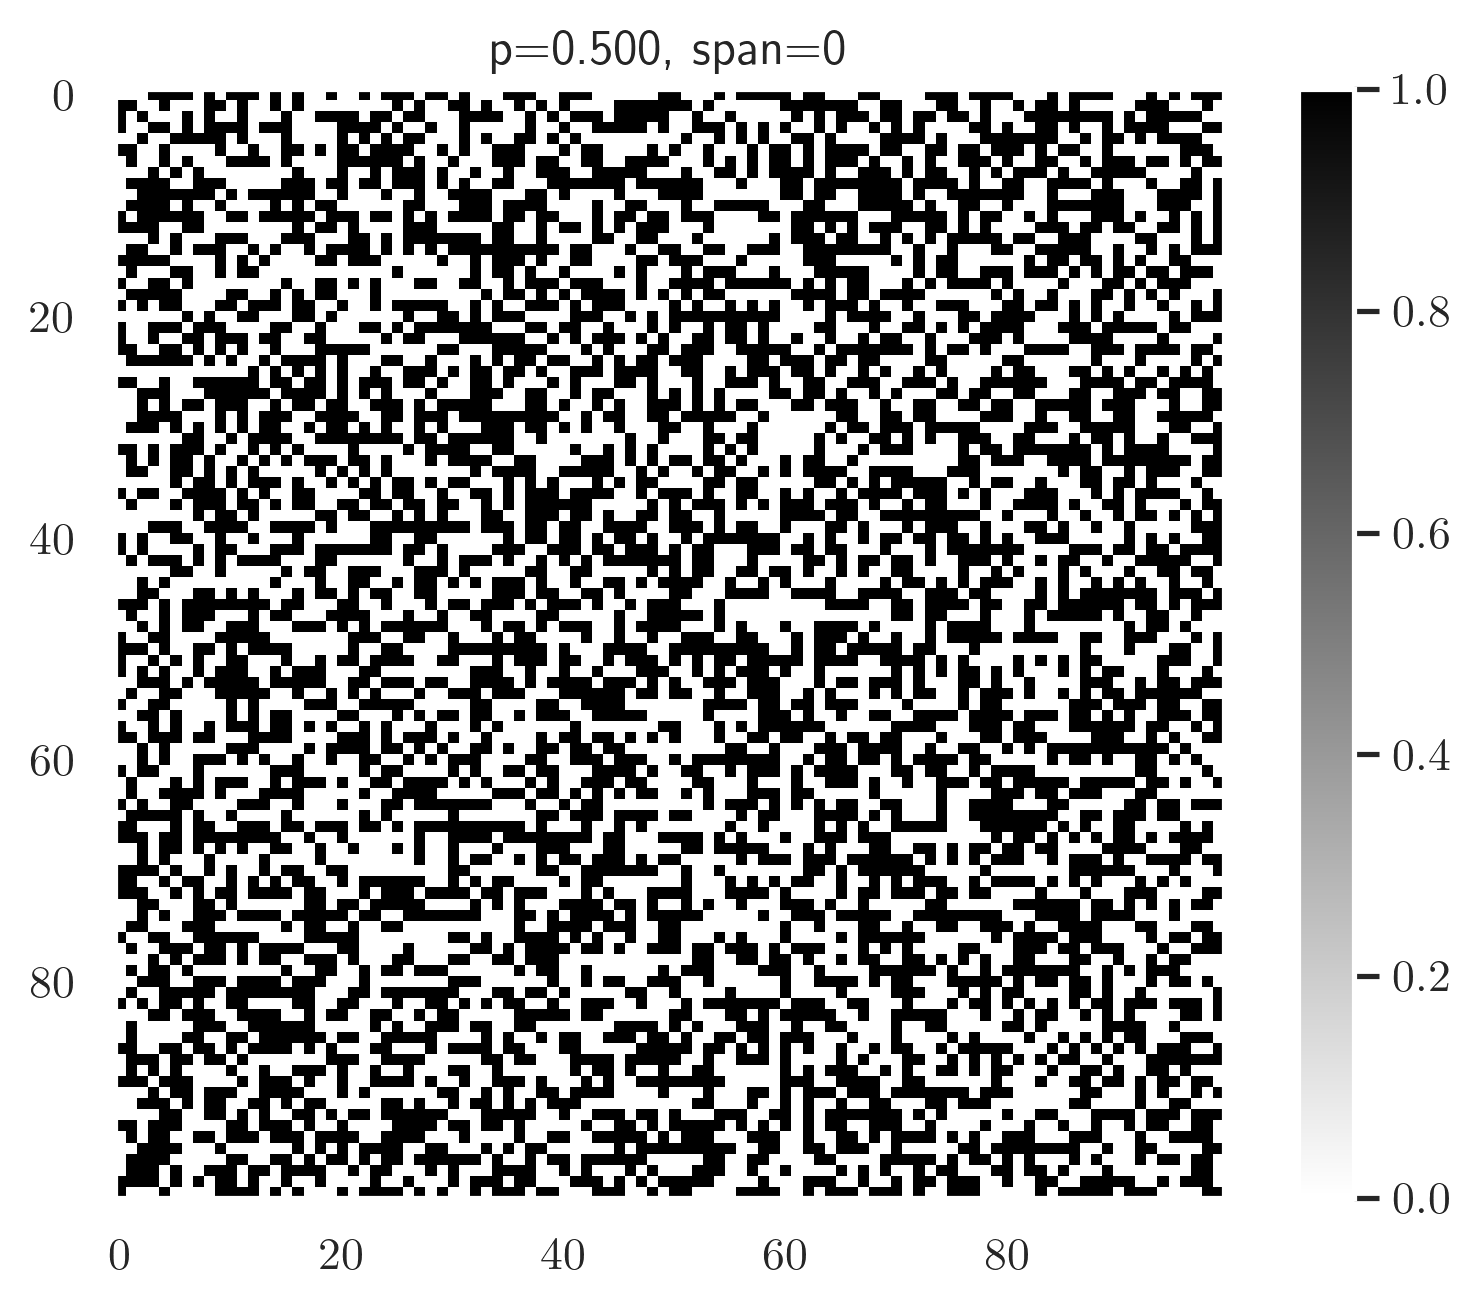

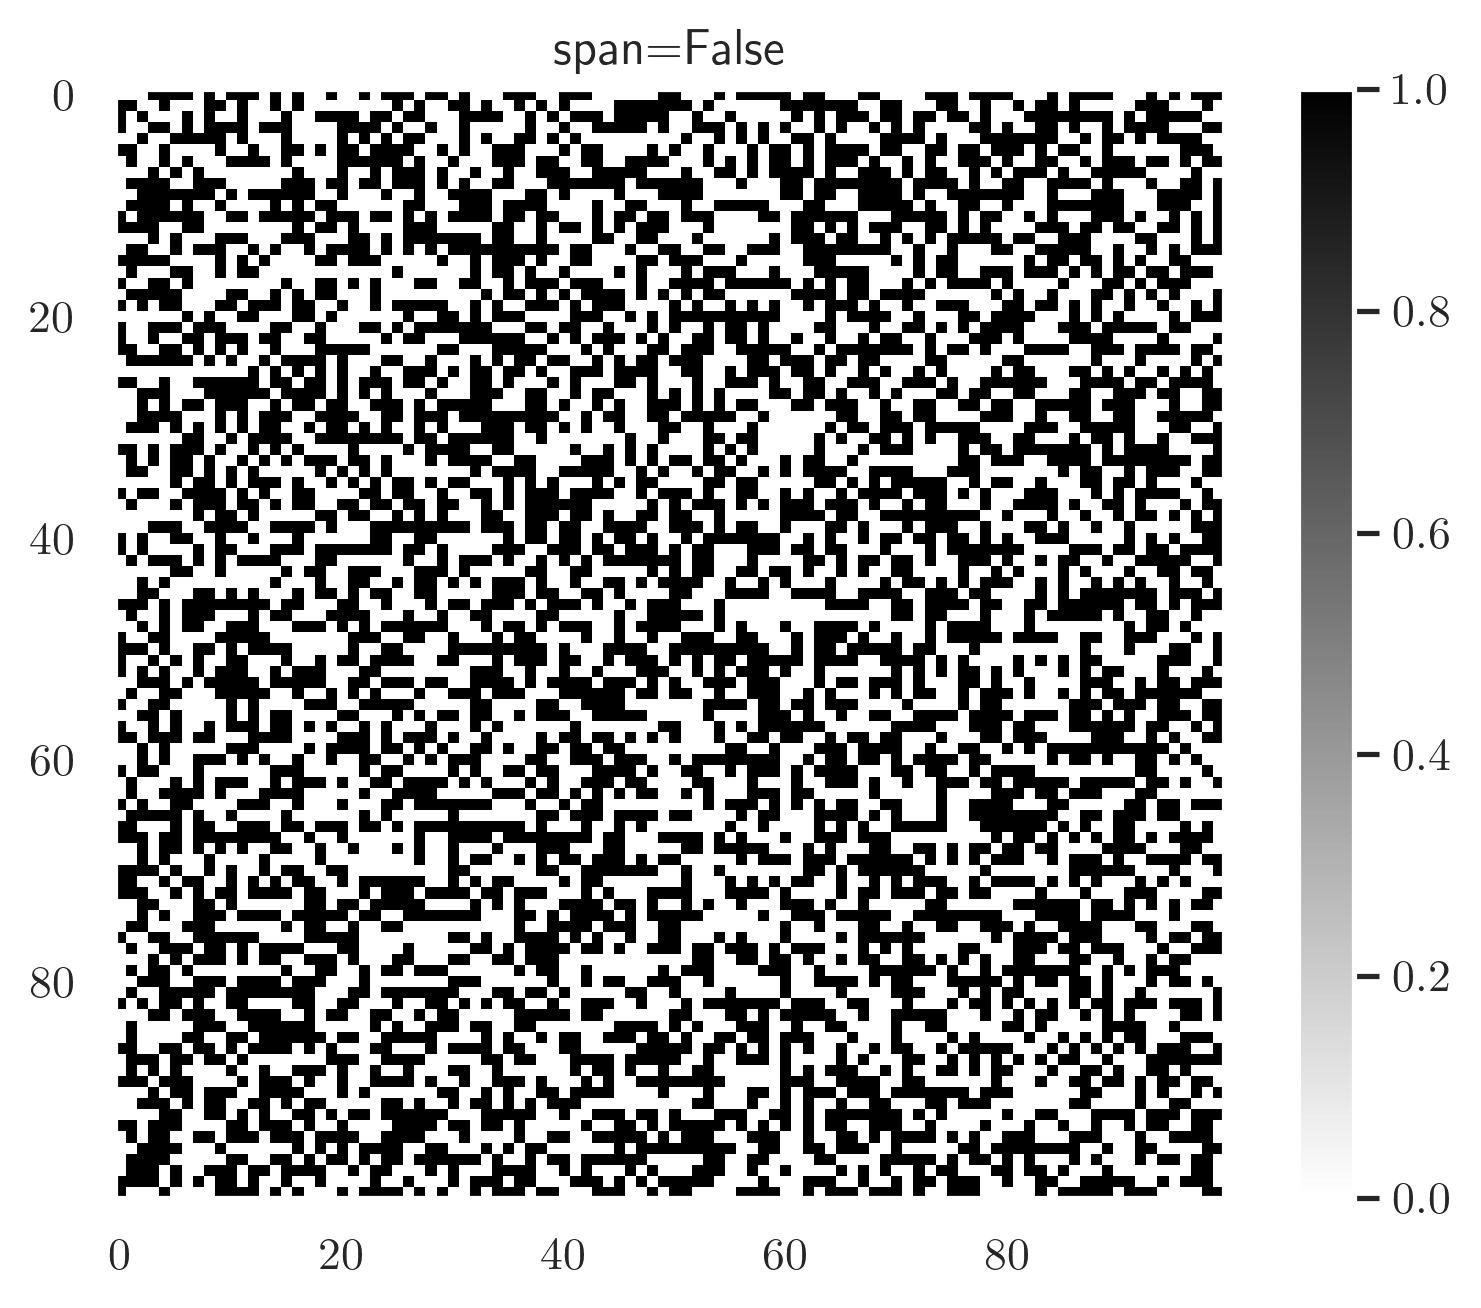

Next


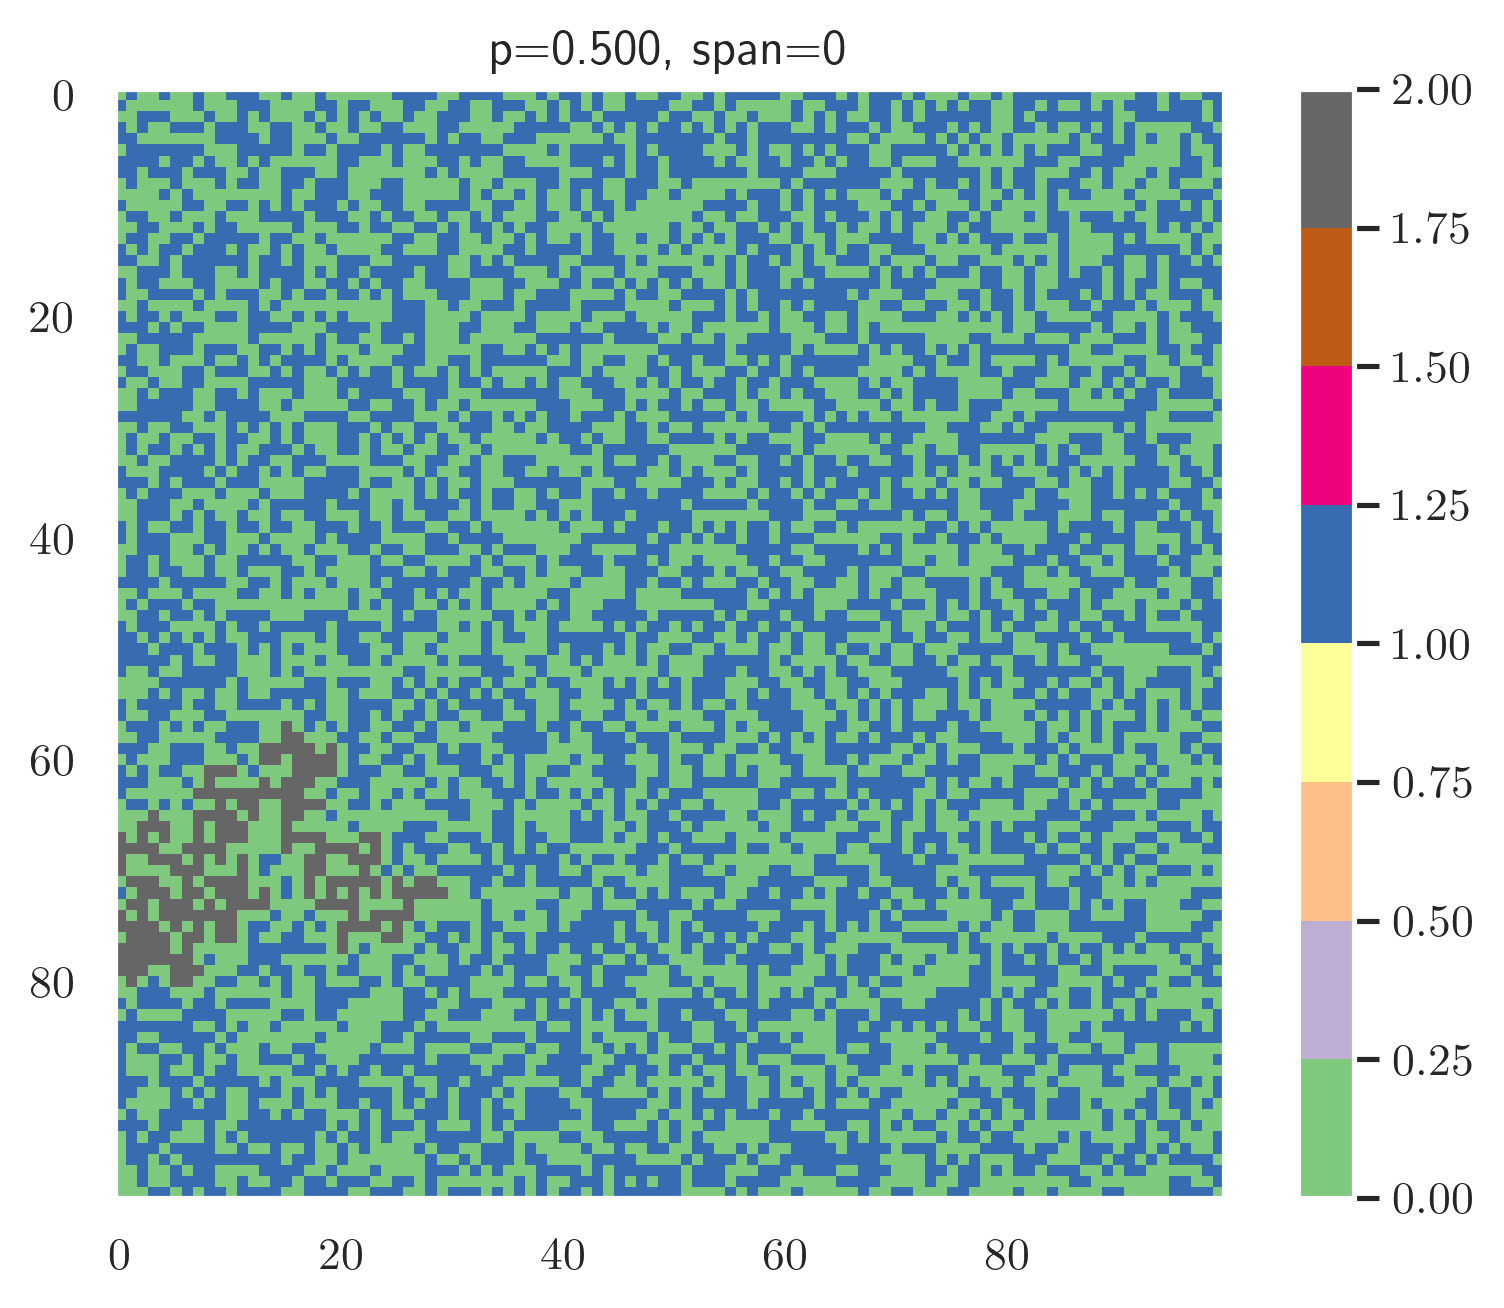

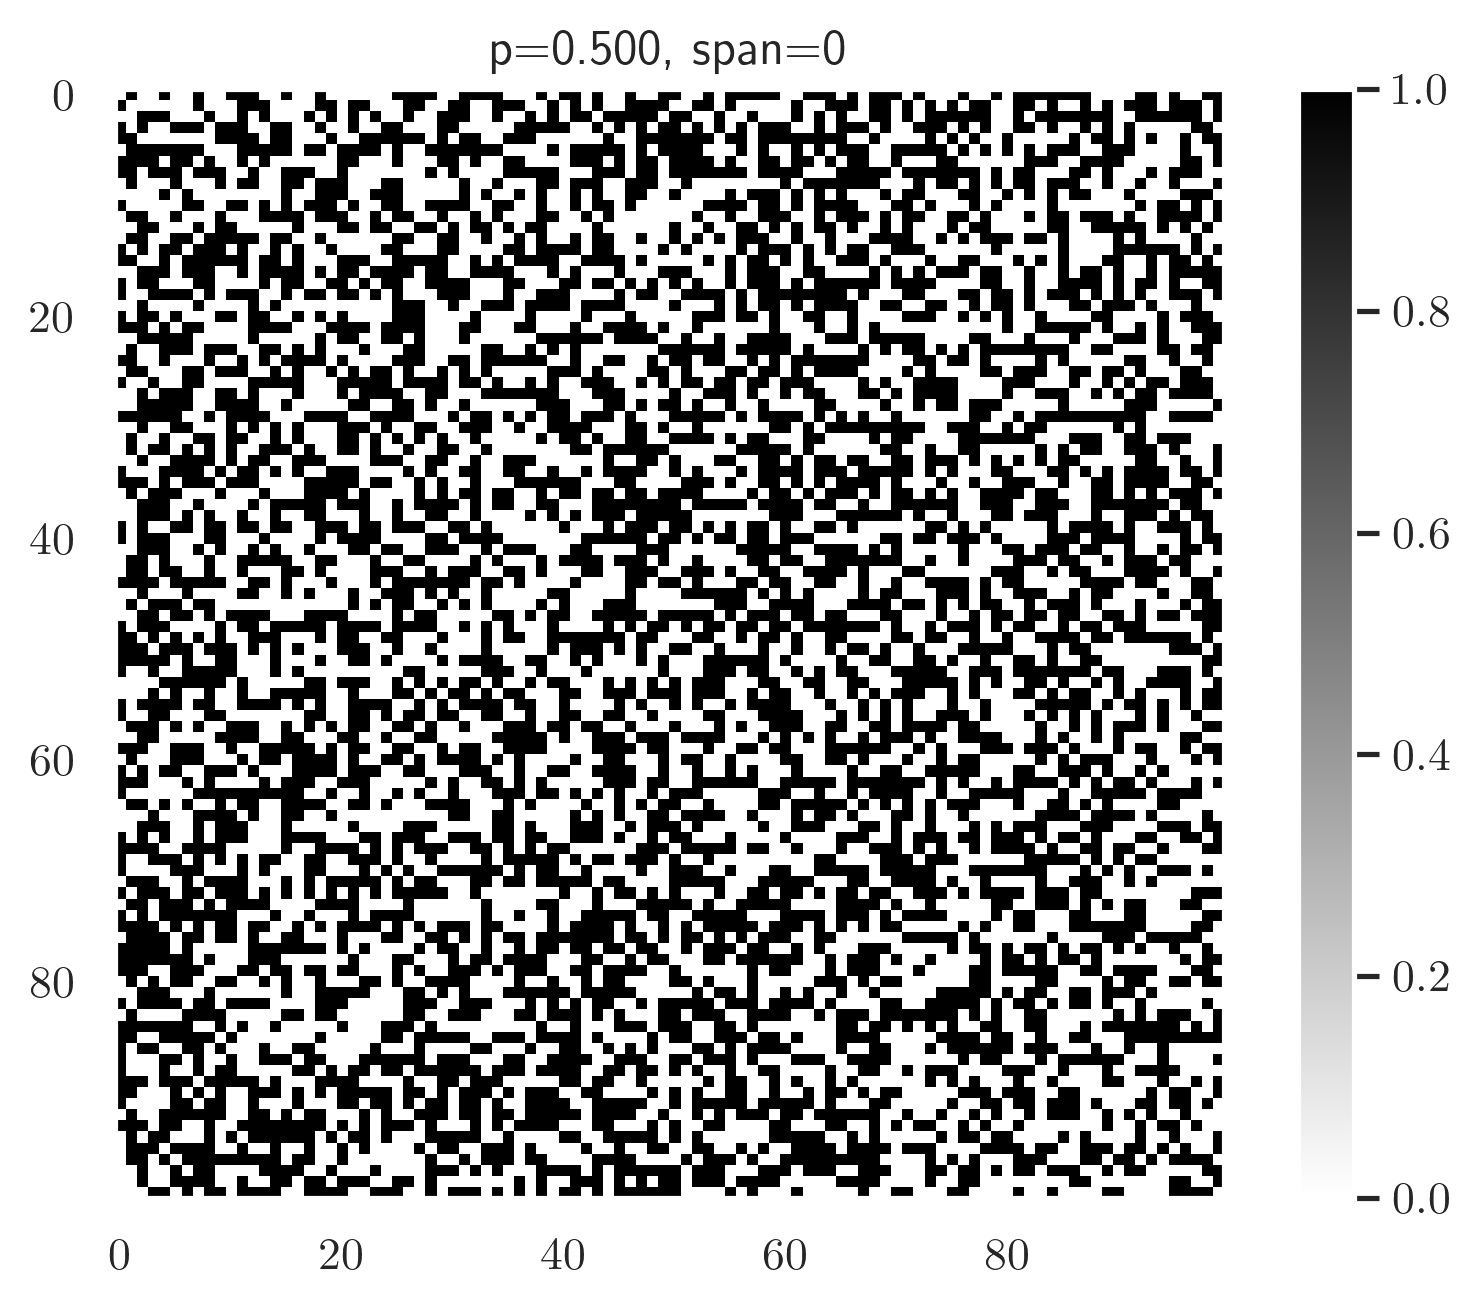

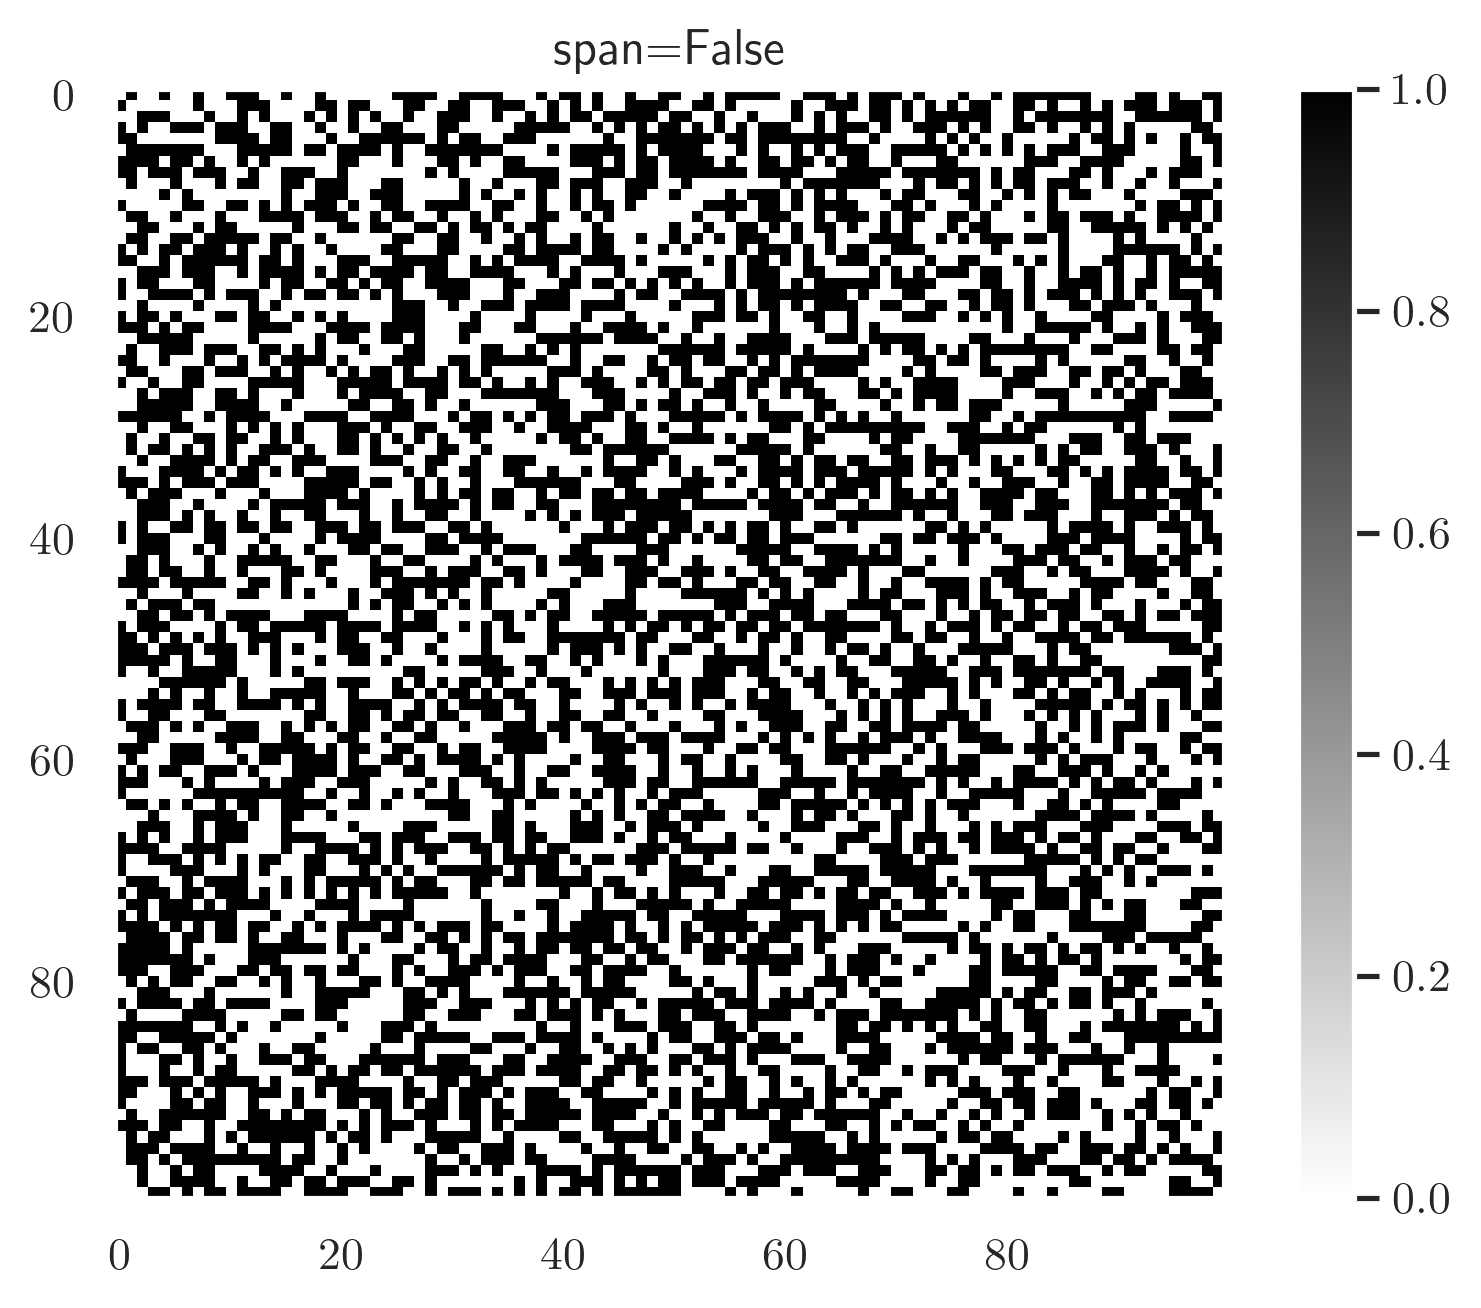

Next


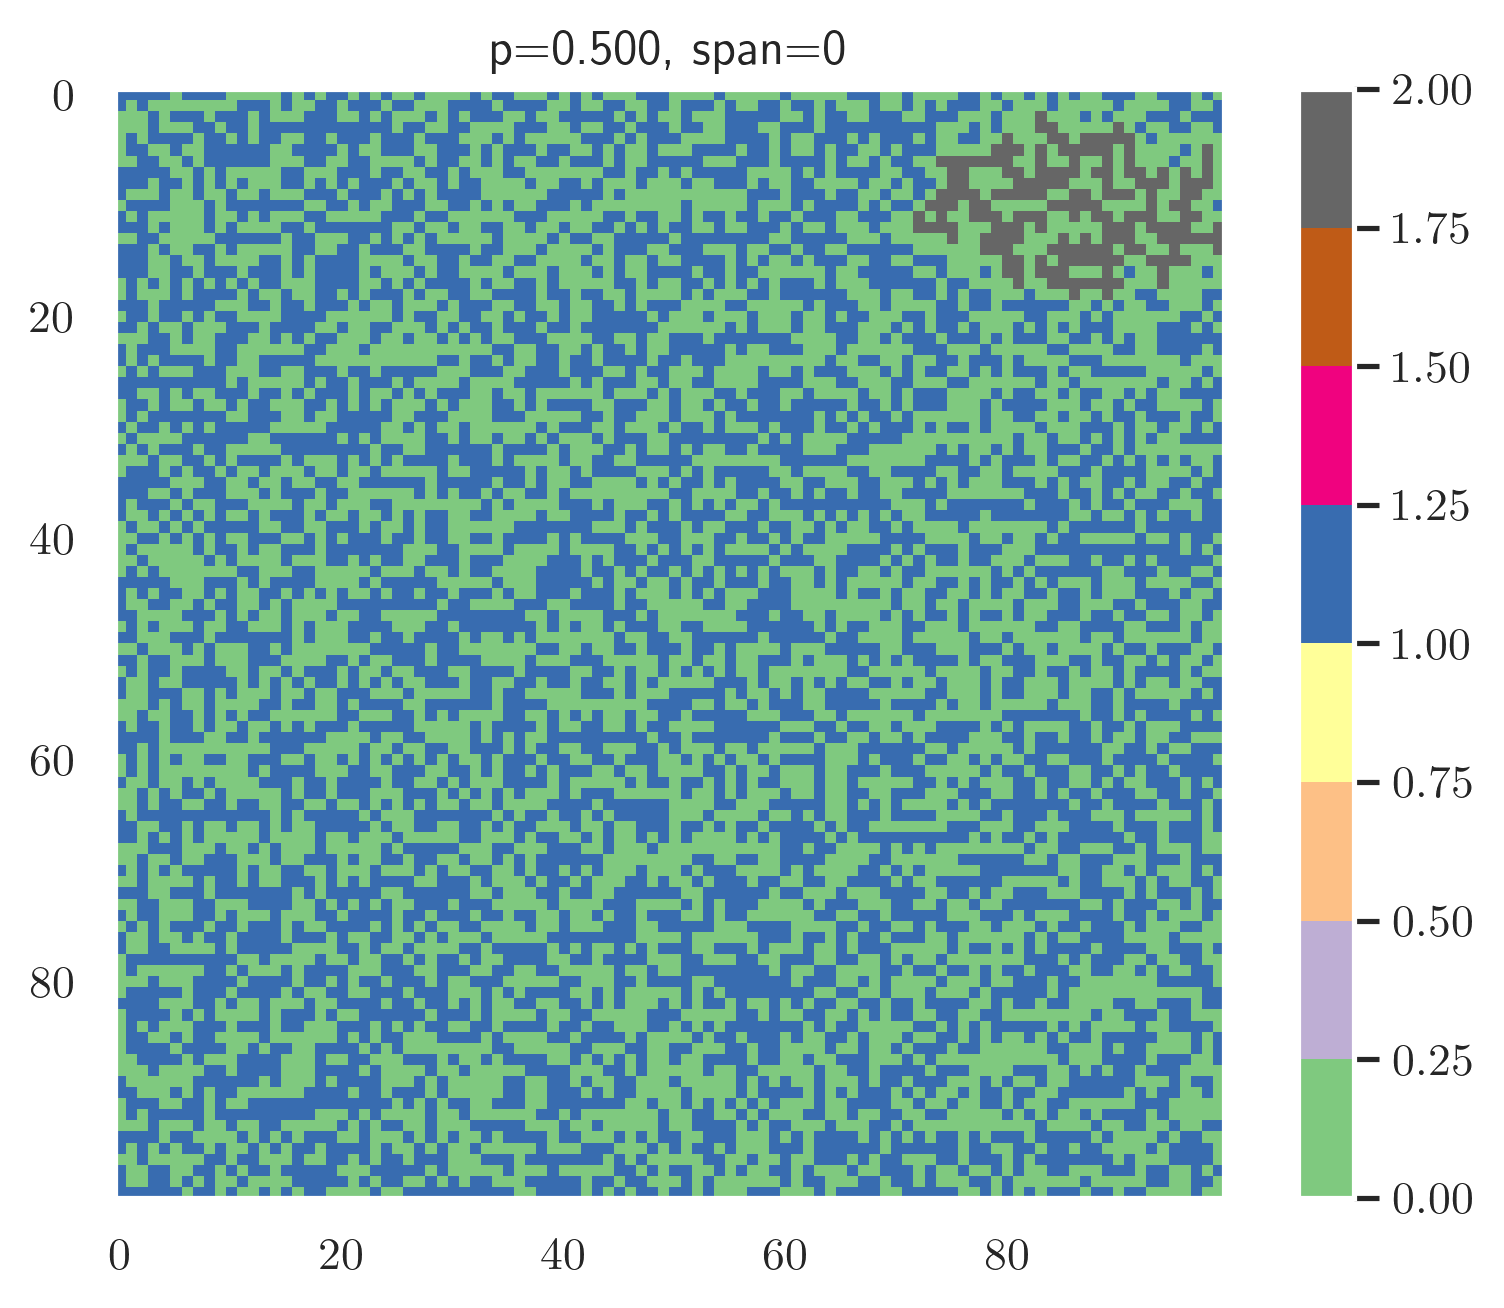

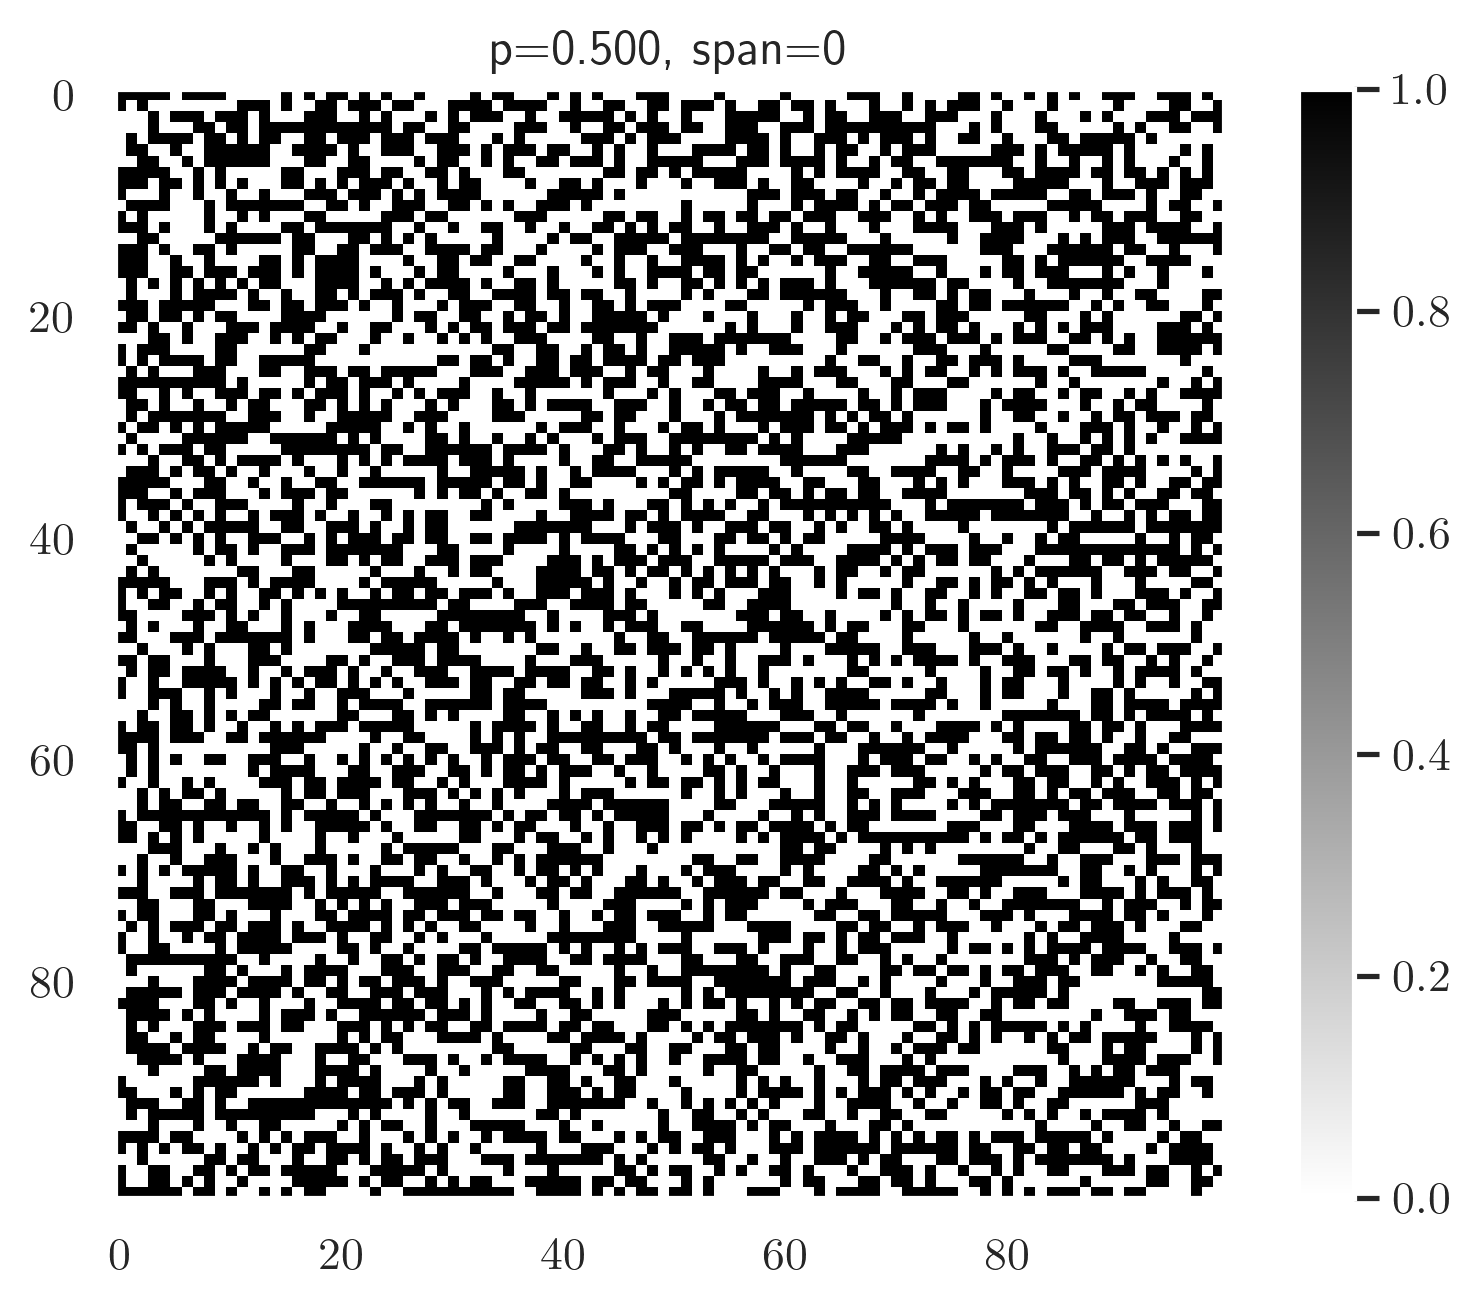

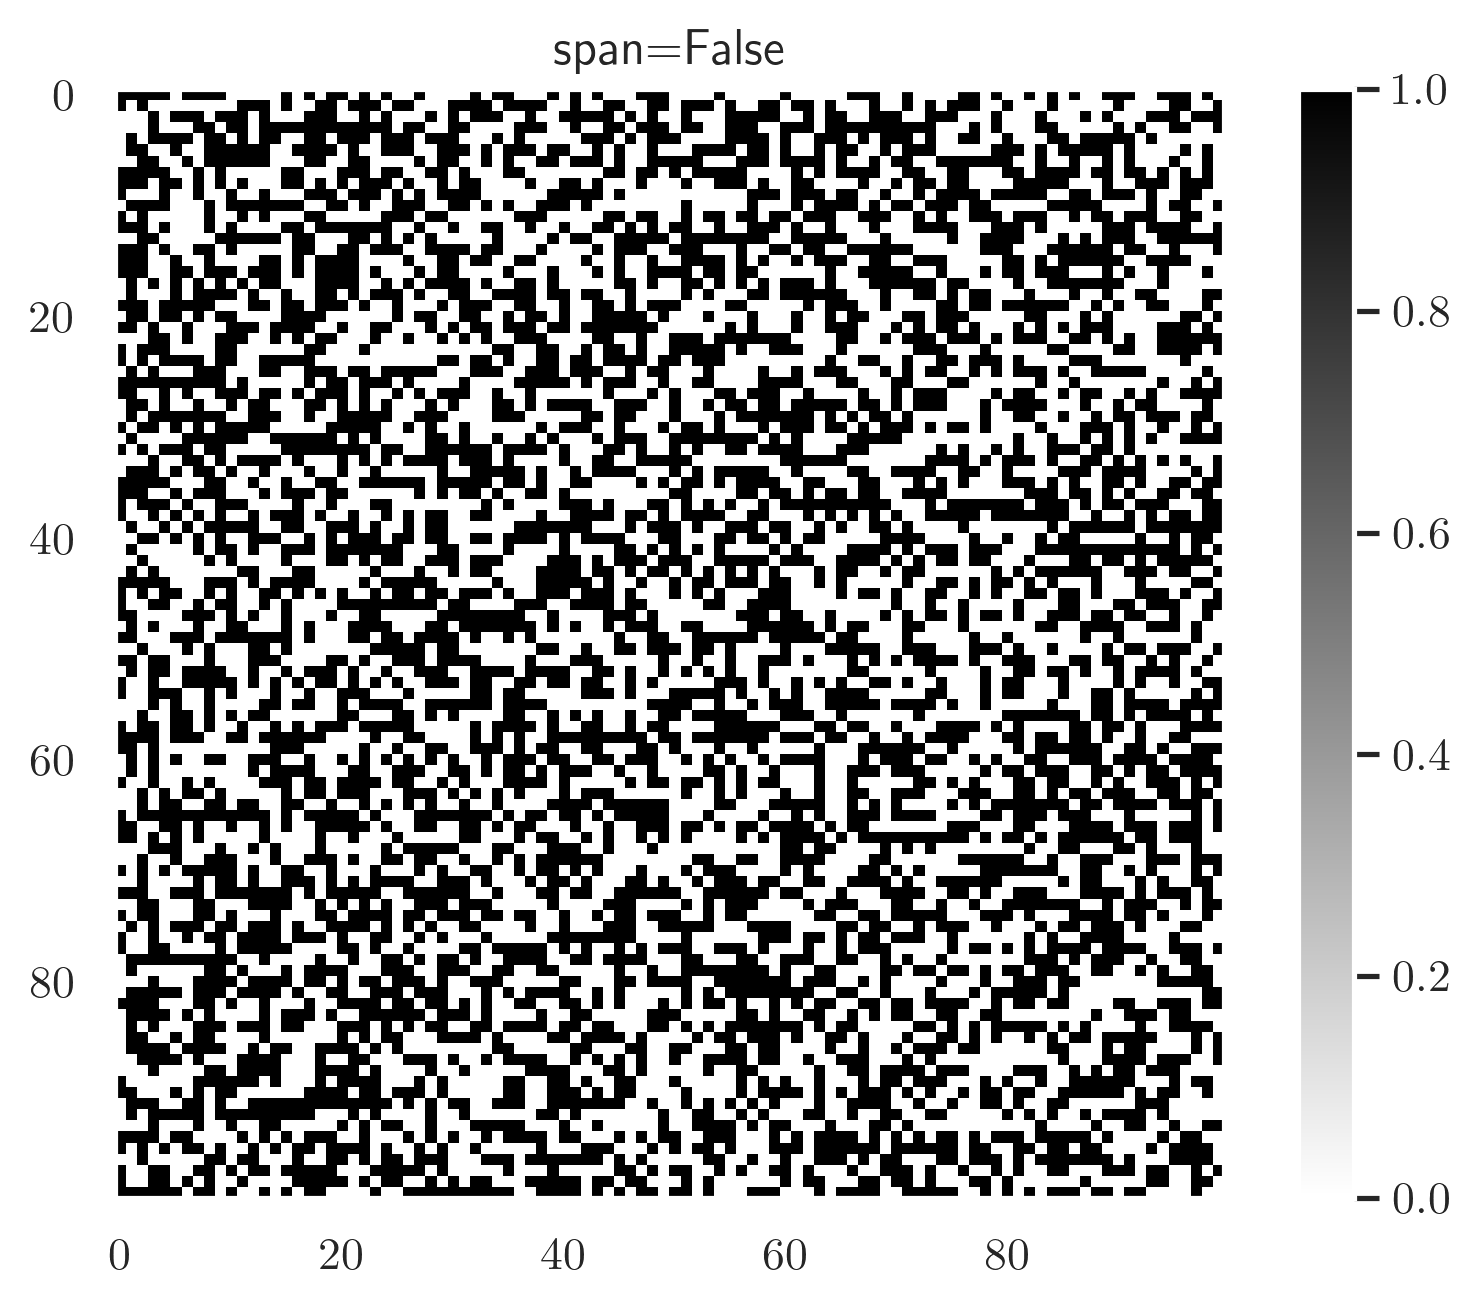

Next


In [13]:
def arrayPlot(array, side, string:str = None):
    vmax = T.max(array)
    # palette = T.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
    # colors = T.as_tensor([i for i in range(21)])[:, None] * palette
    # colors = (colors % 255).numpy().astype("uint8")
    r = Image.fromarray(array.byte().cpu().numpy()).resize((side, side))
    # r.putpalette(colors)
    # use Pastel1 palette
    if string:
        plt.title(string)
    if (vmax == 1): cmap='gray_r' 
    else: cmap=cm['Accent']
    plt.imshow(r, cmap=cmap, vmin=0, vmax=vmax); plt.grid(False)
    plt.colorbar();plt.show()

side = 100
file_path = data_dir+f"test/perc{side}"

with open(file_path+"span", "r") as file1, open(file_path+"ClSeg", "r") as file2,\
    open(file_path+"ClSegHK", "r") as file3, open(file_path+"op", "r") as file4, \
    open(file_path+"lattice", "r") as file5:
    for a,b,c,d,e in zip(file1, file2, file3, file4, file5):
        k = a.strip()
        p = b.strip(); p = T.tensor([int(i) for i in p])
        l = c.strip(); l = T.tensor([int(i) for i in l])
        op = d.strip()
        lattice = e.strip(); lattice = np.array([int(i) for i in lattice])
        arrayPlot(p.reshape(side, side), side, string=f"p={op}, span={k}")
        arrayPlot(l.reshape(side, side), side, string=f"p={op}, span={k}")
        spanning(lattice, side)
        print("Next")
        # plt.title(f"p={op}, span={k}")
        # plt.imshow(p.reshape(side, side), interpolation="nearest", origin="lower", cmap='gray_r')
        # plt.grid(False)
        # plt.show()


 for (size_t i = 0; i < L; i++)
  {
    for (size_t j = 0; j < L; j++)
    {
      if (labelArray[i] != 0 and labelArray[j+(L-1)*L] != 0){
        chkRootA = findRoot(labelArray[i]);
        chkRootB = findRoot(labelArray[j+(L-1)*L]);
        if (chkRootA == chkRootB){
          spanClusters.push_back(chkRootA);
        }
      }
      if (labelArray[i*L] != 0 and labelArray[L-1+j*L] != 0){
        chkRootA = findRoot(labelArray[i*L]);
        chkRootB = findRoot(labelArray[L-1+j*L]);
        if (chkRootA == chkRootB){
          spanClusters.push_back(chkRootA);
        }
      }
    }
  }

In [2]:
from numba import jit, njit, prange
import numpy as np

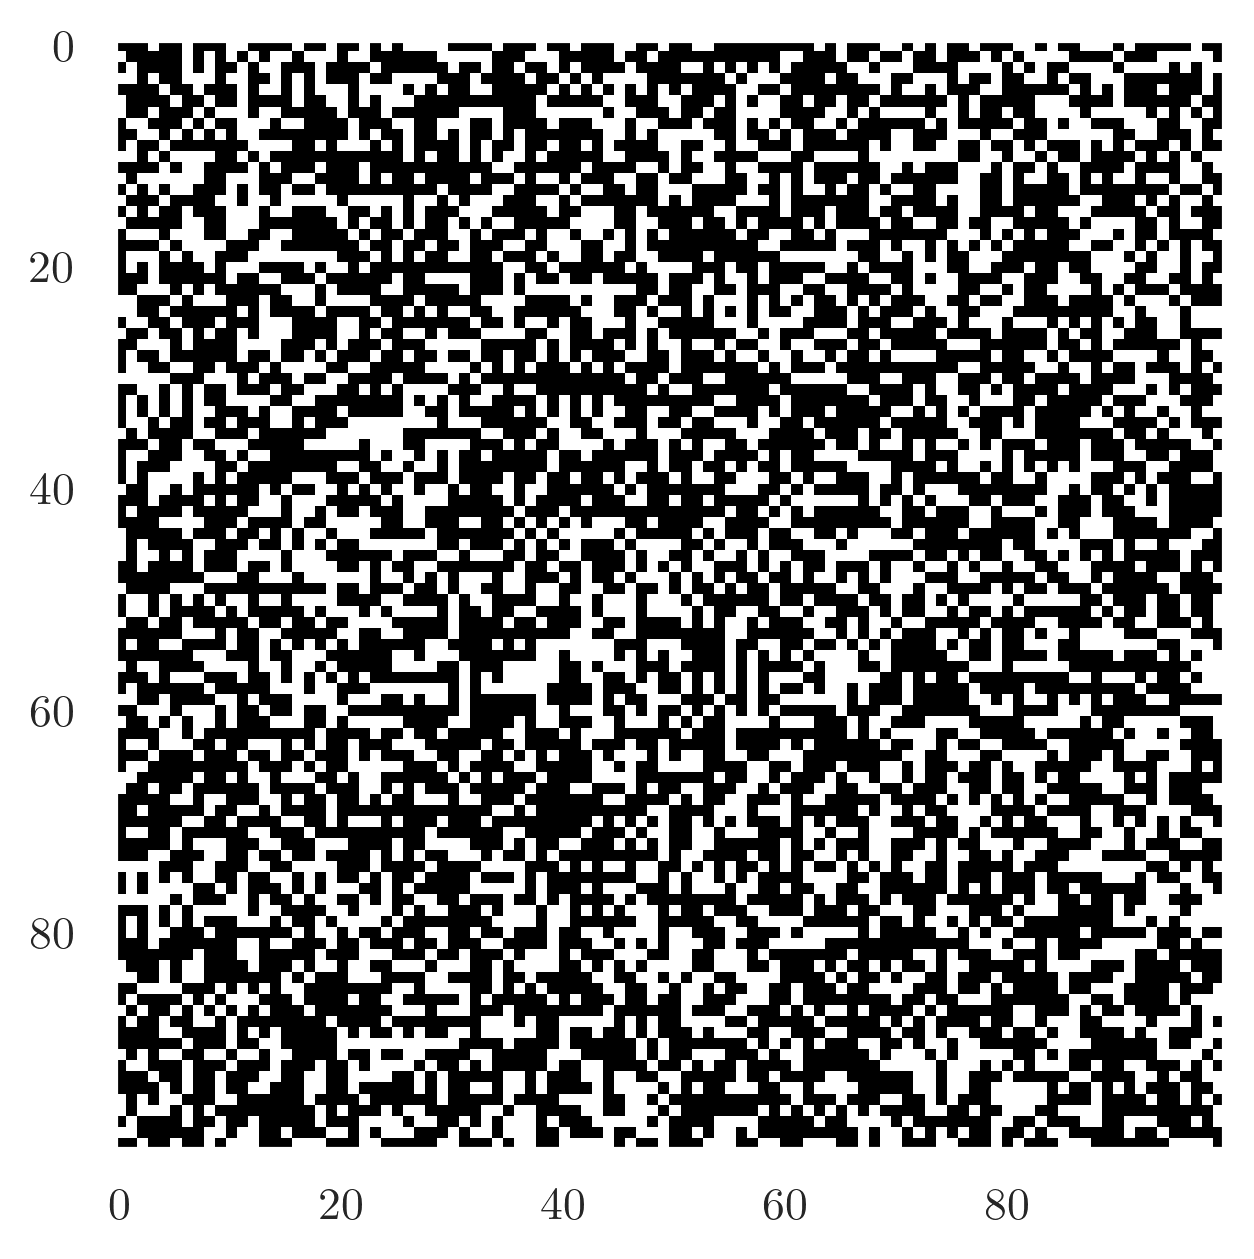

In [5]:
# lattice = np.random.randint(0, 2, (side*side), dtype=int)
# arrayPlot(T.tensor(lattice), side)#, string=f"p={op}, span={k}")
# lattice[7*side+9]=1
plt.imshow(lattice.reshape(side, side), interpolation="nearest", origin="upper", cmap='gray_r')
plt.grid(False); plt.show()

In [9]:
def findRoot(site:int, repArray:np.array):
    tmpSite = site
    while repArray[tmpSite] != tmpSite:
        tmpSite = repArray[tmpSite]
    
    while repArray[site] != site:
        tmp = repArray[site]
        repArray[site] = tmpSite
        site = tmp
    return tmpSite

def union(site1:int, site2:int, repArray:np.array):
    tmp1 = findRoot(site1, repArray)
    tmp2 = findRoot(site2, repArray)
    repArray[tmp1] = tmp2

def spanning(lattice:np.array, side:int):
    spanCluster = []
    largestLabel = 0
    repArray =  np.array([i for i in range(side*side)])
    labelArray = np.zeros((side*side), dtype=int)
    lattice2 = np.empty_like(lattice)

    N = side*side; L = side
    nn = np.empty((N*4), dtype=int)

    for i in range(N):
        nn[i*4] = -1 if ((i+1)%L==0) else (i+1)%N
        nn[i*4+1] = -1 if (i%L==0) else (i+N-1)%N
        nn[i*4+2] = -1 if (i>=N-L) else (i+L)%N
        nn[i*4+3] = -1 if (i<L) else (i+N-L)%N

    for i in range(side):
        if (lattice[i] == 1):
            largestLabel += 1
            labelArray[i] = largestLabel

    for i in range(side, side*side):
        if (lattice[i] == 1):
            left = labelArray[nn[i*4+1]]
            above = labelArray[nn[i*4+3]]
            if (left == 0 and above == 0):
                largestLabel += 1
                labelArray[i] = largestLabel
            elif(left != 0 and above == 0):
                labelArray[i] = findRoot(left, repArray)
            elif(left == 0 and above != 0):
                labelArray[i] = findRoot(above, repArray)
            elif (left == above):
                labelArray[i] = left
            else:
                union(left, above, repArray)
                labelArray[i] = findRoot(left, repArray)
    for i in range(side):
        for j in range(side):
            if (labelArray[i] != 0 and labelArray[j+(side-1)*side] != 0):
                chkRootA = findRoot(labelArray[i], repArray)
                chkRootB = findRoot(labelArray[j+(side-1)*side], repArray)
                if (chkRootA == chkRootB):
                    spanCluster.append(chkRootA)
            if (labelArray[i*side] != 0 and labelArray[(side-1)+j*side] != 0):
                chkRootA = findRoot(labelArray[i*side], repArray)
                chkRootB = findRoot(labelArray[(side-1)+j*side], repArray)
                if (chkRootA == chkRootB):
                    spanCluster.append(chkRootA)
    span = False
    if (len(spanCluster) != 0):
        span = True
    for i in range(side*side):
        if (labelArray[i] != 0):
            if (findRoot(labelArray[i], repArray) in spanCluster):
                lattice2[i] = 2
            else:
                lattice2[i] = 1
        else:
            lattice2[i] = 0
    # else:
    #     for i in range(side*side):
    #         lattice2[i] = labelArray[i]
    lattice2 = T.from_numpy(lattice2.reshape(side, side))
    # print(labelArray.reshape(side, side))
    arrayPlot(lattice2, side, string=f"span={span}")

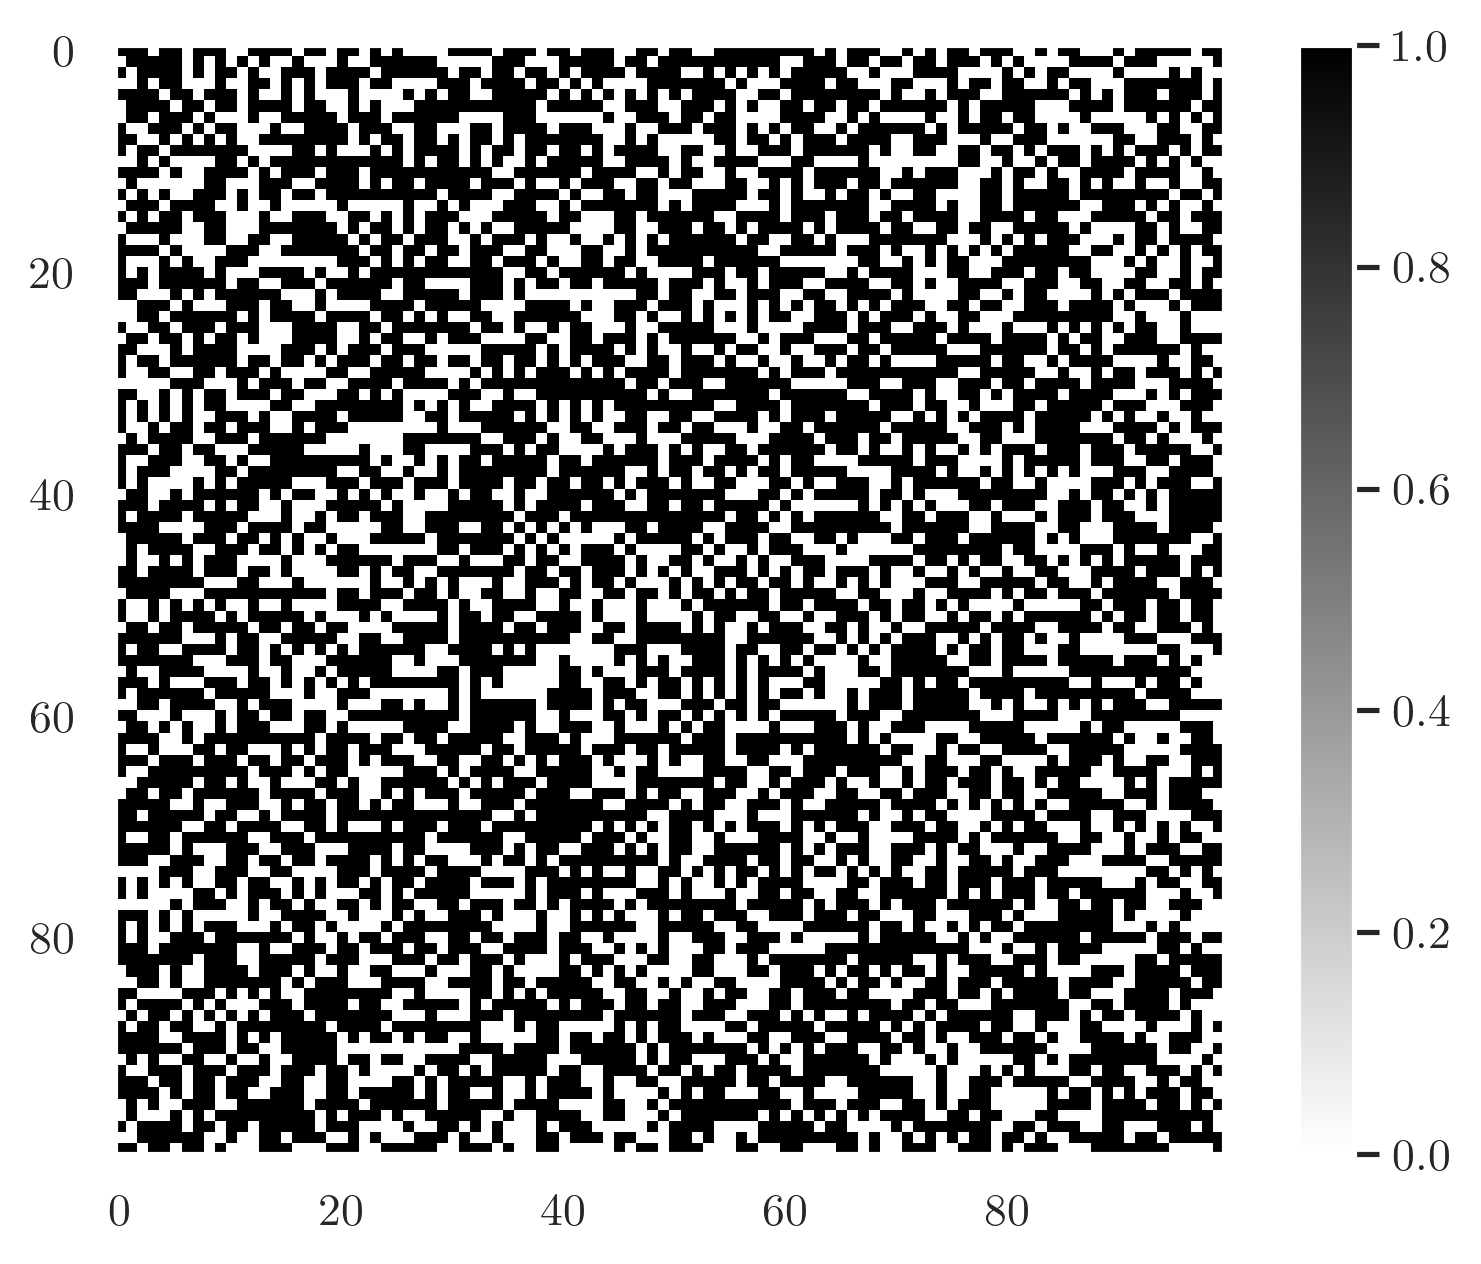

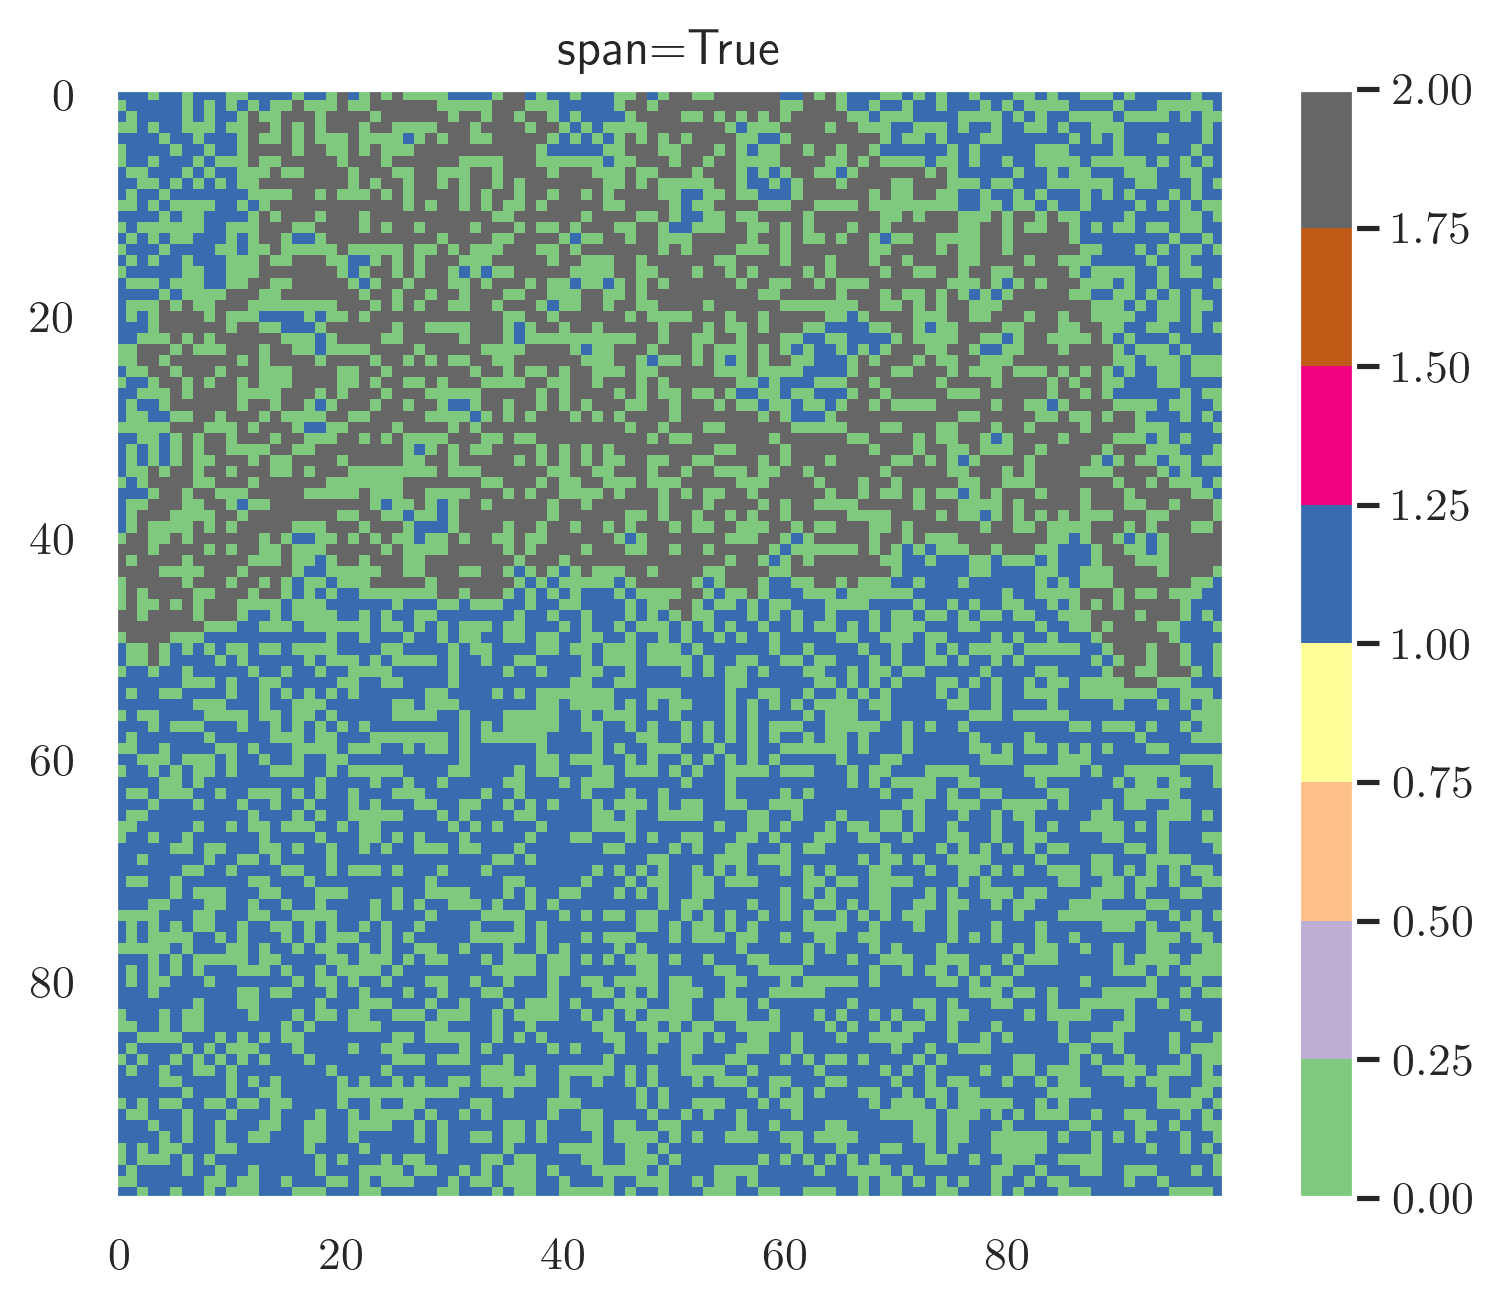

In [10]:
# lattice = np.random.randint(0, 2, (side*side), dtype=int)
arrayPlot(T.from_numpy(lattice.reshape(side, side)), side)#, string=f"p={op}, span={k}")


NameError: name 'y' is not defined

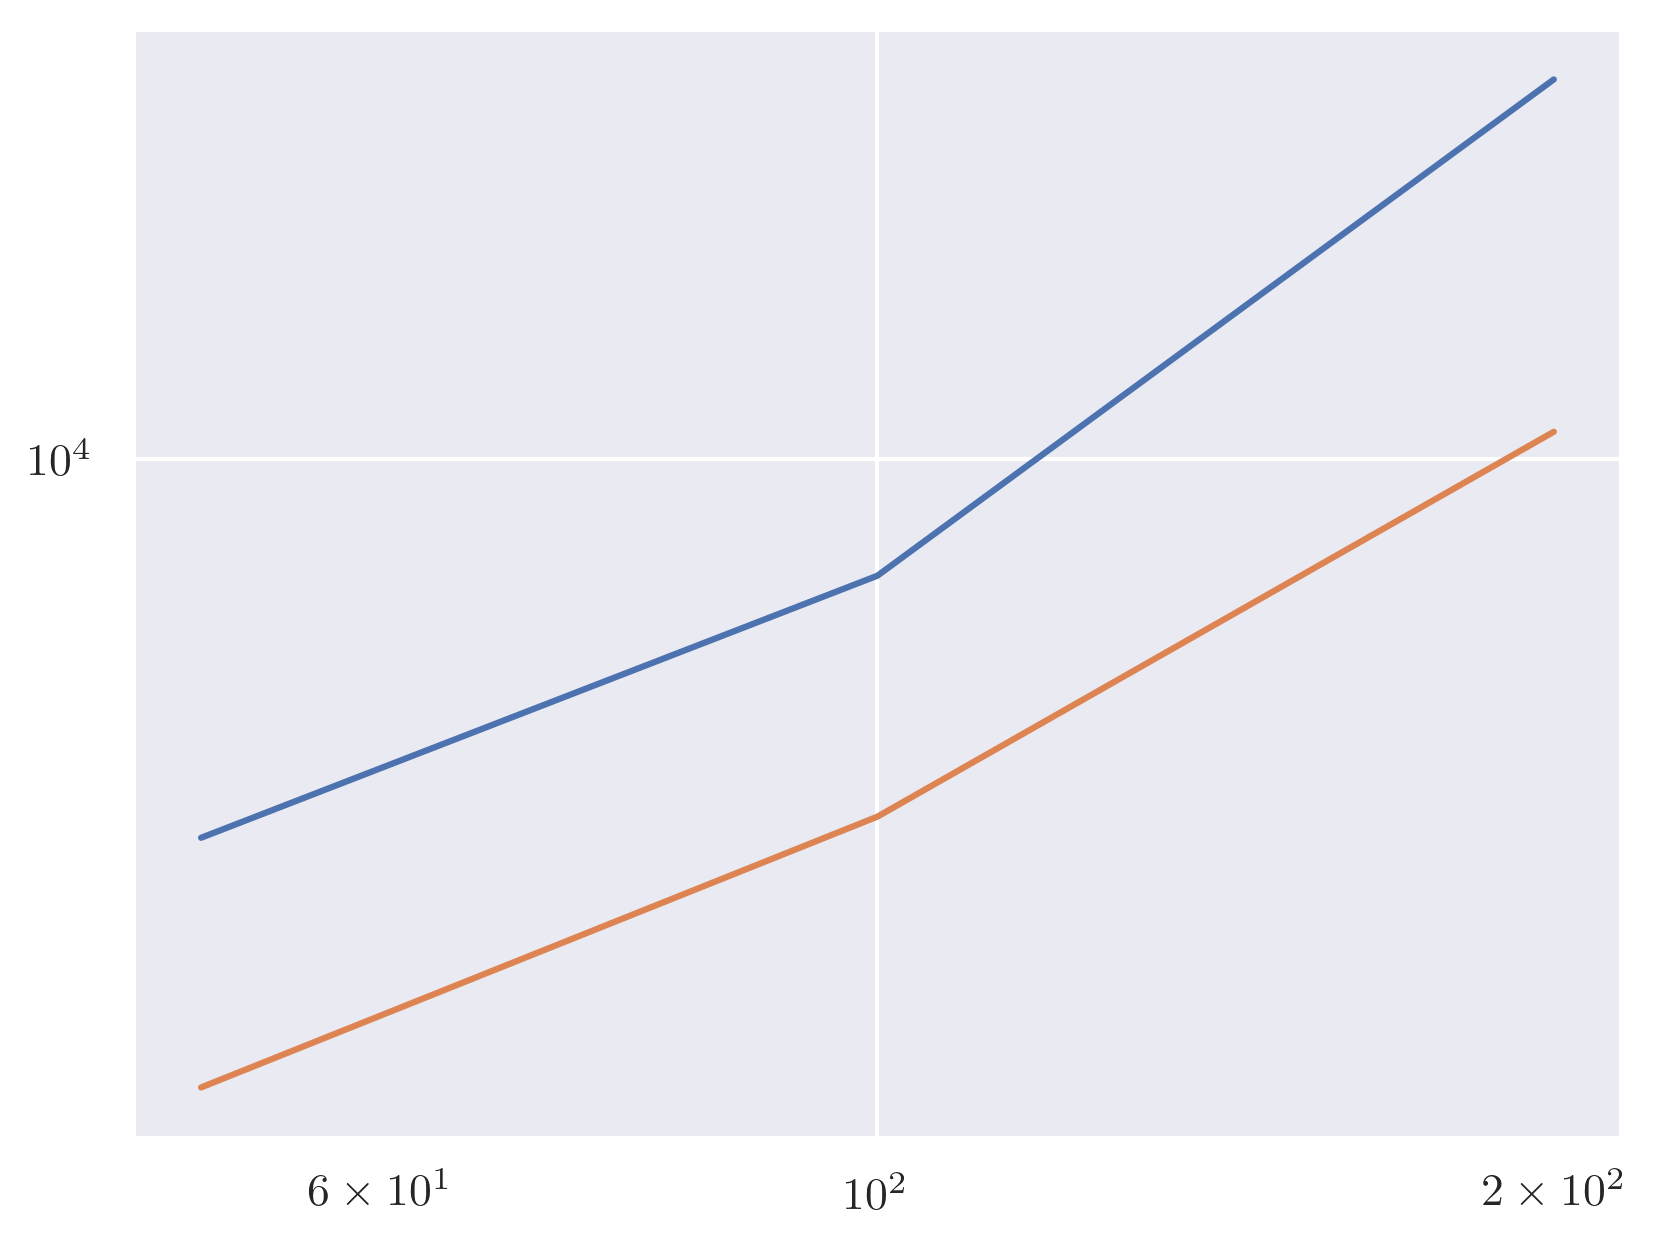

In [3]:
y1 = np.array([3358.9159116268156, 7146.277385997772, 29850.11879196167])
y2 = np.array([1636.3137955665588, 3569.8324978351593, 10817.811922550201])
y3 = np.array([1715.521112203598, 3610.8385894298553, 11061.550471067429])

x = np.array([50, 100, 200])
# log plot
plt.plot(x, y1, label="1 GPU")
plt.plot(x, y2, label="2 GPU")
plt.yscale("log")
plt.xscale("log")
slope1 = (np.log(y[2])-np.log(y[1]))/(np.log(x[2])-np.log(x[1]))
slope2 = (np.log(y[1])-np.log(y[0]))/(np.log(x[1])-np.log(x[0]))
print(slope1, slope2, (slope1+slope2)/2)
# plt.plot(x, x**slope)

In [8]:
print(y1/3600)
print(y2/3600)


[0.9330322  1.98507705 8.29169966]
[0.45453161 0.99162014 3.00494776]
